# Barcodes 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install python-Levenshtein


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 2.1 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.8 MB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
import Levenshtein
from Bio import SeqIO

barcodes = '/Users/ariane/Documents/code/MinION/tests/data/20240502/rev_barcodes.fasta'

# Read sequences from a FASTA file
sequences = [str(record.seq) for record in SeqIO.parse(barcodes, "fasta")]

# List of sequence IDs (for labeling purposes)
sequence_ids = [record.id for record in SeqIO.parse(barcodes, "fasta")]


In [4]:
import numpy as np
import Levenshtein

# Create a matrix to store the Levenshtein distances
num_sequences = len(sequences)
distance_matrix = np.zeros((num_sequences, num_sequences), dtype=int)

for i in range(num_sequences):
    for j in range(num_sequences):
        dist = Levenshtein.distance(sequences[i], sequences[j])
        distance_matrix[i, j] = dist
        if dist <= 12 and i != j:
            print(sequence_ids[i], sequence_ids[j], dist)

RB01 RB09 12
RB02 RB04 12
RB02 RB05 12
RB04 RB02 12
RB05 RB02 12
RB05 RB07 12
RB06 RB08 12
RB07 RB05 12
RB07 RB11 12
RB08 RB06 12
RB09 RB01 12
RB11 RB07 12


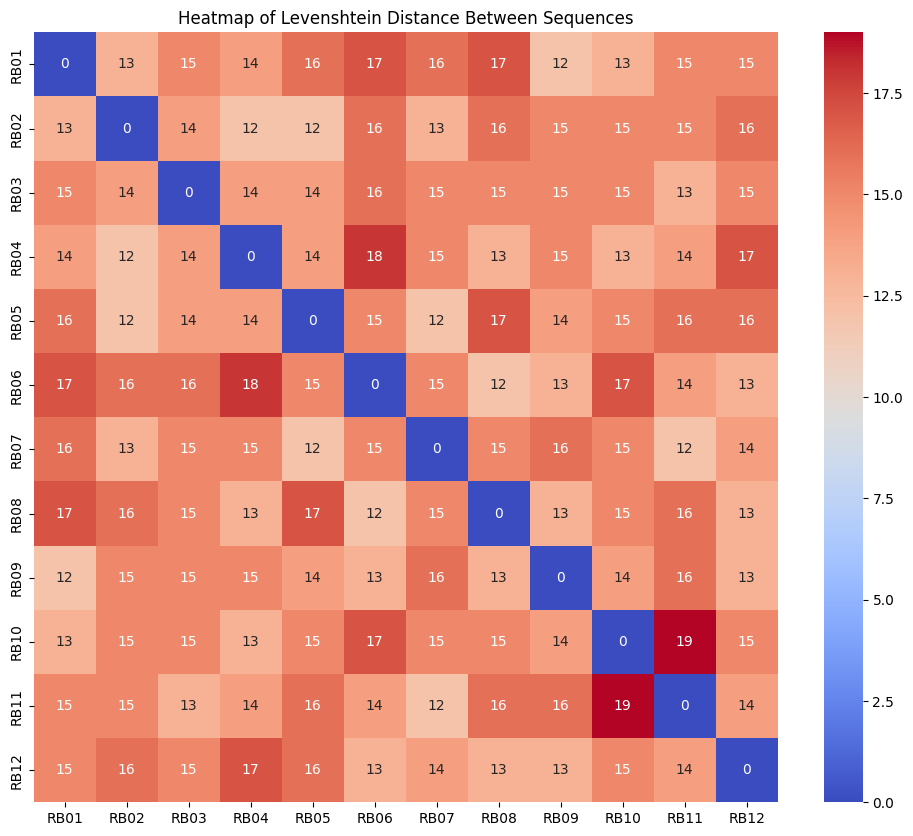

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, xticklabels=sequence_ids, yticklabels=sequence_ids, annot=True, cmap='coolwarm')
plt.title("Heatmap of Levenshtein Distance Between Sequences")
plt.show()

In [19]:
len(sequences[0])

24

NB12 NB46 8
NB46 NB12 8


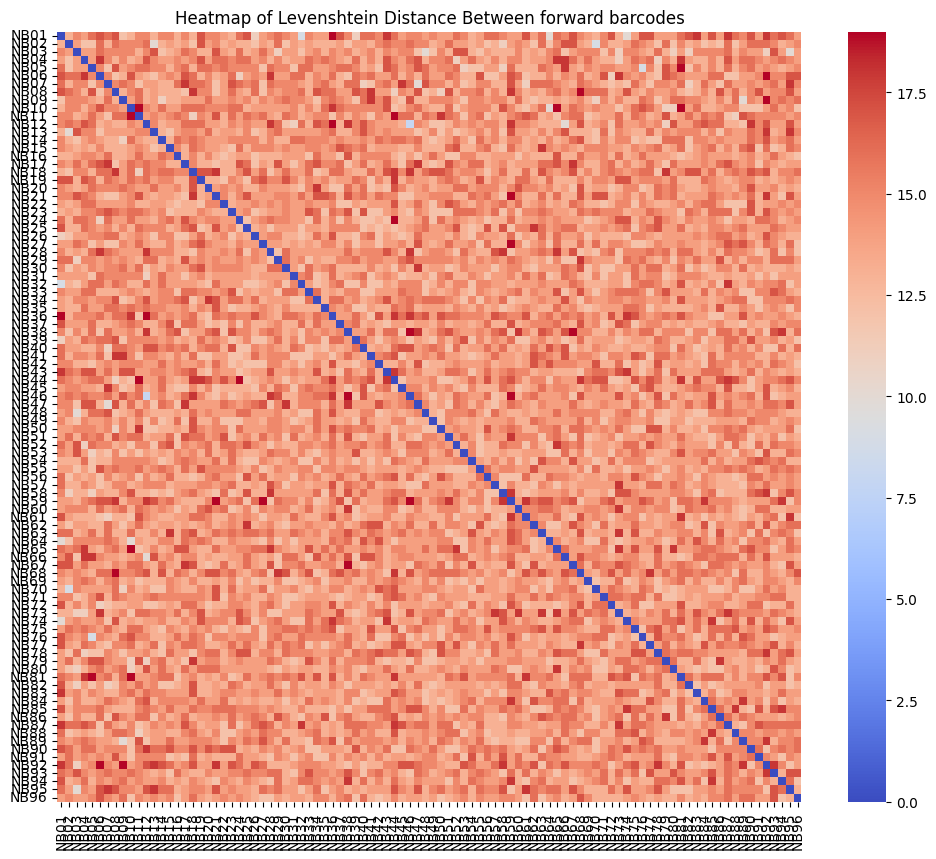

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import Levenshtein
from Bio import SeqIO

barcodes = '/Users/ariane/Documents/code/MinION/tests/data/20240502/for_barcodes.fasta'

# Read sequences from a FASTA file
sequences = [str(record.seq) for record in SeqIO.parse(barcodes, "fasta")]

# List of sequence IDs (for labeling purposes)
sequence_ids = [record.id for record in SeqIO.parse(barcodes, "fasta")]

import numpy as np
import Levenshtein

# Create a matrix to store the Levenshtein distances
num_sequences = len(sequences)
distance_matrix = np.zeros((num_sequences, num_sequences), dtype=int)

for i in range(num_sequences):
    for j in range(num_sequences):
        dist = Levenshtein.distance(sequences[i], sequences[j])
        distance_matrix[i, j] = dist
        if i != j:
            if dist <= 8:
                print(sequence_ids[i], sequence_ids[j], dist)
 
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, xticklabels=sequence_ids, yticklabels=sequence_ids, cmap='coolwarm')
plt.title("Heatmap of Levenshtein Distance Between forward barcodes")
plt.show()

In [20]:
8/24

0.3333333333333333

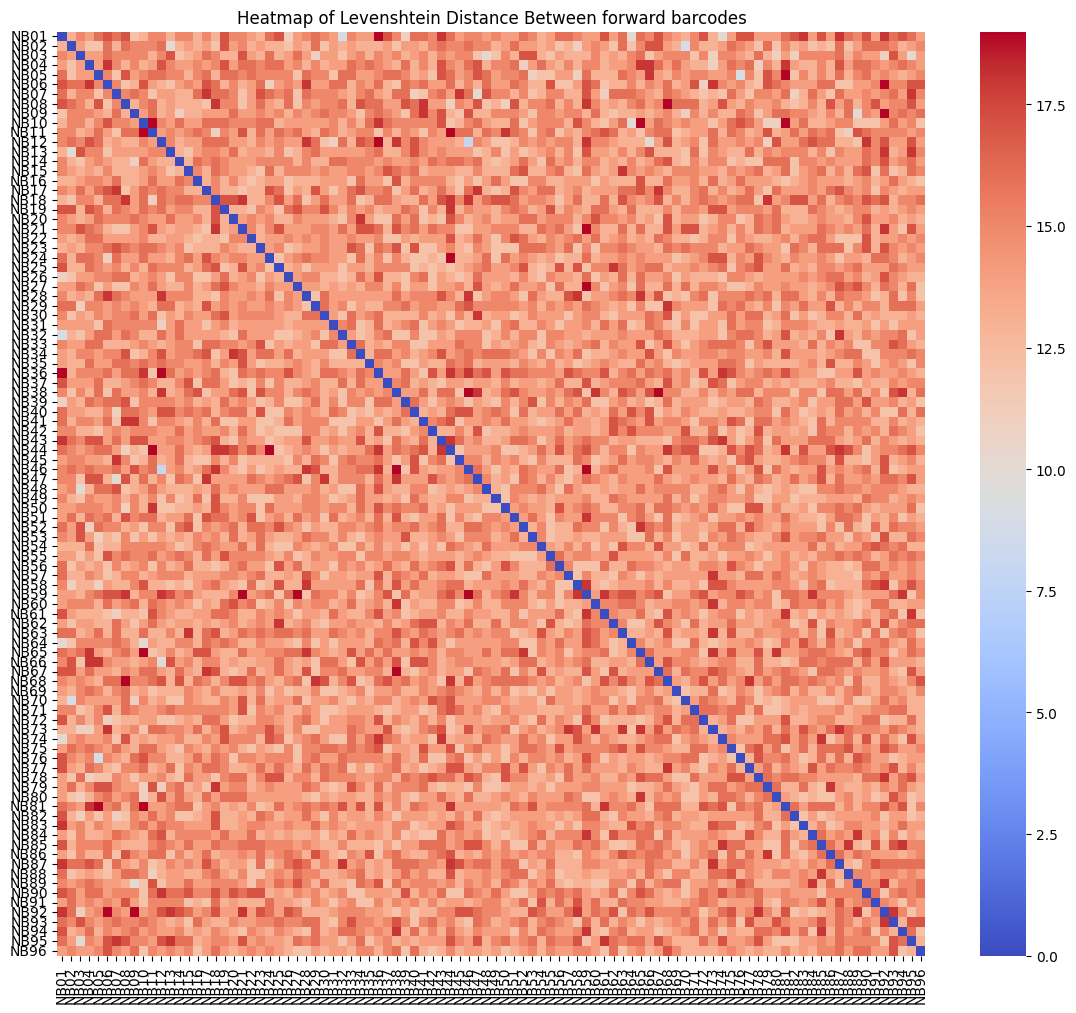

In [7]:
# Create a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(distance_matrix, xticklabels=sequence_ids, yticklabels=sequence_ids, cmap='coolwarm')
plt.title("Heatmap of Levenshtein Distance Between forward barcodes")
plt.show()

## Testing barcoding

Read layout

Found by regular 3’
-a ADAPTER
Found by non-internal 3’
-a ADAPTERX
Found by anchored 3’
-a ADAPTER$
Full adapter sequence anywhere

acgtacgtADAPTERacgt

yes

no

no

Partial adapter sequence at 3’ end

acgtacgtacgtADAP

yes

yes

no

Full adapter sequence at 3’ end

acgtacgtacgtADAPTER

yes

yes



In [ ]:
cutadapt -e 8 -a file$:for_barcodes.fasta -o forward.fastq.gz test.fastq.gz
(minion) [tmp] cutadapt -e 8 --revcomp -g ^file:rev_barcode_1.fasta --discard-untrimmed -o test.fastq.gz single_file.fastq.gz

In [4]:
# Test parameters
import os
barcodes = '/Users/ariane/Documents/code/MinION/tests/data/20240502/rev_barcodes.fasta'

# Read sequences from a FASTA file
reverse_barcodes = [str(record.seq) for record in SeqIO.parse(barcodes, "fasta")]
# List of sequence IDs (for labeling purposes)
reverse_barcode_ids = [record.id for record in SeqIO.parse(barcodes, "fasta")]

barcodes = '/Users/ariane/Documents/code/MinION/tests/data/20240502/for_barcodes.fasta'

# Read sequences from a FASTA file
forward_barcodes = [str(record.seq) for record in SeqIO.parse(barcodes, "fasta")]
# List of sequence IDs (for labeling purposes)
forward_barcode_ids = [record.id for record in SeqIO.parse(barcodes, "fasta")]

for i, rev in enumerate(reverse_barcodes):
# --discard-untrimmed  only keep adapters with the barcode
    folder = '/Users/ariane/Documents/code/tmp/'
    label = reverse_barcode_ids[i]
    print(label)
    os.system(f'cutadapt -e 0.2 -O 20 --revcomp -a {rev} --json={label}.cutadapt.json --discard-untrimmed --action=none -o {folder}output/{label}.fastq.gz {folder}single_file.fastq.gz ')
    os.system(f'mkdir {folder}output/{label}/')
    for j, forward in enumerate(forward_barcodes):
        forward_label = forward_barcode_ids[j]
        os.system(f'mkdir {folder}output/{label}/{forward_label}/')
        os.system(f'cutadapt -e 0.2 -O 20 --revcomp -g {forward} --discard-untrimmed --action=none -o {folder}output/{label}/{forward_label}/demultiplexed_{label}_{forward_label}.fastq.gz {folder}output/{label}.fastq.gz')

RB01
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a AAGAAAGTTGTCGGTGTCTTTGTG --json=RB01.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01.fastq.gz /Users/ariane/Documents/code/tmp/single_file.fastq.gz
Processing single-end reads on 1 core ...
Finished in 9.507 s (78.451 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                 121,182
Reads with adapters:                    13,804 (11.4%)
Reverse-complemented:                    6,241 (5.2%)
Reads written (passing filters):        13,804 (11.4%)

Total basepairs processed:   108,626,249 bp
Total written (filtered):     12,239,005 bp (11.3%)

=== Adapter 1 ===

Sequence: AAGAAAGTTGTCGGTGTCTTTGTG; Type: regular 3'; Length: 24; Trimmed: 13804 times; Reverse-complemented: 6241 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Bases preceding removed adapters:
 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB01/: File exists


Finished in 1.615 s (117.020 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                    13,804 (100.0%)
Reverse-complemented:                   13,780 (99.8%)
Reads written (passing filters):        13,804 (100.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):     12,239,005 bp (100.0%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 13804 times; Reverse-complemented: 13780 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 1 0 1
33	9	0.0	4	5 1 1 2
34	6	0.0	4	2 2 0 1 1
35	11	0.0	4	10 0 0 0 1
36	4	0.0	4	2 0 1 1
37	1	0.0	4	0 1
50	1	0.0	4	1
52	1	0.0	4	1
53	2	0.0	4	1 1
54	2	0.0	4	2
55	3	0.0	4	3
56	10	0.0	4	7 2 0 1
57	4	0.0	4	4
58	3	0.0	4	3
59	2	0.0	4	1 0 0 0 1
60	1	0.0	4	1
61	3	0.0	4	2 0 1
62	3	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB02/: File exists


Finished in 1.201 s (86.998 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        15 (0.1%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):            15 (0.1%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         25,509 bp (0.2%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 15 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
61	1	0.0	4	0 1
824	1	0.0	4	0 0 1
831	1	0.0	4	1
845	1	0.0	4	1
847	1	0.0	4	1
852	2	0.0	4	1 0 0 1
1140	1	0.0	4	1
1676	1	0.0	4	1
1686	1	0.0	4	1
1691	1	0.0	4	1
1692	1	0.0	4	1
1721	1	0.0	4	1
1747	1	0.0	4	1
1750	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g C

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB03/: File exists


Finished in 1.213 s (87.880 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        10 (0.1%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):            10 (0.1%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         16,099 bp (0.1%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 10 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
55	1	0.0	4	1
61	1	0.0	4	0 1
527	1	0.0	4	1
755	1	0.0	4	0 0 0 1
821	1	0.0	4	0 0 1
877	1	0.0	4	1
889	1	0.0	4	1
1583	1	0.0	4	0 0 1
1621	1	0.0	4	0 1
1756	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=non

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB04/: File exists


Finished in 1.143 s (82.788 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        80 (0.6%)
Reverse-complemented:                       79 (0.6%)
Reads written (passing filters):            80 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         74,295 bp (0.6%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 80 times; Reverse-complemented: 79 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	3	0.0	4	2 1
32	2	0.0	4	1 1
33	3	0.0	4	3
34	9	0.0	4	5 2 2
35	10	0.0	4	7 2 0 1
36	4	0.0	4	2 0 1 1
38	2	0.0	4	0 0 1 1
40	2	0.0	4	0 1 0 0 1
51	1	0.0	4	0 0 0 0 1
52	1	0.0	4	0 0 1
53	1	0.0	4	0 0 1
55	8	0.0	4	4 1 2 1
56	5	0.0	4	5
57	4	0.0	4	3 1
58	4	0.0	4	2 1 0 0 1
59	2	0.0	4	2
60	5	0.0	4	5
61	3	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB05/: File exists


Finished in 1.161 s (84.123 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       135 (1.0%)
Reverse-complemented:                      128 (0.9%)
Reads written (passing filters):           135 (1.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        132,225 bp (1.1%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 135 times; Reverse-complemented: 128 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	2	0.0	4	1 0 1
31	2	0.0	4	1 0 0 1
32	4	0.0	4	3 0 0 1
33	5	0.0	4	3 1 0 0 1
34	9	0.0	4	6 2 0 1
35	16	0.0	4	13 3
36	6	0.0	4	4 1 1
37	7	0.0	4	4 2 0 1
38	1	0.0	4	1
41	1	0.0	4	0 0 0 0 1
48	1	0.0	4	1
49	1	0.0	4	0 1
50	1	0.0	4	0 0 0 1
51	1	0.0	4	1
53	3	0.0	4	1 2
54	1	0.0	4	1
55	4	0.0	4	4
56	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB06/: File exists


Finished in 1.262 s (91.415 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       187 (1.4%)
Reverse-complemented:                      171 (1.2%)
Reads written (passing filters):           187 (1.4%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        192,897 bp (1.6%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 187 times; Reverse-complemented: 171 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
28	1	0.0	4	0 0 1
29	1	0.0	4	0 1
30	1	0.0	4	1
31	3	0.0	4	2 1
32	9	0.0	4	6 1 0 2
33	12	0.0	4	6 0 4 2
34	13	0.0	4	8 2 3
35	11	0.0	4	6 1 1 0 3
36	11	0.0	4	6 0 3 2
37	4	0.0	4	1 1 1 1
38	1	0.0	4	1
39	1	0.0	4	0 1
45	1	0.0	4	0 0 0 0 1
49	2	0.0	4	0 0 1 1
50	1	0.0	4	0 0 0 0 1
52	3	0.0	4	1 0 2
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB07/: File exists


Finished in 1.166 s (84.474 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        38 (0.3%)
Reverse-complemented:                       31 (0.2%)
Reads written (passing filters):            38 (0.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         42,598 bp (0.3%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 38 times; Reverse-complemented: 31 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
31	1	0.0	4	1
32	1	0.0	4	1
33	2	0.0	4	2
34	1	0.0	4	1
35	6	0.0	4	4 1 1
36	2	0.0	4	1 0 0 1
38	1	0.0	4	1
50	1	0.0	4	0 0 1
55	2	0.0	4	2
57	3	0.0	4	3
58	2	0.0	4	2
59	1	0.0	4	1
60	1	0.0	4	0 1
61	1	0.0	4	1
62	1	0.0	4	1
65	1	0.0	4	1
861	1	0.0	4	1
866	1	0.0	4	1
873	1	0.0	4	1
941	1	0.0	4	1
1664	1	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB08/: File exists


Finished in 1.202 s (87.099 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        38 (0.3%)
Reverse-complemented:                       38 (0.3%)
Reads written (passing filters):            38 (0.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         34,259 bp (0.3%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 38 times; Reverse-complemented: 38 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	1	0.0	4	0 0 0 1
34	4	0.0	4	0 2 1 1
35	4	0.0	4	3 0 0 1
36	1	0.0	4	0 0 1
37	1	0.0	4	1
38	1	0.0	4	1
50	1	0.0	4	0 0 1
51	1	0.0	4	0 1
53	1	0.0	4	0 0 1
54	1	0.0	4	0 0 1
55	2	0.0	4	1 0 0 0 1
56	4	0.0	4	2 0 1 0 1
57	3	0.0	4	2 1
58	1	0.0	4	1
59	3	0.0	4	0 1 2
60	1	0.0	4	1
61	2	0.0	4	0 0 1 1
62	1	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB09/: File exists


Finished in 1.112 s (80.565 µs/read; 0.74 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        82 (0.6%)
Reverse-complemented:                       78 (0.6%)
Reads written (passing filters):            82 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         78,471 bp (0.6%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 82 times; Reverse-complemented: 78 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
31	2	0.0	4	2
32	2	0.0	4	2
33	6	0.0	4	4 0 2
34	8	0.0	4	5 2 1
35	8	0.0	4	5 3
36	3	0.0	4	3
37	3	0.0	4	3
38	1	0.0	4	0 0 1
51	2	0.0	4	2
52	2	0.0	4	0 1 0 0 1
55	4	0.0	4	3 0 0 1
56	4	0.0	4	3 1
57	5	0.0	4	4 1
58	4	0.0	4	3 0 0 0 1
59	2	0.0	4	2
60	4	0.0	4	4
61	5	0.0	4	3 1 1
62	3	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB10/: File exists


Finished in 1.165 s (84.371 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        66 (0.5%)
Reverse-complemented:                       59 (0.4%)
Reads written (passing filters):            66 (0.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         79,903 bp (0.7%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 66 times; Reverse-complemented: 59 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	3	0.0	4	2 1
33	1	0.0	4	1
34	8	0.0	4	5 1 2
35	5	0.0	4	5
36	2	0.0	4	2
37	5	0.0	4	3 1 0 0 1
40	1	0.0	4	1
50	1	0.0	4	0 0 1
53	1	0.0	4	0 1
55	1	0.0	4	1
57	1	0.0	4	0 0 1
58	2	0.0	4	2
60	3	0.0	4	2 1
61	2	0.0	4	2
62	2	0.0	4	2
63	3	0.0	4	3
64	1	0.0	4	1
827	1	0.0	4	1
835	1	0.0	4	0 0 0 1
841	1	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB11/: File exists


Finished in 1.207 s (87.473 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       274 (2.0%)
Reverse-complemented:                      263 (1.9%)
Reads written (passing filters):           274 (2.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        262,308 bp (2.1%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 274 times; Reverse-complemented: 263 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	3	0.0	4	0 0 1 1 1
30	3	0.0	4	1 0 0 1 1
31	5	0.0	4	4 0 0 0 1
32	7	0.0	4	5 2
33	14	0.0	4	10 3 1
34	21	0.0	4	14 3 2 2
35	13	0.0	4	8 1 3 1
36	3	0.0	4	2 0 0 0 1
37	4	0.0	4	4
38	1	0.0	4	1
48	1	0.0	4	0 1
49	3	0.0	4	1 1 1
50	1	0.0	4	0 1
51	2	0.0	4	1 1
52	3	0.0	4	2 1
53	3	0.0	4	1 0 2
54	5

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB12/: File exists


Finished in 1.229 s (89.059 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        55 (0.4%)
Reverse-complemented:                       55 (0.4%)
Reads written (passing filters):            55 (0.4%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         50,947 bp (0.4%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 55 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 1 0 0 1
30	2	0.0	4	1 0 0 1
31	2	0.0	4	1 0 1
32	3	0.0	4	1 0 0 2
33	3	0.0	4	0 1 0 2
34	4	0.0	4	1 0 1 1 1
35	5	0.0	4	3 0 0 1 1
36	1	0.0	4	0 1
37	1	0.0	4	0 0 1
38	1	0.0	4	0 0 0 1
39	1	0.0	4	1
49	1	0.0	4	0 0 1
51	1	0.0	4	0 0 0 1
53	1	0.0	4	1
55	4	0.0	4	2 1 1
56	5	0.0	4	3 0 2
57	3	0.0	4	2 0 1
58	2	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB13/: File exists


Finished in 1.179 s (85.378 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       122 (0.9%)
Reverse-complemented:                      121 (0.9%)
Reads written (passing filters):           122 (0.9%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        115,940 bp (0.9%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 122 times; Reverse-complemented: 121 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
32	4	0.0	4	3 1
33	13	0.0	4	8 4 0 1
34	9	0.0	4	6 1 2
35	7	0.0	4	6 1
36	6	0.0	4	5 0 0 1
37	1	0.0	4	0 1
38	1	0.0	4	1
39	1	0.0	4	1
49	2	0.0	4	0 0 0 1 1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	1
53	1	0.0	4	0 0 0 0 1
54	6	0.0	4	2 3 1
55	2	0.0	4	2
56	10	0.0	4	7 1 0 1 1
57	7	0.0	4	7
58	9	0.0	4	7 1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB14/: File exists


Finished in 1.248 s (90.377 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       135 (1.0%)
Reverse-complemented:                      132 (1.0%)
Reads written (passing filters):           135 (1.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        125,585 bp (1.0%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 135 times; Reverse-complemented: 132 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	7	0.0	4	2 0 1 2 2
32	3	0.0	4	1 0 0 2
33	11	0.0	4	3 2 0 3 3
34	9	0.0	4	4 1 2 2
35	9	0.0	4	6 1 0 1 1
36	5	0.0	4	4 0 1
37	9	0.0	4	3 0 2 2 2
38	2	0.0	4	0 0 2
39	1	0.0	4	0 0 0 1
51	1	0.0	4	0 0 0 1
52	4	0.0	4	0 0 1 1 2
53	3	0.0	4	1 2
54	4	0.0	4	1 2 1
55	6	0.0	4	0 2 1 3
56	6	0.0	4	5 0 0 0 1
57	8	0.0	4	5 2 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB15/: File exists


Finished in 1.277 s (92.542 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        94 (0.7%)
Reverse-complemented:                       93 (0.7%)
Reads written (passing filters):            94 (0.7%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         86,096 bp (0.7%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 94 times; Reverse-complemented: 93 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
31	1	0.0	4	1
32	5	0.0	4	4 0 0 1
33	8	0.0	4	7 0 1
34	1	0.0	4	1
35	10	0.0	4	7 3
36	1	0.0	4	0 1
37	3	0.0	4	2 0 0 1
38	1	0.0	4	0 0 1
40	1	0.0	4	1
51	1	0.0	4	1
52	1	0.0	4	1
53	3	0.0	4	3
54	4	0.0	4	3 0 0 0 1
55	5	0.0	4	3 1 0 0 1
56	3	0.0	4	3
57	9	0.0	4	7 1 1
58	8	0.0	4	6 0 1 0 1
59	5	0.0	4	4 0 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB16/: File exists


Finished in 1.282 s (92.867 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        35 (0.3%)
Reverse-complemented:                       34 (0.2%)
Reads written (passing filters):            35 (0.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         32,216 bp (0.3%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 35 times; Reverse-complemented: 34 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	4	0.0	4	1 1 1 0 1
33	1	0.0	4	1
34	1	0.0	4	0 1
35	3	0.0	4	3
36	1	0.0	4	0 1
52	1	0.0	4	1
54	2	0.0	4	1 1
55	2	0.0	4	1 1
56	4	0.0	4	3 1
57	1	0.0	4	1
58	7	0.0	4	4 2 1
59	2	0.0	4	2
60	2	0.0	4	1 1
62	1	0.0	4	1
64	1	0.0	4	1
65	1	0.0	4	0 1
962	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line param

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB17/: File exists


Finished in 1.173 s (84.969 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        79 (0.6%)
Reverse-complemented:                       79 (0.6%)
Reads written (passing filters):            79 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         72,342 bp (0.6%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 79 times; Reverse-complemented: 79 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
32	4	0.0	4	2 1 0 1
33	3	0.0	4	3
34	6	0.0	4	3 2 0 1
35	7	0.0	4	7
36	4	0.0	4	3 0 1
37	3	0.0	4	2 1
38	2	0.0	4	1 1
49	1	0.0	4	0 1
50	1	0.0	4	0 0 1
51	3	0.0	4	0 2 0 0 1
52	2	0.0	4	0 1 1
53	3	0.0	4	2 0 1
54	3	0.0	4	1 0 1 1
55	2	0.0	4	2
56	5	0.0	4	3 2
57	3	0.0	4	1 1 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB18/: File exists


Finished in 1.053 s (76.298 µs/read; 0.79 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       214 (1.6%)
Reverse-complemented:                      213 (1.5%)
Reads written (passing filters):           214 (1.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        194,864 bp (1.6%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 214 times; Reverse-complemented: 213 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	2	0.0	4	1 0 1
31	3	0.0	4	2 0 0 1
32	5	0.0	4	1 3 1
33	9	0.0	4	5 2 1 1
34	12	0.0	4	7 4 1
35	25	0.0	4	17 5 3
36	11	0.0	4	6 3 2
37	8	0.0	4	5 0 3
38	1	0.0	4	0 0 0 0 1
39	1	0.0	4	0 0 0 0 1
47	1	0.0	4	1
51	3	0.0	4	2 0 0 1
52	2	0.0	4	1 0 0 0 1
53	3	0.0	4	1 1 0 1
54	12	0.0	4	8 3 1
55	12	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB19/: File exists


Finished in 1.180 s (85.497 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        41 (0.3%)
Reverse-complemented:                       40 (0.3%)
Reads written (passing filters):            41 (0.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         39,212 bp (0.3%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 41 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
32	3	0.0	4	2 1
33	2	0.0	4	1 0 1
35	7	0.0	4	5 1 1
36	3	0.0	4	1 2
37	3	0.0	4	2 1
50	1	0.0	4	0 1
53	2	0.0	4	2
55	3	0.0	4	2 0 0 0 1
56	2	0.0	4	1 0 0 1
57	6	0.0	4	2 3 0 0 1
58	1	0.0	4	0 1
60	4	0.0	4	1 2 0 1
61	2	0.0	4	2
824	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line param

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB20/: File exists


Finished in 1.225 s (88.741 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         5 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             5 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          6,788 bp (0.1%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 1
34	1	0.0	4	1
36	1	0.0	4	1
888	1	0.0	4	1
918	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB21/demultiplexed_RB01_NB21.fastq.gz /

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB21/: File exists


Finished in 1.185 s (85.879 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       120 (0.9%)
Reverse-complemented:                      118 (0.9%)
Reads written (passing filters):           120 (0.9%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        111,886 bp (0.9%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 120 times; Reverse-complemented: 118 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 1
29	3	0.0	4	0 1 1 0 1
30	1	0.0	4	0 1
31	1	0.0	4	0 0 1
32	6	0.0	4	3 1 1 1
33	5	0.0	4	3 1 1
34	5	0.0	4	2 1 0 0 2
35	16	0.0	4	11 2 1 1 1
36	10	0.0	4	6 1 2 1
37	4	0.0	4	3 0 1
39	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 1
50	2	0.0	4	2
51	2	0.0	4	2
53	3	0.0	4	0 0 2 0 1
54	2	0.0	4	1 0 0 1
55	4	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB22/: File exists


Finished in 1.246 s (90.238 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       129 (0.9%)
Reverse-complemented:                      129 (0.9%)
Reads written (passing filters):           129 (0.9%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        117,863 bp (1.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 129 times; Reverse-complemented: 129 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 1
28	1	0.0	4	0 0 0 1
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 1
31	1	0.0	4	0 0 1
32	6	0.0	4	2 1 2 0 1
33	8	0.0	4	7 0 1
34	8	0.0	4	6 2
35	16	0.0	4	14 1 1
36	4	0.0	4	3 1
37	8	0.0	4	8
38	1	0.0	4	1
51	1	0.0	4	0 1
52	2	0.0	4	1 0 0 0 1
53	2	0.0	4	1 0 0 1
54	1	0.0	4	1
55	8	0.0	4	4 1 1 1 1
56	10	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB23/: File exists


Finished in 1.294 s (93.741 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       286 (2.1%)
Reverse-complemented:                      283 (2.1%)
Reads written (passing filters):           286 (2.1%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        260,290 bp (2.1%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 286 times; Reverse-complemented: 283 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
29	4	0.0	4	0 1 2 1
30	4	0.0	4	2 2
31	4	0.0	4	3 1
32	11	0.0	4	6 4 1
33	12	0.0	4	5 6 1
34	22	0.0	4	11 4 5 2
35	20	0.0	4	11 4 3 2
36	12	0.0	4	6 5 1
37	3	0.0	4	1 1 0 0 1
38	3	0.0	4	1 0 0 2
39	1	0.0	4	1
43	1	0.0	4	1
44	1	0.0	4	0 0 0 0 1
47	1	0.0	4	0 1
50	3	0.0	4	1 0 1 1
51	1	0.0	4	1
52	4	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB24/: File exists


Finished in 1.768 s (128.056 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       142 (1.0%)
Reverse-complemented:                      142 (1.0%)
Reads written (passing filters):           142 (1.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        127,874 bp (1.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 142 times; Reverse-complemented: 142 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 0 1 1
31	3	0.0	4	1 1 1
32	3	0.0	4	1 1 1
33	11	0.0	4	10 1
34	16	0.0	4	12 2 1 1
35	12	0.0	4	9 1 1 1
36	8	0.0	4	4 2 2
37	7	0.0	4	4 1 2
38	1	0.0	4	1
39	2	0.0	4	1 1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	1
52	1	0.0	4	1
53	2	0.0	4	1 0 1
54	4	0.0	4	3 0 0 1
55	8	0.0	4	4 2 0 0 2
56	8	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB25/: File exists


Finished in 1.408 s (101.989 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        87 (0.6%)
Reverse-complemented:                       87 (0.6%)
Reads written (passing filters):            87 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         79,422 bp (0.6%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 87 times; Reverse-complemented: 87 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
31	3	0.0	4	1 0 1 1
32	4	0.0	4	3 1
33	6	0.0	4	4 0 0 1 1
34	4	0.0	4	4
35	12	0.0	4	11 0 1
36	3	0.0	4	2 0 1
37	2	0.0	4	0 1 1
38	1	0.0	4	1
51	1	0.0	4	1
52	1	0.0	4	1
53	4	0.0	4	2 1 0 0 1
54	2	0.0	4	0 1 0 1
55	3	0.0	4	1 1 0 1
56	2	0.0	4	1 0 1
57	8	0.0	4	6 1 1
58	9	0.0	4	7 1 1
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB26/: File exists


Finished in 1.429 s (103.502 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        51 (0.4%)
Reverse-complemented:                       50 (0.4%)
Reads written (passing filters):            51 (0.4%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         46,270 bp (0.4%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 51 times; Reverse-complemented: 50 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 0 1
32	2	0.0	4	1 0 1
34	11	0.0	4	7 3 1
35	5	0.0	4	5
39	1	0.0	4	0 1
52	1	0.0	4	0 1
53	1	0.0	4	1
54	1	0.0	4	0 0 1
55	2	0.0	4	2
56	2	0.0	4	0 2
57	4	0.0	4	3 1
58	4	0.0	4	3 0 1
59	4	0.0	4	4
60	1	0.0	4	1
61	5	0.0	4	2 2 1
62	3	0.0	4	3
63	1	0.0	4	1
914	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB27/: File exists


Finished in 1.267 s (91.775 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       200 (1.4%)
Reverse-complemented:                      197 (1.4%)
Reads written (passing filters):           200 (1.4%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        190,559 bp (1.6%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 200 times; Reverse-complemented: 197 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 1 1
30	1	0.0	4	0 1
31	6	0.0	4	2 1 1 2
32	11	0.0	4	4 4 3
33	14	0.0	4	8 4 0 0 2
34	10	0.0	4	5 5
35	21	0.0	4	14 2 4 1
36	6	0.0	4	3 2 1
37	6	0.0	4	2 1 2 1
39	1	0.0	4	0 1
48	2	0.0	4	1 0 0 1
50	2	0.0	4	1 0 0 1
51	3	0.0	4	0 0 0 0 3
52	2	0.0	4	2
53	2	0.0	4	2
54	1	0.0	4	1
55	10	0.0	4	7 3
56	16	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB28/: File exists


Finished in 1.340 s (97.068 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        67 (0.5%)
Reverse-complemented:                       64 (0.5%)
Reads written (passing filters):            67 (0.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         64,440 bp (0.5%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 67 times; Reverse-complemented: 64 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
30	2	0.0	4	0 1 1
31	2	0.0	4	1 0 1
32	2	0.0	4	1 1
33	4	0.0	4	1 1 0 1 1
34	4	0.0	4	3 1
35	4	0.0	4	4
36	9	0.0	4	4 3 2
37	1	0.0	4	1
49	1	0.0	4	1
51	1	0.0	4	1
53	3	0.0	4	1 2
54	2	0.0	4	1 0 0 1
55	5	0.0	4	3 2
56	5	0.0	4	3 0 2
57	1	0.0	4	1
58	5	0.0	4	3 1 1
59	4	0.0	4	3 1
60	3	0.0	4	2 1
61	3	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB29/: File exists


Finished in 1.398 s (101.240 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        93 (0.7%)
Reverse-complemented:                       93 (0.7%)
Reads written (passing filters):            93 (0.7%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         83,859 bp (0.7%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 93 times; Reverse-complemented: 93 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	1	0.0	4	0 1
31	4	0.0	4	3 0 1
32	5	0.0	4	2 1 0 1 1
33	4	0.0	4	4
34	8	0.0	4	5 3
35	6	0.0	4	4 1 1
36	9	0.0	4	6 2 1
38	1	0.0	4	0 0 0 1
45	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 1
50	1	0.0	4	1
52	3	0.0	4	0 1 0 2
53	2	0.0	4	0 0 0 1 1
54	4	0.0	4	1 0 1 0 2
55	4	0.0	4	2 1 1
56	7	0.0	4	4 1 0 1 1
57

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB30/: File exists


Finished in 1.400 s (101.452 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        96 (0.7%)
Reverse-complemented:                       96 (0.7%)
Reads written (passing filters):            96 (0.7%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         86,594 bp (0.7%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 96 times; Reverse-complemented: 96 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	0 0 1 0 2
31	2	0.0	4	1 0 0 1
32	6	0.0	4	0 4 0 1 1
33	7	0.0	4	4 1 1 1
34	11	0.0	4	9 2
35	11	0.0	4	8 2 0 0 1
36	3	0.0	4	2 0 1
37	1	0.0	4	0 1
38	2	0.0	4	2
51	2	0.0	4	1 0 0 0 1
52	4	0.0	4	0 1 1 0 2
53	2	0.0	4	1 0 0 1
54	3	0.0	4	1 2
55	5	0.0	4	4 1
56	10	0.0	4	4 3 1 1 1
57	5	0.0	4	3 1 0 0 1
58	3	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB31/: File exists


Finished in 1.503 s (108.862 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        48 (0.3%)
Reverse-complemented:                       48 (0.3%)
Reads written (passing filters):            48 (0.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         47,481 bp (0.4%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 48 times; Reverse-complemented: 48 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
32	6	0.0	4	3 1 1 1
33	1	0.0	4	1
34	6	0.0	4	5 0 0 1
35	2	0.0	4	2
36	3	0.0	4	2 0 1
37	1	0.0	4	1
50	1	0.0	4	0 0 1
52	1	0.0	4	0 0 0 1
53	4	0.0	4	1 1 1 1
54	1	0.0	4	0 1
56	2	0.0	4	1 1
57	3	0.0	4	1 1 1
58	1	0.0	4	1
59	1	0.0	4	1
60	3	0.0	4	2 0 0 1
61	3	0.0	4	3
62	1	0.0	4	0 0 0 0 1
64	1	0.0	4	1
38

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB32/: File exists


Finished in 1.473 s (106.704 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        83 (0.6%)
Reverse-complemented:                       82 (0.6%)
Reads written (passing filters):            83 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         75,141 bp (0.6%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 83 times; Reverse-complemented: 82 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
29	2	0.0	4	0 0 0 0 2
31	2	0.0	4	1 1
32	3	0.0	4	1 2
33	8	0.0	4	4 2 1 1
34	5	0.0	4	2 1 2
35	8	0.0	4	5 1 0 1 1
36	4	0.0	4	2 1 1
37	2	0.0	4	2
38	1	0.0	4	1
50	1	0.0	4	1
52	5	0.0	4	3 0 1 0 1
53	1	0.0	4	0 0 1
54	2	0.0	4	1 1
55	7	0.0	4	5 0 1 1
56	5	0.0	4	4 1
57	4	0.0	4	3 1
58	3	0.0	4	3
59	5	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB33/: File exists


Finished in 1.595 s (115.578 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        61 (0.4%)
Reverse-complemented:                       60 (0.4%)
Reads written (passing filters):            61 (0.4%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         56,066 bp (0.5%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 61 times; Reverse-complemented: 60 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	4	0.0	4	2 0 0 2
32	1	0.0	4	0 0 0 1
33	2	0.0	4	2
34	5	0.0	4	3 2
35	7	0.0	4	3 0 4
36	3	0.0	4	1 1 0 0 1
37	2	0.0	4	1 1
52	1	0.0	4	0 0 0 1
53	4	0.0	4	3 0 0 1
54	2	0.0	4	1 1
55	2	0.0	4	0 0 0 2
56	5	0.0	4	4 1
57	2	0.0	4	1 1
58	4	0.0	4	2 1 0 0 1
59	4	0.0	4	1 0 1 2
60	1	0.0	4	0 1
61	3	0.0	4	2 1
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB34/: File exists


Finished in 1.361 s (98.616 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       126 (0.9%)
Reverse-complemented:                      126 (0.9%)
Reads written (passing filters):           126 (0.9%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        113,866 bp (0.9%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 126 times; Reverse-complemented: 126 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	3	0.0	4	2 1
31	5	0.0	4	3 1 1
32	2	0.0	4	0 1 0 1
33	11	0.0	4	6 1 0 4
34	10	0.0	4	7 3
35	13	0.0	4	9 3 0 1
36	11	0.0	4	3 5 2 1
37	1	0.0	4	1
38	1	0.0	4	0 0 0 0 1
39	1	0.0	4	1
40	1	0.0	4	0 0 0 0 1
41	1	0.0	4	0 0 0 1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	0 1
54	1	0.0	4	1
55	7	0.0	4	5 0 1 1
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB35/: File exists


Finished in 1.379 s (99.902 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       283 (2.1%)
Reverse-complemented:                      282 (2.0%)
Reads written (passing filters):           283 (2.1%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        258,145 bp (2.1%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 283 times; Reverse-complemented: 282 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
30	3	0.0	4	1 0 0 1 1
31	4	0.0	4	2 1 1
32	5	0.0	4	3 0 1 1
33	15	0.0	4	9 1 4 1
34	20	0.0	4	11 3 0 5 1
35	24	0.0	4	13 5 3 2 1
36	9	0.0	4	7 2
37	10	0.0	4	8 1 1
38	1	0.0	4	0 0 1
39	2	0.0	4	0 0 1 0 1
41	1	0.0	4	0 1
45	2	0.0	4	1 0 0 1
46	1	0.0	4	0 1
48	1	0.0	4	1
50	2	0.0	4	1 0 0 1
51	2	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB36/: File exists


Finished in 1.449 s (104.948 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       209 (1.5%)
Reverse-complemented:                      209 (1.5%)
Reads written (passing filters):           209 (1.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        191,297 bp (1.6%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 209 times; Reverse-complemented: 209 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
30	3	0.0	4	0 2 0 1
31	8	0.0	4	3 1 3 0 1
32	5	0.0	4	1 2 2
33	12	0.0	4	7 2 3
34	20	0.0	4	15 2 0 3
35	22	0.0	4	16 2 3 0 1
36	11	0.0	4	6 1 2 1 1
37	5	0.0	4	4 1
38	1	0.0	4	1
40	1	0.0	4	0 0 1
49	2	0.0	4	0 1 0 1
50	2	0.0	4	1 0 0 1
51	3	0.0	4	3
52	5	0.0	4	2 1 1 0 1
53	1	0.0	4	0 1
54	7	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB37/: File exists


Finished in 1.780 s (128.922 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        71 (0.5%)
Reverse-complemented:                       70 (0.5%)
Reads written (passing filters):            71 (0.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         65,418 bp (0.5%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 71 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
32	5	0.0	4	1 0 1 0 3
33	9	0.0	4	4 1 1 3
34	5	0.0	4	2 2 0 1
35	11	0.0	4	9 1 0 0 1
36	3	0.0	4	3
37	3	0.0	4	1 1 0 1
44	1	0.0	4	0 0 0 1
52	2	0.0	4	2
53	1	0.0	4	0 1
54	1	0.0	4	1
55	4	0.0	4	4
56	3	0.0	4	1 1 1
57	5	0.0	4	3 1 0 0 1
58	2	0.0	4	2
59	3	0.0	4	1 0 0 1 1
60	2	0.0	4	2
61	3	0.0	4	3
62	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB38/: File exists


Finished in 1.234 s (89.366 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       165 (1.2%)
Reverse-complemented:                      164 (1.2%)
Reads written (passing filters):           165 (1.2%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        149,321 bp (1.2%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 165 times; Reverse-complemented: 164 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
30	3	0.0	4	2 0 0 1
31	1	0.0	4	1
32	5	0.0	4	3 1 0 1
33	7	0.0	4	5 1 1
34	11	0.0	4	5 4 2
35	25	0.0	4	21 2 1 1
36	4	0.0	4	3 1
37	4	0.0	4	3 1
38	3	0.0	4	2 1
49	1	0.0	4	0 0 1
50	2	0.0	4	0 0 0 1 1
51	2	0.0	4	0 0 1 0 1
52	6	0.0	4	4 0 0 2
53	5	0.0	4	1 3 0 0 1
54	6	0.0	4	2 0 3 0 1
55	11	0.0	4	7

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB39/: File exists


Finished in 1.678 s (121.542 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       115 (0.8%)
Reverse-complemented:                      114 (0.8%)
Reads written (passing filters):           115 (0.8%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        104,501 bp (0.9%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 115 times; Reverse-complemented: 114 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 1
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 1
31	5	0.0	4	2 2 1
32	4	0.0	4	3 1
33	10	0.0	4	8 2
34	8	0.0	4	6 2
35	11	0.0	4	9 1 1
36	7	0.0	4	5 1 1
37	3	0.0	4	2 1
38	2	0.0	4	0 0 0 2
50	1	0.0	4	0 0 0 0 1
51	2	0.0	4	1 1
52	2	0.0	4	0 0 1 0 1
53	2	0.0	4	1 0 0 1
54	1	0.0	4	0 0 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB40/: File exists


Finished in 1.942 s (140.656 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       125 (0.9%)
Reverse-complemented:                      124 (0.9%)
Reads written (passing filters):           125 (0.9%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        117,729 bp (1.0%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 125 times; Reverse-complemented: 124 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	3	0.0	4	2 0 1
32	5	0.0	4	4 0 1
33	7	0.0	4	6 1
34	12	0.0	4	11 1
35	14	0.0	4	13 0 1
36	3	0.0	4	3
37	3	0.0	4	3
51	2	0.0	4	2
52	2	0.0	4	2
53	3	0.0	4	2 0 0 1
54	3	0.0	4	3
55	5	0.0	4	3 1 1
56	7	0.0	4	5 2
57	4	0.0	4	1 2 0 0 1
58	4	0.0	4	2 2
59	6	0.0	4	4 1 0 1
60	10	0.0	4	6 0 2 1 1
61	9	0.0	4	7 1 1
62	4	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB41/: File exists


Finished in 1.448 s (104.884 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       186 (1.3%)
Reverse-complemented:                      183 (1.3%)
Reads written (passing filters):           186 (1.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        171,973 bp (1.4%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 186 times; Reverse-complemented: 183 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 0 1
30	4	0.0	4	0 2 1 0 1
31	6	0.0	4	3 0 1 0 2
32	7	0.0	4	1 3 1 2
33	8	0.0	4	3 1 1 1 2
34	16	0.0	4	13 2 1
35	22	0.0	4	16 1 2 2 1
36	8	0.0	4	3 0 2 1 2
37	5	0.0	4	2 1 0 2
41	2	0.0	4	1 0 0 1
46	1	0.0	4	0 0 0 0 1
47	1	0.0	4	0 0 1
49	1	0.0	4	0 0 0 0 1
51	2	0.0	4	1 0 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB42/: File exists


Finished in 1.432 s (103.703 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       154 (1.1%)
Reverse-complemented:                      154 (1.1%)
Reads written (passing filters):           154 (1.1%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        137,467 bp (1.1%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 154 times; Reverse-complemented: 154 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	1
29	1	0.0	4	0 1
30	1	0.0	4	0 0 0 1
31	1	0.0	4	0 1
32	7	0.0	4	5 1 1
33	13	0.0	4	5 5 2 1
34	7	0.0	4	3 3 0 1
35	17	0.0	4	12 4 1
36	5	0.0	4	2 3
37	5	0.0	4	4 1
39	1	0.0	4	0 1
50	1	0.0	4	1
52	5	0.0	4	2 1 1 1
53	2	0.0	4	2
54	5	0.0	4	4 0 0 1
55	7	0.0	4	6 0 0 1
56	11	0.0	4	8 1 0 2
57	8	0.0	4	7 1
58	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB43/: File exists


Finished in 1.291 s (93.512 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       349 (2.5%)
Reverse-complemented:                      342 (2.5%)
Reads written (passing filters):           349 (2.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        320,775 bp (2.6%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 349 times; Reverse-complemented: 342 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	5	0.0	3	0 0 0 0 5
28	1	0.0	4	0 0 0 1
29	3	0.0	4	0 0 0 1 2
30	9	0.0	4	3 2 2 1 1
31	5	0.0	4	0 1 1 3
32	12	0.0	4	2 6 2 1 1
33	31	0.0	4	13 10 7 0 1
34	28	0.0	4	8 12 2 4 2
35	31	0.0	4	24 2 2 1 2
36	12	0.0	4	6 3 2 0 1
37	6	0.0	4	3 1 1 1
38	2	0.0	4	1 0 1
39	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 0 0 0 1
47	2	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB44/: File exists


Finished in 1.292 s (93.565 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       212 (1.5%)
Reverse-complemented:                      208 (1.5%)
Reads written (passing filters):           212 (1.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        196,321 bp (1.6%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 212 times; Reverse-complemented: 208 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	3	0.0	4	1 0 0 0 2
30	3	0.0	4	0 0 2 0 1
31	6	0.0	4	1 1 2 2
32	6	0.0	4	0 1 4 1
33	13	0.0	4	4 5 4
34	17	0.0	4	6 4 6 0 1
35	19	0.0	4	9 4 4 2
36	11	0.0	4	6 3 1 0 1
37	2	0.0	4	0 0 1 1
38	1	0.0	4	0 1
39	2	0.0	4	0 1 0 1
45	1	0.0	4	0 1
49	2	0.0	4	0 0 0 1 1
50	2	0.0	4	0 1 1
51	2	0.0	4	2
52

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB45/: File exists


Finished in 1.376 s (99.676 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       109 (0.8%)
Reverse-complemented:                      109 (0.8%)
Reads written (passing filters):           109 (0.8%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         97,440 bp (0.8%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 109 times; Reverse-complemented: 109 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	5	0.0	4	4 0 0 0 1
31	4	0.0	4	3 0 0 0 1
32	2	0.0	4	2
33	9	0.0	4	8 1
34	7	0.0	4	4 1 1 1
35	9	0.0	4	7 1 1
36	6	0.0	4	5 0 1
37	6	0.0	4	6
38	1	0.0	4	0 0 0 1
46	1	0.0	4	1
50	1	0.0	4	0 0 1
53	1	0.0	4	0 1
54	4	0.0	4	0 2 1 1
55	7	0.0	4	5 1 1
56	5	0.0	4	1 1 1 2
57	9	0.0	4	7 1 0 0 1
58	7	0.0	4	6 1
59	4	0.0	4	3 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB46/: File exists


Finished in 1.316 s (95.318 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       120 (0.9%)
Reverse-complemented:                      119 (0.9%)
Reads written (passing filters):           120 (0.9%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        107,889 bp (0.9%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 120 times; Reverse-complemented: 119 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	1
30	1	0.0	4	1
31	3	0.0	4	2 1
32	5	0.0	4	5
33	10	0.0	4	7 2 0 0 1
34	6	0.0	4	3 1 0 2
35	19	0.0	4	8 6 2 1 2
36	7	0.0	4	3 2 1 1
37	1	0.0	4	0 0 1
38	2	0.0	4	1 1
49	1	0.0	4	1
52	4	0.0	4	3 1
53	2	0.0	4	0 2
54	6	0.0	4	5 0 0 0 1
55	2	0.0	4	2
56	4	0.0	4	2 2
57	10	0.0	4	6 3 0 0 1
58	8	0.0	4	7 0 0 1
59	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB47/: File exists


Finished in 1.364 s (98.803 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       100 (0.7%)
Reverse-complemented:                       97 (0.7%)
Reads written (passing filters):           100 (0.7%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         93,342 bp (0.8%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 100 times; Reverse-complemented: 97 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	5	0.0	4	3 0 1 1
31	3	0.0	4	3
32	5	0.0	4	3 1 0 1
33	2	0.0	4	2
34	13	0.0	4	8 3 1 0 1
35	10	0.0	4	5 3 1 1
36	2	0.0	4	2
37	3	0.0	4	0 0 2 0 1
51	1	0.0	4	1
52	3	0.0	4	0 0 2 0 1
53	3	0.0	4	2 0 1
54	1	0.0	4	0 0 0 0 1
55	10	0.0	4	5 2 1 0 2
56	7	0.0	4	3 1 3
57	4	0.0	4	2 0 1 1
58	6	0.0	4	4 0 0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB48/: File exists


Finished in 1.378 s (99.813 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        77 (0.6%)
Reverse-complemented:                       77 (0.6%)
Reads written (passing filters):            77 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         69,656 bp (0.6%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 77 times; Reverse-complemented: 77 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 1 1
32	3	0.0	4	1 2
33	3	0.0	4	2 0 0 0 1
34	7	0.0	4	7
35	7	0.0	4	4 2 0 1
36	6	0.0	4	4 1 1
37	2	0.0	4	1 1
38	1	0.0	4	1
40	1	0.0	4	1
53	2	0.0	4	1 1
54	5	0.0	4	3 1 1
55	1	0.0	4	1
56	4	0.0	4	1 3
57	8	0.0	4	6 1 1
58	6	0.0	4	4 1 1
59	3	0.0	4	2 0 0 0 1
61	4	0.0	4	3 0 1
62	5	0.0	4	5
63	3	0.0	4	2 0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB49/: File exists


Finished in 1.375 s (99.629 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        97 (0.7%)
Reverse-complemented:                       97 (0.7%)
Reads written (passing filters):            97 (0.7%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         87,596 bp (0.7%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 97 times; Reverse-complemented: 97 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	0 1 1 1
31	2	0.0	4	2
32	4	0.0	4	4
33	13	0.0	4	10 2 0 0 1
34	7	0.0	4	3 2 1 1
35	6	0.0	4	5 0 0 0 1
36	6	0.0	4	4 2
37	6	0.0	4	2 3 0 1
38	2	0.0	4	1 1
42	1	0.0	4	0 0 0 0 1
52	3	0.0	4	1 0 2
53	3	0.0	4	2 0 0 0 1
54	1	0.0	4	0 0 0 0 1
55	3	0.0	4	1 0 1 0 1
56	4	0.0	4	1 1 0 1 1
57	3	0.0	4	2 0 1
58	8	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB50/: File exists


Finished in 1.333 s (96.534 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        73 (0.5%)
Reverse-complemented:                       73 (0.5%)
Reads written (passing filters):            73 (0.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         65,211 bp (0.5%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 73 times; Reverse-complemented: 73 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 0 0 1 1
32	2	0.0	4	0 2
33	5	0.0	4	5
34	9	0.0	4	5 0 2 2
35	6	0.0	4	3 0 2 0 1
36	2	0.0	4	1 1
39	1	0.0	4	1
48	1	0.0	4	0 0 0 1
51	1	0.0	4	0 0 1
52	1	0.0	4	1
53	3	0.0	4	2 0 0 1
54	1	0.0	4	0 1
55	4	0.0	4	3 1
56	5	0.0	4	3 1 0 1
57	5	0.0	4	5
58	6	0.0	4	3 2 0 0 1
59	4	0.0	4	4
60	2	0.0	4	0 1 0 1
61	3	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB51/: File exists


Finished in 1.708 s (123.767 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        62 (0.4%)
Reverse-complemented:                       62 (0.4%)
Reads written (passing filters):            62 (0.4%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         56,712 bp (0.5%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 62 times; Reverse-complemented: 62 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	1	0.0	4	0 0 1
32	2	0.0	4	1 1
33	9	0.0	4	5 3 0 1
34	4	0.0	4	2 0 0 2
35	7	0.0	4	6 0 0 1
36	2	0.0	4	1 0 1
38	2	0.0	4	1 0 0 1
39	2	0.0	4	0 2
48	1	0.0	4	1
51	1	0.0	4	0 0 1
52	1	0.0	4	0 1
53	1	0.0	4	0 1
54	2	0.0	4	0 1 0 1
55	1	0.0	4	1
56	3	0.0	4	0 2 0 1
57	5	0.0	4	3 1 1
58	5	0.0	4	3 1 1
59	3	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB52/: File exists


Finished in 1.394 s (100.949 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        75 (0.5%)
Reverse-complemented:                       75 (0.5%)
Reads written (passing filters):            75 (0.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         67,793 bp (0.6%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 75 times; Reverse-complemented: 75 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 1
30	1	0.0	4	1
31	1	0.0	4	1
32	1	0.0	4	0 0 0 0 1
33	5	0.0	4	2 2 1
34	8	0.0	4	6 2
35	13	0.0	4	11 0 1 1
36	9	0.0	4	7 2
37	3	0.0	4	2 0 1
38	2	0.0	4	2
51	1	0.0	4	0 0 0 1
54	1	0.0	4	1
55	2	0.0	4	0 2
56	3	0.0	4	2 1
57	3	0.0	4	2 0 1
58	6	0.0	4	5 0 0 0 1
59	1	0.0	4	1
60	6	0.0	4	0 2 2 1 1
61	3	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB53/: File exists


Finished in 1.398 s (101.277 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          3,855 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
56	1	0.0	4	1
60	2	0.0	4	1 0 1
61	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB54/demultiplexed_RB01_NB54.fastq.gz /Users/ariane/Documents/code

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB54/: File exists


Finished in 1.401 s (101.521 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       123 (0.9%)
Reverse-complemented:                      123 (0.9%)
Reads written (passing filters):           123 (0.9%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        111,690 bp (0.9%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 123 times; Reverse-complemented: 123 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 1
32	7	0.0	4	4 2 1
33	11	0.0	4	3 4 3 0 1
34	3	0.0	4	2 1
35	17	0.0	4	11 4 1 0 1
36	11	0.0	4	6 3 2
37	2	0.0	4	0 1 1
38	1	0.0	4	1
40	1	0.0	4	0 0 0 0 1
49	2	0.0	4	1 1
51	2	0.0	4	1 0 0 1
52	1	0.0	4	0 1
54	7	0.0	4	5 0 1 1
55	3	0.0	4	2 1
56	6	0.0	4	4 1 0 1
57	6	0.0	4	6
58	8	0.0	4	5 2 0 1
59	8

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB55/: File exists


Finished in 1.377 s (99.771 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       116 (0.8%)
Reverse-complemented:                      115 (0.8%)
Reads written (passing filters):           116 (0.8%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        105,011 bp (0.9%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 116 times; Reverse-complemented: 115 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
32	5	0.0	4	1 1 1 2
33	5	0.0	4	3 0 0 1 1
34	3	0.0	4	0 1 1 1
35	10	0.0	4	8 1 0 0 1
36	5	0.0	4	1 2 0 2
37	7	0.0	4	5 1 0 0 1
38	1	0.0	4	1
49	1	0.0	4	1
50	1	0.0	4	1
51	2	0.0	4	0 1 0 1
52	2	0.0	4	0 0 0 0 2
53	3	0.0	4	2 0 0 0 1
54	7	0.0	4	6 1
55	6	0.0	4	6
56	6	0.0	4	5 0 1
57	10	0.0	4	9 0 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB56/: File exists


Finished in 1.389 s (100.605 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       155 (1.1%)
Reverse-complemented:                      150 (1.1%)
Reads written (passing filters):           155 (1.1%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        145,090 bp (1.2%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 155 times; Reverse-complemented: 150 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	1 0 0 1
31	6	0.0	4	2 2 0 2
32	3	0.0	4	1 0 0 2
33	7	0.0	4	4 3
34	12	0.0	4	9 2 0 0 1
35	18	0.0	4	13 1 1 3
36	13	0.0	4	9 2 0 1 1
37	5	0.0	4	3 1 1
38	1	0.0	4	1
39	1	0.0	4	0 0 0 1
46	1	0.0	4	0 0 1
48	1	0.0	4	0 0 1
50	2	0.0	4	1 0 1
51	2	0.0	4	1 0 0 0 1
53	3	0.0	4	2 0 0 1
54	2	0.0	4	1 1
55	9	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB57/: File exists


Finished in 1.491 s (108.005 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        24 (0.2%)
Reverse-complemented:                       22 (0.2%)
Reads written (passing filters):            24 (0.2%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         22,507 bp (0.2%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 24 times; Reverse-complemented: 22 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
32	1	0.0	4	1
34	2	0.0	4	1 0 1
35	4	0.0	4	3 0 1
36	1	0.0	4	1
37	2	0.0	4	1 0 1
51	1	0.0	4	1
53	1	0.0	4	0 1
54	1	0.0	4	0 1
55	1	0.0	4	0 1
56	1	0.0	4	1
58	2	0.0	4	0 1 0 1
59	1	0.0	4	0 0 1
60	1	0.0	4	1
61	2	0.0	4	1 1
62	1	0.0	4	1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line p

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB58/: File exists


Finished in 1.371 s (99.318 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          3,575 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	1	0.0	4	0 0 0 0 1
35	1	0.0	4	0 0 1
54	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB59/demultiplexed_RB01_NB59.fastq.gz /Users

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB59/: File exists


Finished in 1.273 s (92.229 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        37 (0.3%)
Reverse-complemented:                       37 (0.3%)
Reads written (passing filters):            37 (0.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         33,921 bp (0.3%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 37 times; Reverse-complemented: 37 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	2	0.0	4	0 0 0 0 2
31	1	0.0	4	0 0 0 1
33	4	0.0	4	0 4
34	1	0.0	4	1
35	3	0.0	4	3
36	3	0.0	4	2 0 0 0 1
52	1	0.0	4	1
53	2	0.0	4	1 1
55	3	0.0	4	2 0 0 1
56	3	0.0	4	3
57	5	0.0	4	1 1 1 1 1
58	1	0.0	4	1
59	1	0.0	4	1
60	1	0.0	4	1
61	2	0.0	4	2
62	1	0.0	4	1
63	1	0.0	4	1
511	1	0.0	4	0 0 0 0 1
935	1	0.0	4	1
This is c

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB60/: File exists


Finished in 1.358 s (98.373 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        60 (0.4%)
Reverse-complemented:                       60 (0.4%)
Reads written (passing filters):            60 (0.4%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         54,342 bp (0.4%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 60 times; Reverse-complemented: 60 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 1
33	6	0.0	4	3 2 1
34	4	0.0	4	2 2
35	8	0.0	4	5 2 0 1
36	3	0.0	4	1 2
37	2	0.0	4	1 1
38	1	0.0	4	0 0 0 0 1
48	1	0.0	4	1
50	1	0.0	4	1
52	1	0.0	4	0 1
53	1	0.0	4	1
54	3	0.0	4	3
55	2	0.0	4	1 1
56	3	0.0	4	2 0 1
57	1	0.0	4	1
58	2	0.0	4	2
59	4	0.0	4	3 1
60	6	0.0	4	5 1
61	4	0.0	4	1 2 1
62	1	0.0	4	1
64	2

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB61/: File exists


Finished in 1.194 s (86.518 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       157 (1.1%)
Reverse-complemented:                      156 (1.1%)
Reads written (passing filters):           157 (1.1%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        142,625 bp (1.2%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 157 times; Reverse-complemented: 156 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 0 1 1
31	4	0.0	4	2 0 0 2
32	4	0.0	4	1 1 0 1 1
33	10	0.0	4	6 2 1 1
34	16	0.0	4	6 4 4 2
35	17	0.0	4	11 1 2 1 2
36	7	0.0	4	6 0 1
37	2	0.0	4	1 1
38	3	0.0	4	0 0 1 2
46	1	0.0	4	0 0 0 0 1
48	1	0.0	4	0 0 1
49	2	0.0	4	1 0 1
50	2	0.0	4	0 0 0 1 1
52	2	0.0	4	1 0 0 0 1
53	4	0.0	4	3 0 1
54	3	0.0	4	0 1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB62/: File exists


Finished in 1.064 s (77.065 µs/read; 0.78 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB63/demultiplexed_RB01_NB63.fastq.gz /Users/ariane/Documents/code/tmp/output/RB01.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB63/: File exists


Finished in 1.262 s (91.408 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        41 (0.3%)
Reverse-complemented:                       41 (0.3%)
Reads written (passing filters):            41 (0.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         38,184 bp (0.3%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 41 times; Reverse-complemented: 41 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
30	2	0.0	4	1 0 0 0 1
32	4	0.0	4	1 3
33	4	0.0	4	2 0 1 0 1
34	6	0.0	4	5 0 0 1
35	2	0.0	4	2
36	1	0.0	4	1
37	1	0.0	4	0 0 1
47	1	0.0	4	0 0 0 1
52	1	0.0	4	0 0 0 0 1
54	1	0.0	4	1
55	3	0.0	4	1 1 1
56	3	0.0	4	3
57	2	0.0	4	2
60	3	0.0	4	1 0 1 0 1
61	1	0.0	4	0 0 0 1
64	1	0.0	4	0 0 0 1
65	1	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB64/: File exists


Finished in 1.270 s (91.982 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        69 (0.5%)
Reverse-complemented:                       69 (0.5%)
Reads written (passing filters):            69 (0.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         64,760 bp (0.5%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 69 times; Reverse-complemented: 69 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	1	0.0	4	0 0 0 0 1
32	3	0.0	4	2 1
33	6	0.0	4	3 2 1
34	4	0.0	4	4
35	10	0.0	4	6 2 1 1
36	8	0.0	4	5 2 0 1
37	3	0.0	4	1 0 1 0 1
38	1	0.0	4	1
50	1	0.0	4	0 0 0 0 1
51	2	0.0	4	0 0 1 0 1
53	2	0.0	4	0 1 0 0 1
54	1	0.0	4	1
56	5	0.0	4	3 0 2
57	3	0.0	4	2 0 1
58	3	0.0	4	3
59	4	0.0	4	4
60	1	0.0	4	1
61	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB65/: File exists


Finished in 1.280 s (92.719 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          1,721 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB66/demultiplexed_RB01_NB66.fastq.gz /Users/ariane/Documents/code/tmp/output/RB01.fastq.gz

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB66/: File exists


Finished in 1.240 s (89.861 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       110 (0.8%)
Reverse-complemented:                      109 (0.8%)
Reads written (passing filters):           110 (0.8%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        100,261 bp (0.8%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 110 times; Reverse-complemented: 109 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	3	0.0	4	1 1 1
32	5	0.0	4	1 2 2
33	9	0.0	4	5 2 2
34	11	0.0	4	3 3 2 2 1
35	18	0.0	4	10 5 0 2 1
36	4	0.0	4	3 1
37	2	0.0	4	2
50	1	0.0	4	0 0 1
51	1	0.0	4	1
52	1	0.0	4	1
53	2	0.0	4	1 1
54	5	0.0	4	2 1 0 1 1
55	4	0.0	4	3 1
56	7	0.0	4	5 1 0 1
57	7	0.0	4	5 0 2
58	7	0.0	4	4 2 1
59	5	0.0	4	4 0 1
60	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB67/: File exists


Finished in 1.173 s (85.010 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        29 (0.2%)
Reverse-complemented:                       29 (0.2%)
Reads written (passing filters):            29 (0.2%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         27,183 bp (0.2%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 29 times; Reverse-complemented: 29 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
31	2	0.0	4	2
32	1	0.0	4	0 0 1
33	3	0.0	4	3
34	3	0.0	4	2 0 0 0 1
35	3	0.0	4	3
36	2	0.0	4	2
37	1	0.0	4	0 0 1
38	1	0.0	4	1
51	1	0.0	4	0 0 0 0 1
53	1	0.0	4	1
54	1	0.0	4	1
55	1	0.0	4	1
56	2	0.0	4	1 1
58	2	0.0	4	0 0 2
60	1	0.0	4	1
61	2	0.0	4	2
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB68/: File exists


Finished in 1.282 s (92.866 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       108 (0.8%)
Reverse-complemented:                      107 (0.8%)
Reads written (passing filters):           108 (0.8%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        100,252 bp (0.8%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 108 times; Reverse-complemented: 107 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	1
29	1	0.0	4	0 0 0 0 1
30	3	0.0	4	3
31	4	0.0	4	0 1 2 1
32	6	0.0	4	1 2 0 2 1
33	8	0.0	4	4 1 0 2 1
34	5	0.0	4	4 1
35	13	0.0	4	9 2 0 1 1
36	5	0.0	4	4 1
37	2	0.0	4	1 0 0 0 1
38	2	0.0	4	2
51	1	0.0	4	1
52	3	0.0	4	3
53	1	0.0	4	1
54	4	0.0	4	2 1 0 1
55	8	0.0	4	7 1
56	5	0.0	4	2 0 2 1
57	7	0.0	4	3 2 2
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB69/: File exists


Finished in 1.350 s (97.779 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       149 (1.1%)
Reverse-complemented:                      148 (1.1%)
Reads written (passing filters):           149 (1.1%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        135,180 bp (1.1%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 149 times; Reverse-complemented: 148 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	1
30	1	0.0	4	0 0 0 0 1
31	2	0.0	4	0 0 2
32	5	0.0	4	4 0 0 1
33	6	0.0	4	5 0 1
34	22	0.0	4	15 2 4 1
35	14	0.0	4	9 3 0 2
36	7	0.0	4	4 2 0 1
37	5	0.0	4	4 0 1
38	3	0.0	4	2 0 1
50	2	0.0	4	0 1 0 1
51	1	0.0	4	0 1
53	2	0.0	4	1 0 1
54	5	0.0	4	4 1
55	8	0.0	4	7 0 0 0 1
56	9	0.0	4	7 1 1
57	8	0.0	4	6 0 2
58

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB70/: File exists


Finished in 1.334 s (96.647 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        80 (0.6%)
Reverse-complemented:                       79 (0.6%)
Reads written (passing filters):            80 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         72,354 bp (0.6%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 80 times; Reverse-complemented: 79 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
29	1	0.0	4	0 0 0 1
31	2	0.0	4	0 1 0 0 1
32	3	0.0	4	2 0 0 1
33	4	0.0	4	1 1 1 1
34	7	0.0	4	6 0 0 0 1
35	7	0.0	4	5 1 1
36	1	0.0	4	0 1
37	3	0.0	4	1 1 0 0 1
38	1	0.0	4	1
42	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 1
50	1	0.0	4	1
53	4	0.0	4	2 1 0 0 1
54	1	0.0	4	1
55	3	0.0	4	0 2 0 0 1
56	6	0.0	4	5 1
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB71/: File exists


Finished in 1.354 s (98.094 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        91 (0.7%)
Reverse-complemented:                       90 (0.7%)
Reads written (passing filters):            91 (0.7%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         82,894 bp (0.7%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 91 times; Reverse-complemented: 90 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	3	0.0	4	0 1 1 1
32	5	0.0	4	2 2 1
33	4	0.0	4	0 2 1 1
34	4	0.0	4	1 1 1 1
35	15	0.0	4	11 3 0 1
36	3	0.0	4	0 0 3
38	1	0.0	4	0 0 0 1
49	1	0.0	4	1
50	1	0.0	4	1
52	3	0.0	4	1 1 0 0 1
54	1	0.0	4	0 0 1
55	5	0.0	4	3 1 0 1
56	8	0.0	4	4 4
57	6	0.0	4	3 1 1 0 1
58	8	0.0	4	6 2
59	5	0.0	4	5
60	2	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB72/: File exists


Finished in 1.463 s (105.951 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        82 (0.6%)
Reverse-complemented:                       82 (0.6%)
Reads written (passing filters):            82 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         73,958 bp (0.6%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 82 times; Reverse-complemented: 82 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	1	0.0	4	0 0 0 0 1
32	5	0.0	4	3 1 0 1
33	7	0.0	4	4 3
34	6	0.0	4	2 2 2
35	14	0.0	4	11 0 2 0 1
36	5	0.0	4	2 0 2 1
49	1	0.0	4	0 0 1
50	1	0.0	4	0 0 0 0 1
52	2	0.0	4	2
53	1	0.0	4	0 0 1
54	3	0.0	4	2 1
56	6	0.0	4	5 0 1
57	6	0.0	4	3 1 0 2
58	2	0.0	4	2
59	3	0.0	4	3
60	5	0.0	4	5
61	5	0.0	4	5
62	2	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB73/: File exists


Finished in 1.166 s (84.458 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB74/demultiplexed_RB01_NB74.fastq.gz /Users/ariane/Documents/code/tmp/output/RB01.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB74/: File exists


Finished in 1.320 s (95.633 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        65 (0.5%)
Reverse-complemented:                       63 (0.5%)
Reads written (passing filters):            65 (0.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         64,319 bp (0.5%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 65 times; Reverse-complemented: 63 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
17	1	0.0	3	0 0 0 0 1
26	1	0.0	4	0 0 1
27	1	0.0	4	0 0 0 0 1
30	2	0.0	4	1 1
31	3	0.0	4	2 0 0 0 1
33	4	0.0	4	2 1 0 1
34	5	0.0	4	5
35	3	0.0	4	3
36	3	0.0	4	2 1
37	1	0.0	4	1
38	2	0.0	4	1 0 0 0 1
52	3	0.0	4	2 0 1
53	1	0.0	4	0 0 1
54	2	0.0	4	0 1 0 0 1
55	1	0.0	4	1
56	3	0.0	4	3
57	3	0.0	4	3
58	5	0.0	4	4 0 1
59	4	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB75/: File exists


Finished in 1.555 s (112.675 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        88 (0.6%)
Reverse-complemented:                       87 (0.6%)
Reads written (passing filters):            88 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         79,457 bp (0.6%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 88 times; Reverse-complemented: 87 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
30	2	0.0	4	1 1
31	1	0.0	4	1
32	4	0.0	4	2 1 0 1
33	6	0.0	4	3 2 1
34	8	0.0	4	7 0 1
35	5	0.0	4	5
36	5	0.0	4	2 1 1 1
37	2	0.0	4	2
38	2	0.0	4	2
39	1	0.0	4	0 1
51	2	0.0	4	2
52	1	0.0	4	1
54	4	0.0	4	3 1
55	5	0.0	4	4 1
56	2	0.0	4	1 0 0 0 1
57	12	0.0	4	11 0 0 1
58	4	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB76/: File exists


Finished in 1.434 s (103.908 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       159 (1.2%)
Reverse-complemented:                      159 (1.2%)
Reads written (passing filters):           159 (1.2%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        142,599 bp (1.2%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 159 times; Reverse-complemented: 159 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 1
31	2	0.0	4	0 0 1 0 1
32	1	0.0	4	0 1
33	7	0.0	4	6 0 0 1
34	10	0.0	4	4 5 0 1
35	13	0.0	4	12 0 1
36	9	0.0	4	6 1 0 2
37	3	0.0	4	2 1
38	3	0.0	4	2 0 1
49	1	0.0	4	0 0 0 1
51	1	0.0	4	0 0 0 1
52	3	0.0	4	1 0 0 2
53	5	0.0	4	4 1
54	5	0.0	4	2 2 1
55	9	0.0	4	7 0 2
56	6	0.0	4	5 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB77/: File exists


Finished in 1.388 s (100.527 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       227 (1.6%)
Reverse-complemented:                      224 (1.6%)
Reads written (passing filters):           227 (1.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        210,009 bp (1.7%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 227 times; Reverse-complemented: 224 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	4	0.0	4	0 3 0 0 1
31	4	0.0	4	2 1 0 0 1
32	13	0.0	4	5 3 3 2
33	14	0.0	4	5 4 3 2
34	14	0.0	4	5 6 2 1
35	21	0.0	4	17 2 2
36	4	0.0	4	2 1 0 0 1
37	5	0.0	4	1 0 1 2 1
39	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 1
51	1	0.0	4	0 0 1
52	5	0.0	4	1 2 2
53	6	0.0	4	2 1 2 0 1
54	8	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB78/: File exists


Finished in 1.119 s (81.036 µs/read; 0.74 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        30 (0.2%)
Reverse-complemented:                       29 (0.2%)
Reads written (passing filters):            30 (0.2%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         28,224 bp (0.2%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 30 times; Reverse-complemented: 29 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
33	1	0.0	4	1
34	2	0.0	4	1 1
35	6	0.0	4	6
36	1	0.0	4	0 1
37	1	0.0	4	1
53	2	0.0	4	0 0 0 2
54	2	0.0	4	2
57	1	0.0	4	1
58	3	0.0	4	1 0 2
59	2	0.0	4	1 0 0 0 1
61	1	0.0	4	1
62	3	0.0	4	1 0 1 1
63	1	0.0	4	0 0 1
64	1	0.0	4	1
67	1	0.0	4	1
965	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB79/: File exists


Finished in 1.313 s (95.123 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        71 (0.5%)
Reverse-complemented:                       69 (0.5%)
Reads written (passing filters):            71 (0.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         71,947 bp (0.6%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 71 times; Reverse-complemented: 69 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 0 0 2
30	2	0.0	4	0 2
31	3	0.0	4	2 0 1
32	10	0.0	4	6 3 0 0 1
33	3	0.0	4	0 1 1 1
34	8	0.0	4	2 3 1 0 2
35	1	0.0	4	0 0 1
36	2	0.0	4	0 1 1
37	1	0.0	4	1
51	1	0.0	4	1
52	1	0.0	4	0 0 0 0 1
56	7	0.0	4	4 3
57	6	0.0	4	5 0 0 0 1
58	1	0.0	4	1
59	5	0.0	4	4 0 0 1
60	2	0.0	4	1 1
61	5	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB80/: File exists


Finished in 1.378 s (99.859 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       230 (1.7%)
Reverse-complemented:                      230 (1.7%)
Reads written (passing filters):           230 (1.7%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        211,113 bp (1.7%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 230 times; Reverse-complemented: 230 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 1 1
30	4	0.0	4	0 1 2 1
31	3	0.0	4	0 1 1 0 1
32	6	0.0	4	4 1 0 1
33	11	0.0	4	6 4 1
34	19	0.0	4	14 3 2
35	25	0.0	4	20 4 0 0 1
36	11	0.0	4	6 2 0 2 1
37	10	0.0	4	5 2 1 1 1
38	7	0.0	4	4 2 1
39	2	0.0	4	1 0 0 0 1
48	2	0.0	4	1 0 0 1
49	1	0.0	4	0 1
50	2	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB81/: File exists


Finished in 1.272 s (92.139 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       212 (1.5%)
Reverse-complemented:                      211 (1.5%)
Reads written (passing filters):           212 (1.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        192,240 bp (1.6%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 212 times; Reverse-complemented: 211 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 1
30	3	0.0	4	0 1 0 0 2
31	7	0.0	4	1 1 2 2 1
32	2	0.0	4	1 0 0 1
33	10	0.0	4	3 2 4 0 1
34	19	0.0	4	7 5 3 2 2
35	15	0.0	4	10 1 4
36	7	0.0	4	6 0 1
37	1	0.0	4	0 1
38	2	0.0	4	1 0 1
45	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 0 0 0 1
47	1	0.0	4	0 1
51	1	0.0	4	1
52	5

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB82/: File exists


Finished in 1.416 s (102.572 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        79 (0.6%)
Reverse-complemented:                       79 (0.6%)
Reads written (passing filters):            79 (0.6%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         71,455 bp (0.6%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 79 times; Reverse-complemented: 79 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
31	2	0.0	4	1 1
33	6	0.0	4	5 0 0 1
34	1	0.0	4	1
35	7	0.0	4	5 1 1
36	2	0.0	4	1 0 0 1
37	1	0.0	4	1
38	2	0.0	4	0 1 0 0 1
39	1	0.0	4	0 1
41	1	0.0	4	1
43	2	0.0	4	1 0 0 0 1
51	2	0.0	4	0 0 0 1 1
53	1	0.0	4	0 1
54	4	0.0	4	0 3 0 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB83/: File exists


Finished in 1.328 s (96.210 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       143 (1.0%)
Reverse-complemented:                      140 (1.0%)
Reads written (passing filters):           143 (1.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        131,640 bp (1.1%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 143 times; Reverse-complemented: 140 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 1
29	1	0.0	4	1
31	6	0.0	4	5 0 0 1
32	7	0.0	4	3 0 2 2
33	7	0.0	4	6 1
34	6	0.0	4	3 3
35	14	0.0	4	9 0 1 2 2
36	10	0.0	4	5 3 2
37	8	0.0	4	6 0 1 1
38	3	0.0	4	0 2 0 1
47	1	0.0	4	1
50	1	0.0	4	1
51	2	0.0	4	1 1
52	1	0.0	4	1
53	3	0.0	4	2 1
54	2	0.0	4	2
55	4	0.0	4	4
56	8	0.0	4	5 1 1 0 1
57	11	0.0	4	7 

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB84/: File exists


Finished in 1.222 s (88.555 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       204 (1.5%)
Reverse-complemented:                      204 (1.5%)
Reads written (passing filters):           204 (1.5%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        187,810 bp (1.5%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 204 times; Reverse-complemented: 204 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
29	2	0.0	4	1 1
30	4	0.0	4	3 0 1
31	3	0.0	4	2 0 1
32	3	0.0	4	2 1
33	11	0.0	4	10 0 0 1
34	9	0.0	4	7 2
35	29	0.0	4	27 2
36	10	0.0	4	10
37	8	0.0	4	7 1
38	5	0.0	4	3 1 0 0 1
42	1	0.0	4	1
49	2	0.0	4	0 0 1 1
51	1	0.0	4	0 0 0 0 1
53	6	0.0	4	4 0 1 1
54	9	0.0	4	3 2 3 1
55	15	0.0	4	12 2 1
56	12

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB85/: File exists


Finished in 1.170 s (84.785 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):            890 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB86/demultiplexed_RB01_NB86.fastq.gz /Users/ariane/Documents/code/tmp/output/RB01.fastq.gz
P

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB86/: File exists


Finished in 1.303 s (94.369 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       131 (0.9%)
Reverse-complemented:                      127 (0.9%)
Reads written (passing filters):           131 (0.9%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        124,543 bp (1.0%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 131 times; Reverse-complemented: 127 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
31	4	0.0	4	3 1
32	2	0.0	4	1 0 1
33	12	0.0	4	5 3 2 2
34	6	0.0	4	4 0 0 1 1
35	17	0.0	4	10 3 0 2 2
36	3	0.0	4	2 0 0 1
38	1	0.0	4	1
49	2	0.0	4	1 0 0 1
52	2	0.0	4	2
53	3	0.0	4	2 0 0 1
54	3	0.0	4	3
55	7	0.0	4	5 1 0 0 1
56	9	0.0	4	6 2 1
57	11	0.0	4	9 1 1
58	6	0.0	4	6
59	7	0.0	4	6 0 1
60	8	

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB87/: File exists


Finished in 1.344 s (97.329 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          4,299 bp (0.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
41	1	0.0	4	0 0 0 1
886	1	0.0	4	1
889	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB88/demultiplexed_RB01_NB88.fastq.gz /Users/ariane/Documents/c

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB88/: File exists


Finished in 1.169 s (84.683 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB89/demultiplexed_RB01_NB89.fastq.gz /Users/ariane/Documents/code/tmp/output/RB01.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB89/: File exists


Finished in 1.375 s (99.580 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          3,595 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	0 0 0 0 1
57	1	0.0	4	1
58	1	0.0	4	1
63	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB90/demultiplexed_RB01_NB90.fastq.gz /Use

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB90/: File exists


Finished in 1.254 s (90.835 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          1,757 bp (0.0%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB91/demultiplexed_RB01_NB91.fastq.gz /Users/ariane/Documents/code/tmp/output/RB01.fastq.gz
Pro

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB91/: File exists


Finished in 1.258 s (91.129 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                        36 (0.3%)
Reverse-complemented:                       36 (0.3%)
Reads written (passing filters):            36 (0.3%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):         32,930 bp (0.3%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 36 times; Reverse-complemented: 36 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
32	3	0.0	4	2 0 1
33	1	0.0	4	1
34	7	0.0	4	5 0 1 1
35	2	0.0	4	1 0 0 1
48	1	0.0	4	1
50	1	0.0	4	0 0 0 1
51	3	0.0	4	2 1
54	1	0.0	4	0 0 0 0 1
56	3	0.0	4	2 0 1
57	4	0.0	4	2 1 1
60	1	0.0	4	1
61	2	0.0	4	1 0 0 1
62	2	0.0	4	2
63	1	0.0	4	1
64	1	0.0	4	1
69	1	0.0	4	0 0 1
855	1	0.0	4	0 0 0 1
This is cut

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB92/: File exists


Finished in 1.231 s (89.153 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          3,513 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
879	1	0.0	4	1
907	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB93/demultiplexed_RB01_NB93.fastq.gz /Users/ariane/Documents/code/tmp/outpu

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB93/: File exists


Finished in 1.242 s (89.973 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                       235 (1.7%)
Reverse-complemented:                      233 (1.7%)
Reads written (passing filters):           235 (1.7%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):        218,786 bp (1.8%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 235 times; Reverse-complemented: 233 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
26	2	0.0	4	0 0 0 1 1
28	1	0.0	4	0 0 0 0 1
29	3	0.0	4	1 1 0 1
30	2	0.0	4	0 0 1 1
31	4	0.0	4	1 1 2
32	4	0.0	4	2 1 1
33	16	0.0	4	7 6 0 3
34	14	0.0	4	12 1 1
35	23	0.0	4	16 6 1
36	4	0.0	4	3 1
37	6	0.0	4	4 1 1
38	3	0.0	4	0 2 0 0 1
39	3	0.0	4	0 1 0 1 1
42	1	0.0	4	0 0 0 1
48	2	0.0	4	0 1 0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB94/: File exists


Finished in 1.233 s (89.298 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB95/demultiplexed_RB01_NB95.fastq.gz /Users/ariane/Documents/code/tmp/output/RB01.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB95/: File exists


Finished in 1.215 s (88.053 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):          5,514 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
54	1	0.0	4	1
55	1	0.0	4	1
851	1	0.0	4	0 1
914	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB01/NB96/demultiplexed_RB01_NB96.fastq.gz /Users/a

mkdir: /Users/ariane/Documents/code/tmp/output/RB01/NB96/: File exists


Finished in 1.425 s (103.206 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  13,804
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    12,239,005 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB02
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a TCGATTCCGTTTGTAGTCGTCTGT --json=RB02.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz /Users/ariane/Documents/code/tmp/single_file.fastq.gz
Processing single-end reads on 1 core ...
Finished in 11.916 s (98.332 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                 121,182
Reads with adapters:    

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB01/: File exists


Finished in 0.786 s (82.453 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        15 (0.2%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):            15 (0.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         25,509 bp (0.3%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 15 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
794	1	0.0	4	1
826	1	0.0	4	1
828	1	0.0	4	1
829	1	0.0	4	1
856	1	0.0	4	1
866	1	0.0	4	1
872	1	0.0	4	1
1646	1	0.0	4	1
1656	1	0.0	4	1
1665	1	0.0	4	1
1683	1	0.0	4	0 0 1
1689	1	0.0	4	0 0 1
1694	1	0.0	4	0 1
1705	1	0.0	4	1
1766	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 -

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB02/: File exists


Finished in 1.189 s (124.808 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                     9,530 (100.0%)
Reverse-complemented:                    9,517 (99.9%)
Reads written (passing filters):         9,530 (100.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):      8,218,734 bp (100.0%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 9530 times; Reverse-complemented: 9517 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 1
29	4	0.0	4	0 0 1 1 2
31	2	0.0	4	1 0 0 0 1
32	3	0.0	4	2 1
33	6	0.0	4	4 0 2
34	4	0.0	4	2 1 1
35	8	0.0	4	6 1 1
36	3	0.0	4	2 1
37	3	0.0	4	1 1 0 0 1
39	1	0.0	4	1
40	2	0.0	4	0 0 0 1 1
47	1	0.0	4	0 1
49	1	0.0	4	0 0 1
50	1	0.0	4	0 0 0 1
51	3	0.0	4	1 1 0 0 1
52	1	0.0	4	0 0 1
53	8	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB03/: File exists


Finished in 0.850 s (89.181 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       116 (1.2%)
Reverse-complemented:                      114 (1.2%)
Reads written (passing filters):           116 (1.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        109,068 bp (1.3%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 116 times; Reverse-complemented: 114 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 1
31	1	0.0	4	0 0 0 1
32	1	0.0	4	0 1
33	4	0.0	4	2 0 0 1 1
34	6	0.0	4	2 3 1
35	7	0.0	4	4 2 0 1
36	3	0.0	4	2 1
50	1	0.0	4	0 0 1
51	2	0.0	4	1 0 0 1
52	2	0.0	4	2
54	2	0.0	4	1 0 1
55	3	0.0	4	1 0 2
56	4	0.0	4	2 0 1 1
57	4	0.0	4	2 0 0 2
58	4	0.0	4	3 0 0 1
59	7	0.0	4	5 0 2
60	7	0.0	4	4 2 1
61	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB04/: File exists


Finished in 0.833 s (87.421 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        70 (0.7%)
Reverse-complemented:                       70 (0.7%)
Reads written (passing filters):            70 (0.7%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         65,848 bp (0.8%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 70 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	1 0 1 1
32	4	0.0	4	2 1 1
33	5	0.0	4	3 1 1
34	4	0.0	4	2 1 0 1
35	2	0.0	4	1 1
36	2	0.0	4	0 1 1
37	1	0.0	4	1
38	5	0.0	4	3 1 1
39	1	0.0	4	0 0 1
50	1	0.0	4	0 1
51	2	0.0	4	0 0 0 0 2
52	2	0.0	4	1 0 0 1
53	2	0.0	4	0 1 1
54	2	0.0	4	0 0 0 1 1
55	6	0.0	4	3 1 0 1 1
56	6	0.0	4	4 0 1 0 1
57	5	0.0	4	4 1
58	3	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB05/: File exists


Finished in 0.827 s (86.817 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       178 (1.9%)
Reverse-complemented:                      172 (1.8%)
Reads written (passing filters):           178 (1.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        169,186 bp (2.1%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 178 times; Reverse-complemented: 172 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	2	0.0	4	2
30	1	0.0	4	1
31	4	0.0	4	4
32	5	0.0	4	2 2 1
33	7	0.0	4	4 2 1
34	13	0.0	4	9 2 2
35	17	0.0	4	12 4 0 1
36	6	0.0	4	4 0 2
37	2	0.0	4	2
38	1	0.0	4	1
51	2	0.0	4	1 0 0 0 1
52	4	0.0	4	2 0 1 1
53	5	0.0	4	3 1 0 1
54	5	0.0	4	3 0 1 1
55	6	0.0	4	4 2
56	15	0.0	4	13 0 2
57	9	0.0	4	8 1
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB06/: File exists


Finished in 0.866 s (90.898 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       178 (1.9%)
Reverse-complemented:                      175 (1.8%)
Reads written (passing filters):           178 (1.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        169,874 bp (2.1%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 178 times; Reverse-complemented: 175 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	2	0.0	4	0 0 0 0 2
26	1	0.0	4	0 0 0 1
28	1	0.0	4	0 0 0 1
29	2	0.0	4	1 0 0 1
30	4	0.0	4	1 0 2 1
31	2	0.0	4	0 0 0 1 1
32	7	0.0	4	5 1 0 0 1
33	6	0.0	4	4 0 0 2
34	13	0.0	4	7 4 2
35	18	0.0	4	12 4 1 1
36	10	0.0	4	3 1 3 2 1
37	8	0.0	4	4 2 1 1
38	2	0.0	4	2
40	3	0.0	4	2 0 0 1
50	3	0.0	4	2 0 0 0 1
51	2	0.0	4	0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB07/: File exists


Finished in 0.879 s (92.249 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        73 (0.8%)
Reverse-complemented:                       72 (0.8%)
Reads written (passing filters):            73 (0.8%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         66,119 bp (0.8%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 73 times; Reverse-complemented: 72 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	2
32	1	0.0	4	1
33	9	0.0	4	8 0 1
34	5	0.0	4	3 0 0 0 2
35	7	0.0	4	4 1 2
36	7	0.0	4	3 2 0 2
37	1	0.0	4	1
38	1	0.0	4	0 1
42	1	0.0	4	0 0 0 0 1
52	1	0.0	4	1
53	4	0.0	4	1 1 0 0 2
54	1	0.0	4	1
55	5	0.0	4	4 0 1
56	5	0.0	4	5
57	4	0.0	4	3 0 0 1
58	3	0.0	4	2 1
59	3	0.0	4	2 0 0 0 1
60	3	0.0	4	3
61	2	0.0	4	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB08/: File exists


Finished in 1.042 s (109.375 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        12 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            12 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         10,760 bp (0.1%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 0 0 1
35	1	0.0	4	0 0 0 0 1
36	1	0.0	4	0 0 1
46	1	0.0	4	1
54	1	0.0	4	0 0 1
55	2	0.0	4	1 0 1
58	2	0.0	4	1 0 1
60	1	0.0	4	0 1
61	1	0.0	4	0 0 1
63	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB09/: File exists


Finished in 0.890 s (93.405 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       111 (1.2%)
Reverse-complemented:                      110 (1.2%)
Reads written (passing filters):           111 (1.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        100,915 bp (1.2%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 111 times; Reverse-complemented: 110 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
29	2	0.0	4	1 0 0 1
30	2	0.0	4	2
32	8	0.0	4	3 1 2 0 2
33	6	0.0	4	3 0 2 1
34	7	0.0	4	6 1
35	11	0.0	4	8 3
36	2	0.0	4	1 1
37	2	0.0	4	2
38	1	0.0	4	1
40	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 0 1
50	2	0.0	4	0 0 0 1 1
52	1	0.0	4	1
53	5	0.0	4	3 0 1 1
54	2	0.0	4	1 0 0 1
55	3	0.0	4	3
56	11	0.0	4	9 

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB10/: File exists


Finished in 0.864 s (90.635 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        55 (0.6%)
Reverse-complemented:                       46 (0.5%)
Reads written (passing filters):            55 (0.6%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         65,384 bp (0.8%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 55 times; Reverse-complemented: 46 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
31	1	0.0	4	1
32	2	0.0	4	0 1 1
33	2	0.0	4	0 2
34	3	0.0	4	2 1
35	3	0.0	4	2 1
36	2	0.0	4	2
37	2	0.0	4	2
42	1	0.0	4	0 0 0 1
48	1	0.0	4	0 0 0 0 1
53	1	0.0	4	0 0 0 0 1
54	1	0.0	4	0 0 1
55	1	0.0	4	0 1
56	3	0.0	4	2 1
57	4	0.0	4	3 1
58	1	0.0	4	0 0 1
60	2	0.0	4	1 1
61	2	0.0	4	2
62	1	0.0	4	1
67	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB11/: File exists


Finished in 0.934 s (97.985 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       123 (1.3%)
Reverse-complemented:                      116 (1.2%)
Reads written (passing filters):           123 (1.3%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        123,875 bp (1.5%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 123 times; Reverse-complemented: 116 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 0 0 1 1
30	1	0.0	4	0 0 1
31	4	0.0	4	2 0 1 1
32	2	0.0	4	1 0 1
33	6	0.0	4	3 2 1
34	6	0.0	4	5 0 0 1
35	10	0.0	4	9 0 1
36	4	0.0	4	1 0 1 1 1
37	3	0.0	4	1 1 0 0 1
49	1	0.0	4	0 0 0 0 1
53	3	0.0	4	0 2 0 0 1
54	3	0.0	4	2 1
55	2	0.0	4	1 1
56	7	0.0	4	4 3
57	5	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB12/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCCGATTCTGCTTCTTTCTACCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB12/demultiplexed_RB02_NB12.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.690 s (177.312 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          3,491 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB13/: File exists


Finished in 1.246 s (130.745 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       104 (1.1%)
Reverse-complemented:                      104 (1.1%)
Reads written (passing filters):           104 (1.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         94,279 bp (1.1%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 104 times; Reverse-complemented: 104 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	4	0.0	4	4
33	4	0.0	4	2 1 1
34	5	0.0	4	4 0 1
35	16	0.0	4	11 3 1 1
36	7	0.0	4	6 0 1
37	1	0.0	4	1
38	1	0.0	4	1
39	1	0.0	4	1
50	1	0.0	4	0 0 1
51	1	0.0	4	1
53	3	0.0	4	3
54	4	0.0	4	4
55	6	0.0	4	4 1 0 0 1
56	8	0.0	4	3 2 2 1
57	10	0.0	4	4 1 2 3
58	4	0.0	4	4
59	9	0.0	4	7 1 1
60	6	0.0	4	3 1 2
61	2	0.0	4	2
62	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB14/: File exists


Finished in 1.222 s (128.217 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):            881 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
56	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB15/demultiplexed_RB02_NB15.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB15/: File exists


Finished in 1.161 s (121.780 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        83 (0.9%)
Reverse-complemented:                       83 (0.9%)
Reads written (passing filters):            83 (0.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         74,111 bp (0.9%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 83 times; Reverse-complemented: 83 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	1	0.0	4	0 0 0 0 1
32	5	0.0	4	3 1 0 1
33	7	0.0	4	3 2 1 0 1
34	4	0.0	4	3 1
35	9	0.0	4	7 1 1
36	4	0.0	4	4
38	1	0.0	4	1
39	1	0.0	4	1
49	1	0.0	4	0 0 1
50	1	0.0	4	0 0 1
51	2	0.0	4	1 0 0 1
52	1	0.0	4	0 1
53	1	0.0	4	0 0 0 0 1
54	2	0.0	4	2
55	4	0.0	4	4
56	6	0.0	4	5 0 0 1
57	6	0.0	4	3 0 3
58	5	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB16/: File exists


Finished in 1.244 s (130.567 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        13 (0.1%)
Reverse-complemented:                       13 (0.1%)
Reads written (passing filters):            13 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         11,605 bp (0.1%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 13 times; Reverse-complemented: 13 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 0 1
33	1	0.0	4	1
34	2	0.0	4	1 0 0 0 1
35	1	0.0	4	0 1
36	1	0.0	4	1
53	1	0.0	4	1
54	1	0.0	4	0 1
55	1	0.0	4	1
56	2	0.0	4	1 0 0 0 1
60	2	0.0	4	2
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=no

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB17/: File exists


Finished in 0.980 s (102.806 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        54 (0.6%)
Reverse-complemented:                       53 (0.6%)
Reads written (passing filters):            54 (0.6%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         49,355 bp (0.6%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 54 times; Reverse-complemented: 53 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 0 0 1
32	1	0.0	4	1
33	3	0.0	4	3
34	3	0.0	4	1 2
35	4	0.0	4	1 1 1 0 1
36	3	0.0	4	1 1 1
49	2	0.0	4	0 0 0 1 1
50	1	0.0	4	0 0 1
52	1	0.0	4	1
53	2	0.0	4	1 0 1
54	2	0.0	4	0 2
55	3	0.0	4	2 1
56	3	0.0	4	2 0 1
57	6	0.0	4	5 0 0 1
58	3	0.0	4	3
59	4	0.0	4	3 0 1
60	1	0.0	4	1
61	2	0.0	4	2
62	3	0.0	4	3
64	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB18/: File exists


Finished in 0.829 s (86.999 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        56 (0.6%)
Reverse-complemented:                       55 (0.6%)
Reads written (passing filters):            56 (0.6%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         51,289 bp (0.6%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	1	0.0	4	0 0 1
32	2	0.0	4	1 1
33	2	0.0	4	1 1
34	4	0.0	4	2 2
35	2	0.0	4	1 0 1
36	3	0.0	4	0 1 1 1
37	5	0.0	4	2 0 2 1
38	2	0.0	4	1 0 1
53	1	0.0	4	1
54	1	0.0	4	1
55	7	0.0	4	5 0 1 1
56	5	0.0	4	4 0 1
57	3	0.0	4	3
58	1	0.0	4	1
59	3	0.0	4	1 2
61	4	0.0	4	3 0 1
62	2	0.0	4	2
63	3	0.0	4	2 0 1
64	1	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB19/: File exists


Finished in 0.975 s (102.277 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        68 (0.7%)
Reverse-complemented:                       66 (0.7%)
Reads written (passing filters):            68 (0.7%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         63,361 bp (0.8%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 68 times; Reverse-complemented: 66 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
30	2	0.0	4	0 1 1
31	4	0.0	4	1 1 1 1
32	1	0.0	4	0 0 0 0 1
33	7	0.0	4	5 1 0 0 1
34	5	0.0	4	2 3
35	4	0.0	4	4
36	2	0.0	4	0 2
37	3	0.0	4	3
38	1	0.0	4	1
41	1	0.0	4	1
49	2	0.0	4	0 0 2
52	2	0.0	4	0 2
53	1	0.0	4	1
54	2	0.0	4	0 0 1 1
55	1	0.0	4	1
56	2	0.0	4	1 0 0 1
57	7	0.0	4	5 0 1 1
58	6	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB20/: File exists


Finished in 1.001 s (105.027 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        16 (0.2%)
Reverse-complemented:                       15 (0.2%)
Reads written (passing filters):            16 (0.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         14,287 bp (0.2%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	2	0.0	4	0 0 0 0 2
29	1	0.0	4	0 0 0 0 1
33	2	0.0	4	1 1
34	1	0.0	4	1
35	3	0.0	4	1 2
36	1	0.0	4	1
38	1	0.0	4	0 1
59	1	0.0	4	0 1
60	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
64	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --dis

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB21/: File exists


Finished in 0.937 s (98.293 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       126 (1.3%)
Reverse-complemented:                      126 (1.3%)
Reads written (passing filters):           126 (1.3%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        115,476 bp (1.4%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 126 times; Reverse-complemented: 126 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	1
29	1	0.0	4	1
30	2	0.0	4	0 0 0 1 1
31	3	0.0	4	1 1 0 0 1
33	17	0.0	4	10 1 3 2 1
34	8	0.0	4	6 0 1 1
35	12	0.0	4	8 0 4
36	5	0.0	4	4 0 0 1
37	7	0.0	4	4 2 0 1
38	3	0.0	4	2 0 0 1
39	3	0.0	4	0 0 2 1
40	2	0.0	4	0 1 0 1
49	1	0.0	4	0 0 0 1
51	2	0.0	4	1 1
52	2	0.0	4	2
54	6	0.0	4	5 1
55	2	0.0	4	1 0 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB22/: File exists


Finished in 0.940 s (98.625 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        27 (0.3%)
Reverse-complemented:                       26 (0.3%)
Reads written (passing filters):            27 (0.3%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         26,541 bp (0.3%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 27 times; Reverse-complemented: 26 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
32	1	0.0	4	0 1
33	1	0.0	4	0 0 0 0 1
34	2	0.0	4	2
35	3	0.0	4	3
36	1	0.0	4	0 1
54	4	0.0	4	3 0 0 0 1
55	3	0.0	4	2 0 0 0 1
56	2	0.0	4	2
57	1	0.0	4	1
60	1	0.0	4	1
61	2	0.0	4	2
62	1	0.0	4	1
63	2	0.0	4	2
66	1	0.0	4	1
1729	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameter

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB23/: File exists


Finished in 0.950 s (99.669 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       284 (3.0%)
Reverse-complemented:                      282 (3.0%)
Reads written (passing filters):           284 (3.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        256,776 bp (3.1%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 284 times; Reverse-complemented: 282 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
30	4	0.0	4	1 0 0 3
31	10	0.0	4	5 3 0 1 1
32	9	0.0	4	6 3
33	15	0.0	4	8 4 1 2
34	21	0.0	4	8 8 3 1 1
35	25	0.0	4	13 9 3
36	5	0.0	4	3 0 0 0 2
37	8	0.0	4	5 1 0 1 1
38	3	0.0	4	0 2 1
46	1	0.0	4	0 0 1
47	1	0.0	4	0 0 1
49	2	0.0	4	0 0 0 2
50	3	0.0	4	1 1 1
51	2	0.0	4	2
52	7	0.0	4	1 2 2 0 2
53	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB24/: File exists


Finished in 1.022 s (107.254 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        84 (0.9%)
Reverse-complemented:                       81 (0.8%)
Reads written (passing filters):            84 (0.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         80,097 bp (1.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 84 times; Reverse-complemented: 81 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	1 0 1
30	1	0.0	4	1
32	6	0.0	4	4 0 1 0 1
33	2	0.0	4	2
34	9	0.0	4	5 4
35	8	0.0	4	5 1 1 0 1
36	3	0.0	4	2 0 1
37	3	0.0	4	1 2
49	1	0.0	4	1
50	1	0.0	4	1
51	1	0.0	4	0 0 0 1
52	2	0.0	4	0 0 0 2
54	1	0.0	4	1
55	7	0.0	4	5 2
56	5	0.0	4	4 1
57	3	0.0	4	2 0 0 1
58	8	0.0	4	6 2
59	7	0.0	4	3 2 1 1
60	2	0.0	4	0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB25/: File exists


Finished in 0.916 s (96.118 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB26/demultiplexed_RB02_NB26.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB26/: File exists


Finished in 0.986 s (103.503 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       103 (1.1%)
Reverse-complemented:                      102 (1.1%)
Reads written (passing filters):           103 (1.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         93,823 bp (1.1%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 103 times; Reverse-complemented: 102 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 1 0 0 1
30	1	0.0	4	0 0 1
31	6	0.0	4	2 1 2 1
32	5	0.0	4	4 0 0 0 1
33	1	0.0	4	1
34	4	0.0	4	2 1 1
35	13	0.0	4	7 4 2
36	5	0.0	4	2 2 1
37	2	0.0	4	2
38	2	0.0	4	0 1 0 1
52	1	0.0	4	1
54	4	0.0	4	3 0 0 1
55	7	0.0	4	5 1 0 1
56	12	0.0	4	10 0 1 1
57	4	0.0	4	3 1
58	5	0.0	4	4 1
59	5	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB27/: File exists


Finished in 0.923 s (96.819 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       133 (1.4%)
Reverse-complemented:                      131 (1.4%)
Reads written (passing filters):           133 (1.4%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        124,915 bp (1.5%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 133 times; Reverse-complemented: 131 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	2	0.0	4	0 0 1 1
32	5	0.0	4	3 2
33	12	0.0	4	6 4 1 1
34	12	0.0	4	6 3 1 1 1
35	8	0.0	4	8
36	10	0.0	4	6 0 1 2 1
37	2	0.0	4	1 1
38	1	0.0	4	0 1
50	1	0.0	4	1
51	1	0.0	4	0 0 1
52	1	0.0	4	0 0 1
55	6	0.0	4	4 1 0 1
56	8	0.0	4	7 0 0 1
57	9	0.0	4	4 1 1 3
58	9	0.0	4	7 2
59	7	0.0	4	5 2
60	7	0.0	4	6 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB28/: File exists


Finished in 0.895 s (93.951 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        83 (0.9%)
Reverse-complemented:                       83 (0.9%)
Reads written (passing filters):            83 (0.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         78,402 bp (1.0%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 83 times; Reverse-complemented: 83 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
31	1	0.0	4	0 1
32	2	0.0	4	2
33	7	0.0	4	3 0 2 2
34	3	0.0	4	2 1
35	6	0.0	4	3 2 1
36	4	0.0	4	0 3 1
37	2	0.0	4	1 0 0 0 1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	0 0 0 1
54	2	0.0	4	0 1 0 1
55	4	0.0	4	3 0 1
56	7	0.0	4	6 0 0 1
57	7	0.0	4	5 1 0 0 1
58	5	0.0	4	3 1 1
59	5	0.0	4	2 1 2
60	6	0.0	4	3 1 2
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB29/: File exists


Finished in 0.930 s (97.614 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          1,800 bp (0.0%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
967	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB30/demultiplexed_RB02_NB30.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Pr

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB30/: File exists


Finished in 0.923 s (96.848 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        84 (0.9%)
Reverse-complemented:                       84 (0.9%)
Reads written (passing filters):            84 (0.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         77,872 bp (0.9%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 84 times; Reverse-complemented: 84 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	2	0.0	4	0 0 0 0 2
30	2	0.0	4	0 0 1 0 1
31	1	0.0	4	0 0 0 1
32	2	0.0	4	1 1
33	3	0.0	4	3
34	5	0.0	4	3 1 1
35	11	0.0	4	7 1 0 3
36	4	0.0	4	4
37	1	0.0	4	0 0 0 0 1
38	4	0.0	4	1 2 1
45	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 0 1
51	1	0.0	4	0 0 0 1
52	1	0.0	4	1
54	3	0.0	4	1 1 0 0 1
55	3	0.0	4	1 1 1
56	7	0.0	4	6 1
57	7	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB31/: File exists


Finished in 0.982 s (103.077 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        14 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            14 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         15,056 bp (0.2%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 14 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
34	2	0.0	4	0 2
54	1	0.0	4	0 1
56	2	0.0	4	2
57	2	0.0	4	2
59	2	0.0	4	1 1
60	1	0.0	4	1
63	1	0.0	4	0 1
876	1	0.0	4	1
912	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB32/: File exists


Finished in 0.950 s (99.633 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        68 (0.7%)
Reverse-complemented:                       68 (0.7%)
Reads written (passing filters):            68 (0.7%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         61,633 bp (0.7%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 68 times; Reverse-complemented: 68 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
33	3	0.0	4	2 1
34	5	0.0	4	3 2
35	8	0.0	4	6 1 0 1
36	1	0.0	4	1
37	3	0.0	4	1 2
38	3	0.0	4	1 2
47	1	0.0	4	0 0 0 1
52	1	0.0	4	0 0 0 1
53	2	0.0	4	0 0 1 1
54	3	0.0	4	1 1 1
55	4	0.0	4	4
56	7	0.0	4	6 1
58	6	0.0	4	4 1 0 0 1
59	7	0.0	4	5 1 0 0 1
60	3	0.0	4	2 1
61	6	0.0	4	4 0 0 0 2
62	2	0.0	4	1 0 0 1
64

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB33/: File exists


Finished in 0.925 s (97.102 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       103 (1.1%)
Reverse-complemented:                      103 (1.1%)
Reads written (passing filters):           103 (1.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         93,809 bp (1.1%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 103 times; Reverse-complemented: 103 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	2	0.0	4	0 0 0 2
31	2	0.0	4	0 1 0 1
32	6	0.0	4	3 0 1 0 2
33	7	0.0	4	4 2 1
34	12	0.0	4	7 0 4 1
35	6	0.0	4	3 2 1
36	5	0.0	4	3 0 1 1
37	1	0.0	4	0 0 0 1
38	1	0.0	4	0 0 0 0 1
39	1	0.0	4	0 0 1
51	3	0.0	4	0 1 0 1 1
53	5	0.0	4	1 2 0 1 1
55	5	0.0	4	3 1 1
56	3	0.0	4	1 1 0 0 1
57	9	0.0	4	6 0 2

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB34/: File exists


Finished in 0.850 s (89.162 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        84 (0.9%)
Reverse-complemented:                       83 (0.9%)
Reads written (passing filters):            84 (0.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         76,203 bp (0.9%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 84 times; Reverse-complemented: 83 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	5	0.0	4	2 2 0 0 1
34	8	0.0	4	5 2 1
35	7	0.0	4	6 0 1
36	6	0.0	4	3 2 1
37	3	0.0	4	3
38	1	0.0	4	0 0 0 0 1
39	1	0.0	4	1
52	3	0.0	4	1 0 1 1
53	1	0.0	4	0 0 1
54	2	0.0	4	1 1
55	4	0.0	4	2 1 0 0 1
56	5	0.0	4	4 0 1
57	7	0.0	4	5 2
58	7	0.0	4	4 0 0 2 1
59	8	0.0	4	4 1 1 1 1
60	7	0.0	4	3 2 2
61	4	0.0	4	4
62	1	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB35/: File exists


Finished in 0.923 s (96.844 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       219 (2.3%)
Reverse-complemented:                      217 (2.3%)
Reads written (passing filters):           219 (2.3%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        201,103 bp (2.4%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 219 times; Reverse-complemented: 217 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	3	0.0	4	0 0 0 2 1
30	3	0.0	4	0 1 2
31	7	0.0	4	4 0 2 0 1
32	5	0.0	4	1 0 2 1 1
33	9	0.0	4	5 2 1 0 1
34	8	0.0	4	3 1 2 2
35	27	0.0	4	21 3 3
36	9	0.0	4	4 1 3 1
37	6	0.0	4	3 0 1 2
38	1	0.0	4	1
39	2	0.0	4	1 1
41	1	0.0	4	0 1
46	1	0.0	4	0 0 0 0 1
48	3	0.0	4	1 0 1 1
49	2	0.0	4	1 0 0 1
51	3	0.0	4	0 0 1 0 2
52	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB36/: File exists


Finished in 0.932 s (97.748 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        88 (0.9%)
Reverse-complemented:                       88 (0.9%)
Reads written (passing filters):            88 (0.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         78,877 bp (1.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 88 times; Reverse-complemented: 88 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	3	0.0	4	1 0 2
32	1	0.0	4	1
33	5	0.0	4	2 2 1
34	7	0.0	4	4 2 1
35	4	0.0	4	3 0 1
36	6	0.0	4	5 0 0 1
37	3	0.0	4	3
52	1	0.0	4	0 0 0 1
53	1	0.0	4	0 0 1
54	3	0.0	4	1 0 0 1 1
55	7	0.0	4	5 1 1
56	5	0.0	4	4 1
57	9	0.0	4	6 0 1 2
58	5	0.0	4	4 0 1
59	7	0.0	4	4 0 1 2
60	7	0.0	4	4 1 0 1 1
61	3	0.0	4	1 1 0 1
62	4	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB37/: File exists


Finished in 0.909 s (95.372 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB38/demultiplexed_RB02_NB38.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB38/: File exists


Finished in 0.806 s (84.590 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):            877 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
36	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCACAGTGTCAACTAGAGCCTCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB39/demultiplexed_RB02_NB39.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Proce

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB39/: File exists


Finished in 0.879 s (92.242 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        79 (0.8%)
Reverse-complemented:                       79 (0.8%)
Reads written (passing filters):            79 (0.8%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         74,867 bp (0.9%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 79 times; Reverse-complemented: 79 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
31	2	0.0	4	1 0 0 0 1
32	3	0.0	4	3
33	7	0.0	4	3 3 1
34	8	0.0	4	5 1 2
35	11	0.0	4	7 4
36	3	0.0	4	2 1
37	2	0.0	4	1 0 0 1
38	1	0.0	4	1
49	1	0.0	4	1
50	2	0.0	4	2
53	4	0.0	4	2 0 0 2
54	1	0.0	4	1
55	4	0.0	4	2 0 1 0 1
56	5	0.0	4	4 0 0 1
57	3	0.0	4	3
58	4	0.0	4	3 0 1
59	2	0.0	4	1 0 1
60	3	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB40/: File exists


Finished in 0.873 s (91.596 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          4,374 bp (0.1%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
892	1	0.0	4	0 1
919	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGAGTTCGTCCAGAGAAGTACACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB41/demultiplexed_RB02_NB41.fastq.gz /Users/ariane/Documents/code/tmp/output/RB

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB41/: File exists


Finished in 0.921 s (96.653 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       114 (1.2%)
Reverse-complemented:                      113 (1.2%)
Reads written (passing filters):           114 (1.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        103,701 bp (1.3%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 114 times; Reverse-complemented: 113 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	1 0 0 1
31	1	0.0	4	1
32	7	0.0	4	4 1 0 2
33	5	0.0	4	3 0 0 1 1
34	11	0.0	4	3 2 4 1 1
35	10	0.0	4	7 0 2 1
36	3	0.0	4	2 0 0 1
37	1	0.0	4	1
38	1	0.0	4	1
45	1	0.0	4	1
48	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	1
52	3	0.0	4	0 1 0 1 1
53	1	0.0	4	0 0 1
54	4	0.0	4	1 0 3
55	7	0.0	4	4 3
56	8	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB42/: File exists


Finished in 0.969 s (101.628 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          1,807 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 1
58	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB43/demultiplexed_RB02_NB43.fastq.gz /Users/ariane/Documents/code/tmp/output/RB0

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB43/: File exists


Finished in 0.859 s (90.140 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       289 (3.0%)
Reverse-complemented:                      284 (3.0%)
Reads written (passing filters):           289 (3.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        270,509 bp (3.3%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 289 times; Reverse-complemented: 284 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	3	0.0	3	0 0 0 0 3
21	1	0.0	4	0 0 0 0 1
28	2	0.0	4	0 0 0 0 2
29	1	0.0	4	0 1
30	2	0.0	4	0 0 0 1 1
31	6	0.0	4	1 0 3 2
32	11	0.0	4	6 1 2 1 1
33	19	0.0	4	6 5 4 2 2
34	18	0.0	4	9 5 3 1
35	21	0.0	4	10 5 5 1
36	6	0.0	4	3 1 1 1
37	4	0.0	4	2 0 2
47	2	0.0	4	0 0 0 1 1
48	1	0.0	4	0 0 1
49	1	0.0	4	0 0 1
51	2	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB44/: File exists


Finished in 0.846 s (88.798 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          3,070 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
884	1	0.0	4	1
1141	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB45/demultiplexed_RB02_NB45.fastq.gz /Users/ariane/Documents/code/tmp/output/RB0

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB45/: File exists


Finished in 0.961 s (100.877 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        85 (0.9%)
Reverse-complemented:                       85 (0.9%)
Reads written (passing filters):            85 (0.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         77,382 bp (0.9%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 85 times; Reverse-complemented: 85 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
31	2	0.0	4	0 1 0 0 1
32	4	0.0	4	3 1
33	6	0.0	4	4 1 1
34	8	0.0	4	5 2 0 0 1
35	8	0.0	4	7 1
36	4	0.0	4	1 2 1
37	2	0.0	4	2
38	1	0.0	4	1
40	1	0.0	4	0 1
52	2	0.0	4	2
53	1	0.0	4	0 0 1
54	2	0.0	4	0 0 1 0 1
55	6	0.0	4	5 0 0 0 1
56	5	0.0	4	5
57	6	0.0	4	3 3
58	4	0.0	4	1 1 1 1
59	7	0.0	4	4 1 1 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB46/: File exists


Finished in 0.933 s (97.906 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       117 (1.2%)
Reverse-complemented:                      116 (1.2%)
Reads written (passing filters):           117 (1.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        105,524 bp (1.3%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 117 times; Reverse-complemented: 116 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 1 0 0 1
30	1	0.0	4	0 0 0 1
31	3	0.0	4	2 1
32	5	0.0	4	1 3 1
33	10	0.0	4	8 1 0 0 1
34	5	0.0	4	1 0 3 1
35	15	0.0	4	13 0 1 0 1
36	8	0.0	4	4 2 1 0 1
37	4	0.0	4	1 1 1 1
39	1	0.0	4	1
41	1	0.0	4	0 0 0 1
50	1	0.0	4	0 1
51	1	0.0	4	0 0 1
52	1	0.0	4	0 0 0 0 1
53	4	0.0	4	2 2
54	6	0.0	4	2 2 2
55	8	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB47/: File exists


Finished in 0.920 s (96.514 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        95 (1.0%)
Reverse-complemented:                       95 (1.0%)
Reads written (passing filters):            95 (1.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         85,853 bp (1.0%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 95 times; Reverse-complemented: 95 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 1
30	1	0.0	4	0 1
31	2	0.0	4	1 0 0 1
32	4	0.0	4	3 0 1
33	6	0.0	4	4 0 1 1
34	8	0.0	4	4 2 0 0 2
35	8	0.0	4	7 0 1
36	9	0.0	4	4 5
37	4	0.0	4	2 1 1
38	3	0.0	4	2 0 0 1
49	2	0.0	4	1 1
52	1	0.0	4	0 0 1
54	3	0.0	4	2 1
55	7	0.0	4	7
56	2	0.0	4	1 1
57	4	0.0	4	3 0 0 1
58	2	0.0	4	2
60

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB48/: File exists


Finished in 0.948 s (99.526 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       184 (1.9%)
Reverse-complemented:                      182 (1.9%)
Reads written (passing filters):           184 (1.9%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        166,637 bp (2.0%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 184 times; Reverse-complemented: 182 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	4	0.0	4	2 2
32	8	0.0	4	5 3
33	10	0.0	4	6 2 0 2
34	9	0.0	4	5 1 2 1
35	18	0.0	4	15 1 1 1
36	6	0.0	4	3 2 0 1
37	5	0.0	4	4 1
38	5	0.0	4	3 1 1
39	1	0.0	4	0 0 1
47	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 0 0 0 1
51	2	0.0	4	0 1 0 1
52	4	0.0	4	2 0 2
53	3	0.0	4	3
54	3	0.0	4	1 0 1 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB49/: File exists


Finished in 0.946 s (99.261 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          3,586 bp (0.0%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
35	2	0.0	4	2
67	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB50/demultiplexed_RB02_NB50.fastq.gz /Users/ariane/Documents/code/

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB50/: File exists


Finished in 0.919 s (96.388 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB51/demultiplexed_RB02_NB51.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB51/: File exists


Finished in 0.908 s (95.318 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB52/demultiplexed_RB02_NB52.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB52/: File exists


Finished in 1.003 s (105.265 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB53/demultiplexed_RB02_NB53.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB53/: File exists


Finished in 1.189 s (124.759 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          1,778 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
55	1	0.0	4	0 1
59	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB54/demultiplexed_RB02_NB54.fastq.gz /Users/ariane/Documents/code/tmp/output/RB0

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB54/: File exists


Finished in 0.984 s (103.215 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        47 (0.5%)
Reverse-complemented:                       47 (0.5%)
Reads written (passing filters):            47 (0.5%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         42,771 bp (0.5%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 47 times; Reverse-complemented: 47 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 1 1
32	1	0.0	4	1
33	3	0.0	4	2 0 0 1
34	4	0.0	4	1 0 1 2
35	2	0.0	4	2
36	2	0.0	4	2
37	2	0.0	4	1 0 1
38	1	0.0	4	0 1
52	2	0.0	4	2
53	2	0.0	4	2
54	1	0.0	4	1
55	2	0.0	4	2
56	5	0.0	4	4 1
57	4	0.0	4	2 1 1
58	1	0.0	4	1
59	4	0.0	4	3 0 1
61	1	0.0	4	1
62	2	0.0	4	2
63	1	0.0	4	1
64	1	0.0	4	1
65	3	0.0	4	2 

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB55/: File exists


Finished in 1.101 s (115.513 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          3,483 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
17	1	0.0	3	0 0 0 0 1
63	1	0.0	4	0 0 1
858	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB56/demultiplexed_RB02_NB56.fastq.gz /Users/ariane/Docum

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB56/: File exists


Processing single-end reads on 1 core ...
Finished in 1.253 s (131.439 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          1,094 bp (0.0%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
37	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB57/demultiplexed_RB02_NB57.fastq.gz /Users/ari

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB57/: File exists


Finished in 1.259 s (132.120 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        51 (0.5%)
Reverse-complemented:                       51 (0.5%)
Reads written (passing filters):            51 (0.5%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         47,362 bp (0.6%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 51 times; Reverse-complemented: 51 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
32	1	0.0	4	0 1
33	3	0.0	4	1 1 0 0 1
34	6	0.0	4	5 1
35	6	0.0	4	4 1 1
36	2	0.0	4	1 0 1
37	2	0.0	4	0 0 2
38	1	0.0	4	1
53	1	0.0	4	1
54	4	0.0	4	3 0 1
55	5	0.0	4	1 4
56	2	0.0	4	1 0 1
57	1	0.0	4	1
58	6	0.0	4	3 1 1 1
59	1	0.0	4	0 1
60	2	0.0	4	1 1
61	5	0.0	4	2 1 0 1 1
62	1	0.0	4	0 1
902	1	0.0	4	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB58/: File exists


Finished in 1.185 s (124.304 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        13 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            13 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         12,418 bp (0.2%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 13 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 1
34	2	0.0	4	1 0 0 0 1
35	2	0.0	4	0 1 0 0 1
37	1	0.0	4	1
55	1	0.0	4	1
56	3	0.0	4	1 1 0 0 1
57	2	0.0	4	2
62	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB59/: File exists


Finished in 1.051 s (110.276 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB60/demultiplexed_RB02_NB60.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB60/: File exists


Finished in 1.325 s (139.005 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       151 (1.6%)
Reverse-complemented:                      151 (1.6%)
Reads written (passing filters):           151 (1.6%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        139,364 bp (1.7%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 151 times; Reverse-complemented: 151 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 2
32	2	0.0	4	1 1
33	9	0.0	4	7 0 1 1
34	11	0.0	4	4 4 3
35	21	0.0	4	17 1 1 1 1
36	3	0.0	4	3
37	2	0.0	4	2
38	2	0.0	4	2
48	2	0.0	4	1 0 0 1
50	1	0.0	4	0 1
51	1	0.0	4	1
52	3	0.0	4	1 1 1
53	5	0.0	4	3 0 0 2
54	5	0.0	4	4 0 1
55	8	0.0	4	6 1 1
56	18	0.0	4	14 4
57	11	0.0	4	8 3
58	7	0.0	4	7
59	8	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB61/: File exists


Finished in 0.985 s (103.323 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          9,123 bp (0.1%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
59	1	0.0	4	1
64	1	0.0	4	1
859	1	0.0	4	0 0 0 0 1
912	1	0.0	4	1
968	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CACCCACACTTACTTCAGGACGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB62/demultiplexed_RB02_NB62.fast

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB62/: File exists


Finished in 0.934 s (98.016 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        73 (0.8%)
Reverse-complemented:                       73 (0.8%)
Reads written (passing filters):            73 (0.8%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         67,558 bp (0.8%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 73 times; Reverse-complemented: 73 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	2	0.0	4	1 0 0 1
32	2	0.0	4	1 1
33	9	0.0	4	6 2 1
34	5	0.0	4	5
35	3	0.0	4	2 1
36	1	0.0	4	1
37	3	0.0	4	1 0 1 1
38	1	0.0	4	1
45	1	0.0	4	0 1
50	2	0.0	4	1 0 0 0 1
53	2	0.0	4	2
54	2	0.0	4	1 1
55	7	0.0	4	4 1 1 1
56	9	0.0	4	5 0 1 3
57	4	0.0	4	4
58	2	0.0	4	0 0 1 0 1
59	3	0.0	4	0 2 0 1
60	4	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB63/: File exists


Finished in 1.060 s (111.190 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          5,371 bp (0.1%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 1
35	1	0.0	4	0 0 0 1
36	1	0.0	4	1
51	1	0.0	4	1
55	1	0.0	4	0 0 1
63	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB64/de

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB64/: File exists


Finished in 1.050 s (110.148 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):            903 bp (0.0%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
42	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB65/demultiplexed_RB02_NB65.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB65/: File exists


Finished in 1.120 s (117.563 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB66/demultiplexed_RB02_NB66.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB66/: File exists


Finished in 1.100 s (115.466 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        61 (0.6%)
Reverse-complemented:                       60 (0.6%)
Reads written (passing filters):            61 (0.6%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         55,752 bp (0.7%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 61 times; Reverse-complemented: 60 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
32	3	0.0	4	1 1 1
33	5	0.0	4	4 0 1
34	3	0.0	4	3
35	6	0.0	4	6
36	2	0.0	4	1 0 1
38	1	0.0	4	0 1
46	1	0.0	4	1
51	1	0.0	4	0 0 1
52	1	0.0	4	1
53	1	0.0	4	0 0 0 1
54	2	0.0	4	0 1 0 0 1
55	3	0.0	4	3
56	4	0.0	4	3 1
57	4	0.0	4	2 2
58	3	0.0	4	1 0 2
59	7	0.0	4	5 1 0 1
60	1	0.0	4	1
61	2	0.0	4	1 1
62

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB67/: File exists


Finished in 1.022 s (107.194 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          1,788 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
88	1	0.0	4	0 0 0 0 1
89	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB68/demultiplexed_RB02_NB68.fastq.gz /Users/ariane/Documents/code/tm

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB68/: File exists


Finished in 1.086 s (113.967 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        12 (0.1%)
Reverse-complemented:                       10 (0.1%)
Reads written (passing filters):            12 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         12,366 bp (0.2%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 10 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 1
32	1	0.0	4	1
35	2	0.0	4	2
36	1	0.0	4	1
38	1	0.0	4	0 1
57	1	0.0	4	1
58	1	0.0	4	1
59	1	0.0	4	1
72	1	0.0	4	1
844	1	0.0	4	1
864	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none 

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB69/: File exists


Finished in 1.134 s (119.003 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       111 (1.2%)
Reverse-complemented:                      111 (1.2%)
Reads written (passing filters):           111 (1.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        102,647 bp (1.2%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 111 times; Reverse-complemented: 111 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 0 0 1
32	8	0.0	4	5 1 2
33	1	0.0	4	0 0 0 1
34	8	0.0	4	7 0 0 1
35	8	0.0	4	5 1 1 0 1
36	5	0.0	4	3 1 0 1
37	2	0.0	4	2
38	2	0.0	4	2
39	1	0.0	4	0 0 1
40	1	0.0	4	1
43	1	0.0	4	0 0 0 0 1
48	1	0.0	4	0 0 0 0 1
49	1	0.0	4	1
50	1	0.0	4	1


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB70/: File exists


Finished in 1.028 s (107.871 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          3,439 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
1706	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB71/demultiplexed_RB02_NB71.fastq.gz /Users/ariane/Documents/code/tmp/output/R

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB71/: File exists


Finished in 0.927 s (97.290 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB72/demultiplexed_RB02_NB72.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB72/: File exists


Finished in 1.067 s (111.923 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          2,665 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
61	1	0.0	4	0 0 0 1
891	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB73/demultiplexed_RB02_NB73.fastq.gz /Users/ariane/Documents/code/tmp/outpu

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB73/: File exists


Finished in 0.818 s (85.860 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB74/demultiplexed_RB02_NB74.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB74/: File exists


Finished in 0.983 s (103.180 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        26 (0.3%)
Reverse-complemented:                       26 (0.3%)
Reads written (passing filters):            26 (0.3%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         24,856 bp (0.3%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 26 times; Reverse-complemented: 26 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
32	1	0.0	4	0 0 0 0 1
33	1	0.0	4	0 1
34	1	0.0	4	1
35	2	0.0	4	1 0 1
36	2	0.0	4	1 1
37	2	0.0	4	2
49	1	0.0	4	0 0 1
52	1	0.0	4	0 0 0 0 1
54	1	0.0	4	1
55	1	0.0	4	1
56	5	0.0	4	3 2
57	1	0.0	4	1
60	4	0.0	4	3 1
875	1	0.0	4	1
923	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line paramete

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB75/: File exists


Finished in 0.939 s (98.574 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        49 (0.5%)
Reverse-complemented:                       49 (0.5%)
Reads written (passing filters):            49 (0.5%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         44,770 bp (0.5%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 49 times; Reverse-complemented: 49 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
33	2	0.0	4	1 1
34	5	0.0	4	2 0 2 0 1
35	7	0.0	4	4 0 1 2
36	2	0.0	4	1 1
37	2	0.0	4	2
53	1	0.0	4	0 0 1
54	3	0.0	4	0 0 2 0 1
55	1	0.0	4	0 0 0 1
56	2	0.0	4	1 0 1
57	6	0.0	4	5 1
58	2	0.0	4	2
59	1	0.0	4	1
60	6	0.0	4	4 1 1
61	2	0.0	4	2
62	4	0.0	4	3 1
64	1	0.0	4	1
This is cutadapt

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB76/: File exists


Finished in 0.950 s (99.651 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        73 (0.8%)
Reverse-complemented:                       73 (0.8%)
Reads written (passing filters):            73 (0.8%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         65,460 bp (0.8%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 73 times; Reverse-complemented: 73 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
31	2	0.0	4	1 0 0 0 1
32	1	0.0	4	0 0 0 1
33	3	0.0	4	2 0 1
34	3	0.0	4	2 1
35	4	0.0	4	4
36	8	0.0	4	4 4
37	5	0.0	4	4 0 1
49	2	0.0	4	1 0 0 0 1
50	2	0.0	4	2
53	1	0.0	4	1
54	2	0.0	4	1 0 1
55	3	0.0	4	2 0 1
56	3	0.0	4	3
57	9	0.0	4	8 1
58	6	0.0	4	2 2 1 0 1
59	2	0.0	4	2
60	1	0.0	4	1
61	6	0.0	4	4 2

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB77/: File exists


Finished in 0.924 s (96.928 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       173 (1.8%)
Reverse-complemented:                      170 (1.8%)
Reads written (passing filters):           173 (1.8%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        160,260 bp (1.9%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 173 times; Reverse-complemented: 170 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 1
31	6	0.0	4	1 3 2
32	6	0.0	4	1 2 2 0 1
33	7	0.0	4	3 3 0 0 1
34	9	0.0	4	4 2 3
35	13	0.0	4	7 4 2
36	3	0.0	4	1 0 1 1
37	4	0.0	4	2 1 0 0 1
39	1	0.0	4	0 0 1
41	1	0.0	4	1
46	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 1
50	2	0.0	4	0 1 0 1
51	3	0.0	4	3
52	2	0.0	4	0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB78/: File exists


Finished in 0.775 s (81.297 µs/read; 0.74 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):          5,301 bp (0.1%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
34	1	0.0	4	0 1
35	1	0.0	4	1
50	1	0.0	4	0 0 0 0 1
53	1	0.0	4	1
61	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB79/demultipl

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB79/: File exists


Finished in 0.887 s (93.049 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        46 (0.5%)
Reverse-complemented:                       46 (0.5%)
Reads written (passing filters):            46 (0.5%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         41,997 bp (0.5%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 46 times; Reverse-complemented: 46 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	3	0.0	4	1 0 1 1
32	5	0.0	4	3 0 1 0 1
33	6	0.0	4	2 3 0 0 1
34	1	0.0	4	0 0 0 1
35	6	0.0	4	4 2
36	1	0.0	4	1
52	1	0.0	4	1
54	2	0.0	4	0 2
56	2	0.0	4	0 1 0 1
57	5	0.0	4	3 2
58	4	0.0	4	4
59	2	0.0	4	2
60	1	0.0	4	1
61	3	0.0	4	2 1
62	1	0.0	4	1
63	1	0.0	4	1
66	1	0.0	4	1
897	1	0.0	4	1
This is cutadapt 4.8 with Pyt

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB80/: File exists


Finished in 0.908 s (95.311 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        48 (0.5%)
Reverse-complemented:                       47 (0.5%)
Reads written (passing filters):            48 (0.5%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         45,342 bp (0.6%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 48 times; Reverse-complemented: 47 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
33	5	0.0	4	4 1
34	6	0.0	4	3 3
35	5	0.0	4	5
36	2	0.0	4	2
37	1	0.0	4	1
52	1	0.0	4	1
53	3	0.0	4	3
54	1	0.0	4	0 0 0 1
55	3	0.0	4	2 0 0 1
56	2	0.0	4	1 0 0 1
57	3	0.0	4	2 1
58	2	0.0	4	2
59	6	0.0	4	5 0 0 1
60	1	0.0	4	1
61	2	0.0	4	2
62	1	0.0	4	1
63	1	0.0	4	1
64	1	0.0	4	0 0 1
908	1	0.0	4	0 0 1
This is

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB81/: File exists


Finished in 0.860 s (90.280 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        79 (0.8%)
Reverse-complemented:                       79 (0.8%)
Reads written (passing filters):            79 (0.8%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         71,996 bp (0.9%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 79 times; Reverse-complemented: 79 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
32	3	0.0	4	0 2 1
33	3	0.0	4	1 1 1
34	7	0.0	4	5 1 0 1
35	6	0.0	4	2 0 3 0 1
37	4	0.0	4	2 1 0 1
49	1	0.0	4	1
51	1	0.0	4	1
52	2	0.0	4	1 1
53	5	0.0	4	5
54	2	0.0	4	0 1 0 1
55	8	0.0	4	7 1
56	4	0.0	4	2 1 1
57	5	0.0	4	2 2 0 1
58	4	0.0	4	3 1
59	3	0.0	4	2 0 1
60	10	0.0	4	8 0 1 0 1
61	3	0.0	4	1 1 1
62	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB82/: File exists


Finished in 0.952 s (99.928 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        37 (0.4%)
Reverse-complemented:                       37 (0.4%)
Reads written (passing filters):            37 (0.4%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         33,051 bp (0.4%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 37 times; Reverse-complemented: 37 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 1
30	1	0.0	4	0 0 0 0 1
31	2	0.0	4	0 0 1 1
32	1	0.0	4	0 0 1
33	3	0.0	4	2 0 1
34	2	0.0	4	1 0 1
35	3	0.0	4	2 1
36	1	0.0	4	0 0 1
37	1	0.0	4	1
50	1	0.0	4	0 0 0 0 1
52	2	0.0	4	1 0 0 0 1
53	1	0.0	4	1
54	3	0.0	4	1 2
55	4	0.0	4	2 1 0 1
56	1	0.0	4	0 0 1
57	3	0.0	4	1 2
58	1	0.0	4	0 1
59	2	0.0	4	1 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB83/: File exists


Finished in 0.953 s (99.992 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        53 (0.6%)
Reverse-complemented:                       51 (0.5%)
Reads written (passing filters):            53 (0.6%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         50,405 bp (0.6%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 53 times; Reverse-complemented: 51 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 2
31	1	0.0	4	0 1
32	1	0.0	4	0 0 0 1
33	4	0.0	4	1 1 0 0 2
34	3	0.0	4	3
35	9	0.0	4	5 1 2 1
36	4	0.0	4	3 1
37	1	0.0	4	0 1
38	1	0.0	4	1
53	1	0.0	4	1
54	1	0.0	4	0 0 0 0 1
55	1	0.0	4	0 1
56	1	0.0	4	1
57	2	0.0	4	0 2
58	2	0.0	4	1 1
60	2	0.0	4	0 2
61	2	0.0	4	2
62	8	0.0	4	6 2
63	2	0.0	4	1 0 0 1
64	3	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB84/: File exists


Finished in 0.902 s (94.639 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       151 (1.6%)
Reverse-complemented:                      151 (1.6%)
Reads written (passing filters):           151 (1.6%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        138,022 bp (1.7%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 151 times; Reverse-complemented: 151 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	1	0.0	4	0 0 0 0 1
31	6	0.0	4	3 1 1 1
32	4	0.0	4	1 0 2 1
33	6	0.0	4	5 1
34	12	0.0	4	7 4 0 0 1
35	12	0.0	4	11 1
36	8	0.0	4	8
37	4	0.0	4	2 0 1 1
38	2	0.0	4	1 0 0 1
42	1	0.0	4	0 0 0 0 1
50	1	0.0	4	1
51	2	0.0	4	0 0 0 1 1
52	2	0.0	4	1 0 1
53	4	0.0	4	1 0 1 1 1
54	5	0.0	4	3 1 0 0 1
55	11	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB85/: File exists


Finished in 0.855 s (89.678 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        14 (0.1%)
Reverse-complemented:                       14 (0.1%)
Reads written (passing filters):            14 (0.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         12,524 bp (0.2%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 14 times; Reverse-complemented: 14 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	1	0.0	4	1
34	2	0.0	4	2
35	1	0.0	4	0 1
36	1	0.0	4	1
52	2	0.0	4	1 0 0 0 1
53	1	0.0	4	1
55	2	0.0	4	2
57	1	0.0	4	0 0 0 1
63	1	0.0	4	1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=no

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB86/: File exists


Finished in 0.921 s (96.631 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       199 (2.1%)
Reverse-complemented:                      197 (2.1%)
Reads written (passing filters):           199 (2.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        181,962 bp (2.2%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 199 times; Reverse-complemented: 197 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	2	0.0	4	1 1
31	6	0.0	4	2 1 0 1 2
32	7	0.0	4	5 0 0 1 1
33	7	0.0	4	5 1 0 1
34	15	0.0	4	13 1 1
35	18	0.0	4	17 1
36	16	0.0	4	10 3 2 1
37	4	0.0	4	3 1
38	2	0.0	4	1 0 0 1
48	1	0.0	4	0 0 0 0 1
50	2	0.0	4	2
51	1	0.0	4	0 0 0 1
52	2	0.0	4	1 0 1
53	5	0.0	4	5
54	2	0.0	4	2
55	9	0.0	4	4 2 2 1
56	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB87/: File exists


Finished in 0.949 s (99.535 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       137 (1.4%)
Reverse-complemented:                      135 (1.4%)
Reads written (passing filters):           137 (1.4%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        124,198 bp (1.5%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 137 times; Reverse-complemented: 135 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 1
29	1	0.0	4	0 0 1
31	4	0.0	4	2 1 1
32	2	0.0	4	1 1
33	3	0.0	4	2 1
34	10	0.0	4	7 3
35	23	0.0	4	19 2 1 1
36	7	0.0	4	3 2 2
37	3	0.0	4	0 3
38	1	0.0	4	1
39	2	0.0	4	0 0 0 1 1
48	1	0.0	4	1
49	1	0.0	4	0 0 1
50	1	0.0	4	1
51	2	0.0	4	1 0 1
52	2	0.0	4	1 0 0 1
53	2	0.0	4	1 1
54	1	0.0	4	1
55	7	0.0	4	6 

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB88/: File exists


Finished in 0.841 s (88.224 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        72 (0.8%)
Reverse-complemented:                       72 (0.8%)
Reads written (passing filters):            72 (0.8%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         64,322 bp (0.8%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 72 times; Reverse-complemented: 72 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	3	0.0	4	0 2 0 1
30	3	0.0	4	2 1
31	3	0.0	4	1 0 0 2
32	5	0.0	4	4 1
33	4	0.0	4	2 1 0 0 1
34	4	0.0	4	4
35	7	0.0	4	5 2
36	2	0.0	4	0 1 1
37	2	0.0	4	1 0 0 1
50	1	0.0	4	0 0 1
51	1	0.0	4	0 0 0 0 1
53	2	0.0	4	1 1
54	2	0.0	4	1 0 1
55	4	0.0	4	3 0 0 1
56	3	0.0	4	1 1 1
57	3	0.0	4	3
58	4	0.0	4	3 0 0 0 1
59	2	0.0	4	2


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB89/: File exists


Finished in 0.981 s (102.886 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       116 (1.2%)
Reverse-complemented:                      113 (1.2%)
Reads written (passing filters):           116 (1.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        105,917 bp (1.3%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 116 times; Reverse-complemented: 113 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
30	1	0.0	4	0 0 0 0 1
31	2	0.0	4	2
32	2	0.0	4	0 0 1 1
33	8	0.0	4	6 1 0 1
34	5	0.0	4	5
35	17	0.0	4	11 1 2 1 2
36	4	0.0	4	4
37	3	0.0	4	3
38	1	0.0	4	0 1
50	1	0.0	4	0 0 0 1
51	3	0.0	4	0 1 0 1 1
52	2	0.0	4	1 1
53	2	0.0	4	1 0 1
54	1	0.0	4	0 0 1
55	8	0.0	4	7 0 0 0 1
56	6	0.0	4	5 0 1
57	11	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB90/: File exists


Finished in 0.911 s (95.601 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        57 (0.6%)
Reverse-complemented:                       57 (0.6%)
Reads written (passing filters):            57 (0.6%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         52,701 bp (0.6%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 57 times; Reverse-complemented: 57 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	3	0.0	4	0 1 1 1
30	1	0.0	4	0 1
33	2	0.0	4	1 1
34	3	0.0	4	2 1
35	10	0.0	4	9 1
36	2	0.0	4	1 1
37	1	0.0	4	0 1
38	1	0.0	4	0 1
39	1	0.0	4	0 1
49	1	0.0	4	1
52	2	0.0	4	1 0 1
53	2	0.0	4	0 1 0 1
54	3	0.0	4	2 0 1
55	4	0.0	4	2 1 1
56	2	0.0	4	2
57	4	0.0	4	2 2
58	3	0.0	4	2 1
59	1	0.0	4	1
60	1	0.0	4	1
61	2	0.0	4	1 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB91/: File exists


Finished in 0.927 s (97.283 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       102 (1.1%)
Reverse-complemented:                      101 (1.1%)
Reads written (passing filters):           102 (1.1%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         92,990 bp (1.1%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 102 times; Reverse-complemented: 101 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	2 0 1
31	3	0.0	4	1 0 0 1 1
32	9	0.0	4	3 2 2 2
33	7	0.0	4	5 1 0 1
34	11	0.0	4	6 3 1 1
35	11	0.0	4	10 0 1
36	5	0.0	4	4 0 0 0 1
37	1	0.0	4	1
50	2	0.0	4	2
52	1	0.0	4	0 1
53	2	0.0	4	1 1
54	6	0.0	4	5 0 0 0 1
55	4	0.0	4	3 1
56	3	0.0	4	3
57	7	0.0	4	4 1 0 2
58	7	0.0	4	4 1 0 2
59	1	0.0	4	1
60	4	0.0	4	3

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB92/: File exists


Finished in 0.866 s (90.894 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB02/NB93/demultiplexed_RB02_NB93.fastq.gz /Users/ariane/Documents/code/tmp/output/RB02.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB93/: File exists


Finished in 0.888 s (93.225 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       129 (1.4%)
Reverse-complemented:                      125 (1.3%)
Reads written (passing filters):           129 (1.4%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        120,401 bp (1.5%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 129 times; Reverse-complemented: 125 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 0 1
31	1	0.0	4	0 0 0 1
32	3	0.0	4	2 1
33	4	0.0	4	3 1
34	4	0.0	4	3 0 0 1
35	17	0.0	4	13 2 2
36	9	0.0	4	4 2 1 1 1
37	7	0.0	4	5 1 1
38	3	0.0	4	1 1 1
39	1	0.0	4	1
49	3	0.0	4	0 0 0 3
50	4	0.0	4	0 1 1 1 1
51	1	0.0	4	0 0 0 1
53	2	0.0	4	1 0 0 0 1
54	5	0.0	4	3 0 0 2
55	8	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB94/: File exists


Finished in 0.871 s (91.394 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                       116 (1.2%)
Reverse-complemented:                      116 (1.2%)
Reads written (passing filters):           116 (1.2%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):        105,957 bp (1.3%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 116 times; Reverse-complemented: 116 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 1
29	1	0.0	4	1
31	3	0.0	4	0 2 0 0 1
32	5	0.0	4	1 1 1 0 2
33	9	0.0	4	4 3 1 0 1
34	7	0.0	4	0 2 2 2 1
35	11	0.0	4	8 3
36	5	0.0	4	1 2 0 2
37	3	0.0	4	2 1
38	1	0.0	4	1
49	1	0.0	4	0 0 0 1
51	1	0.0	4	0 0 1
53	2	0.0	4	2
54	1	0.0	4	1
55	5	0.0	4	5
56	9	0.0	4	7 1 0 1
57	11	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB95/: File exists


Finished in 0.956 s (100.338 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                        33 (0.3%)
Reverse-complemented:                       33 (0.3%)
Reads written (passing filters):            33 (0.3%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):         32,878 bp (0.4%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 33 times; Reverse-complemented: 33 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	2	0.0	4	2
35	5	0.0	4	4 0 0 1
36	4	0.0	4	4
50	1	0.0	4	0 0 0 0 1
51	2	0.0	4	1 0 1
52	1	0.0	4	0 1
53	3	0.0	4	1 1 0 1
56	1	0.0	4	0 1
58	1	0.0	4	1
59	5	0.0	4	2 0 1 1 1
61	2	0.0	4	1 1
62	1	0.0	4	1
64	1	0.0	4	1
65	1	0.0	4	1
71	1	0.0	4	0 0 0 1
872	1	0.0	4	0 0 1
932	1	0.0	4	1
This is cutadapt 4.8 with Python 3

mkdir: /Users/ariane/Documents/code/tmp/output/RB02/NB96/: File exists


Finished in 1.263 s (132.482 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   9,530
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     8,218,734 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB03
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a GAGTCTTGTGTCCCAGTTACCAGG --json=RB03.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz /Users/ariane/Documents/code/tmp/single_file.fastq.gz
Processing single-end reads on 1 core ...
Finished in 13.311 s (109.845 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                 121,182
Reads with adapters:   

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB01/: File exists


Finished in 0.495 s (77.128 µs/read; 0.78 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        10 (0.2%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):            10 (0.2%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         16,099 bp (0.3%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 10 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
839	1	0.0	4	1
848	1	0.0	4	1
868	1	0.0	4	1
874	1	0.0	4	1
1371	1	0.0	4	0 0 1
1608	1	0.0	4	0 1
1678	1	0.0	4	1
1697	1	0.0	4	1
1734	1	0.0	4	0 1
1781	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGACGACTACAAACGGAATCGA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB02/: File exists


Finished in 0.577 s (89.951 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       116 (1.8%)
Reverse-complemented:                      114 (1.8%)
Reads written (passing filters):           116 (1.8%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        109,068 bp (2.2%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 116 times; Reverse-complemented: 114 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 1 1
32	2	0.0	4	2
33	1	0.0	4	1
34	1	0.0	4	0 1
35	3	0.0	4	2 0 1
36	1	0.0	4	1
37	2	0.0	4	0 1 0 0 1
40	1	0.0	4	0 0 0 0 1
53	2	0.0	4	0 0 0 1 1
54	1	0.0	4	1
56	3	0.0	4	2 0 1
57	6	0.0	4	3 1 1 1
58	4	0.0	4	3 0 0 0 1
59	4	0.0	4	3 1
60	2	0.0	4	0 2
61	2	0.0	4	1 1
62	1	0.0	4	0 0 0 1
64	1	0.0	4	1
65	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB03/: File exists


Finished in 0.806 s (125.653 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                     6,415 (100.0%)
Reverse-complemented:                    6,404 (99.8%)
Reads written (passing filters):         6,415 (100.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):      5,028,861 bp (100.0%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 6415 times; Reverse-complemented: 6404 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
28	2	0.0	4	1 0 0 0 1
29	4	0.0	4	0 1 1 2
30	8	0.0	4	1 1 2 4
31	18	0.0	4	6 4 3 1 4
32	22	0.0	4	8 5 3 5 1
33	48	0.0	4	26 12 5 2 3
34	62	0.0	4	26 22 7 3 4
35	92	0.0	4	58 17 8 8 1
36	30	0.0	4	19 7 1 2 1
37	17	0.0	4	13 2 0 0 2
38	3	0.0	4	0 1 0 1 1
39	1	0.0	4	0 1
46	1	0.0	4	0 0 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB04/: File exists


Finished in 0.532 s (82.974 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         7 (0.1%)
Reverse-complemented:                        7 (0.1%)
Reads written (passing filters):             7 (0.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          6,275 bp (0.1%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 7 times; Reverse-complemented: 7 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 1
36	1	0.0	4	0 0 0 0 1
50	1	0.0	4	1
53	1	0.0	4	1
56	1	0.0	4	1
58	2	0.0	4	1 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB05/demultipl

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB05/: File exists


Finished in 0.527 s (82.130 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       143 (2.2%)
Reverse-complemented:                      138 (2.2%)
Reads written (passing filters):           143 (2.2%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        136,495 bp (2.7%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 143 times; Reverse-complemented: 138 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	2	0.0	4	1 0 0 0 1
32	2	0.0	4	1 0 1
33	5	0.0	4	4 0 1
34	10	0.0	4	7 2 0 1
35	19	0.0	4	14 3 1 1
36	1	0.0	4	0 1
37	5	0.0	4	4 0 1
38	1	0.0	4	1
39	2	0.0	4	0 0 1 1
50	1	0.0	4	1
51	1	0.0	4	1
52	3	0.0	4	2 0 1
53	1	0.0	4	1
55	7	0.0	4	6 1
56	9	0.0	4	9
57	7	0.0	4	4 1 0 1 1
58	6	0.0	4	5 1
59	

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB06/: File exists


Finished in 0.542 s (84.524 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        99 (1.5%)
Reverse-complemented:                       94 (1.5%)
Reads written (passing filters):            99 (1.5%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         93,579 bp (1.9%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 99 times; Reverse-complemented: 94 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 1 0 0 1
31	1	0.0	4	1
33	1	0.0	4	0 0 1
34	7	0.0	4	6 0 0 1
35	5	0.0	4	4 1
36	5	0.0	4	3 0 2
39	1	0.0	4	1
49	2	0.0	4	0 0 1 0 1
50	1	0.0	4	0 0 1
51	2	0.0	4	1 0 1
53	4	0.0	4	2 0 2
54	3	0.0	4	2 0 1
55	6	0.0	4	3 2 1
56	7	0.0	4	3 4
57	2	0.0	4	1 0 1
58	6	0.0	4	4 0 2
59	3	0.0	4	3
60

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB07/: File exists


Finished in 0.519 s (80.844 µs/read; 0.74 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       213 (3.3%)
Reverse-complemented:                      208 (3.2%)
Reads written (passing filters):           213 (3.3%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        201,805 bp (4.0%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 213 times; Reverse-complemented: 208 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
31	3	0.0	4	0 2 0 0 1
32	2	0.0	4	2
33	8	0.0	4	8
34	8	0.0	4	6 1 0 0 1
35	15	0.0	4	7 5 1 2
36	4	0.0	4	3 1
37	3	0.0	4	2 0 1
38	2	0.0	4	1 0 1
39	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 1
52	2	0.0	4	1 0 0 0 1
53	1	0.0	4	1
54	3	0.0	4	2 0 1
55	3	0.0	4	3
56	7	0.0	4	5 0 0 0 2
57	11	0.0	4	10 0 0 1
58

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB08/: File exists


Finished in 0.535 s (83.378 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB09/demultiplexed_RB03_NB09.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB09/: File exists


Finished in 0.484 s (75.512 µs/read; 0.79 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGAGGACAAAGGTTTCAACGCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB10/demultiplexed_RB03_NB10.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB10/: File exists


Finished in 0.477 s (74.381 µs/read; 0.81 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       270 (4.2%)
Reverse-complemented:                      264 (4.1%)
Reads written (passing filters):           270 (4.2%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        254,371 bp (5.1%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 270 times; Reverse-complemented: 264 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
837	1	0.0	4	1
839	1	0.0	4	0 0 1
842	1	0.0	4	0 1
845	1	0.0	4	0 0 0 1
846	1	0.0	4	1
848	1	0.0	4	0 1
849	4	0.0	4	2 1 1
850	3	0.0	4	3
851	4	0.0	4	3 0 1
852	5	0.0	4	3 0 0 2
854	5	0.0	4	2 2 0 0 1
855	7	0.0	4	2 4 1
856	9	0.0	4	7 1 0 1
857	13	0.0	4	8 2 3
858	10	0.0	4	6 2 0 1 1
859	13	0.0	4	9 1 1 0 2
860	9	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB11/: File exists


Finished in 0.492 s (76.625 µs/read; 0.78 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       130 (2.0%)
Reverse-complemented:                      127 (2.0%)
Reads written (passing filters):           130 (2.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        125,523 bp (2.5%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 130 times; Reverse-complemented: 127 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
625	1	0.0	4	0 0 1
834	1	0.0	4	1
840	1	0.0	4	0 0 0 0 1
842	1	0.0	4	1
844	1	0.0	4	0 1
848	1	0.0	4	1
850	3	0.0	4	2 0 1
851	1	0.0	4	0 0 0 0 1
852	3	0.0	4	0 1 0 0 2
853	3	0.0	4	1 0 0 0 2
854	5	0.0	4	4 1
855	2	0.0	4	1 1
856	1	0.0	4	1
857	3	0.0	4	1 1 1
858	3	0.0	4	0 1 2
859	6	0.0	4	4 0 0 0 2
860	2	0.0	4	2
861	

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB12/: File exists


Finished in 0.537 s (83.747 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB13/demultiplexed_RB03_NB13.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB13/: File exists


Finished in 0.504 s (78.617 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       199 (3.1%)
Reverse-complemented:                      198 (3.1%)
Reads written (passing filters):           199 (3.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        181,625 bp (3.6%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 199 times; Reverse-complemented: 198 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	2
31	3	0.0	4	2 0 0 0 1
32	6	0.0	4	3 2 0 1
33	14	0.0	4	11 0 1 1 1
34	14	0.0	4	11 1 1 0 1
35	17	0.0	4	13 2 0 1 1
36	9	0.0	4	6 2 0 0 1
37	2	0.0	4	0 0 0 1 1
38	4	0.0	4	3 1
39	1	0.0	4	1
50	3	0.0	4	1 1 0 1
51	4	0.0	4	3 0 1
52	2	0.0	4	0 2
53	5	0.0	4	2 0 2 1
54	7	0.0	4	1 3 3
55	5	0.0	4	1 2 2
56	18	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB14/: File exists


Finished in 0.524 s (81.722 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB15/demultiplexed_RB03_NB15.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB15/: File exists


Finished in 0.518 s (80.690 µs/read; 0.74 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):            891 bp (0.0%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
235	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB16/demultiplexed_RB03_NB16.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB16/: File exists


Finished in 0.544 s (84.865 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB17/demultiplexed_RB03_NB17.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB17/: File exists


Finished in 0.483 s (75.306 µs/read; 0.80 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        69 (1.1%)
Reverse-complemented:                       68 (1.1%)
Reads written (passing filters):            69 (1.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         62,658 bp (1.2%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 69 times; Reverse-complemented: 68 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
31	2	0.0	4	0 1 1
32	7	0.0	4	3 1 2 1
33	9	0.0	4	9
34	3	0.0	4	2 1
35	9	0.0	4	6 1 0 1 1
36	2	0.0	4	2
37	2	0.0	4	1 0 1
39	1	0.0	4	1
49	1	0.0	4	0 0 0 0 1
52	1	0.0	4	0 0 1
53	2	0.0	4	0 2
54	2	0.0	4	2
55	4	0.0	4	3 0 0 1
56	4	0.0	4	2 1 1
57	4	0.0	4	2 1 1
58	2	0.0	4	2
59	3	0.0	4	3
60	1	0.0	4	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB18/: File exists


Finished in 0.429 s (66.895 µs/read; 0.90 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          3,504 bp (0.1%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
60	1	0.0	4	0 0 1
943	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTCCTCGTGCAGTGTCAAGAGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB19/demultiplexed_RB03_NB19.fastq.gz /Users/ariane/Documents/code/tmp/output/R

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB19/: File exists


Finished in 0.508 s (79.179 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          4,436 bp (0.1%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
34	1	0.0	4	1
61	1	0.0	4	1
916	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB20/demultiplexed_RB03_NB20.fastq.gz /Users/ar

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB20/: File exists


Finished in 0.515 s (80.302 µs/read; 0.75 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB21/demultiplexed_RB03_NB21.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB21/: File exists


Finished in 0.498 s (77.577 µs/read; 0.77 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          3,544 bp (0.1%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	0 1
60	1	0.0	4	1
855	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB22/demultiplexed_RB03_NB22.fastq.gz /Users/ariane/Documents/code/t

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB22/: File exists


Finished in 0.522 s (81.363 µs/read; 0.74 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB23/demultiplexed_RB03_NB23.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB23/: File exists


Finished in 0.510 s (79.528 µs/read; 0.75 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):            903 bp (0.0%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
59	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB24/demultiplexed_RB03_NB24.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB24/: File exists


Finished in 0.547 s (85.203 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB25/demultiplexed_RB03_NB25.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB25/: File exists


Finished in 0.516 s (80.462 µs/read; 0.75 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          1,660 bp (0.0%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
789	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB26/demultiplexed_RB03_NB26.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB26/: File exists


Finished in 0.532 s (82.934 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB27/demultiplexed_RB03_NB27.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB27/: File exists


Finished in 0.498 s (77.665 µs/read; 0.77 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        92 (1.4%)
Reverse-complemented:                       89 (1.4%)
Reads written (passing filters):            92 (1.4%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         84,768 bp (1.7%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 92 times; Reverse-complemented: 89 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	3	0.0	4	0 2 0 0 1
30	1	0.0	4	1
31	1	0.0	4	0 1
32	3	0.0	4	1 2
33	8	0.0	4	2 2 2 1 1
34	3	0.0	4	1 2
35	4	0.0	4	4
36	3	0.0	4	2 0 1
37	2	0.0	4	1 1
40	1	0.0	4	0 1
52	1	0.0	4	0 0 0 0 1
53	2	0.0	4	1 0 0 1
54	3	0.0	4	1 0 1 0 1
55	5	0.0	4	3 0 1 1
56	4	0.0	4	3 1
57	7	0.0	4	5 1 1
58	8	0.0	4	6 

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB28/: File exists


Finished in 0.499 s (77.737 µs/read; 0.77 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):            892 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB29/demultiplexed_RB03_NB29.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Proce

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB29/: File exists


Finished in 0.528 s (82.380 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB30/demultiplexed_RB03_NB30.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB30/: File exists


Finished in 0.541 s (84.386 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          1,735 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB31/demultiplexed_RB03_NB31.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB31/: File exists


Finished in 0.625 s (97.466 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          3,246 bp (0.1%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
673	1	0.0	4	1
866	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB32/demultiplexed_RB03_NB32.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB32/: File exists


Finished in 0.582 s (90.802 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          3,578 bp (0.1%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	1	0.0	4	1
54	1	0.0	4	1
57	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB33/demultiplexed_RB03_NB33.fastq.gz /Users/ariane/Docume

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB33/: File exists


Finished in 0.552 s (85.974 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB34/demultiplexed_RB03_NB34.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB34/: File exists


Finished in 0.490 s (76.404 µs/read; 0.79 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):            915 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB35/demultiplexed_RB03_NB35.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB35/: File exists


Finished in 0.566 s (88.289 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          1,712 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
911	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGTCCCAGTTAGAGGAGGAAACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB36/demultiplexed_RB03_NB36.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB36/: File exists


Finished in 0.531 s (82.836 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          3,382 bp (0.1%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
56	1	0.0	4	1
859	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB37/demultiplexed_RB03_NB37.fastq.gz /Users/ariane/Documents/

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB37/: File exists


Finished in 0.555 s (86.583 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          1,150 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
295	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB38/demultiplexed_RB03_NB38.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB38/: File exists


Finished in 0.508 s (79.133 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCACAGTGTCAACTAGAGCCTCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB39/demultiplexed_RB03_NB39.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB39/: File exists


Finished in 0.566 s (88.289 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       136 (2.1%)
Reverse-complemented:                      136 (2.1%)
Reads written (passing filters):           136 (2.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        123,902 bp (2.5%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 136 times; Reverse-complemented: 136 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
31	5	0.0	4	2 2 0 0 1
32	2	0.0	4	0 0 2
33	9	0.0	4	4 4 0 0 1
34	13	0.0	4	6 5 1 1
35	14	0.0	4	10 1 1 2
36	10	0.0	4	7 2 1
37	4	0.0	4	3 1
38	1	0.0	4	1
48	1	0.0	4	1
51	2	0.0	4	1 0 1
52	1	0.0	4	1
53	1	0.0	4	0 1
54	3	0.0	4	3
55	7	0.0	4	3 1 1 0 2
56	13	0.0	4	9 2 0 0 2
57	8	0.0	4	7 0 1
58	6	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB40/: File exists


Finished in 0.507 s (79.035 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGAGTTCGTCCAGAGAAGTACACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB41/demultiplexed_RB03_NB41.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB41/: File exists


Finished in 0.523 s (81.494 µs/read; 0.74 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        18 (0.3%)
Reverse-complemented:                       18 (0.3%)
Reads written (passing filters):            18 (0.3%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         17,035 bp (0.3%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 18 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 0 0 0 1
33	1	0.0	4	1
34	1	0.0	4	1
35	3	0.0	4	1 1 0 1
37	2	0.0	4	0 0 1 1
38	1	0.0	4	1
56	2	0.0	4	1 0 0 1
57	1	0.0	4	1
58	1	0.0	4	1
59	1	0.0	4	1
60	1	0.0	4	1
64	1	0.0	4	1
966	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACGTGTAAGGCATACCT

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB42/: File exists


Finished in 0.538 s (83.898 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          1,182 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
60	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB43/demultiplexed_RB03_NB43.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB43/: File exists


Finished in 0.484 s (75.503 µs/read; 0.79 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        23 (0.4%)
Reverse-complemented:                       22 (0.3%)
Reads written (passing filters):            23 (0.4%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         21,377 bp (0.4%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 23 times; Reverse-complemented: 22 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	2	0.0	3	0 0 0 0 2
33	3	0.0	4	2 0 0 0 1
35	1	0.0	4	0 1
36	2	0.0	4	0 2
37	1	0.0	4	0 1
51	1	0.0	4	0 0 0 1
55	1	0.0	4	1
57	2	0.0	4	1 1
58	1	0.0	4	0 0 0 0 1
59	3	0.0	4	2 0 1
60	4	0.0	4	4
65	1	0.0	4	0 1
932	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g A

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB44/: File exists


Finished in 0.479 s (74.607 µs/read; 0.80 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          2,677 bp (0.1%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
58	1	0.0	4	1
923	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB45/demultiplexed_RB03_NB45.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB45/: File exists


Finished in 0.520 s (81.000 µs/read; 0.74 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        17 (0.3%)
Reverse-complemented:                       17 (0.3%)
Reads written (passing filters):            17 (0.3%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         15,028 bp (0.3%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 17 times; Reverse-complemented: 17 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 2
32	1	0.0	4	0 0 1
34	1	0.0	4	0 1
35	3	0.0	4	3
53	1	0.0	4	1
55	2	0.0	4	0 1 1
56	3	0.0	4	1 0 1 1
57	2	0.0	4	0 2
58	1	0.0	4	1
62	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB46/: File exists


Finished in 0.580 s (90.435 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):            887 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
59	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB47/demultiplexed_RB03_NB47.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Proce

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB47/: File exists


Finished in 0.564 s (87.921 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        11 (0.2%)
Reverse-complemented:                       11 (0.2%)
Reads written (passing filters):            11 (0.2%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          9,750 bp (0.2%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 11 times; Reverse-complemented: 11 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
33	3	0.0	4	0 2 1
34	1	0.0	4	0 0 0 1
35	1	0.0	4	0 1
36	1	0.0	4	0 0 1
46	1	0.0	4	0 0 1
55	1	0.0	4	0 0 0 1
60	2	0.0	4	1 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/ariane/D

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB48/: File exists


Finished in 0.577 s (89.954 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          1,769 bp (0.0%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB49/demultiplexed_RB03_NB49.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Pro

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB49/: File exists


Finished in 0.571 s (88.980 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB50/demultiplexed_RB03_NB50.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB50/: File exists


Finished in 0.534 s (83.284 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        74 (1.2%)
Reverse-complemented:                       74 (1.2%)
Reads written (passing filters):            74 (1.2%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         66,611 bp (1.3%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 74 times; Reverse-complemented: 74 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	1	0.0	4	1
31	1	0.0	4	0 0 0 1
32	4	0.0	4	3 0 1
33	2	0.0	4	1 1
34	5	0.0	4	4 0 1
35	3	0.0	4	3
36	3	0.0	4	1 1 1
37	2	0.0	4	2
39	1	0.0	4	0 0 1
47	1	0.0	4	0 0 0 1
52	1	0.0	4	0 0 1
53	3	0.0	4	2 1
54	1	0.0	4	1
55	6	0.0	4	4 2
56	10	0.0	4	8 1 1
57	4	0.0	4	3 0 0 1
58	5	0.0	4	4 1
59	6	0.0	4	4 2
60	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB51/: File exists


Finished in 0.527 s (82.091 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB52/demultiplexed_RB03_NB52.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB52/: File exists


Finished in 0.516 s (80.365 µs/read; 0.75 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        10 (0.2%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):            10 (0.2%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         10,751 bp (0.2%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 10 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	1	0.0	4	1
35	1	0.0	4	0 1
36	1	0.0	4	0 1
38	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 1
58	1	0.0	4	0 1
59	1	0.0	4	0 0 1
64	1	0.0	4	0 0 1
65	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o 

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB53/: File exists


Finished in 0.603 s (93.968 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB54/demultiplexed_RB03_NB54.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB54/: File exists


Finished in 0.553 s (86.223 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB55/demultiplexed_RB03_NB55.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB55/: File exists


Finished in 0.620 s (96.659 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          2,638 bp (0.1%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
17	1	0.0	3	0 0 0 0 1
934	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB56/demultiplexed_RB03_NB56.fastq.gz /Users/ariane/Documents/code/tmp/ou

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB56/: File exists


Finished in 0.590 s (91.934 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        12 (0.2%)
Reverse-complemented:                       10 (0.2%)
Reads written (passing filters):            12 (0.2%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         13,906 bp (0.3%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 10 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 1
27	1	0.0	4	0 0 0 1
31	2	0.0	4	1 1
38	1	0.0	4	0 1
55	1	0.0	4	1
56	1	0.0	4	1
59	1	0.0	4	1
68	1	0.0	4	1
915	1	0.0	4	1
968	1	0.0	4	0 1
1493	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --act

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB57/: File exists


Finished in 0.596 s (92.856 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        21 (0.3%)
Reverse-complemented:                       20 (0.3%)
Reads written (passing filters):            21 (0.3%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         18,946 bp (0.4%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 20 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
32	2	0.0	4	1 0 1
33	1	0.0	4	1
34	1	0.0	4	0 0 1
35	5	0.0	4	4 0 1
36	1	0.0	4	1
37	3	0.0	4	1 0 2
51	1	0.0	4	0 0 0 1
55	1	0.0	4	1
57	2	0.0	4	1 1
58	2	0.0	4	2
59	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --di

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB58/: File exists


Finished in 0.590 s (91.899 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          2,641 bp (0.1%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	1
36	1	0.0	4	0 0 1
55	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB59/demultiplexed_RB03_NB59.fastq.gz /Users/ariane/Documents/code/

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB59/: File exists


Finished in 0.569 s (88.711 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB60/demultiplexed_RB03_NB60.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB60/: File exists


Finished in 0.955 s (148.930 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       124 (1.9%)
Reverse-complemented:                      124 (1.9%)
Reads written (passing filters):           124 (1.9%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        113,088 bp (2.2%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 124 times; Reverse-complemented: 124 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 1
32	4	0.0	4	3 0 1
33	2	0.0	4	0 1 0 0 1
34	12	0.0	4	7 4 0 0 1
35	16	0.0	4	16
36	6	0.0	4	3 0 1 2
37	5	0.0	4	5
38	3	0.0	4	2 1
51	1	0.0	4	1
52	3	0.0	4	1 0 0 1 1
53	2	0.0	4	2
54	2	0.0	4	2
55	4	0.0	4	3 0 0 1
56	7	0.0	4	7
57	9	0.0	4	3 2 1 2 1
58	11	0.0	4	9 2
59	9	0.0	4	6 2

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB61/: File exists


Finished in 0.524 s (81.685 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          3,433 bp (0.1%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
59	1	0.0	4	0 1
912	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CACCCACACTTACTTCAGGACGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB62/demultiplexed_RB03_NB62.fastq.gz /Users/ariane/Documents/code/tmp/output/RB0

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB62/: File exists


Finished in 0.489 s (76.216 µs/read; 0.79 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        21 (0.3%)
Reverse-complemented:                       19 (0.3%)
Reads written (passing filters):            21 (0.3%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         22,141 bp (0.4%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 19 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	0 1
34	1	0.0	4	1
35	3	0.0	4	2 0 0 0 1
37	1	0.0	4	0 1
53	1	0.0	4	0 0 1
55	1	0.0	4	1
57	3	0.0	4	3
58	1	0.0	4	0 1
60	1	0.0	4	1
61	1	0.0	4	1
62	2	0.0	4	1 0 1
63	1	0.0	4	1
255	1	0.0	4	1
845	1	0.0	4	1
880	1	0.0	4	0 0 0 1
881	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB63/: File exists


Finished in 0.620 s (96.629 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        55 (0.9%)
Reverse-complemented:                       55 (0.9%)
Reads written (passing filters):            55 (0.9%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         56,889 bp (1.1%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 55 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 1
29	1	0.0	4	0 0 0 0 1
30	2	0.0	4	0 0 1 1
31	4	0.0	4	1 0 1 2
32	2	0.0	4	0 0 2
33	3	0.0	4	1 1 1
34	3	0.0	4	1 1 1
35	2	0.0	4	2
36	1	0.0	4	1
38	1	0.0	4	0 0 1
44	1	0.0	4	0 0 0 1
51	1	0.0	4	1
53	1	0.0	4	1
54	2	0.0	4	1 0 0 0 1
55	2	0.0	4	1 0 0 1
56	4	0.0	4	4
57	3	0.0	4	3
58	4	0.0	4	4
59	3	0.0	4	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB64/: File exists


Finished in 0.677 s (105.526 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        71 (1.1%)
Reverse-complemented:                       69 (1.1%)
Reads written (passing filters):            71 (1.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         65,129 bp (1.3%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 71 times; Reverse-complemented: 69 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 0 1 1
30	1	0.0	4	0 0 1
31	1	0.0	4	0 0 0 1
32	4	0.0	4	3 1
33	8	0.0	4	5 2 0 0 1
34	6	0.0	4	3 1 1 1
35	9	0.0	4	7 1 0 1
36	3	0.0	4	3
38	1	0.0	4	1
47	1	0.0	4	0 0 0 0 1
52	2	0.0	4	0 1 0 1
53	2	0.0	4	0 1 1
54	2	0.0	4	0 0 2
55	6	0.0	4	4 1 0 1
57	4	0.0	4	1 1 1 0 1
58	4	0.0	4	2 1 1
59	3	0.0	4	3
60	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB65/: File exists


Finished in 0.712 s (111.033 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        68 (1.1%)
Reverse-complemented:                       68 (1.1%)
Reads written (passing filters):            68 (1.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         61,253 bp (1.2%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 68 times; Reverse-complemented: 68 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 0 2
30	8	0.0	4	1 0 2 4 1
31	3	0.0	4	2 0 0 0 1
32	1	0.0	4	0 0 0 0 1
33	8	0.0	4	5 1 0 2
34	6	0.0	4	3 2 0 1
35	7	0.0	4	6 0 1
36	1	0.0	4	0 1
37	1	0.0	4	0 1
47	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 1
52	2	0.0	4	0 0 2
53	3	0.0	4	2 0 0 1
54	2	0.0	4	0 1 0 0 1
55	3	0.0	4	0 1 0 0 2
56	4	0.0	4	0 2 1 0 1
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB66/: File exists


Finished in 0.719 s (112.072 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):            888 bp (0.0%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB67/demultiplexed_RB03_NB67.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB67/: File exists


Finished in 0.672 s (104.689 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB68/demultiplexed_RB03_NB68.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB68/: File exists


Finished in 0.711 s (110.834 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          1,628 bp (0.0%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
61	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB69/demultiplexed_RB03_NB69.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Pr

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB69/: File exists


Finished in 0.711 s (110.815 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          3,492 bp (0.1%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
965	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB70/demultiplexed_RB03_NB70.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB70/: File exists


Finished in 0.685 s (106.829 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       170 (2.7%)
Reverse-complemented:                      170 (2.7%)
Reads written (passing filters):           170 (2.7%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        155,105 bp (3.1%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 170 times; Reverse-complemented: 170 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	3	0.0	4	1 0 0 0 2
30	3	0.0	4	0 0 1 2
31	3	0.0	4	2 0 1
32	5	0.0	4	3 1 1
33	8	0.0	4	5 2 0 0 1
34	16	0.0	4	11 4 0 1
35	16	0.0	4	13 2 0 1
36	15	0.0	4	3 7 4 0 1
37	6	0.0	4	3 1 1 0 1
38	1	0.0	4	1
46	1	0.0	4	0 0 1
49	2	0.0	4	1 0 0 0 1
50	1	0.0	4	0 1
51	6	0.0	4	3 2 0 1
52	2	0.0	4	1 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB71/: File exists


Finished in 0.652 s (101.561 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB72/demultiplexed_RB03_NB72.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB72/: File exists


Finished in 0.673 s (104.972 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB73/demultiplexed_RB03_NB73.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB73/: File exists


Finished in 0.515 s (80.348 µs/read; 0.75 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        99 (1.5%)
Reverse-complemented:                       99 (1.5%)
Reads written (passing filters):            99 (1.5%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         88,173 bp (1.8%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 99 times; Reverse-complemented: 99 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	3	0.0	4	1 0 1 0 1
31	3	0.0	4	1 0 1 1
32	3	0.0	4	0 1 1 1
33	7	0.0	4	3 2 1 1
34	9	0.0	4	7 2
35	12	0.0	4	9 2 0 0 1
36	6	0.0	4	4 1 0 0 1
37	2	0.0	4	1 1
50	2	0.0	4	2
51	1	0.0	4	0 0 0 1
52	2	0.0	4	2
54	3	0.0	4	2 0 1
55	9	0.0	4	8 0 0 0 1
56	5	0.0	4	2 1 0 1 1
57	8	0.0	4	5 1 1 0 1
58	3	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB74/: File exists


Finished in 0.643 s (100.288 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          7,033 bp (0.1%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
58	2	0.0	4	1 0 0 1
60	1	0.0	4	1
64	1	0.0	4	1
878	1	0.0	4	0 1
916	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB75/demultiplexed_RB03_NB75.fastq

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB75/: File exists


Finished in 0.589 s (91.819 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB76/demultiplexed_RB03_NB76.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB76/: File exists


Finished in 0.601 s (93.666 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       109 (1.7%)
Reverse-complemented:                      109 (1.7%)
Reads written (passing filters):           109 (1.7%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         98,582 bp (2.0%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 109 times; Reverse-complemented: 109 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	3	0.0	4	2 1
31	7	0.0	4	0 0 5 2
32	5	0.0	4	5
33	4	0.0	4	4
34	6	0.0	4	3 1 1 1
35	4	0.0	4	4
36	4	0.0	4	3 0 0 0 1
37	3	0.0	4	1 1 0 1
39	1	0.0	4	0 1
41	1	0.0	4	0 1
50	1	0.0	4	0 0 1
51	1	0.0	4	0 1
53	4	0.0	4	2 1 0 0 1
55	5	0.0	4	5
56	7	0.0	4	5 0 1 0 1
57	8	0.0	4	6 1 1
58	8	0.0	4	5 3
59	7

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB77/: File exists


Finished in 0.561 s (87.394 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          6,682 bp (0.1%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
37	1	0.0	4	1
61	1	0.0	4	1
65	1	0.0	4	1
563	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB78/demultiplexed_RB03_NB78.fastq.gz /Users/ariane/Docum

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB78/: File exists


Finished in 0.527 s (82.210 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       160 (2.5%)
Reverse-complemented:                      159 (2.5%)
Reads written (passing filters):           160 (2.5%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        145,781 bp (2.9%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 160 times; Reverse-complemented: 159 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	2 0 0 0 1
31	1	0.0	4	0 0 0 0 1
32	6	0.0	4	4 0 0 2
33	9	0.0	4	8 0 0 0 1
34	8	0.0	4	6 1 1
35	17	0.0	4	15 1 1
36	3	0.0	4	3
37	2	0.0	4	1 1
38	1	0.0	4	1
40	1	0.0	4	0 0 0 1
49	1	0.0	4	1
50	1	0.0	4	1
51	3	0.0	4	1 0 0 0 2
52	2	0.0	4	2
53	3	0.0	4	1 1 1
54	5	0.0	4	3 1 1
55	10	0.0	4	5 1 2 1 1
56	12	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB79/: File exists


Finished in 0.622 s (96.943 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB80/demultiplexed_RB03_NB80.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB80/: File exists


Finished in 0.587 s (91.483 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          3,937 bp (0.1%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	1
60	1	0.0	4	1
455	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTCATCTTGTGAAGTTGTTTCGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB81/demultiplexed_RB03_NB81.fastq.gz /Users/ariane/Documents/code/tmp

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB81/: File exists


Finished in 0.567 s (88.353 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB82/demultiplexed_RB03_NB82.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB82/: File exists


Finished in 0.606 s (94.469 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          2,530 bp (0.1%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
54	1	0.0	4	1
61	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB83/demultiplexed_RB03_NB83.fastq.gz /Users/ariane/Documents/code/tmp/outpu

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB83/: File exists


Finished in 0.577 s (89.961 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB84/demultiplexed_RB03_NB84.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB84/: File exists


Finished in 0.544 s (84.732 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          2,760 bp (0.1%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
140	1	0.0	4	1
870	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACGGAGGAGTTAGTTGGATGATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB85/demultiplexed_RB03_NB85.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB85/: File exists


Finished in 0.528 s (82.269 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          2,668 bp (0.1%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	2	0.0	4	2
39	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB86/demultiplexed_RB03_NB86.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.f

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB86/: File exists


Finished in 0.632 s (98.587 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          2,382 bp (0.0%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
61	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACATGCTCCTGTTGTTAGGGAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB87/demultiplexed_RB03_NB87.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Proce

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB87/: File exists


Finished in 0.606 s (94.401 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB88/demultiplexed_RB03_NB88.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB88/: File exists


Finished in 0.550 s (85.784 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB89/demultiplexed_RB03_NB89.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB89/: File exists


Finished in 0.618 s (96.337 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                        16 (0.2%)
Reverse-complemented:                       15 (0.2%)
Reads written (passing filters):            16 (0.2%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):         15,415 bp (0.3%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
31	1	0.0	4	1
34	2	0.0	4	2
35	3	0.0	4	2 1
36	1	0.0	4	1
53	1	0.0	4	0 0 1
56	2	0.0	4	2
57	2	0.0	4	1 1
60	1	0.0	4	0 0 0 0 1
62	1	0.0	4	0 0 1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB90/: File exists


Finished in 0.579 s (90.277 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB91/demultiplexed_RB03_NB91.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB91/: File exists


Finished in 0.541 s (84.397 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):            899 bp (0.0%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
77	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGTGAGTGGAAAGATACAGGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB92/demultiplexed_RB03_NB92.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB92/: File exists


Finished in 0.539 s (84.029 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         7 (0.1%)
Reverse-complemented:                        7 (0.1%)
Reads written (passing filters):             7 (0.1%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          7,182 bp (0.1%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 7 times; Reverse-complemented: 7 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
33	2	0.0	4	1 1
35	1	0.0	4	1
36	1	0.0	4	1
66	1	0.0	4	1
895	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB93/demultiplexed_RB03

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB93/: File exists


Finished in 0.579 s (90.332 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       431 (6.7%)
Reverse-complemented:                      431 (6.7%)
Reads written (passing filters):           431 (6.7%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        389,898 bp (7.8%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 431 times; Reverse-complemented: 431 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
29	1	0.0	4	0 0 1
30	4	0.0	4	2 0 0 2
31	11	0.0	4	6 0 2 3
32	11	0.0	4	7 1 2 1
33	20	0.0	4	14 3 2 0 1
34	33	0.0	4	27 2 2 1 1
35	51	0.0	4	42 4 4 1
36	25	0.0	4	17 7 0 1
37	7	0.0	4	6 0 1
38	1	0.0	4	1
39	4	0.0	4	3 1
40	2	0.0	4	2
46	2	0.0	4	1 0 1
47	1	0.0	4	1
48	2	0.0	4	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB94/: File exists


Finished in 0.586 s (91.390 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                       149 (2.3%)
Reverse-complemented:                      148 (2.3%)
Reads written (passing filters):           149 (2.3%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):        137,063 bp (2.7%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 149 times; Reverse-complemented: 148 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
30	1	0.0	4	0 1
31	3	0.0	4	1 2
32	4	0.0	4	2 1 0 0 1
33	10	0.0	4	7 3
34	13	0.0	4	6 3 1 3
35	19	0.0	4	14 4 0 1
36	3	0.0	4	3
37	4	0.0	4	0 1 1 2
38	1	0.0	4	0 0 1
39	1	0.0	4	1
48	1	0.0	4	0 0 0 1
52	3	0.0	4	2 0 0 1
53	3	0.0	4	1 0 0 2
54	4	0.0	4	4
55	6	0.0	4	4 1 1
56	10	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB95/: File exists


Finished in 0.581 s (90.590 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):          1,757 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
910	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB03/NB96/demultiplexed_RB03_NB96.fastq.gz /Users/ariane/Documents/code/tmp/output/RB03.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB03/NB96/: File exists


Finished in 0.587 s (91.575 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,415
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     5,028,861 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB04
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a TTCGGATTCTATCGTGTTTCCCTA --json=RB04.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz /Users/ariane/Documents/code/tmp/single_file.fastq.gz
Processing single-end reads on 1 core ...
Finished in 11.086 s (91.479 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                 121,182
Reads with adapters:     

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB01/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB02/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGACGACTACAAACGGAATCGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB02/demultiplexed_RB04_NB02.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.039 s (120.298 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                        70 (21.7%)
Reverse-complemented:                       70 (21.7%)
Reads written (passing filters):            70 (21.7%)

Total basepairs processed:       289,889 bp
Total written (filtered):         65,848 bp (22.7%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 70 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	cou

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB03/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB04/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB04/demultiplexed_RB04_NB04.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.040 s (125.193 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                       322 (100.0%)
Reverse-complemented:                      322 (100.0%)
Reads written (passing filters):           322 (100.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):        289,889 bp (100.0%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 322 times; Reverse-complemented: 322 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
leng

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB05/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB06/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACTACTTTCTGCCTTTGCGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB06/demultiplexed_RB04_NB06.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.036 s (113.044 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         4 (1.2%)
Reverse-complemented:                        4 (1.2%)
Reads written (passing filters):             4 (1.2%)

Total basepairs processed:       289,889 bp
Total written (filtered):          3,561 bp (1.2%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB07/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB08/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGTAACTTGGTTTGTTCCCTGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB08/demultiplexed_RB04_NB08.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.041 s (126.109 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB09/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB10/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGAGGACAAAGGTTTCAACGCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB10/demultiplexed_RB04_NB10.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.037 s (115.653 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                        10 (3.1%)
Reverse-complemented:                       10 (3.1%)
Reads written (passing filters):            10 (3.1%)

Total basepairs processed:       289,889 bp
Total written (filtered):          9,052 bp (3.1%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 10 times; Reverse-complemented: 10 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	e

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB11/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB12/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCCGATTCTGCTTCTTTCTACCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB12/demultiplexed_RB04_NB12.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.051 s (159.811 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB13/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB14/: File exists


Finished in 0.045 s (138.283 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACGAGTCTCTTGGGACCCATAGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB14/demultiplexed_RB04_NB14.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.036 s (113.121 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:      

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB15/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB16/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB15/demultiplexed_RB04_NB15.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.036 s (111.624 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB17/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB18/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB17/demultiplexed_RB04_NB17.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.034 s (105.369 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAAACCCAACAACCTAGATAGGC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB19/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB20/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTCCTCGTGCAGTGTCAAGAGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB19/demultiplexed_RB04_NB19.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.038 s (117.112 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         1 (0.3%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.3%)

Total basepairs processed:       289,889 bp
Total written (filtered):          1,640 bp (0.6%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB21/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB22/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB21/demultiplexed_RB04_NB21.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.035 s (108.235 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB23/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB24/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB23/demultiplexed_RB04_NB23.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.036 s (111.202 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB25/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB26/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB25/demultiplexed_RB04_NB25.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.040 s (123.835 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB27/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB28/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAAACCTAAGAAGGCACCGTATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB28/demultiplexed_RB04_NB28.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.042 s (129.419 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB29/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB30/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB30/demultiplexed_RB04_NB30.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.036 s (111.640 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB31/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB32/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB32/demultiplexed_RB04_NB32.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.036 s (112.130 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB33/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB34/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB34/demultiplexed_RB04_NB34.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.033 s (103.770 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB35/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB36/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGTCCCAGTTAGAGGAGGAAACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB36/demultiplexed_RB04_NB36.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.035 s (109.658 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB37/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB38/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB38/demultiplexed_RB04_NB38.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.039 s (122.261 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCACAGTGTCAACTAGAGCCTCTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB39/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB40/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB40/demultiplexed_RB04_NB40.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.033 s (102.287 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGAGTTCGTCCAGAGAAGTACACG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB41/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB42/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACGTGTAAGGCATACCTGCCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB42/demultiplexed_RB04_NB42.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.037 s (115.711 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB43/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB44/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTAGAAAGGGTTCCTTCCCACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB44/demultiplexed_RB04_NB44.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.034 s (104.380 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB45/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB46/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB46/demultiplexed_RB04_NB46.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.080 s (249.292 µs/read; 0.24 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB47/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB48/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB47/demultiplexed_RB04_NB47.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.038 s (119.022 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB49/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB50/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB49/demultiplexed_RB04_NB49.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.040 s (124.435 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB51/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB52/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB51/demultiplexed_RB04_NB51.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.041 s (126.795 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB53/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB54/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB53/demultiplexed_RB04_NB53.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.040 s (122.866 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB55/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB56/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB55/demultiplexed_RB04_NB55.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.039 s (120.957 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB57/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB58/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB57/demultiplexed_RB04_NB57.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.041 s (126.166 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB59/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB60/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB59/demultiplexed_RB04_NB59.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.039 s (122.376 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB61/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB62/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB61/demultiplexed_RB04_NB61.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.037 s (113.509 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CACCCACACTTACTTCAGGACGTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB63/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB64/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB63/demultiplexed_RB04_NB63.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.039 s (122.027 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB65/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB66/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB65/demultiplexed_RB04_NB65.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.040 s (125.633 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB67/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB68/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB67/demultiplexed_RB04_NB67.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.039 s (121.453 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB69/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB70/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB69/demultiplexed_RB04_NB69.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.042 s (129.689 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB71/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB72/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB72/demultiplexed_RB04_NB72.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (142.423 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB73/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB74/: File exists


Finished in 0.040 s (125.121 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB74/demultiplexed_RB04_NB74.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.045 s (140.777 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:      

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB75/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB76/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB75/demultiplexed_RB04_NB75.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.047 s (144.888 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB77/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB78/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB78/demultiplexed_RB04_NB78.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (144.382 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB79/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB80/: File exists


Processing single-end reads on 1 core ...
Finished in 0.050 s (156.792 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB80/demultiplexed_RB04_NB80.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.051 s (157.994 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:         

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB81/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB82/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB82/demultiplexed_RB04_NB82.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.052 s (161.702 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB83/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB84/: File exists


Processing single-end reads on 1 core ...
Finished in 0.051 s (157.299 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB84/demultiplexed_RB04_NB84.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.047 s (147.398 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:         

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB85/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB86/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB86/demultiplexed_RB04_NB86.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.050 s (154.575 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACATGCTCCTGTTGTTAGGGAGG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB87/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB88/: File exists


Processing single-end reads on 1 core ...
Finished in 0.058 s (180.441 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB88/demultiplexed_RB04_NB88.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (143.457 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:         

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB89/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB90/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB90/demultiplexed_RB04_NB90.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (149.534 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB91/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB92/: File exists


Finished in 0.050 s (154.618 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGTGAGTGGAAAGATACAGGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB92/demultiplexed_RB04_NB92.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (151.062 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:      

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB93/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB94/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB93/demultiplexed_RB04_NB93.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.047 s (144.562 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATTGTCCTCAAACTGCCACCTAC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB95/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB04/NB96/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB04/NB96/demultiplexed_RB04_NB96.fastq.gz /Users/ariane/Documents/code/tmp/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (142.920 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     322
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       289,889 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB05
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a CTTGTCCAGGGTTTGTGTAACCTT --json=RB05.cutadapt.json --di

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB01/: File exists


Finished in 1.146 s (78.898 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       135 (0.9%)
Reverse-complemented:                      128 (0.9%)
Reads written (passing filters):           135 (0.9%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        132,225 bp (1.0%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 135 times; Reverse-complemented: 128 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
275	1	0.0	4	1
784	1	0.0	4	0 0 1
820	1	0.0	4	1
829	1	0.0	4	0 0 0 0 1
834	1	0.0	4	1
836	1	0.0	4	1
837	1	0.0	4	0 0 0 1
838	2	0.0	4	0 1 0 0 1
839	2	0.0	4	1 0 1
840	1	0.0	4	1
841	2	0.0	4	2
842	6	0.0	4	4 0 0 1 1
843	3	0.0	4	2 0 1
844	4	0.0	4	2 2
845	4	0.0	4	4
846	5	0.0	4	3 1 0 0 1
847	4	0.0	4	2 1 1
848	2	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB02/: File exists


Finished in 1.306 s (89.897 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       178 (1.2%)
Reverse-complemented:                      173 (1.2%)
Reads written (passing filters):           178 (1.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        169,186 bp (1.3%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 178 times; Reverse-complemented: 173 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
820	1	0.0	4	1
834	1	0.0	4	1
836	3	0.0	4	2 0 1
837	1	0.0	4	1
838	1	0.0	4	1
840	4	0.0	4	0 1 3
841	3	0.0	4	3
842	8	0.0	4	8
843	5	0.0	4	4 1
845	3	0.0	4	3
846	5	0.0	4	4 0 0 1
847	5	0.0	4	4 0 1
848	6	0.0	4	4 0 0 1 1
849	6	0.0	4	5 0 0 1
850	4	0.0	4	2 0 1 0 1
851	4	0.0	4	3 1
852	1	0.0	4	1
853	2	0.0	4	1 0 1
854	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB03/: File exists


Finished in 1.322 s (91.003 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       144 (1.0%)
Reverse-complemented:                      139 (1.0%)
Reads written (passing filters):           144 (1.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        137,380 bp (1.0%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 144 times; Reverse-complemented: 139 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	0 1
34	4	0.0	4	2 2
37	1	0.0	4	1
50	1	0.0	4	0 0 1
55	1	0.0	4	1
57	3	0.0	4	2 0 0 0 1
58	2	0.0	4	0 0 0 1 1
60	1	0.0	4	0 0 0 1
62	1	0.0	4	0 0 0 0 1
63	1	0.0	4	1
826	1	0.0	4	1
830	2	0.0	4	0 0 2
834	1	0.0	4	0 0 0 0 1
837	1	0.0	4	1
839	3	0.0	4	2 0 1
840	1	0.0	4	0 0 0 1
841	1	0.0	4	1
842	5	0.0	4	3 2


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB04/: File exists


Finished in 1.215 s (83.659 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         7 (0.0%)
Reverse-complemented:                        6 (0.0%)
Reads written (passing filters):             7 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):          8,808 bp (0.1%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 7 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
51	1	0.0	4	0 0 1
57	2	0.0	4	1 1
58	1	0.0	4	1
62	1	0.0	4	0 1
869	1	0.0	4	1
953	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB05/demultiplexed_RB0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB05/: File exists


Finished in 1.978 s (136.171 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                    14,523 (100.0%)
Reverse-complemented:                   14,482 (99.7%)
Reads written (passing filters):        14,523 (100.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):     13,096,740 bp (100.0%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 14523 times; Reverse-complemented: 14482 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
29	8	0.0	4	3 0 1 1 3
30	16	0.0	4	8 2 3 2 1
31	27	0.0	4	21 2 1 3
32	42	0.0	4	26 8 6 1 1
33	71	0.0	4	46 11 9 2 3
34	102	0.0	4	69 19 6 4 4
35	158	0.0	4	121 26 4 4 3
36	66	0.0	4	45 9 7 4 1
37	40	0.0	4	28 6 3 3
38	12	0.0	4	9 2 1
39	5	0.0	4	2 1 1 1
40	2	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB06/: File exists


Finished in 1.310 s (90.163 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       216 (1.5%)
Reverse-complemented:                      209 (1.4%)
Reads written (passing filters):           216 (1.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        209,779 bp (1.6%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 216 times; Reverse-complemented: 209 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
31	1	0.0	4	1
32	2	0.0	4	1 0 0 1
33	4	0.0	4	3 1
34	2	0.0	4	1 0 0 0 1
35	11	0.0	4	8 0 2 0 1
36	4	0.0	4	1 1 2
37	6	0.0	4	1 3 1 1
50	1	0.0	4	1
54	2	0.0	4	0 1 1
55	2	0.0	4	2
56	3	0.0	4	2 1
57	3	0.0	4	2 1
58	3	0.0	4	1 1 1
59	3	0.0	4	0 2 1
60	5	0.0	4	3 2
61	3	0.0	4	1 2
62	2	0.0	4	2
64	1	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB07/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGGATTCATTCCCACGGTAACAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB07/demultiplexed_RB05_NB07.fastq.gz /Users/ariane/Documents/code/tmp/output/RB05.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.485 s (102.245 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       102 (0.7%)
Reverse-complemented:                       97 (0.7%)
Reads written (passing filters):           102 (0.7%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        100,044 bp (0.8%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 102 times; Reverse-complemented: 97 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB08/: File exists


Finished in 1.614 s (111.137 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):          4,447 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
56	1	0.0	4	1
61	1	0.0	4	0 0 0 1
873	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB09/demultiplexed_RB05_NB09.fastq.gz /Users/a

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB09/: File exists


Finished in 1.597 s (109.968 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        50 (0.3%)
Reverse-complemented:                       46 (0.3%)
Reads written (passing filters):            50 (0.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         51,025 bp (0.4%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 50 times; Reverse-complemented: 46 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	2
35	3	0.0	4	3
38	1	0.0	4	1
49	1	0.0	4	0 0 0 0 1
56	1	0.0	4	1
59	1	0.0	4	1
61	1	0.0	4	1
812	1	0.0	4	1
825	1	0.0	4	0 1
845	1	0.0	4	0 0 0 1
846	1	0.0	4	1
847	1	0.0	4	1
849	1	0.0	4	1
852	1	0.0	4	1
853	1	0.0	4	0 0 0 0 1
855	1	0.0	4	1
856	3	0.0	4	3
857	1	0.0	4	1
858	1	0.0	4	0 0 0 0 1
859	2	0.0	4	1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB10/: File exists


Finished in 1.522 s (104.812 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       364 (2.5%)
Reverse-complemented:                      355 (2.4%)
Reads written (passing filters):           364 (2.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        347,672 bp (2.7%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 364 times; Reverse-complemented: 355 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	1	0.0	4	1
34	1	0.0	4	1
35	3	0.0	4	2 1
36	3	0.0	4	3
40	1	0.0	4	0 0 1
54	1	0.0	4	1
55	1	0.0	4	1
56	1	0.0	4	1
57	1	0.0	4	1
59	1	0.0	4	1
62	1	0.0	4	1
282	1	0.0	4	1
781	1	0.0	4	0 1
809	1	0.0	4	0 0 0 0 1
815	1	0.0	4	1
826	1	0.0	4	0 0 0 0 1
836	1	0.0	4	0 0 0 1
837	1	0.0	4	1
839	1	0.0	4	0 1
840

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB11/: File exists


Finished in 1.631 s (112.309 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       170 (1.2%)
Reverse-complemented:                      163 (1.1%)
Reads written (passing filters):           170 (1.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        175,550 bp (1.3%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 170 times; Reverse-complemented: 163 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	1	0.0	4	1
34	1	0.0	4	0 1
35	1	0.0	4	0 1
36	4	0.0	4	3 0 0 0 1
37	1	0.0	4	1
56	1	0.0	4	1
57	1	0.0	4	1
58	4	0.0	4	4
59	2	0.0	4	2
61	1	0.0	4	1
64	1	0.0	4	1
65	1	0.0	4	1
818	1	0.0	4	0 0 0 0 1
830	1	0.0	4	1
834	1	0.0	4	0 1
846	1	0.0	4	1
847	1	0.0	4	1
849	2	0.0	4	1 0 0 1
850	1	0.0	4	0 1
851	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB12/: File exists


Finished in 1.592 s (109.600 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB13/demultiplexed_RB05_NB13.fastq.gz /Users/ariane/Documents/code/tmp/output/RB05.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB13/: File exists


Finished in 1.414 s (97.381 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        25 (0.2%)
Reverse-complemented:                       24 (0.2%)
Reads written (passing filters):            25 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         23,770 bp (0.2%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 25 times; Reverse-complemented: 24 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	1 0 0 0 1
33	1	0.0	4	1
34	3	0.0	4	3
35	2	0.0	4	2
36	1	0.0	4	1
37	2	0.0	4	2
38	1	0.0	4	1
52	2	0.0	4	0 1 1
56	2	0.0	4	0 0 1 1
57	3	0.0	4	2 0 0 1
58	1	0.0	4	1
60	2	0.0	4	1 1
61	2	0.0	4	2
903	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB14/: File exists


Finished in 1.458 s (100.378 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        62 (0.4%)
Reverse-complemented:                       60 (0.4%)
Reads written (passing filters):            62 (0.4%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         57,922 bp (0.4%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 62 times; Reverse-complemented: 60 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
31	1	0.0	4	1
32	2	0.0	4	0 1 0 1
33	4	0.0	4	1 2 0 1
34	3	0.0	4	0 1 2
35	11	0.0	4	3 4 0 2 2
36	3	0.0	4	1 1 1
51	1	0.0	4	1
53	1	0.0	4	0 0 0 1
55	2	0.0	4	0 0 1 0 1
56	8	0.0	4	4 1 2 1
57	4	0.0	4	3 0 0 0 1
58	4	0.0	4	2 0 2
59	3	0.0	4	1 0 0 0 2
60	2	0.0	4	0 1 0 1
61	3	0.0	4	1 2

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB15/: File exists


Finished in 1.464 s (100.821 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        11 (0.1%)
Reverse-complemented:                        8 (0.1%)
Reads written (passing filters):            11 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         10,981 bp (0.1%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 11 times; Reverse-complemented: 8 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
35	1	0.0	4	1
54	1	0.0	4	0 1
56	2	0.0	4	2
57	1	0.0	4	0 0 1
61	1	0.0	4	0 0 0 1
63	1	0.0	4	1
66	1	0.0	4	0 1
255	1	0.0	4	0 0 0 0 1
905	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB16/: File exists


Finished in 1.446 s (99.528 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         6 (0.0%)
Reverse-complemented:                        6 (0.0%)
Reads written (passing filters):             6 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):          5,405 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 0 1
35	1	0.0	4	1
54	1	0.0	4	1
58	1	0.0	4	1
61	1	0.0	4	0 1
67	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB17/demultiplexed_RB0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB17/: File exists


Finished in 1.242 s (85.536 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        42 (0.3%)
Reverse-complemented:                       39 (0.3%)
Reads written (passing filters):            42 (0.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         46,193 bp (0.4%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 42 times; Reverse-complemented: 39 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	1	0.0	4	0 1
31	1	0.0	4	0 0 0 1
32	3	0.0	4	2 0 1
34	3	0.0	4	2 0 0 0 1
35	2	0.0	4	2
36	1	0.0	4	1
37	3	0.0	4	1 0 0 0 2
40	1	0.0	4	1
50	1	0.0	4	0 0 1
51	3	0.0	4	2 0 0 0 1
52	1	0.0	4	0 1
54	1	0.0	4	1
55	2	0.0	4	1 1
56	5	0.0	4	2 2 0 1
57	1	0.0	4	1
58	1	0.0	4	0 0 0 0 1
59	2	0.0	4	2
60	2	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB18/: File exists


Finished in 1.147 s (78.989 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       164 (1.1%)
Reverse-complemented:                      160 (1.1%)
Reads written (passing filters):           164 (1.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        153,305 bp (1.2%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 164 times; Reverse-complemented: 160 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
31	3	0.0	4	0 2 1
32	5	0.0	4	2 1 0 2
33	9	0.0	4	5 4
34	13	0.0	4	6 3 2 1 1
35	16	0.0	4	14 1 0 0 1
36	7	0.0	4	4 2 0 0 1
37	7	0.0	4	4 1 2
38	1	0.0	4	0 0 0 1
39	1	0.0	4	0 0 1
40	1	0.0	4	1
51	2	0.0	4	2
52	4	0.0	4	0 0 0 2 2
53	3	0.0	4	2 0 0 1
54	6	0.0	4	5 1
55	11	0.0	4	8 0 2 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB19/: File exists


Finished in 1.308 s (90.040 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        18 (0.1%)
Reverse-complemented:                       18 (0.1%)
Reads written (passing filters):            18 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         15,964 bp (0.1%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 18 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
33	3	0.0	4	2 1
34	2	0.0	4	0 2
35	1	0.0	4	0 0 1
37	1	0.0	4	0 1
52	1	0.0	4	0 0 0 0 1
55	2	0.0	4	2
56	3	0.0	4	3
57	1	0.0	4	0 1
60	1	0.0	4	0 0 1
62	1	0.0	4	1
64	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --disc

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB20/: File exists


Finished in 1.290 s (88.813 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB21/demultiplexed_RB05_NB21.fastq.gz /Users/ariane/Documents/code/tmp/output/RB05.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB21/: File exists


Finished in 1.333 s (91.754 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        32 (0.2%)
Reverse-complemented:                       31 (0.2%)
Reads written (passing filters):            32 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         29,583 bp (0.2%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 32 times; Reverse-complemented: 31 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
33	2	0.0	4	1 0 1
34	5	0.0	4	1 4
35	1	0.0	4	1
36	3	0.0	4	1 2
40	1	0.0	4	0 0 0 0 1
53	1	0.0	4	0 1
55	4	0.0	4	2 1 0 1
56	1	0.0	4	1
57	1	0.0	4	1
58	1	0.0	4	1
59	3	0.0	4	1 1 0 1
62	2	0.0	4	2
63	4	0.0	4	3 1
64	2	0.0	4	1 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB22/: File exists


Finished in 1.368 s (94.163 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        37 (0.3%)
Reverse-complemented:                       37 (0.3%)
Reads written (passing filters):            37 (0.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         33,006 bp (0.3%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 37 times; Reverse-complemented: 37 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 1
27	1	0.0	4	0 0 0 0 1
32	1	0.0	4	1
33	1	0.0	4	1
34	2	0.0	4	2
35	8	0.0	4	6 0 2
37	1	0.0	4	1
48	1	0.0	4	0 0 0 0 1
51	1	0.0	4	1
53	1	0.0	4	0 0 0 1
55	2	0.0	4	1 0 0 0 1
56	3	0.0	4	2 1
57	4	0.0	4	3 0 1
58	1	0.0	4	0 0 1
59	7	0.0	4	5 1 0 1
60	1	0.0	4	0 0 1
61	1	0.0	4	1
This is cutadapt 4.8 with

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB23/: File exists


Finished in 1.319 s (90.809 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       224 (1.5%)
Reverse-complemented:                      224 (1.5%)
Reads written (passing filters):           224 (1.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        201,294 bp (1.5%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 224 times; Reverse-complemented: 224 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 1 0 1
30	1	0.0	4	1
31	3	0.0	4	3
32	9	0.0	4	1 3 2 2 1
33	14	0.0	4	4 4 4 1 1
34	11	0.0	4	3 5 1 1 1
35	23	0.0	4	10 9 3 1
36	6	0.0	4	2 2 1 1
37	8	0.0	4	5 1 1 1
39	1	0.0	4	1
40	1	0.0	4	1
43	1	0.0	4	0 0 0 0 1
48	3	0.0	4	0 0 1 1 1
49	1	0.0	4	0 1
51	8	0.0	4	3 1 1 2 1
52	2	0.0	4	0 1 1
53	9	0.0	4	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB24/: File exists


Finished in 1.379 s (94.941 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        14 (0.1%)
Reverse-complemented:                       13 (0.1%)
Reads written (passing filters):            14 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         14,257 bp (0.1%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 14 times; Reverse-complemented: 13 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
34	1	0.0	4	0 1
35	2	0.0	4	2
50	1	0.0	4	1
55	1	0.0	4	0 0 1
56	1	0.0	4	1
59	1	0.0	4	1
60	3	0.0	4	2 0 0 1
65	1	0.0	4	1
66	1	0.0	4	0 0 0 0 1
906	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB25/: File exists


Finished in 1.321 s (90.927 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        20 (0.1%)
Reverse-complemented:                       20 (0.1%)
Reads written (passing filters):            20 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         18,707 bp (0.1%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 20 times; Reverse-complemented: 20 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	3	0.0	4	3
34	2	0.0	4	1 0 1
35	2	0.0	4	2
50	1	0.0	4	0 1
51	1	0.0	4	1
52	1	0.0	4	1
53	1	0.0	4	0 0 1
55	2	0.0	4	1 0 0 0 1
56	1	0.0	4	1
57	2	0.0	4	2
59	1	0.0	4	1
61	1	0.0	4	1
63	1	0.0	4	1
67	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACG

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB26/: File exists


Finished in 1.457 s (100.322 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB27/demultiplexed_RB05_NB27.fastq.gz /Users/ariane/Documents/code/tmp/output/RB05.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB27/: File exists


Finished in 1.271 s (87.527 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       146 (1.0%)
Reverse-complemented:                      145 (1.0%)
Reads written (passing filters):           146 (1.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        138,933 bp (1.1%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 146 times; Reverse-complemented: 145 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
30	3	0.0	4	0 1 1 1
31	2	0.0	4	0 1 1
32	2	0.0	4	1 1
33	12	0.0	4	10 1 1
34	13	0.0	4	7 1 3 2
35	19	0.0	4	7 8 4
36	6	0.0	4	3 0 2 0 1
37	2	0.0	4	1 0 1
38	2	0.0	4	2
52	4	0.0	4	3 1
53	2	0.0	4	1 1
54	3	0.0	4	1 2
55	3	0.0	4	2 0 0 0 1
56	13	0.0	4	11 1 1
57	14	0.0	4	11 1 2
58	11	0.0	4	9 1 1
59	9	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB28/: File exists


Finished in 1.257 s (86.543 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        24 (0.2%)
Reverse-complemented:                       24 (0.2%)
Reads written (passing filters):            24 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         25,619 bp (0.2%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 24 times; Reverse-complemented: 24 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
33	2	0.0	4	2
34	4	0.0	4	1 2 1
35	1	0.0	4	1
36	1	0.0	4	1
37	2	0.0	4	2
52	1	0.0	4	0 0 0 1
54	1	0.0	4	0 1
55	1	0.0	4	1
56	2	0.0	4	1 0 1
57	1	0.0	4	1
58	1	0.0	4	1
60	1	0.0	4	1
62	1	0.0	4	1
65	1	0.0	4	0 0 0 1
846	1	0.0	4	0 0 0 1
879	1	0.0	4	0 0 0 0 1
890	1	0.0	4	1
This is cutadapt 4.8 with Python 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB29/: File exists


Finished in 1.322 s (91.028 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB30/demultiplexed_RB05_NB30.fastq.gz /Users/ariane/Documents/code/tmp/output/RB05.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB30/: File exists


Finished in 1.315 s (90.505 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       125 (0.9%)
Reverse-complemented:                      125 (0.9%)
Reads written (passing filters):           125 (0.9%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        114,949 bp (0.9%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 125 times; Reverse-complemented: 125 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	2	0.0	4	0 0 0 1 1
29	1	0.0	4	0 1
30	3	0.0	4	1 0 0 2
31	6	0.0	4	2 3 0 1
32	5	0.0	4	0 4 0 1
33	8	0.0	4	6 0 1 1
34	3	0.0	4	2 1
35	18	0.0	4	10 3 3 0 2
36	5	0.0	4	1 2 1 0 1
37	4	0.0	4	2 0 0 1 1
38	2	0.0	4	0 1 0 1
39	2	0.0	4	0 0 0 1 1
49	1	0.0	4	0 0 0 0 1
50	1	0.0	4	1
51	1	0.0	4	0 0 0 1
52	2	0.0	4	0 1 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB31/: File exists


Finished in 1.437 s (98.915 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        35 (0.2%)
Reverse-complemented:                       29 (0.2%)
Reads written (passing filters):            35 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         37,294 bp (0.3%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 35 times; Reverse-complemented: 29 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
31	1	0.0	4	1
32	1	0.0	4	0 0 0 1
34	6	0.0	4	2 3 0 1
35	1	0.0	4	1
36	2	0.0	4	2
37	1	0.0	4	1
54	2	0.0	4	2
55	3	0.0	4	2 0 0 1
56	3	0.0	4	2 0 1
57	2	0.0	4	2
58	1	0.0	4	1
59	2	0.0	4	0 0 1 1
60	1	0.0	4	1
61	1	0.0	4	1
381	1	0.0	4	0 1
845	1	0.0	4	1
849	1	0.0	4	0 0 0 1
862	1	0.0	4	1
867	1	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB32/: File exists


Finished in 1.454 s (100.109 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        16 (0.1%)
Reverse-complemented:                       16 (0.1%)
Reads written (passing filters):            16 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         14,336 bp (0.1%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 16 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	1 0 0 0 1
34	1	0.0	4	0 1
35	1	0.0	4	1
37	1	0.0	4	1
55	1	0.0	4	0 0 1
56	1	0.0	4	1
57	1	0.0	4	1
58	3	0.0	4	1 1 1
60	2	0.0	4	1 0 1
63	1	0.0	4	1
64	1	0.0	4	1
67	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-u

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB33/: File exists


Finished in 1.485 s (102.222 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        22 (0.2%)
Reverse-complemented:                       22 (0.2%)
Reads written (passing filters):            22 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         19,669 bp (0.2%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 22 times; Reverse-complemented: 22 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 1
33	2	0.0	4	0 1 0 1
34	2	0.0	4	2
35	1	0.0	4	1
36	1	0.0	4	0 1
37	1	0.0	4	0 1
52	1	0.0	4	1
56	1	0.0	4	0 1
57	1	0.0	4	0 1
59	4	0.0	4	0 1 0 2 1
61	5	0.0	4	2 2 0 1
67	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB34/: File exists


Finished in 1.254 s (86.356 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        66 (0.5%)
Reverse-complemented:                       66 (0.5%)
Reads written (passing filters):            66 (0.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         59,106 bp (0.5%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 66 times; Reverse-complemented: 66 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
31	1	0.0	4	0 0 0 0 1
32	2	0.0	4	0 0 1 1
33	3	0.0	4	2 1
34	7	0.0	4	4 1 2
35	4	0.0	4	4
36	6	0.0	4	4 0 0 1 1
37	3	0.0	4	1 0 1 1
39	1	0.0	4	0 1
40	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 0 0 1
52	1	0.0	4	0 0 0 0 1
53	4	0.0	4	0 0 2 1 1
54	2	0.0	4	1 0 0 1
57	6	0.0	4	1 1 2 2
58	4	0.0	4	4
59	1	0.0	4	0 0 0 1
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB35/: File exists


Finished in 1.318 s (90.725 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       309 (2.1%)
Reverse-complemented:                      304 (2.1%)
Reads written (passing filters):           309 (2.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        286,405 bp (2.2%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 309 times; Reverse-complemented: 304 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	2	0.0	4	1 0 1
31	6	0.0	4	1 3 1 1
32	8	0.0	4	6 1 0 1
33	20	0.0	4	12 2 4 1 1
34	18	0.0	4	9 4 2 2 1
35	25	0.0	4	18 2 3 2
36	9	0.0	4	7 0 0 2
37	7	0.0	4	5 1 1
38	3	0.0	4	1 1 0 0 1
39	2	0.0	4	0 0 1 1
45	1	0.0	4	0 0 0 0 1
47	1	0.0	4	0 0 0 0 1
48	2	0.0	4	0 1 0 0 1
49	2	0.0	4	0 2
50	1	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB36/: File exists


Finished in 1.353 s (93.150 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):          1,733 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
56	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB37/demultiplexed_RB05_NB37.fastq.gz /Users/ariane/Documents/code/tmp/output/RB05.fastq.gz
Proce

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB37/: File exists


Finished in 1.428 s (98.300 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        21 (0.1%)
Reverse-complemented:                       21 (0.1%)
Reads written (passing filters):            21 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         19,510 bp (0.1%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 21 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 1
33	4	0.0	4	1 3
34	2	0.0	4	1 1
35	4	0.0	4	3 1
38	1	0.0	4	0 0 0 1
54	1	0.0	4	0 0 0 0 1
55	1	0.0	4	1
57	1	0.0	4	1
59	3	0.0	4	3
60	1	0.0	4	1
61	1	0.0	4	1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-un

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB38/: File exists


Finished in 1.257 s (86.543 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       215 (1.5%)
Reverse-complemented:                      215 (1.5%)
Reads written (passing filters):           215 (1.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        195,688 bp (1.5%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 215 times; Reverse-complemented: 215 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 1
30	3	0.0	4	2 0 0 0 1
31	3	0.0	4	2 0 1
32	13	0.0	4	7 3 2 0 1
33	12	0.0	4	10 2
34	7	0.0	4	5 1 0 1
35	31	0.0	4	25 3 2 0 1
36	15	0.0	4	12 0 3
37	8	0.0	4	6 1 1
38	2	0.0	4	2
49	2	0.0	4	0 0 1 0 1
51	1	0.0	4	0 0 0 0 1
52	3	0.0	4	1 0 1 0 1
53	4	0.0	4	1 0 3
54	5	0.0	4	2 1 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB39/: File exists


Finished in 1.295 s (89.177 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        43 (0.3%)
Reverse-complemented:                       43 (0.3%)
Reads written (passing filters):            43 (0.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         40,933 bp (0.3%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 43 times; Reverse-complemented: 43 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
31	1	0.0	4	1
33	2	0.0	4	1 1
34	6	0.0	4	2 4
35	5	0.0	4	4 1
36	2	0.0	4	1 1
37	1	0.0	4	0 1
42	1	0.0	4	0 1
52	1	0.0	4	0 0 1
54	2	0.0	4	2
55	2	0.0	4	1 0 0 1
56	2	0.0	4	1 1
57	2	0.0	4	0 0 2
58	5	0.0	4	3 1 0 0 1
59	1	0.0	4	1
60	3	0.0	4	0 2 1
61	1	0.0	4	0 0 0 0 1
62	2	0.0	4	0 1 0 1
65	2	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB40/: File exists


Finished in 1.228 s (84.571 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       187 (1.3%)
Reverse-complemented:                      186 (1.3%)
Reads written (passing filters):           187 (1.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        177,107 bp (1.4%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 187 times; Reverse-complemented: 186 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 1
27	2	0.0	4	0 0 0 0 2
28	1	0.0	4	0 0 0 0 1
29	3	0.0	4	1 0 1 1
30	3	0.0	4	3
31	2	0.0	4	1 0 1
32	8	0.0	4	6 2
33	8	0.0	4	8
34	15	0.0	4	13 2
35	13	0.0	4	13
36	8	0.0	4	8
37	6	0.0	4	4 0 2
38	2	0.0	4	2
39	2	0.0	4	2
40	1	0.0	4	1
47	1	0.0	4	1
49	1	0.0	4	0 0 0 1
51	3	0.0	4	2 0 0 1
52	2	0.0	4	0 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB41/: File exists


Finished in 1.301 s (89.600 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       280 (1.9%)
Reverse-complemented:                      279 (1.9%)
Reads written (passing filters):           280 (1.9%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        260,575 bp (2.0%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 280 times; Reverse-complemented: 279 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
29	1	0.0	4	0 0 0 0 1
30	4	0.0	4	1 1 1 1
31	9	0.0	4	4 1 2 1 1
32	10	0.0	4	4 1 1 2 2
33	17	0.0	4	10 1 2 4
34	28	0.0	4	12 2 7 6 1
35	30	0.0	4	22 4 2 1 1
36	10	0.0	4	3 1 3 1 2
37	6	0.0	4	2 2 1 0 1
38	3	0.0	4	2 1
50	1	0.0	4	0 0 1
51	5	0.0	4	2 0 0 1 2
52	8	0.0	4	6 1 0 0 1
53	7	0.0	4	5 1 0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB42/: File exists


Finished in 1.352 s (93.051 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        76 (0.5%)
Reverse-complemented:                       75 (0.5%)
Reads written (passing filters):            76 (0.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         68,430 bp (0.5%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 76 times; Reverse-complemented: 75 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
32	6	0.0	4	3 2 1
33	2	0.0	4	2
34	5	0.0	4	3 1 1
35	7	0.0	4	7
36	4	0.0	4	3 1
46	1	0.0	4	1
48	2	0.0	4	1 0 1
52	3	0.0	4	2 0 1
53	1	0.0	4	1
54	1	0.0	4	0 0 0 0 1
55	6	0.0	4	4 1 0 0 1
56	5	0.0	4	2 0 3
57	6	0.0	4	4 1 1
58	8	0.0	4	8
59	1	0.0	4	1
60	2	0.0	4	1 0 1
61	9	0.0	4	6 1 1 1
62	2	0.0	4	1 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB43/: File exists


Finished in 1.254 s (86.339 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       545 (3.8%)
Reverse-complemented:                      535 (3.7%)
Reads written (passing filters):           545 (3.8%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        509,573 bp (3.9%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 545 times; Reverse-complemented: 535 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	7	0.0	3	0 0 0 0 7
23	1	0.0	4	0 0 0 1
25	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
28	3	0.0	4	0 0 1 2
29	2	0.0	4	0 0 0 1 1
30	3	0.0	4	1 0 1 0 1
31	8	0.0	4	1 1 2 2 2
32	21	0.0	4	7 6 1 3 4
33	30	0.0	4	13 3 6 3 5
34	44	0.0	4	22 9 7 3 3
35	28	0.0	4	12 1 8 3 4
36	13	0.0	4	7 4 1 0 1
37	9	0.0	4	2 3 3 1
38	3	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB44/: File exists


Finished in 1.210 s (83.333 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       260 (1.8%)
Reverse-complemented:                      259 (1.8%)
Reads written (passing filters):           260 (1.8%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        237,241 bp (1.8%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 260 times; Reverse-complemented: 259 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 1
30	2	0.0	4	2
31	3	0.0	4	0 0 0 2 1
32	8	0.0	4	3 2 0 2 1
33	16	0.0	4	5 4 3 1 3
34	24	0.0	4	10 4 7 2 1
35	22	0.0	4	12 4 5 1
36	11	0.0	4	7 0 1 2 1
37	6	0.0	4	4 1 0 1
38	2	0.0	4	2
39	1	0.0	4	0 1
40	1	0.0	4	0 1
47	1	0.0	4	1
48	2	0.0	4	0 0 0 0 2
49	2	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB45/: File exists


Finished in 1.421 s (97.843 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        51 (0.4%)
Reverse-complemented:                       50 (0.3%)
Reads written (passing filters):            51 (0.4%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         42,884 bp (0.3%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 51 times; Reverse-complemented: 50 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	1	0.0	4	1
32	1	0.0	4	1
34	2	0.0	4	2
35	7	0.0	4	7
36	5	0.0	4	3 0 1 1
37	2	0.0	4	1 1
51	2	0.0	4	0 1 0 1
52	2	0.0	4	0 2
53	5	0.0	4	4 1
54	3	0.0	4	1 1 1
55	2	0.0	4	2
56	3	0.0	4	3
57	3	0.0	4	2 1
58	1	0.0	4	1
59	1	0.0	4	0 1
61	5	0.0	4	2 2 1
62	3	0.0	4	1 2
63	2	0.0	4	2
This is cutadapt 4.8 with

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB46/: File exists


Finished in 1.265 s (87.067 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       158 (1.1%)
Reverse-complemented:                      158 (1.1%)
Reads written (passing filters):           158 (1.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        142,791 bp (1.1%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 158 times; Reverse-complemented: 158 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
30	2	0.0	4	2
31	6	0.0	4	2 1 1 2
32	7	0.0	4	1 4 0 2
33	11	0.0	4	9 0 1 1
34	15	0.0	4	5 7 2 0 1
35	23	0.0	4	14 8 1
36	7	0.0	4	6 0 1
37	9	0.0	4	5 1 2 1
39	1	0.0	4	1
42	1	0.0	4	0 1
43	1	0.0	4	0 0 0 0 1
48	1	0.0	4	0 1
49	1	0.0	4	1
51	2	0.0	4	1 1
52	2	0.0	4	0 2
53	4	0.0	4	2 0 0 1 1
54	4	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB47/: File exists


Finished in 1.300 s (89.506 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        62 (0.4%)
Reverse-complemented:                       62 (0.4%)
Reads written (passing filters):            62 (0.4%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         55,551 bp (0.4%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 62 times; Reverse-complemented: 62 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 0 1 1
30	2	0.0	4	0 0 1 0 1
31	4	0.0	4	2 0 0 1 1
32	3	0.0	4	2 1
33	7	0.0	4	5 1 1
34	6	0.0	4	2 3 0 1
35	11	0.0	4	9 2
36	5	0.0	4	3 1 0 0 1
50	2	0.0	4	0 0 1 1
52	1	0.0	4	0 0 0 1
53	1	0.0	4	0 0 0 0 1
55	3	0.0	4	2 1
56	3	0.0	4	2 0 1
57	2	0.0	4	2
59	1	0.0	4	1
60	1	0.0	4	0 0 0 1
61	1	0.0	4	1
62	3	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB48/: File exists


Finished in 1.333 s (91.794 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        56 (0.4%)
Reverse-complemented:                       55 (0.4%)
Reads written (passing filters):            56 (0.4%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         50,789 bp (0.4%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 0 0 1
32	2	0.0	4	2
33	2	0.0	4	1 0 1
34	4	0.0	4	3 0 1
35	7	0.0	4	5 0 2
36	1	0.0	4	0 0 0 0 1
37	1	0.0	4	0 1
38	1	0.0	4	0 0 0 0 1
49	1	0.0	4	1
51	1	0.0	4	0 1
52	1	0.0	4	0 0 0 1
55	3	0.0	4	3
56	3	0.0	4	3
57	4	0.0	4	4
58	4	0.0	4	3 0 0 1
59	3	0.0	4	3
60	5	0.0	4	1 1 3
61	2	0.0	4	1 1
62	1	0.0	4	1
63	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB49/: File exists


Finished in 1.351 s (93.002 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       192 (1.3%)
Reverse-complemented:                      191 (1.3%)
Reads written (passing filters):           192 (1.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        174,707 bp (1.3%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 192 times; Reverse-complemented: 191 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
30	2	0.0	4	0 0 0 1 1
31	2	0.0	4	1 1
32	6	0.0	4	3 1 1 1
33	14	0.0	4	8 3 2 0 1
34	19	0.0	4	14 5
35	17	0.0	4	15 1 1
36	15	0.0	4	9 3 3
37	4	0.0	4	2 1 1
38	4	0.0	4	1 2 0 1
49	2	0.0	4	2
50	2	0.0	4	0 0 2
51	3	0.0	4	1 0 0 1 1
52	4	0.0	4	1 1 1 1
53	4	0.0	4	1 2 1
54	7	0.0	4	4 1 0 2
55	6	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB50/: File exists


Finished in 1.314 s (90.457 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        29 (0.2%)
Reverse-complemented:                       29 (0.2%)
Reads written (passing filters):            29 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         25,906 bp (0.2%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 29 times; Reverse-complemented: 29 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	3	0.0	4	0 0 0 3
33	2	0.0	4	2
34	4	0.0	4	3 1
35	4	0.0	4	3 0 1
36	2	0.0	4	1 0 0 1
49	1	0.0	4	0 0 0 0 1
55	2	0.0	4	2
56	4	0.0	4	3 1
57	1	0.0	4	1
58	1	0.0	4	0 0 0 1
59	2	0.0	4	1 1
60	2	0.0	4	2
62	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTG

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB51/: File exists


Finished in 1.288 s (88.653 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        18 (0.1%)
Reverse-complemented:                       18 (0.1%)
Reads written (passing filters):            18 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         16,071 bp (0.1%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 18 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	2
35	1	0.0	4	1
36	1	0.0	4	1
37	1	0.0	4	0 0 1
52	1	0.0	4	0 0 0 0 1
53	2	0.0	4	0 0 1 1
55	1	0.0	4	1
56	3	0.0	4	2 0 0 1
57	2	0.0	4	2
59	2	0.0	4	0 0 1 0 1
62	1	0.0	4	0 0 0 1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTG

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB52/: File exists


Finished in 1.334 s (91.825 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        30 (0.2%)
Reverse-complemented:                       30 (0.2%)
Reads written (passing filters):            30 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         27,731 bp (0.2%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 30 times; Reverse-complemented: 30 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 1
31	1	0.0	4	0 0 0 0 1
33	2	0.0	4	2
34	2	0.0	4	1 1
35	3	0.0	4	3
37	1	0.0	4	1
53	2	0.0	4	1 0 1
54	1	0.0	4	0 1
55	1	0.0	4	1
56	3	0.0	4	3
57	1	0.0	4	1
58	1	0.0	4	1
59	1	0.0	4	0 1
60	2	0.0	4	2
61	3	0.0	4	3
62	1	0.0	4	1
63	1	0.0	4	1
65	1	0.0	4	1
66	1	0.0	4	0 1
914	1	0.0	4	1
This is cutadapt 4.8 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB53/: File exists


Finished in 1.353 s (93.123 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        61 (0.4%)
Reverse-complemented:                       60 (0.4%)
Reads written (passing filters):            61 (0.4%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         57,078 bp (0.4%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 61 times; Reverse-complemented: 60 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 1 0 0 1
32	3	0.0	4	0 1 1 0 1
33	5	0.0	4	2 1 1 0 1
34	3	0.0	4	1 1 0 1
35	6	0.0	4	2 1 0 1 2
36	2	0.0	4	2
37	2	0.0	4	0 0 1 0 1
38	1	0.0	4	1
39	1	0.0	4	0 1
50	1	0.0	4	1
54	2	0.0	4	0 0 2
55	1	0.0	4	1
56	7	0.0	4	5 0 2
57	4	0.0	4	3 1
58	5	0.0	4	4 0 1
59	2	0.0	4	2
60	3	0.0	4	3
61	3	0.0	4	2 0 1
63	3	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB54/: File exists


Finished in 1.434 s (98.708 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        24 (0.2%)
Reverse-complemented:                       23 (0.2%)
Reads written (passing filters):            24 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         25,748 bp (0.2%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 24 times; Reverse-complemented: 23 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
34	1	0.0	4	1
35	5	0.0	4	2 3
36	2	0.0	4	1 1
37	2	0.0	4	1 1
53	2	0.0	4	0 2
55	2	0.0	4	2
56	1	0.0	4	1
57	2	0.0	4	2
58	2	0.0	4	2
64	2	0.0	4	2
69	1	0.0	4	0 0 0 1
3567	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --d

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB55/: File exists


Finished in 1.442 s (99.311 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        39 (0.3%)
Reverse-complemented:                       39 (0.3%)
Reads written (passing filters):            39 (0.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         34,829 bp (0.3%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 39 times; Reverse-complemented: 39 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 0 0 1 1
33	6	0.0	4	5 0 1
34	5	0.0	4	2 0 1 1 1
35	3	0.0	4	0 1 1 1
36	4	0.0	4	3 1
48	1	0.0	4	1
49	1	0.0	4	0 0 1
51	2	0.0	4	0 1 1
53	1	0.0	4	1
56	1	0.0	4	1
57	1	0.0	4	0 1
58	2	0.0	4	1 0 1
59	5	0.0	4	3 1 0 1
60	3	0.0	4	2 0 0 1
62	1	0.0	4	1
64	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB56/: File exists


Finished in 1.449 s (99.736 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       235 (1.6%)
Reverse-complemented:                      233 (1.6%)
Reads written (passing filters):           235 (1.6%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        220,263 bp (1.7%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 235 times; Reverse-complemented: 233 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 1
28	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 0 0 1
31	5	0.0	4	2 2 0 1
32	5	0.0	4	4 0 0 1
33	18	0.0	4	15 2 0 0 1
34	16	0.0	4	9 5 1 1
35	31	0.0	4	20 7 1 1 2
36	9	0.0	4	6 2 0 0 1
37	6	0.0	4	5 0 1
38	4	0.0	4	1 0 1 2
39	1	0.0	4	1
44	1	0.0	4	0 0 0 0 1
45	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB57/: File exists


Finished in 1.530 s (105.318 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         9 (0.1%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):             9 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):          8,660 bp (0.1%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
34	1	0.0	4	0 1
35	1	0.0	4	1
56	1	0.0	4	1
58	1	0.0	4	1
59	3	0.0	4	3
60	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB58/demultiplex

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB58/: File exists


Finished in 1.398 s (96.264 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):          1,794 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
55	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB59/demultiplexed_RB05_NB59.fastq.gz /Users/ariane/Documents/code/tmp/o

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB59/: File exists


Finished in 1.344 s (92.510 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        36 (0.2%)
Reverse-complemented:                       36 (0.2%)
Reads written (passing filters):            36 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         37,180 bp (0.3%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 36 times; Reverse-complemented: 36 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	2	0.0	4	0 0 0 1 1
29	1	0.0	4	0 0 0 0 1
33	2	0.0	4	2
34	6	0.0	4	5 1
35	1	0.0	4	1
36	3	0.0	4	2 0 1
55	2	0.0	4	0 1 0 1
56	1	0.0	4	1
57	3	0.0	4	1 0 0 0 2
58	1	0.0	4	1
59	1	0.0	4	1
60	2	0.0	4	2
61	1	0.0	4	1
62	1	0.0	4	0 0 0 0 1
63	3	0.0	4	1 1 1
64	1	0.0	4	0 0 0 1
65	1	0.0	4	0 1
821	1	0.0	4	1
843	1	0.0	4	0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB60/: File exists


Finished in 1.392 s (95.844 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        88 (0.6%)
Reverse-complemented:                       86 (0.6%)
Reads written (passing filters):            88 (0.6%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         81,054 bp (0.6%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 88 times; Reverse-complemented: 86 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	1
29	1	0.0	4	0 1
30	2	0.0	4	1 0 0 1
31	1	0.0	4	1
32	5	0.0	4	4 0 0 1
33	8	0.0	4	6 1 0 1
34	7	0.0	4	4 2 0 1
35	11	0.0	4	6 1 2 0 2
36	5	0.0	4	4 0 0 1
37	1	0.0	4	1
38	1	0.0	4	0 0 1
40	1	0.0	4	1
50	2	0.0	4	2
51	1	0.0	4	1
52	3	0.0	4	1 1 0 1
53	1	0.0	4	1
54	3	0.0	4	2 0 1
55	7	0.0	4	6 0 0 1
56	4	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB61/: File exists


Finished in 1.446 s (99.571 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       227 (1.6%)
Reverse-complemented:                      221 (1.5%)
Reads written (passing filters):           227 (1.6%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        214,156 bp (1.6%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 227 times; Reverse-complemented: 221 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	1	0.0	4	1
31	5	0.0	4	1 0 1 2 1
32	9	0.0	4	5 1 2 0 1
33	16	0.0	4	11 2 2 0 1
34	8	0.0	4	2 1 3 1 1
35	22	0.0	4	14 3 4 1
36	14	0.0	4	7 2 3 1 1
37	4	0.0	4	3 1
38	1	0.0	4	1
41	1	0.0	4	1
48	1	0.0	4	0 0 0 1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	1
52	3	0.0	4	1 0 0 1 1
53	3	0.0	4	1 0 1 1
54	11	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB62/: File exists


Finished in 1.246 s (85.778 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        52 (0.4%)
Reverse-complemented:                       51 (0.4%)
Reads written (passing filters):            52 (0.4%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         48,273 bp (0.4%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 52 times; Reverse-complemented: 51 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 1
31	2	0.0	4	1 1
32	3	0.0	4	3
33	3	0.0	4	2 1
34	6	0.0	4	5 0 0 1
35	6	0.0	4	5 1
36	1	0.0	4	0 0 0 1
37	1	0.0	4	1
38	1	0.0	4	1
47	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 1
51	1	0.0	4	0 0 1
52	3	0.0	4	3
53	1	0.0	4	0 0 1
55	1	0.0	4	1
56	3	0.0	4	2 1
57	4	0.0	4	2 0 1 1
58	1	0.0	4	1
59	2	0.0	4	2
60	3	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB63/: File exists


Finished in 1.470 s (101.218 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        15 (0.1%)
Reverse-complemented:                       13 (0.1%)
Reads written (passing filters):            15 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         18,538 bp (0.1%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 15 times; Reverse-complemented: 13 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
32	1	0.0	4	0 1
33	1	0.0	4	1
35	3	0.0	4	2 1
37	1	0.0	4	1
38	1	0.0	4	0 1
60	1	0.0	4	1
870	1	0.0	4	0 1
880	1	0.0	4	1
898	1	0.0	4	0 1
903	1	0.0	4	1
907	1	0.0	4	0 0 0 0 1
921	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGTT

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB64/: File exists


Finished in 1.442 s (99.258 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        55 (0.4%)
Reverse-complemented:                       54 (0.4%)
Reads written (passing filters):            55 (0.4%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         50,734 bp (0.4%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 55 times; Reverse-complemented: 54 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 1
30	1	0.0	4	0 1
31	3	0.0	4	2 1
32	2	0.0	4	1 1
33	4	0.0	4	2 2
34	5	0.0	4	1 2 1 0 1
35	8	0.0	4	6 1 1
36	4	0.0	4	2 1 0 0 1
37	2	0.0	4	1 0 0 1
42	1	0.0	4	0 0 0 1
49	1	0.0	4	1
51	1	0.0	4	0 0 1
53	1	0.0	4	1
54	2	0.0	4	2
55	3	0.0	4	2 1
57	4	0.0	4	2 0 0 1 1
58	4	0.0	4	1 1 2
59	2	0.0	4	2
61	3	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB65/: File exists


Finished in 1.483 s (102.116 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        35 (0.2%)
Reverse-complemented:                       34 (0.2%)
Reads written (passing filters):            35 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         31,946 bp (0.2%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 35 times; Reverse-complemented: 34 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 0 1
31	2	0.0	4	0 0 1 1
33	3	0.0	4	2 0 0 0 1
34	4	0.0	4	2 1 0 1
35	3	0.0	4	2 0 0 1
36	1	0.0	4	0 1
37	1	0.0	4	1
38	1	0.0	4	1
45	1	0.0	4	0 0 0 0 1
52	1	0.0	4	0 1
54	2	0.0	4	0 1 0 1
55	3	0.0	4	2 0 1
56	1	0.0	4	0 1
57	2	0.0	4	1 1
58	1	0.0	4	1
59	1	0.0	4	0 1
60	4	0.0	4	2 1 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB66/: File exists


Finished in 1.347 s (92.753 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        95 (0.7%)
Reverse-complemented:                       95 (0.7%)
Reads written (passing filters):            95 (0.7%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         87,513 bp (0.7%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 95 times; Reverse-complemented: 95 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 1
29	1	0.0	4	0 0 0 0 1
31	3	0.0	4	0 1 1 1
32	2	0.0	4	0 1 1
33	6	0.0	4	2 1 3
34	3	0.0	4	1 2
35	16	0.0	4	10 6
36	6	0.0	4	3 1 1 1
37	2	0.0	4	1 0 0 1
38	1	0.0	4	0 0 1
50	1	0.0	4	1
53	1	0.0	4	1
54	3	0.0	4	2 0 1
55	5	0.0	4	3 1 0 0 1
56	3	0.0	4	1 1 1
57	7	0.0	4	5 1 0 1
58	8	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB67/: File exists


Finished in 1.319 s (90.806 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        40 (0.3%)
Reverse-complemented:                       40 (0.3%)
Reads written (passing filters):            40 (0.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         35,683 bp (0.3%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 40 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 0 1
32	1	0.0	4	0 0 0 1
33	4	0.0	4	3 1
34	5	0.0	4	4 1
35	3	0.0	4	3
36	1	0.0	4	0 1
37	1	0.0	4	1
48	1	0.0	4	0 0 1
52	1	0.0	4	1
53	3	0.0	4	2 1
54	2	0.0	4	2
55	1	0.0	4	1
56	1	0.0	4	0 0 0 0 1
57	4	0.0	4	3 0 0 0 1
58	3	0.0	4	3
59	2	0.0	4	2
60	3	0.0	4	1 2
63	1	0.0	4	1
64	1	0.0	4	1
66	1	0.0	4	0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB68/: File exists


Finished in 1.404 s (96.639 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        69 (0.5%)
Reverse-complemented:                       68 (0.5%)
Reads written (passing filters):            69 (0.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         63,882 bp (0.5%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 69 times; Reverse-complemented: 68 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
33	4	0.0	4	2 0 1 0 1
34	6	0.0	4	5 0 0 1
35	10	0.0	4	5 3 1 1
36	7	0.0	4	7
37	2	0.0	4	1 0 0 1
38	1	0.0	4	1
41	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 0 0 1
51	1	0.0	4	0 0 0 1
55	2	0.0	4	2
56	4	0.0	4	3 0 0 1
57	5	0.0	4	4 0 1
58	3	0.0	4	1 1 0 0 1
59	4	0.0	4	3 0 0 1
60	5	0.0	4	3 0 1 1
61	3	0.0	4	1 1 1
62

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB69/: File exists


Finished in 1.397 s (96.194 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       242 (1.7%)
Reverse-complemented:                      240 (1.7%)
Reads written (passing filters):           242 (1.7%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        225,103 bp (1.7%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 242 times; Reverse-complemented: 240 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	1	0.0	4	0 0 0 0 1
31	5	0.0	4	3 0 1 1
32	6	0.0	4	5 1
33	19	0.0	4	16 3
34	17	0.0	4	12 2 2 0 1
35	20	0.0	4	17 1 2
36	8	0.0	4	5 1 0 2
37	9	0.0	4	6 1 0 1 1
38	4	0.0	4	4
48	2	0.0	4	1 0 0 0 1
49	1	0.0	4	0 1
50	2	0.0	4	0 0 1 1
51	7	0.0	4	3 1 0 2 1
52	5	0.0	4	3 0 1 0 1
54	11	0.0	4	5 0 4 2
55	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB70/: File exists


Finished in 1.459 s (100.465 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       130 (0.9%)
Reverse-complemented:                      128 (0.9%)
Reads written (passing filters):           130 (0.9%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        119,954 bp (0.9%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 130 times; Reverse-complemented: 128 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	1 1
31	1	0.0	4	1
32	9	0.0	4	5 1 2 0 1
33	6	0.0	4	3 1 2
34	10	0.0	4	5 3 0 1 1
35	9	0.0	4	5 2 0 2
36	10	0.0	4	7 1 2
37	4	0.0	4	3 1
38	3	0.0	4	0 2 1
39	1	0.0	4	1
40	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 0 0 1
50	1	0.0	4	1
51	2	0.0	4	1 1
52	2	0.0	4	0 0 1 0 1
53	7	0.0	4	4 2 0 1
54	9	0.0	4	2 2 1 1 3
55

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB71/: File exists


Finished in 1.368 s (94.206 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       187 (1.3%)
Reverse-complemented:                      184 (1.3%)
Reads written (passing filters):           187 (1.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        172,296 bp (1.3%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 187 times; Reverse-complemented: 184 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	2	0.0	4	0 0 0 1 1
30	2	0.0	4	0 1 0 0 1
31	3	0.0	4	1 0 1 1
32	9	0.0	4	0 2 3 3 1
33	15	0.0	4	5 4 4 1 1
34	16	0.0	4	8 3 1 3 1
35	22	0.0	4	12 4 2 3 1
36	9	0.0	4	5 0 3 1
37	2	0.0	4	1 1
47	1	0.0	4	1
48	1	0.0	4	1
50	1	0.0	4	1
51	2	0.0	4	1 0 0 1
52	4	0.0	4	4
53	7	0.0	4	3 2 2
54	6	0.0	4	4 2
55	4	0.0	4	3 1
56	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB72/: File exists


Finished in 1.630 s (112.248 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        39 (0.3%)
Reverse-complemented:                       39 (0.3%)
Reads written (passing filters):            39 (0.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         35,594 bp (0.3%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 39 times; Reverse-complemented: 39 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	1 0 0 1
33	2	0.0	4	2
34	3	0.0	4	1 0 0 2
35	3	0.0	4	3
36	2	0.0	4	2
37	2	0.0	4	2
48	1	0.0	4	0 0 0 1
54	2	0.0	4	2
55	3	0.0	4	1 2
56	5	0.0	4	4 0 0 1
57	4	0.0	4	3 1
58	1	0.0	4	1
59	2	0.0	4	2
60	1	0.0	4	1
61	4	0.0	4	4
62	1	0.0	4	1
895	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line pa

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB73/: File exists


Finished in 1.294 s (89.113 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        16 (0.1%)
Reverse-complemented:                       16 (0.1%)
Reads written (passing filters):            16 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         15,213 bp (0.1%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 16 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 1
32	1	0.0	4	0 1
34	1	0.0	4	0 0 1
35	5	0.0	4	2 2 1
48	1	0.0	4	0 0 1
58	1	0.0	4	1
60	3	0.0	4	1 1 1
61	1	0.0	4	1
62	1	0.0	4	0 0 0 0 1
64	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --ac

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB74/: File exists


Finished in 1.510 s (103.936 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        25 (0.2%)
Reverse-complemented:                       24 (0.2%)
Reads written (passing filters):            25 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         25,481 bp (0.2%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 25 times; Reverse-complemented: 24 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 1
33	4	0.0	4	2 1 0 1
34	2	0.0	4	1 1
35	2	0.0	4	0 2
51	1	0.0	4	0 0 0 1
52	1	0.0	4	0 1
55	1	0.0	4	1
56	1	0.0	4	1
58	3	0.0	4	2 1
60	3	0.0	4	1 2
61	1	0.0	4	1
66	1	0.0	4	0 0 1
693	1	0.0	4	0 0 0 1
869	1	0.0	4	1
897	1	0.0	4	1
916	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parame

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB75/: File exists


Finished in 1.521 s (104.729 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        71 (0.5%)
Reverse-complemented:                       69 (0.5%)
Reads written (passing filters):            71 (0.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         64,601 bp (0.5%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 71 times; Reverse-complemented: 69 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
17	1	0.0	3	0 0 0 0 1
24	1	0.0	4	0 0 0 1
32	3	0.0	4	2 0 0 1
33	5	0.0	4	3 0 0 1 1
34	8	0.0	4	4 4
35	8	0.0	4	6 1 1
36	5	0.0	4	4 1
37	1	0.0	4	0 1
39	2	0.0	4	2
50	1	0.0	4	1
51	1	0.0	4	1
53	1	0.0	4	0 1
54	1	0.0	4	1
56	2	0.0	4	1 0 0 0 1
57	5	0.0	4	5
58	4	0.0	4	3 0 0 1
59	4	0.0	4	4
60	4	0.0	4	4
61	6	0.0	4	4 2
62

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB76/: File exists


Finished in 1.427 s (98.274 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       104 (0.7%)
Reverse-complemented:                      103 (0.7%)
Reads written (passing filters):           104 (0.7%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         94,080 bp (0.7%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 104 times; Reverse-complemented: 103 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 1
30	2	0.0	4	0 0 0 0 2
31	2	0.0	4	2
32	2	0.0	4	2
33	5	0.0	4	1 2 0 2
34	5	0.0	4	2 3
35	11	0.0	4	9 1 0 0 1
36	4	0.0	4	1 2 0 0 1
37	3	0.0	4	3
40	1	0.0	4	0 0 0 1
46	1	0.0	4	0 0 0 0 1
47	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 0 0 1
50	2	0.0	4	1 0 0 0 1
51	2	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB77/: File exists


Finished in 1.444 s (99.417 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       408 (2.8%)
Reverse-complemented:                      401 (2.8%)
Reads written (passing filters):           408 (2.8%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        377,605 bp (2.9%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 408 times; Reverse-complemented: 401 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
29	5	0.0	4	0 0 1 1 3
30	5	0.0	4	1 1 3
31	11	0.0	4	3 1 2 4 1
32	20	0.0	4	9 5 4 2
33	17	0.0	4	3 8 3 2 1
34	35	0.0	4	19 5 6 2 3
35	38	0.0	4	20 13 4 0 1
36	14	0.0	4	8 6
37	9	0.0	4	8 0 1
38	9	0.0	4	6 1 0 0 2
39	3	0.0	4	1 1 0 1
41	1	0.0	4	0 1
42	1	0.0	4	1
43	1	0.0	4	1
47	1	0.0	4	0 0 1
49	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB78/: File exists


Finished in 1.154 s (79.446 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        85 (0.6%)
Reverse-complemented:                       83 (0.6%)
Reads written (passing filters):            85 (0.6%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         78,273 bp (0.6%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 85 times; Reverse-complemented: 83 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	3	0.0	4	2 0 0 1
33	6	0.0	4	4 2
34	3	0.0	4	2 0 0 1
35	11	0.0	4	7 1 2 1
36	6	0.0	4	5 1
37	1	0.0	4	1
38	2	0.0	4	0 0 0 1 1
48	1	0.0	4	1
49	1	0.0	4	0 1
50	1	0.0	4	1
51	1	0.0	4	1
52	2	0.0	4	1 0 0 1
53	2	0.0	4	2
54	3	0.0	4	2 0 1
55	2	0.0	4	1 0 0 1
56	7	0.0	4	5 1 1
57	7	0.0	4	5 0 0 2
58	3	0.0	4	2 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB79/: File exists


Finished in 1.332 s (91.723 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        31 (0.2%)
Reverse-complemented:                       31 (0.2%)
Reads written (passing filters):            31 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         28,447 bp (0.2%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 31 times; Reverse-complemented: 31 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 0 0 2
31	1	0.0	4	1
32	2	0.0	4	1 0 0 0 1
33	4	0.0	4	3 0 1
34	3	0.0	4	2 1
35	1	0.0	4	0 1
36	1	0.0	4	0 1
37	2	0.0	4	2
48	1	0.0	4	0 0 1
52	1	0.0	4	0 0 1
55	3	0.0	4	3
56	4	0.0	4	3 1
57	1	0.0	4	0 0 0 1
59	1	0.0	4	0 1
60	1	0.0	4	1
63	2	0.0	4	0 0 2
66	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB80/: File exists


Finished in 1.469 s (101.168 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       401 (2.8%)
Reverse-complemented:                      399 (2.7%)
Reads written (passing filters):           401 (2.8%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        371,005 bp (2.8%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 401 times; Reverse-complemented: 399 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
31	10	0.0	4	7 1 0 1 1
32	11	0.0	4	6 4 0 1
33	18	0.0	4	9 8 1
34	37	0.0	4	20 13 4
35	45	0.0	4	36 6 1 2
36	16	0.0	4	11 4 1
37	13	0.0	4	9 1 0 3
38	8	0.0	4	5 2 0 1
39	3	0.0	4	1 0 0 0 2
40	2	0.0	4	2
47	2	0.0	4	1 0 0 0 1
48	1	0.0	4	1
49	1	0.0	4	0 0 0 0 1
50	4	0.0	4	4


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB81/: File exists


Finished in 1.393 s (95.871 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       143 (1.0%)
Reverse-complemented:                      142 (1.0%)
Reads written (passing filters):           143 (1.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        130,766 bp (1.0%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 143 times; Reverse-complemented: 142 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 1
30	3	0.0	4	1 1 0 1
31	5	0.0	4	1 1 3
32	4	0.0	4	0 2 2
33	11	0.0	4	6 3 1 1
34	12	0.0	4	6 4 1 0 1
35	11	0.0	4	7 2 2
36	7	0.0	4	4 1 0 2
37	4	0.0	4	2 1 0 0 1
38	1	0.0	4	1
40	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 1
50	1	0.0	4	1
51	1	0.0	4	0 1
52	3	0.0	4	1 1 1
53	3	0.0	4	2 0 1
54

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB82/: File exists


Finished in 1.408 s (96.951 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        76 (0.5%)
Reverse-complemented:                       76 (0.5%)
Reads written (passing filters):            76 (0.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         68,731 bp (0.5%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 76 times; Reverse-complemented: 76 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
27	2	0.0	4	0 0 0 0 2
30	1	0.0	4	0 0 1
32	1	0.0	4	1
33	4	0.0	4	2 2
34	11	0.0	4	6 3 2
35	4	0.0	4	3 0 0 1
36	3	0.0	4	3
37	4	0.0	4	4
38	1	0.0	4	1
48	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 1
52	2	0.0	4	1 0 1
53	2	0.0	4	0 1 0 1
54	3	0.0	4	2 1
55	4	0.0	4	2 1 1
56	4	0.0	4	3 0 1
57	6	0.0	4	4 1 1
58	2	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB83/: File exists


Finished in 1.401 s (96.452 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       475 (3.3%)
Reverse-complemented:                      473 (3.3%)
Reads written (passing filters):           475 (3.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        438,896 bp (3.4%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 475 times; Reverse-complemented: 473 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	4	0.0	4	2 1 0 1
31	15	0.0	4	9 1 1 3 1
32	17	0.0	4	5 4 3 2 3
33	29	0.0	4	22 1 4 0 2
34	44	0.0	4	32 5 3 3 1
35	46	0.0	4	36 3 2 3 2
36	26	0.0	4	21 3 1 1
37	11	0.0	4	6 1 2 1 1
38	3	0.0	4	2 1
39	1	0.0	4	1
40	1	0.0	4	1
45	1	0.0	4	0 0 0 1
46	1	0.0	4	0 0 0 0 1
48	1	0.0	4	0 0 0 1
49	1	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB84/: File exists


Finished in 1.302 s (89.648 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       251 (1.7%)
Reverse-complemented:                      250 (1.7%)
Reads written (passing filters):           251 (1.7%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        234,971 bp (1.8%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 251 times; Reverse-complemented: 250 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 1
28	1	0.0	4	0 0 0 1
29	3	0.0	4	1 0 1 1
30	1	0.0	4	0 0 0 0 1
31	10	0.0	4	6 0 1 3
32	10	0.0	4	6 1 0 1 2
33	14	0.0	4	12 1 0 1
34	18	0.0	4	11 4 0 1 2
35	24	0.0	4	20 3 1
36	18	0.0	4	16 0 0 2
37	5	0.0	4	3 1 1
38	2	0.0	4	2
40	1	0.0	4	1
48	1	0.0	4	0 0 0 1
49	2	0.0	4	0 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB85/: File exists


Finished in 1.229 s (84.637 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        35 (0.2%)
Reverse-complemented:                       34 (0.2%)
Reads written (passing filters):            35 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         32,122 bp (0.2%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 35 times; Reverse-complemented: 34 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
33	1	0.0	4	1
34	2	0.0	4	0 1 1
35	4	0.0	4	4
36	3	0.0	4	3
38	4	0.0	4	4
52	1	0.0	4	1
54	2	0.0	4	2
55	2	0.0	4	1 0 1
56	2	0.0	4	1 1
57	2	0.0	4	2
58	2	0.0	4	2
59	2	0.0	4	1 0 1
60	3	0.0	4	2 0 1
61	1	0.0	4	1
62	2	0.0	4	2
868	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters:

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB86/: File exists


Finished in 1.330 s (91.551 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       244 (1.7%)
Reverse-complemented:                      241 (1.7%)
Reads written (passing filters):           244 (1.7%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        226,183 bp (1.7%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 244 times; Reverse-complemented: 241 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
31	4	0.0	4	3 0 0 1
32	8	0.0	4	6 1 0 0 1
33	9	0.0	4	5 0 3 1
34	18	0.0	4	16 1 1
35	25	0.0	4	18 2 2 1 2
36	12	0.0	4	11 0 1
37	8	0.0	4	5 2 0 1
38	2	0.0	4	1 0 0 0 1
39	1	0.0	4	1
43	1	0.0	4	0 0 0 1
48	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 1
50	1	0.0	4	1
51	3	0.0	4	2 0 0 1
52

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB87/: File exists


Finished in 1.445 s (99.497 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       158 (1.1%)
Reverse-complemented:                      155 (1.1%)
Reads written (passing filters):           158 (1.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        147,111 bp (1.1%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 158 times; Reverse-complemented: 155 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 1
26	1	0.0	4	0 0 1
27	1	0.0	4	0 0 0 1
30	2	0.0	4	0 0 2
31	3	0.0	4	0 0 2 1
32	8	0.0	4	4 2 2
33	7	0.0	4	5 0 2
34	17	0.0	4	11 4 1 1
35	10	0.0	4	8 0 2
36	9	0.0	4	8 0 1
37	7	0.0	4	3 3 1
38	2	0.0	4	1 1
39	1	0.0	4	0 0 1
48	2	0.0	4	0 0 0 0 2
49	2	0.0	4	0 1 0 1
51	3	0.0	4	0 0 1 1 1
52	2	0.0	4	1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB88/: File exists


Finished in 1.227 s (84.479 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        17 (0.1%)
Reverse-complemented:                       17 (0.1%)
Reads written (passing filters):            17 (0.1%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         15,213 bp (0.1%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 17 times; Reverse-complemented: 17 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 1
31	1	0.0	4	0 0 0 1
34	5	0.0	4	5
35	3	0.0	4	3
36	1	0.0	4	0 0 1
55	2	0.0	4	2
58	2	0.0	4	1 0 0 0 1
62	1	0.0	4	1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/arian

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB89/: File exists


Finished in 1.412 s (97.218 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        31 (0.2%)
Reverse-complemented:                       31 (0.2%)
Reads written (passing filters):            31 (0.2%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         27,667 bp (0.2%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 31 times; Reverse-complemented: 31 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
31	1	0.0	4	1
32	3	0.0	4	3
33	1	0.0	4	1
35	2	0.0	4	2
39	1	0.0	4	0 0 0 0 1
50	1	0.0	4	1
51	1	0.0	4	1
54	2	0.0	4	1 1
55	4	0.0	4	4
56	4	0.0	4	2 1 1
57	1	0.0	4	0 0 1
58	4	0.0	4	2 1 1
60	2	0.0	4	1 0 1
63	2	0.0	4	1 0 1
64	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line par

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB90/: File exists


Finished in 1.310 s (90.192 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        45 (0.3%)
Reverse-complemented:                       45 (0.3%)
Reads written (passing filters):            45 (0.3%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         42,724 bp (0.3%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 45 times; Reverse-complemented: 45 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
31	1	0.0	4	0 0 0 0 1
32	2	0.0	4	0 2
33	3	0.0	4	2 1
34	2	0.0	4	2
35	6	0.0	4	3 0 2 0 1
36	1	0.0	4	0 0 1
37	1	0.0	4	1
50	1	0.0	4	0 1
51	1	0.0	4	0 0 0 1
52	1	0.0	4	1
54	2	0.0	4	2
55	2	0.0	4	1 0 0 1
56	3	0.0	4	1 1 1
57	2	0.0	4	1 1
58	3	0.0	4	3
59	1	0.0	4	1
60	2	0.0	4	2
61	1	0.0	4	0 0 0 1
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB91/: File exists


Finished in 1.335 s (91.931 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       110 (0.8%)
Reverse-complemented:                      110 (0.8%)
Reads written (passing filters):           110 (0.8%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        100,049 bp (0.8%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 110 times; Reverse-complemented: 110 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	5	0.0	4	3 0 0 0 2
31	1	0.0	4	1
32	5	0.0	4	1 1 0 3
33	4	0.0	4	3 0 1
34	12	0.0	4	7 4 1
35	17	0.0	4	12 4 0 0 1
36	4	0.0	4	3 1
37	1	0.0	4	1
38	2	0.0	4	1 0 1
49	1	0.0	4	1
51	2	0.0	4	0 0 1 1
53	1	0.0	4	0 1
54	2	0.0	4	2
55	5	0.0	4	4 0 0 0 1
56	9	0.0	4	8 0 1
57	7	0.0	4	3 0 2 0 2
58	7	0.0	4	6 1
59	4	0.0	4	2 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB92/: File exists


Finished in 1.278 s (88.005 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB05/NB93/demultiplexed_RB05_NB93.fastq.gz /Users/ariane/Documents/code/tmp/output/RB05.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB93/: File exists


Finished in 1.359 s (93.582 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       275 (1.9%)
Reverse-complemented:                      270 (1.9%)
Reads written (passing filters):           275 (1.9%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        251,514 bp (1.9%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 275 times; Reverse-complemented: 270 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
29	1	0.0	4	0 0 0 1
30	3	0.0	4	2 0 0 1
31	10	0.0	4	4 3 0 3
32	5	0.0	4	3 2
33	15	0.0	4	11 1 2 1
34	18	0.0	4	13 5
35	30	0.0	4	20 8 1 1
36	11	0.0	4	8 3
37	7	0.0	4	7
38	5	0.0	4	3 0 1 1
39	1	0.0	4	1
47	1	0.0	4	1
49	2	0.0	4	2
50	1	0.0	4	0 0 0 1
51	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB94/: File exists


Finished in 1.311 s (90.286 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       119 (0.8%)
Reverse-complemented:                      118 (0.8%)
Reads written (passing filters):           119 (0.8%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        109,714 bp (0.8%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 119 times; Reverse-complemented: 118 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 1
31	2	0.0	4	1 0 0 1
32	7	0.0	4	2 1 2 1 1
33	7	0.0	4	3 2 1 0 1
34	10	0.0	4	4 4 1 1
35	10	0.0	4	6 3 0 1
36	4	0.0	4	2 2
37	1	0.0	4	0 1
48	1	0.0	4	1
50	1	0.0	4	0 0 0 1
52	1	0.0	4	1
53	2	0.0	4	1 1
54	2	0.0	4	1 0 1
55	5	0.0	4	3 0 1 1
56	5	0.0	4	2 1 1 1
57	12	0.0	4	9 2 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB95/: File exists


Finished in 1.271 s (87.486 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                        79 (0.5%)
Reverse-complemented:                       77 (0.5%)
Reads written (passing filters):            79 (0.5%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):         74,819 bp (0.6%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 79 times; Reverse-complemented: 77 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 0 0 1 1
31	1	0.0	4	1
32	6	0.0	4	3 1 1 0 1
33	3	0.0	4	1 0 2
34	10	0.0	4	5 5
35	14	0.0	4	13 0 0 1
36	2	0.0	4	1 0 0 0 1
37	3	0.0	4	2 1
53	2	0.0	4	1 0 0 1
54	1	0.0	4	0 0 0 0 1
55	4	0.0	4	4
56	5	0.0	4	2 1 0 0 2
57	2	0.0	4	1 0 1
58	4	0.0	4	3 0 0 1
59	2	0.0	4	2
60	1	0.0	4	1
61	5

mkdir: /Users/ariane/Documents/code/tmp/output/RB05/NB96/: File exists


Finished in 1.364 s (93.925 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  14,525
Reads with adapters:                       205 (1.4%)
Reverse-complemented:                      204 (1.4%)
Reads written (passing filters):           205 (1.4%)

Total basepairs processed:    13,098,530 bp
Total written (filtered):        188,466 bp (1.4%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 205 times; Reverse-complemented: 204 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 1 0 1
30	2	0.0	4	1 0 0 0 1
31	5	0.0	4	3 0 2
32	8	0.0	4	0 3 2 3
33	12	0.0	4	7 0 4 0 1
34	16	0.0	4	11 3 1 0 1
35	22	0.0	4	16 2 3 1
36	12	0.0	4	8 3 1
37	3	0.0	4	1 0 1 0 1
39	2	0.0	4	1 0 0 1
48	1	0.0	4	0 0 0 0 1
50	2	0.0	4	1 1
51	3	0.0	4	0 0 1 1 1
52	4	0.0	4	2 0 1 1
53	2	0.0	4	0 0 1 0 1
54	8	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB01/: File exists


Finished in 0.960 s (85.838 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       187 (1.7%)
Reverse-complemented:                      171 (1.5%)
Reads written (passing filters):           187 (1.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        192,897 bp (1.9%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 187 times; Reverse-complemented: 171 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
762	1	0.0	4	0 0 0 1
827	1	0.0	4	0 0 0 0 1
834	2	0.0	4	0 1 0 1
835	2	0.0	4	0 0 1 0 1
836	1	0.0	4	0 0 1
837	3	0.0	4	2 0 1
838	1	0.0	4	1
839	4	0.0	4	2 1 0 0 1
840	1	0.0	4	1
841	5	0.0	4	2 1 0 1 1
842	6	0.0	4	4 1 0 1
843	7	0.0	4	4 1 0 1 1
844	3	0.0	4	2 1
845	3	0.0	4	1 2
846	5	0.0	4	5
847	4	0.0	4	2 1 1
848	9	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB02/: File exists


Finished in 1.050 s (93.837 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       179 (1.6%)
Reverse-complemented:                      176 (1.6%)
Reads written (passing filters):           179 (1.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        170,743 bp (1.7%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 179 times; Reverse-complemented: 176 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
791	1	0.0	4	1
827	1	0.0	4	1
828	1	0.0	4	0 0 1
829	1	0.0	4	1
831	3	0.0	4	3
833	1	0.0	4	0 0 1
834	1	0.0	4	1
835	2	0.0	4	1 0 1
837	4	0.0	4	2 1 0 1
838	3	0.0	4	3
839	1	0.0	4	1
840	1	0.0	4	1
841	3	0.0	4	0 1 0 2
842	6	0.0	4	6
843	5	0.0	4	3 0 0 1 1
844	6	0.0	4	5 1
845	6	0.0	4	5 1
846	8	0.0	4	7 1
8

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB03/: File exists


Finished in 0.983 s (87.900 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        99 (0.9%)
Reverse-complemented:                       95 (0.8%)
Reads written (passing filters):            99 (0.9%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         93,579 bp (0.9%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 99 times; Reverse-complemented: 95 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
33	3	0.0	4	0 3
34	2	0.0	4	0 0 1 1
35	2	0.0	4	2
36	1	0.0	4	0 0 0 0 1
37	1	0.0	4	0 1
54	1	0.0	4	0 1
56	1	0.0	4	1
58	1	0.0	4	1
59	3	0.0	4	2 0 0 1
60	1	0.0	4	1
61	2	0.0	4	1 0 0 1
82	1	0.0	4	1
380	1	0.0	4	0 0 0 0 1
795	1	0.0	4	0 0 1
834	2	0.0	4	2
837	2	0.0	4	1 0 1
843	2	0.0	4	1 1
844	2	0.0	4	2
845

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB04/: File exists


Finished in 0.932 s (83.310 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):          3,561 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 1
34	1	0.0	4	1
61	1	0.0	4	1
62	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB06/NB05/demultiplexed_RB06_NB05.fastq.gz /Users/ariane/Docu

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB05/: File exists


Finished in 1.237 s (110.581 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       216 (1.9%)
Reverse-complemented:                      209 (1.9%)
Reads written (passing filters):           216 (1.9%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        209,779 bp (2.1%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 216 times; Reverse-complemented: 209 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	3	0.0	4	1 0 0 1 1
30	4	0.0	4	2 1 0 1
31	5	0.0	4	4 0 0 1
32	4	0.0	4	3 1
33	10	0.0	4	8 1 1
34	13	0.0	4	9 3 0 0 1
35	14	0.0	4	8 4 0 1 1
36	7	0.0	4	4 0 2 1
37	2	0.0	4	1 1
38	2	0.0	4	2
40	1	0.0	4	1
42	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 0 0 0 1
52	1	0.0	4	0 0 0 1
53	2	0.0	4	2
54	2	0.0	4	0 1 1
55	6	0.0	4	1 2 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB06/: File exists


Finished in 1.682 s (150.406 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                    11,183 (100.0%)
Reverse-complemented:                   11,166 (99.8%)
Reads written (passing filters):        11,183 (100.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):      9,972,990 bp (100.0%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 11183 times; Reverse-complemented: 11166 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	2	0.0	3	0 0 0 0 2
21	2	0.0	4	0 0 0 0 2
23	2	0.0	4	0 0 0 0 2
24	1	0.0	4	0 0 0 0 1
26	3	0.0	4	0 0 0 1 2
27	3	0.0	4	0 0 0 2 1
28	3	0.0	4	0 0 2 1
29	10	0.0	4	1 3 1 4 1
30	11	0.0	4	5 2 2 2
31	26	0.0	4	12 4 5 3 2
32	36	0.0	4	21 3 3 7 2
33	84	0.0	4	41 15 14 11 3
34	104	0.0	4	58 20 13 11 2
35	146

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB07/: File exists


Finished in 1.274 s (113.934 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        54 (0.5%)
Reverse-complemented:                       53 (0.5%)
Reads written (passing filters):            54 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         55,074 bp (0.6%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 54 times; Reverse-complemented: 53 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	4	0.0	4	2 1 0 1
33	1	0.0	4	1
34	3	0.0	4	3
35	3	0.0	4	2 1
36	7	0.0	4	4 1 0 2
38	1	0.0	4	1
50	1	0.0	4	1
53	2	0.0	4	1 0 0 1
54	2	0.0	4	2
55	3	0.0	4	0 2 0 0 1
56	5	0.0	4	5
57	3	0.0	4	3
58	1	0.0	4	0 1
59	1	0.0	4	1
60	3	0.0	4	2 0 0 0 1
61	2	0.0	4	2
62	3	0.0	4	2 0 1
67	1	0.0	4	1
145	1	0.0	4	1
774	1	0.0	4	1
8

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB08/: File exists


Finished in 1.390 s (124.280 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        27 (0.2%)
Reverse-complemented:                       27 (0.2%)
Reads written (passing filters):            27 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         24,116 bp (0.2%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 27 times; Reverse-complemented: 27 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
33	2	0.0	4	1 1
34	4	0.0	4	3 0 1
35	1	0.0	4	1
36	1	0.0	4	1
52	2	0.0	4	0 0 0 1 1
53	2	0.0	4	1 0 1
54	2	0.0	4	0 1 0 0 1
55	1	0.0	4	1
56	1	0.0	4	1
57	2	0.0	4	1 1
58	1	0.0	4	0 0 1
59	1	0.0	4	1
61	1	0.0	4	0 1
62	1	0.0	4	1
64	1	0.0	4	0 0 0 1
65	2	0.0	4	1 0 0 1
69	1	0.0	4	1
This is cutadapt 4.8 with

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB09/: File exists


Finished in 1.240 s (110.856 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        95 (0.8%)
Reverse-complemented:                       95 (0.8%)
Reads written (passing filters):            95 (0.8%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         92,340 bp (0.9%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 95 times; Reverse-complemented: 95 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 0 0 1
31	4	0.0	4	4
32	7	0.0	4	4 0 0 2 1
33	3	0.0	4	2 1
34	6	0.0	4	4 0 0 0 2
35	5	0.0	4	5
36	4	0.0	4	3 0 1
38	1	0.0	4	1
52	1	0.0	4	1
53	1	0.0	4	1
54	3	0.0	4	3
55	6	0.0	4	3 1 1 1
56	6	0.0	4	6
57	9	0.0	4	8 0 0 0 1
58	2	0.0	4	2
59	3	0.0	4	2 0 1
60	5	0.0	4	4 1
61	1	0.0	4	0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB10/: File exists


Finished in 1.100 s (98.363 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       194 (1.7%)
Reverse-complemented:                      184 (1.6%)
Reads written (passing filters):           194 (1.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        194,039 bp (1.9%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 194 times; Reverse-complemented: 184 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
35	1	0.0	4	0 1
39	1	0.0	4	0 1
56	1	0.0	4	0 1
61	1	0.0	4	0 1
62	1	0.0	4	0 0 1
63	1	0.0	4	0 0 0 1
67	1	0.0	4	1
832	2	0.0	4	1 0 1
833	1	0.0	4	0 0 1
838	2	0.0	4	0 0 1 1
842	2	0.0	4	1 0 1
844	2	0.0	4	1 1
845	1	0.0	4	0 1
848	3	0.0	4	1 0 2
849	1	0.0	4	0 0 0 1
850	1	0.0	4	1
851	1	0.0	4	1
852	2	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB11/: File exists


Finished in 1.082 s (96.738 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       171 (1.5%)
Reverse-complemented:                      165 (1.5%)
Reads written (passing filters):           171 (1.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        167,125 bp (1.7%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 171 times; Reverse-complemented: 165 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	1
24	1	0.0	4	0 0 0 0 1
31	3	0.0	4	1 0 0 0 2
32	1	0.0	4	1
34	2	0.0	4	1 1
35	1	0.0	4	1
36	1	0.0	4	0 0 0 0 1
46	2	0.0	4	1 0 1
47	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 0 1
53	1	0.0	4	0 0 0 0 1
54	1	0.0	4	1
55	4	0.0	4	1 2 1
56	1	0.0	4	0 1
57	3	0.0	4	3
58	3	0.0	4	2 0 1
61	1	0.0	4	0 0 0 1
62	2	0.0	4	1 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB12/: File exists


Finished in 1.152 s (102.972 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):          3,543 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
55	1	0.0	4	1
59	1	0.0	4	0 1
61	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB06/NB13/demultiplexed_RB06_NB13.fastq.gz /Users/ariane/Documents/code/t

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB13/: File exists


Finished in 1.088 s (97.226 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        56 (0.5%)
Reverse-complemented:                       56 (0.5%)
Reads written (passing filters):            56 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         50,477 bp (0.5%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 56 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 1
31	1	0.0	4	0 0 0 1
32	2	0.0	4	2
33	2	0.0	4	1 1
35	11	0.0	4	10 1
36	4	0.0	4	3 0 1
39	1	0.0	4	0 0 0 1
53	1	0.0	4	1
54	3	0.0	4	1 0 1 0 1
55	2	0.0	4	0 0 2
56	4	0.0	4	1 1 2
57	3	0.0	4	2 1
58	4	0.0	4	2 0 1 1
59	6	0.0	4	5 0 0 0 1
60	3	0.0	4	0 1 0 2
61	5	0.0	4	3 1 0 0 1
65	1	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB14/: File exists


Finished in 1.162 s (103.852 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       135 (1.2%)
Reverse-complemented:                      131 (1.2%)
Reads written (passing filters):           135 (1.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        125,323 bp (1.3%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 135 times; Reverse-complemented: 131 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 1
29	1	0.0	4	0 0 0 1
31	3	0.0	4	1 1 0 1
32	3	0.0	4	1 0 1 1
33	10	0.0	4	3 2 3 0 2
34	4	0.0	4	4
35	20	0.0	4	12 1 2 3 2
36	8	0.0	4	1 4 1 0 2
37	5	0.0	4	2 3
38	1	0.0	4	0 0 1
39	3	0.0	4	2 0 0 1
47	1	0.0	4	0 0 1
52	1	0.0	4	0 1
53	6	0.0	4	2 1 1 1 1
54	9	0.0	4	4 2 1 1 1
55	5	0.0	4	1 2 1 1
56	5

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB15/: File exists


Finished in 1.113 s (99.493 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        94 (0.8%)
Reverse-complemented:                       93 (0.8%)
Reads written (passing filters):            94 (0.8%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         86,255 bp (0.9%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 94 times; Reverse-complemented: 93 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	1	0.0	4	0 0 0 1
31	1	0.0	4	0 0 1
32	1	0.0	4	1
33	5	0.0	4	5
34	10	0.0	4	4 4 1 1
35	2	0.0	4	1 0 1
36	9	0.0	4	6 1 2
37	2	0.0	4	1 1
38	1	0.0	4	0 1
43	1	0.0	4	0 0 0 0 1
50	3	0.0	4	3
51	1	0.0	4	1
52	4	0.0	4	2 1 1
53	2	0.0	4	2
54	7	0.0	4	2 3 1 0 1
55	2	0.0	4	2
56	4	0.0	4	3 0 1
57	7	0.0	4	6 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB16/: File exists


Finished in 1.196 s (106.909 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB06/NB17/demultiplexed_RB06_NB17.fastq.gz /Users/ariane/Documents/code/tmp/output/RB06.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB17/: File exists


Finished in 0.981 s (87.703 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        19 (0.2%)
Reverse-complemented:                       19 (0.2%)
Reads written (passing filters):            19 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         17,978 bp (0.2%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 19 times; Reverse-complemented: 19 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
33	3	0.0	4	0 1 0 1 1
34	2	0.0	4	1 0 0 1
36	1	0.0	4	0 0 0 0 1
37	3	0.0	4	2 1
50	1	0.0	4	0 1
56	2	0.0	4	0 1 1
58	1	0.0	4	1
61	2	0.0	4	1 0 0 1
62	2	0.0	4	2
914	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAAACCCAACAACCTAGATAGGC --

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB18/: File exists


Finished in 0.848 s (75.837 µs/read; 0.79 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        65 (0.6%)
Reverse-complemented:                       65 (0.6%)
Reads written (passing filters):            65 (0.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         57,654 bp (0.6%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 65 times; Reverse-complemented: 65 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	3	0.0	4	0 1 0 2
32	2	0.0	4	0 1 1
33	4	0.0	4	2 0 2
34	9	0.0	4	5 2 1 0 1
35	7	0.0	4	4 1 1 1
36	1	0.0	4	0 1
38	1	0.0	4	1
51	1	0.0	4	0 0 1
52	1	0.0	4	1
54	4	0.0	4	1 1 2
55	3	0.0	4	1 1 1
56	2	0.0	4	1 1
57	6	0.0	4	3 1 0 1 1
58	5	0.0	4	4 0 1
59	2	0.0	4	1 1
60	1	0.0	4	0 0 0 1
61	7	0.0	4	7
62	2

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB19/: File exists


Finished in 0.953 s (85.159 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         8 (0.1%)
Reverse-complemented:                        8 (0.1%)
Reads written (passing filters):             8 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):          7,180 bp (0.1%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 8 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 0 1
34	1	0.0	4	1
35	2	0.0	4	2
36	1	0.0	4	0 1
47	1	0.0	4	0 0 1
56	1	0.0	4	1
63	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB06/NB2

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB20/: File exists


Finished in 1.050 s (93.831 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        50 (0.4%)
Reverse-complemented:                       50 (0.4%)
Reads written (passing filters):            50 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         47,203 bp (0.5%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 50 times; Reverse-complemented: 50 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	1	0.0	4	1
32	4	0.0	4	0 1 2 0 1
33	8	0.0	4	6 1 1
34	7	0.0	4	5 0 0 1 1
35	8	0.0	4	6 1 1
36	1	0.0	4	1
52	4	0.0	4	1 0 0 1 2
54	2	0.0	4	0 1 0 1
55	2	0.0	4	2
56	1	0.0	4	0 0 0 1
57	3	0.0	4	2 1
58	1	0.0	4	1
59	2	0.0	4	1 1
60	2	0.0	4	1 0 1
61	1	0.0	4	1
62	1	0.0	4	1
1739	1	0.0	4	1
This is cutadapt 4

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB21/: File exists


Finished in 0.982 s (87.809 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        81 (0.7%)
Reverse-complemented:                       81 (0.7%)
Reads written (passing filters):            81 (0.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         74,991 bp (0.8%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 81 times; Reverse-complemented: 81 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	2
32	4	0.0	4	1 2 1
33	9	0.0	4	5 2 2
34	3	0.0	4	1 2
35	7	0.0	4	4 3
36	5	0.0	4	3 0 0 1 1
37	3	0.0	4	1 0 2
39	1	0.0	4	0 0 1
47	2	0.0	4	0 1 0 1
50	1	0.0	4	1
52	3	0.0	4	3
53	2	0.0	4	1 1
55	3	0.0	4	3
56	2	0.0	4	2
57	6	0.0	4	5 0 0 0 1
58	6	0.0	4	3 2 1
59	3	0.0	4	3
60	6	0.0	4	5 1
61	1	0.0	4	0 1
62	6	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB22/: File exists


Finished in 1.015 s (90.696 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        84 (0.8%)
Reverse-complemented:                       82 (0.7%)
Reads written (passing filters):            84 (0.8%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         78,674 bp (0.8%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 84 times; Reverse-complemented: 82 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 1 0 1
31	3	0.0	4	1 1 0 0 1
32	4	0.0	4	3 0 0 1
33	4	0.0	4	2 0 0 1 1
34	9	0.0	4	7 1 0 0 1
35	10	0.0	4	7 1 0 0 2
36	4	0.0	4	3 0 1
37	4	0.0	4	3 1
38	1	0.0	4	1
50	1	0.0	4	1
53	1	0.0	4	0 0 1
54	5	0.0	4	2 2 0 1
55	1	0.0	4	0 0 0 0 1
56	10	0.0	4	5 0 3 0 2
57	3	0.0	4	2 0 0 0 1
58	5	0.0	4	4 0 0 1
59	2

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB23/: File exists


Finished in 0.997 s (89.126 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        72 (0.6%)
Reverse-complemented:                       70 (0.6%)
Reads written (passing filters):            72 (0.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         66,357 bp (0.7%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 72 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
29	3	0.0	4	2 0 1
31	2	0.0	4	1 0 1
32	2	0.0	4	0 2
33	8	0.0	4	5 3
34	3	0.0	4	3
35	9	0.0	4	4 2 0 3
37	1	0.0	4	1
38	1	0.0	4	1
46	1	0.0	4	0 0 1
48	1	0.0	4	0 1
51	1	0.0	4	1
53	2	0.0	4	1 0 0 1
54	3	0.0	4	1 1 0 1
55	4	0.0	4	3 1
56	5	0.0	4	1 2 0 1 1
57	2	0.0	4	1 0 0 1
58	5	0.0	4	3 1 1
59	6	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB24/: File exists


Finished in 1.085 s (96.967 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        12 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            12 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         10,655 bp (0.1%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	2	0.0	4	0 1 1
35	1	0.0	4	1
50	1	0.0	4	0 1
54	1	0.0	4	0 0 0 0 1
56	3	0.0	4	2 1
59	3	0.0	4	1 0 1 1
64	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/outpu

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB25/: File exists


Finished in 1.005 s (89.874 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        56 (0.5%)
Reverse-complemented:                       56 (0.5%)
Reads written (passing filters):            56 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         51,649 bp (0.5%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 56 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
32	2	0.0	4	1 1
33	3	0.0	4	0 2 1
34	4	0.0	4	3 0 1
35	4	0.0	4	3 1
37	1	0.0	4	1
38	4	0.0	4	3 1
45	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 1
51	1	0.0	4	0 0 0 1
52	2	0.0	4	0 0 1 0 1
53	1	0.0	4	0 0 1
54	2	0.0	4	2
55	4	0.0	4	2 0 1 1
56	3	0.0	4	3
57	5	0.0	4	2 2 0 1
58	3	0.0	4	2 0 0 1
59	3	0.0	4	0 0 0 2 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB26/: File exists


Finished in 1.062 s (94.982 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        27 (0.2%)
Reverse-complemented:                       27 (0.2%)
Reads written (passing filters):            27 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         24,954 bp (0.3%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 27 times; Reverse-complemented: 27 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	1	0.0	4	1
32	3	0.0	4	2 0 1
34	2	0.0	4	2
35	5	0.0	4	5
37	1	0.0	4	1
45	1	0.0	4	0 0 0 0 1
52	1	0.0	4	0 0 1
53	1	0.0	4	1
56	3	0.0	4	2 1
57	2	0.0	4	1 0 1
58	1	0.0	4	1
59	1	0.0	4	0 1
61	2	0.0	4	1 0 0 1
81	1	0.0	4	0 1
904	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB27/: File exists


Finished in 0.991 s (88.569 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        80 (0.7%)
Reverse-complemented:                       78 (0.7%)
Reads written (passing filters):            80 (0.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         75,395 bp (0.8%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 80 times; Reverse-complemented: 78 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	3	0.0	4	1 0 1 1
32	2	0.0	4	1 0 1
33	6	0.0	4	2 2 2
34	2	0.0	4	1 0 1
35	12	0.0	4	7 0 3 1 1
36	1	0.0	4	0 1
37	1	0.0	4	0 1
42	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 0 1
49	1	0.0	4	0 0 0 1
51	2	0.0	4	1 1
52	1	0.0	4	0 1
53	2	0.0	4	0 1 0 1
54	1	0.0	4	0 0 0 1
55	3	0.0	4	2 1
56	5	0.0	4	3 1 1
57	5	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB28/: File exists


Finished in 1.021 s (91.246 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        68 (0.6%)
Reverse-complemented:                       68 (0.6%)
Reads written (passing filters):            68 (0.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         66,005 bp (0.7%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 68 times; Reverse-complemented: 68 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	2	0.0	4	0 0 0 1 1
32	3	0.0	4	2 1
33	3	0.0	4	1 0 1 0 1
34	3	0.0	4	1 2
35	11	0.0	4	7 2 1 0 1
36	2	0.0	4	1 1
37	2	0.0	4	0 2
38	2	0.0	4	1 1
39	1	0.0	4	0 1
42	1	0.0	4	0 0 1
50	1	0.0	4	0 0 0 1
52	1	0.0	4	0 1
53	1	0.0	4	1
54	2	0.0	4	1 0 1
55	1	0.0	4	1
56	3	0.0	4	3
57	5	0.0	4	4 1
58	5	0.0	4	3 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB29/: File exists


Finished in 1.060 s (94.724 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        12 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            12 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         10,765 bp (0.1%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
36	1	0.0	4	1
53	1	0.0	4	0 0 0 0 1
55	2	0.0	4	2
57	1	0.0	4	0 0 0 0 1
58	1	0.0	4	0 0 0 1
59	2	0.0	4	2
60	1	0.0	4	0 0 1
62	1	0.0	4	0 1
68	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=n

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB30/: File exists


Finished in 1.083 s (96.798 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         8 (0.1%)
Reverse-complemented:                        8 (0.1%)
Reads written (passing filters):             8 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         11,475 bp (0.1%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 8 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
36	1	0.0	4	1
40	1	0.0	4	0 0 0 1
51	1	0.0	4	1
57	1	0.0	4	0 1
58	1	0.0	4	1
60	1	0.0	4	1
877	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB31/: File exists


Finished in 1.107 s (98.959 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        60 (0.5%)
Reverse-complemented:                       60 (0.5%)
Reads written (passing filters):            60 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         55,922 bp (0.6%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 60 times; Reverse-complemented: 60 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 1
31	5	0.0	4	4 1
33	8	0.0	4	6 1 1
34	7	0.0	4	6 1
35	6	0.0	4	4 2
36	3	0.0	4	2 0 0 1
53	1	0.0	4	1
54	5	0.0	4	4 1
55	6	0.0	4	3 1 1 0 1
56	4	0.0	4	1 2 1
58	1	0.0	4	1
59	1	0.0	4	0 1
60	3	0.0	4	2 0 0 1
61	2	0.0	4	2
62	1	0.0	4	1
63	1	0.0	4	1
64	2	0.0	4	1 1
65	1	0.0	4	0 1
665	1	0.0	4	1
818	1	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB32/: File exists


Finished in 1.051 s (93.977 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        21 (0.2%)
Reverse-complemented:                       21 (0.2%)
Reads written (passing filters):            21 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         18,757 bp (0.2%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 21 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 1
34	1	0.0	4	0 0 1
35	1	0.0	4	1
36	2	0.0	4	0 1 1
52	1	0.0	4	1
54	1	0.0	4	0 0 1
55	1	0.0	4	0 0 1
56	1	0.0	4	1
57	4	0.0	4	4
59	2	0.0	4	2
60	2	0.0	4	2
61	1	0.0	4	0 0 1
63	2	0.0	4	1 0 0 1
67	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGAC

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB33/: File exists


Finished in 1.012 s (90.494 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        20 (0.2%)
Reverse-complemented:                       19 (0.2%)
Reads written (passing filters):            20 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         20,584 bp (0.2%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 20 times; Reverse-complemented: 19 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 0 1 0 1
32	1	0.0	4	0 0 0 0 1
34	3	0.0	4	2 1
35	2	0.0	4	2
36	1	0.0	4	1
38	1	0.0	4	1
52	2	0.0	4	1 0 1
56	1	0.0	4	1
57	2	0.0	4	2
58	1	0.0	4	1
60	2	0.0	4	1 1
62	1	0.0	4	1
869	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAA

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB34/: File exists


Finished in 0.966 s (86.399 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        63 (0.6%)
Reverse-complemented:                       63 (0.6%)
Reads written (passing filters):            63 (0.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         68,800 bp (0.7%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 63 times; Reverse-complemented: 63 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 1 0 0 1
32	4	0.0	4	1 0 1 1 1
33	7	0.0	4	2 4 0 0 1
34	5	0.0	4	3 1 0 1
35	5	0.0	4	4 0 0 0 1
36	3	0.0	4	3
37	3	0.0	4	3
50	1	0.0	4	1
51	2	0.0	4	2
53	1	0.0	4	1
55	6	0.0	4	3 2 1
56	4	0.0	4	2 0 1 0 1
57	3	0.0	4	2 1
59	5	0.0	4	1 3 0 1
60	3	0.0	4	1 1 1
61	3	0.0	4	2 0 0 1
63	1	0.0	4	0 0 1
64	2	0.0	4	1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB35/: File exists


Finished in 1.072 s (95.837 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        63 (0.6%)
Reverse-complemented:                       63 (0.6%)
Reads written (passing filters):            63 (0.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         58,623 bp (0.6%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 63 times; Reverse-complemented: 63 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	1 1
34	4	0.0	4	3 1
35	9	0.0	4	5 0 2 0 2
36	2	0.0	4	1 1
37	1	0.0	4	1
38	2	0.0	4	1 0 0 0 1
43	1	0.0	4	0 0 0 0 1
48	1	0.0	4	0 0 0 1
50	1	0.0	4	0 1
54	1	0.0	4	0 1
55	4	0.0	4	1 1 0 1 1
56	2	0.0	4	2
57	9	0.0	4	5 1 2 1
58	2	0.0	4	1 1
59	9	0.0	4	4 3 1 1
60	3	0.0	4	1 0 0 1 1
61	3	0.0	4	2 1
62	1	0.0	4	0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB36/: File exists


Finished in 1.011 s (90.409 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       110 (1.0%)
Reverse-complemented:                      110 (1.0%)
Reads written (passing filters):           110 (1.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         99,306 bp (1.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 110 times; Reverse-complemented: 110 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	2	0.0	4	1 0 0 1
31	2	0.0	4	1 0 0 0 1
32	3	0.0	4	2 0 0 0 1
33	9	0.0	4	4 1 2 2
34	9	0.0	4	6 2 1
35	11	0.0	4	9 1 1
36	1	0.0	4	0 1
37	3	0.0	4	3
39	2	0.0	4	2
49	1	0.0	4	0 0 0 1
51	2	0.0	4	1 0 0 0 1
52	1	0.0	4	1
53	1	0.0	4	1
54	2	0.0	4	1 1
55	3	0.0	4	2 1
56	8	0.0	4	7 0 0 1
57	6	0.0	4	2 2 2
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB37/: File exists


Finished in 1.050 s (93.907 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        44 (0.4%)
Reverse-complemented:                       41 (0.4%)
Reads written (passing filters):            44 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         40,039 bp (0.4%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 44 times; Reverse-complemented: 41 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 0 0 1
32	3	0.0	4	1 0 0 1 1
33	1	0.0	4	1
34	4	0.0	4	1 2 0 0 1
35	6	0.0	4	5 0 0 1
37	2	0.0	4	0 1 1
54	1	0.0	4	1
55	2	0.0	4	0 2
56	3	0.0	4	2 0 1
57	1	0.0	4	1
58	3	0.0	4	2 0 0 1
59	1	0.0	4	0 0 1
60	4	0.0	4	2 1 1
61	1	0.0	4	1
62	3	0.0	4	2 0 1
63	3	0.0	4	2 1
64	2	0.0	4	1 0 0 0 1
234	1	0.0	4	0 1
972

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB38/: File exists


Finished in 0.942 s (84.227 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        61 (0.5%)
Reverse-complemented:                       61 (0.5%)
Reads written (passing filters):            61 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         54,332 bp (0.5%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 61 times; Reverse-complemented: 61 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	1	0.0	4	1
32	2	0.0	4	1 0 1
33	2	0.0	4	0 0 1 1
34	8	0.0	4	7 1
35	5	0.0	4	3 1 1
36	2	0.0	4	2
37	1	0.0	4	1
38	2	0.0	4	1 0 0 1
48	1	0.0	4	0 0 0 1
52	2	0.0	4	1 0 0 0 1
53	2	0.0	4	0 1 0 0 1
54	3	0.0	4	0 1 0 2
56	6	0.0	4	3 1 1 1
57	4	0.0	4	2 1 1
58	4	0.0	4	2 0 2
59	4	0.0	4	0 2 1 1
60	5	0.0	4	3 1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB39/: File exists


Finished in 0.979 s (87.488 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        12 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            12 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         12,427 bp (0.1%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
34	1	0.0	4	1
35	1	0.0	4	1
37	2	0.0	4	1 1
52	1	0.0	4	0 0 0 0 1
55	1	0.0	4	0 0 0 0 1
59	1	0.0	4	0 0 0 1
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	0 1
901	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untr

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB40/: File exists


Finished in 0.927 s (82.911 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        70 (0.6%)
Reverse-complemented:                       69 (0.6%)
Reads written (passing filters):            70 (0.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         70,958 bp (0.7%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 70 times; Reverse-complemented: 69 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 1
30	1	0.0	4	0 0 0 1
31	3	0.0	4	3
32	5	0.0	4	4 1
33	2	0.0	4	2
34	6	0.0	4	4 2
35	6	0.0	4	5 1
36	3	0.0	4	3
37	1	0.0	4	1
40	1	0.0	4	1
49	1	0.0	4	1
52	2	0.0	4	1 0 0 0 1
55	3	0.0	4	2 1
56	5	0.0	4	4 1
57	4	0.0	4	3 0 0 1
58	2	0.0	4	2
59	4	0.0	4	2 2
60	3	0.0	4	2 0 0 0 1
61	2	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB41/: File exists


Finished in 1.002 s (89.549 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       203 (1.8%)
Reverse-complemented:                      201 (1.8%)
Reads written (passing filters):           203 (1.8%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        195,155 bp (2.0%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 203 times; Reverse-complemented: 201 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
30	1	0.0	4	0 0 1
31	4	0.0	4	3 1
32	5	0.0	4	3 2
33	11	0.0	4	4 1 4 0 2
34	21	0.0	4	11 4 1 2 3
35	20	0.0	4	13 4 3
36	13	0.0	4	5 3 3 2
37	4	0.0	4	2 1 0 0 1
44	1	0.0	4	0 0 0 1
47	1	0.0	4	0 0 0 0 1
50	3	0.0	4	0 2 0 1
51	1	0.0	4	0 0 0 0 1
52	4	0.0	4	2 0 1 1
53	3	0.0	4	1 0 0 0 2
54	1	0.0	4	0 0 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB42/: File exists


Finished in 1.054 s (94.203 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        81 (0.7%)
Reverse-complemented:                       81 (0.7%)
Reads written (passing filters):            81 (0.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         72,027 bp (0.7%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 81 times; Reverse-complemented: 81 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
31	3	0.0	4	1 1 0 1
32	4	0.0	4	0 4
33	5	0.0	4	2 2 1
34	5	0.0	4	3 2
35	7	0.0	4	4 2 0 1
36	1	0.0	4	1
37	4	0.0	4	3 1
50	1	0.0	4	1
51	1	0.0	4	0 0 0 0 1
52	4	0.0	4	3 1
53	1	0.0	4	1
54	3	0.0	4	1 0 1 1
55	4	0.0	4	2 0 0 1 1
56	6	0.0	4	4 0 2
57	7	0.0	4	5 1 1
58	7	0.0	4	7
59	5	0.0	4	4 1
60	1	0.0	4	1
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB43/: File exists


Finished in 1.002 s (89.539 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       522 (4.7%)
Reverse-complemented:                      518 (4.6%)
Reads written (passing filters):           522 (4.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        479,143 bp (4.8%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 522 times; Reverse-complemented: 518 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
27	2	0.0	4	0 0 0 0 2
29	2	0.0	4	0 0 0 2
30	7	0.0	4	1 0 2 2 2
31	12	0.0	4	2 1 3 3 3
32	18	0.0	4	7 3 3 2 3
33	26	0.0	4	15 5 5 0 1
34	48	0.0	4	22 7 9 6 4
35	39	0.0	4	26 7 4 1 1
36	21	0.0	4	11 3 2 3 2
37	6	0.0	4	2 2 1 1
38	3	0.0	4	2 1
39	2	0.0	4	0 1 0 1
40	1	0.0	4	1
41	1	0.0	4	0 0 1
46	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB44/: File exists


Finished in 0.940 s (84.063 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        90 (0.8%)
Reverse-complemented:                       86 (0.8%)
Reads written (passing filters):            90 (0.8%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         86,564 bp (0.9%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 90 times; Reverse-complemented: 86 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
30	3	0.0	4	1 1 0 1
31	3	0.0	4	2 0 0 0 1
32	3	0.0	4	0 0 2 1
33	1	0.0	4	1
34	7	0.0	4	3 2 2
35	12	0.0	4	9 1 1 0 1
36	6	0.0	4	2 2 1 1
37	1	0.0	4	1
38	1	0.0	4	0 0 1
48	3	0.0	4	0 2 0 0 1
50	1	0.0	4	0 1
51	1	0.0	4	0 1
52	2	0.0	4	1 0 0 0 1
53	1	0.0	4	0 1
54	4	0.0	4	0 1 1 0 2
55	5	0.0	4	0 3 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB45/: File exists


Finished in 1.007 s (89.993 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       102 (0.9%)
Reverse-complemented:                      101 (0.9%)
Reads written (passing filters):           102 (0.9%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         93,877 bp (0.9%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 102 times; Reverse-complemented: 101 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	4	0.0	4	2 0 1 1
32	2	0.0	4	2
33	4	0.0	4	4
34	7	0.0	4	2 2 2 1
35	16	0.0	4	12 2 1 1
36	6	0.0	4	3 2 1
37	2	0.0	4	2
38	1	0.0	4	1
39	1	0.0	4	0 0 0 1
46	1	0.0	4	1
51	2	0.0	4	0 2
53	2	0.0	4	1 0 0 0 1
54	5	0.0	4	3 1 0 1
55	5	0.0	4	3 0 1 0 1
56	8	0.0	4	5 1 1 0 1
57	6	0.0	4	2 1 1 1 1
58	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB46/: File exists


Finished in 1.024 s (91.526 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       175 (1.6%)
Reverse-complemented:                      175 (1.6%)
Reads written (passing filters):           175 (1.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        157,781 bp (1.6%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 175 times; Reverse-complemented: 175 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 1
29	1	0.0	4	0 0 0 0 1
30	4	0.0	4	2 1 0 0 1
31	5	0.0	4	3 0 2
32	11	0.0	4	7 3 1
33	13	0.0	4	9 2 2
34	14	0.0	4	7 3 2 0 2
35	19	0.0	4	12 6 1
36	11	0.0	4	8 2 1
37	3	0.0	4	2 1
38	1	0.0	4	0 1
42	1	0.0	4	0 0 0 0 1
49	3	0.0	4	2 0 0 0 1
50	1	0.0	4	0 0 0 0 1
51	3	0.0	4	1 2
52	3

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB47/: File exists


Finished in 1.062 s (94.964 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       114 (1.0%)
Reverse-complemented:                      113 (1.0%)
Reads written (passing filters):           114 (1.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        105,492 bp (1.1%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 114 times; Reverse-complemented: 113 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 1 0 1
31	1	0.0	4	0 0 0 1
32	5	0.0	4	1 3 1
33	10	0.0	4	5 3 2
34	13	0.0	4	8 4 0 0 1
35	20	0.0	4	13 3 1 1 2
36	2	0.0	4	2
37	3	0.0	4	3
39	1	0.0	4	0 0 1
51	1	0.0	4	0 0 0 1
53	2	0.0	4	1 0 0 0 1
54	5	0.0	4	2 2 1
55	3	0.0	4	3
56	7	0.0	4	3 2 0 2
57	6	0.0	4	4 1 0 1
58	5	0.0	4	4 1
59	4	0.0	4	3 0 1
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB48/: File exists


Finished in 1.040 s (93.015 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        72 (0.6%)
Reverse-complemented:                       70 (0.6%)
Reads written (passing filters):            72 (0.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         66,804 bp (0.7%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 72 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	1	0.0	4	1
33	7	0.0	4	3 2 2
34	6	0.0	4	5 0 1
35	9	0.0	4	7 2
36	7	0.0	4	3 2 1 1
47	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	1
53	1	0.0	4	1
55	2	0.0	4	1 0 1
56	3	0.0	4	3
57	8	0.0	4	7 0 0 0 1
58	4	0.0	4	3 1
59	4	0.0	4	4
60	4	0.0	4	3 1
61	4	0.0	4	3 1
62	3	0.0	4	1 1 1
64	1	0.0	4	1
65	2	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB49/: File exists


Finished in 1.054 s (94.212 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        29 (0.3%)
Reverse-complemented:                       28 (0.3%)
Reads written (passing filters):            29 (0.3%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         28,441 bp (0.3%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 29 times; Reverse-complemented: 28 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
33	2	0.0	4	1 0 0 1
34	1	0.0	4	1
35	3	0.0	4	2 0 0 1
36	2	0.0	4	1 1
37	1	0.0	4	0 0 0 1
45	1	0.0	4	0 0 1
52	1	0.0	4	0 0 0 1
53	1	0.0	4	0 0 0 1
55	1	0.0	4	0 1
56	2	0.0	4	0 1 0 1
57	3	0.0	4	2 0 0 1
59	1	0.0	4	0 0 1
60	3	0.0	4	2 0 0 0 1
61	2	0.0	4	1 0 1
62	1	0.0	4	0 0 0 0 1
64	3	0.0	4	1 1 0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB50/: File exists


Finished in 1.027 s (91.771 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        33 (0.3%)
Reverse-complemented:                       33 (0.3%)
Reads written (passing filters):            33 (0.3%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         29,471 bp (0.3%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 33 times; Reverse-complemented: 33 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
33	2	0.0	4	0 0 1 1
34	3	0.0	4	1 0 1 1
35	7	0.0	4	5 0 2
36	2	0.0	4	2
37	2	0.0	4	2
47	1	0.0	4	0 0 0 0 1
53	1	0.0	4	1
56	3	0.0	4	2 1
57	1	0.0	4	1
58	1	0.0	4	0 1
59	3	0.0	4	2 0 1
60	1	0.0	4	0 1
61	1	0.0	4	0 1
62	2	0.0	4	0 0 1 1
63	1	0.0	4	0 0 0 0 1
66	1	0.0	4	0 1
This is cutadapt 4.8 with Python 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB51/: File exists


Finished in 1.007 s (89.988 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        24 (0.2%)
Reverse-complemented:                       24 (0.2%)
Reads written (passing filters):            24 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         21,505 bp (0.2%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 24 times; Reverse-complemented: 24 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
31	3	0.0	4	0 1 2
32	1	0.0	4	0 0 0 0 1
33	2	0.0	4	0 0 2
35	4	0.0	4	2 0 1 1
36	2	0.0	4	1 1
37	1	0.0	4	0 1
39	1	0.0	4	0 1
55	1	0.0	4	0 1
56	3	0.0	4	1 1 1
57	1	0.0	4	0 0 0 1
59	1	0.0	4	1
62	2	0.0	4	0 0 1 1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB52/: File exists


Finished in 1.038 s (92.764 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        79 (0.7%)
Reverse-complemented:                       79 (0.7%)
Reads written (passing filters):            79 (0.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         73,952 bp (0.7%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 79 times; Reverse-complemented: 79 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 1
29	1	0.0	4	1
31	1	0.0	4	0 1
32	1	0.0	4	1
33	3	0.0	4	2 1
34	4	0.0	4	3 0 0 1
35	7	0.0	4	6 1
36	6	0.0	4	4 1 0 0 1
37	5	0.0	4	3 2
51	1	0.0	4	0 0 0 0 1
52	2	0.0	4	1 0 1
54	2	0.0	4	0 0 0 1 1
55	6	0.0	4	3 2 0 0 1
56	5	0.0	4	4 0 0 1
57	9	0.0	4	6 2 1
58	5	0.0	4	3 2
59	6	0.0	4	6
60	2	0.0	4	1 0 1
61

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB53/: File exists


Finished in 1.009 s (90.187 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        45 (0.4%)
Reverse-complemented:                       44 (0.4%)
Reads written (passing filters):            45 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         41,203 bp (0.4%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 45 times; Reverse-complemented: 44 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
30	2	0.0	4	0 1 1
31	1	0.0	4	0 1
32	1	0.0	4	1
33	1	0.0	4	1
34	2	0.0	4	1 1
35	2	0.0	4	2
37	3	0.0	4	0 2 1
38	1	0.0	4	0 0 0 0 1
51	1	0.0	4	1
54	1	0.0	4	0 0 1
56	2	0.0	4	1 0 0 1
57	9	0.0	4	7 0 0 2
58	3	0.0	4	2 1
59	5	0.0	4	2 0 2 0 1
60	2	0.0	4	1 0 1
61	3	0.0	4	1 2
62	3	0.0	4	1 1 0 1
64	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB54/: File exists


Finished in 1.002 s (89.582 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        54 (0.5%)
Reverse-complemented:                       53 (0.5%)
Reads written (passing filters):            54 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         49,909 bp (0.5%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 54 times; Reverse-complemented: 53 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	2	0.0	4	2
32	1	0.0	4	0 1
33	2	0.0	4	1 1
35	6	0.0	4	2 3 0 1
36	3	0.0	4	1 1 0 1
37	2	0.0	4	2
38	1	0.0	4	0 1
49	1	0.0	4	0 1
51	1	0.0	4	1
52	1	0.0	4	1
53	1	0.0	4	1
55	5	0.0	4	4 1
56	1	0.0	4	1
57	3	0.0	4	3
58	3	0.0	4	3
59	5	0.0	4	4 0 0 1
60	6	0.0	4	4 0 1 1
61	2	0.0	4	0 2
62	3	0.0	4	2 1
63	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB55/: File exists


Finished in 1.049 s (93.797 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        75 (0.7%)
Reverse-complemented:                       75 (0.7%)
Reads written (passing filters):            75 (0.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         66,519 bp (0.7%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 75 times; Reverse-complemented: 75 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
31	2	0.0	4	0 0 1 0 1
32	6	0.0	4	4 0 0 0 2
33	6	0.0	4	5 0 0 0 1
34	7	0.0	4	4 0 0 1 2
35	5	0.0	4	2 1 1 1
36	2	0.0	4	1 0 0 0 1
37	3	0.0	4	1 0 1 1
39	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 1
50	2	0.0	4	1 0 0 0 1
51	1	0.0	4	1
52	2	0.0	4	2
54	2	0.0	4	2
55	6	0.0	4	4 2
56	5	0.0	4	3 2
57	4	0.0	4	3 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB56/: File exists


Finished in 1.153 s (103.033 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       165 (1.5%)
Reverse-complemented:                      165 (1.5%)
Reads written (passing filters):           165 (1.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        152,909 bp (1.5%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 165 times; Reverse-complemented: 165 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
28	2	0.0	4	0 0 0 0 2
31	5	0.0	4	4 1
32	5	0.0	4	2 1 1 0 1
33	10	0.0	4	4 0 3 2 1
34	18	0.0	4	12 5 0 0 1
35	16	0.0	4	12 2 1 1
36	6	0.0	4	3 1 0 1 1
37	2	0.0	4	2
39	3	0.0	4	2 0 0 1
45	2	0.0	4	0 0 0 2
49	3	0.0	4	1 1 0 1
51	2	0.0	4	1 0 0 1
52	2	0.0	4	1 0 0 1
53	3	0.0	4	3
54	2	0.0	4	1 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB57/: File exists


Finished in 1.073 s (95.896 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        24 (0.2%)
Reverse-complemented:                       24 (0.2%)
Reads written (passing filters):            24 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         21,437 bp (0.2%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 24 times; Reverse-complemented: 24 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	4	0.0	4	2 1 0 0 1
34	2	0.0	4	1 0 1
35	3	0.0	4	3
36	1	0.0	4	1
38	1	0.0	4	0 1
49	1	0.0	4	1
53	1	0.0	4	0 1
54	1	0.0	4	1
55	1	0.0	4	1
56	1	0.0	4	1
57	2	0.0	4	1 1
59	2	0.0	4	1 1
60	1	0.0	4	1
62	1	0.0	4	0 0 1
64	1	0.0	4	1
68	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB58/: File exists


Finished in 1.012 s (90.460 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB06/NB59/demultiplexed_RB06_NB59.fastq.gz /Users/ariane/Documents/code/tmp/output/RB06.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB59/: File exists


Finished in 0.965 s (86.291 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        47 (0.4%)
Reverse-complemented:                       46 (0.4%)
Reads written (passing filters):            47 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         46,253 bp (0.5%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 47 times; Reverse-complemented: 46 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
32	2	0.0	4	2
33	5	0.0	4	4 0 0 0 1
35	2	0.0	4	2
36	2	0.0	4	2
37	1	0.0	4	1
39	1	0.0	4	1
48	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 0 0 0 1
52	3	0.0	4	1 0 0 1 1
54	3	0.0	4	1 0 0 1 1
55	2	0.0	4	0 0 2
56	5	0.0	4	3 0 2
57	4	0.0	4	4
58	1	0.0	4	0 0 1
59	4	0.0	4	3 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB60/: File exists


Finished in 1.128 s (100.868 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       122 (1.1%)
Reverse-complemented:                      119 (1.1%)
Reads written (passing filters):           122 (1.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        112,414 bp (1.1%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 122 times; Reverse-complemented: 119 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 1
30	2	0.0	4	0 0 1 0 1
31	1	0.0	4	1
32	4	0.0	4	4
33	9	0.0	4	8 1
34	4	0.0	4	2 2
35	17	0.0	4	10 4 1 1 1
36	4	0.0	4	2 0 1 1
37	3	0.0	4	1 1 1
38	2	0.0	4	1 0 1
51	1	0.0	4	1
52	1	0.0	4	1
53	2	0.0	4	2
54	3	0.0	4	2 0 0 1
55	5	0.0	4	3 1 1
56	10	0.0	4	10
57	7	0.0	4	4 1 1 0 1
58	9	0.0	4	7 1 1
59	5	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB61/: File exists


Finished in 0.972 s (86.862 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       140 (1.3%)
Reverse-complemented:                      140 (1.3%)
Reads written (passing filters):           140 (1.3%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        125,068 bp (1.3%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 140 times; Reverse-complemented: 140 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
30	4	0.0	4	2 1 1
31	3	0.0	4	0 0 1 1 1
32	6	0.0	4	1 1 2 2
33	8	0.0	4	3 2 2 0 1
34	9	0.0	4	5 2 0 2
35	11	0.0	4	8 0 2 0 1
36	6	0.0	4	5 0 0 0 1
37	5	0.0	4	2 0 1 2
38	4	0.0	4	4
40	1	0.0	4	0 0 0 0 1
41	1	0.0	4	0 0 1
48	1	0.0	4	1
53	4	0.0	4	3 0 1
54	5	0.0	4	5
55	10	0.0	4	6 2 1 0 1
56	10	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB62/: File exists


Finished in 0.841 s (75.174 µs/read; 0.80 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        32 (0.3%)
Reverse-complemented:                       31 (0.3%)
Reads written (passing filters):            32 (0.3%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         31,140 bp (0.3%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 32 times; Reverse-complemented: 31 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
33	3	0.0	4	2 0 1
34	2	0.0	4	2
35	2	0.0	4	2
36	4	0.0	4	3 1
37	1	0.0	4	1
38	1	0.0	4	0 0 1
53	1	0.0	4	1
54	2	0.0	4	2
55	1	0.0	4	1
56	2	0.0	4	0 2
58	1	0.0	4	0 0 0 1
59	2	0.0	4	1 1
60	1	0.0	4	1
61	1	0.0	4	1
63	3	0.0	4	2 0 1
91	1	0.0	4	1
795	1	0.0	4	1
890	1	0.0	4	0 0 0 0 1
910	1	0.0	4	1
This is cut

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB63/: File exists


Finished in 1.077 s (96.267 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        23 (0.2%)
Reverse-complemented:                       23 (0.2%)
Reads written (passing filters):            23 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         21,456 bp (0.2%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 23 times; Reverse-complemented: 23 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	3	0.0	4	0 1 1 1
33	3	0.0	4	1 1 0 1
35	4	0.0	4	2 1 0 1
36	1	0.0	4	1
38	1	0.0	4	1
51	1	0.0	4	1
53	2	0.0	4	1 1
56	1	0.0	4	1
59	2	0.0	4	2
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
65	1	0.0	4	1
880	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGT

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB64/: File exists


Finished in 1.003 s (89.632 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        13 (0.1%)
Reverse-complemented:                       11 (0.1%)
Reads written (passing filters):            13 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         13,332 bp (0.1%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 13 times; Reverse-complemented: 11 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
31	2	0.0	4	2
34	1	0.0	4	0 0 0 0 1
35	2	0.0	4	2
53	1	0.0	4	1
55	1	0.0	4	1
56	1	0.0	4	1
58	1	0.0	4	1
59	1	0.0	4	0 1
921	1	0.0	4	1
943	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --actio

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB65/: File exists


Finished in 1.059 s (94.677 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        15 (0.1%)
Reverse-complemented:                       15 (0.1%)
Reads written (passing filters):            15 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         13,337 bp (0.1%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 15 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
31	2	0.0	4	1 0 0 1
32	2	0.0	4	0 1 1
33	1	0.0	4	1
35	1	0.0	4	1
36	1	0.0	4	0 0 1
53	1	0.0	4	1
57	1	0.0	4	1
60	1	0.0	4	1
61	1	0.0	4	1
63	2	0.0	4	2
71	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-un

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB66/: File exists


Finished in 0.998 s (89.244 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        37 (0.3%)
Reverse-complemented:                       37 (0.3%)
Reads written (passing filters):            37 (0.3%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         33,064 bp (0.3%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 37 times; Reverse-complemented: 37 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
31	1	0.0	4	0 0 0 0 1
32	2	0.0	4	1 1
34	2	0.0	4	1 1
35	5	0.0	4	5
36	4	0.0	4	3 0 1
38	2	0.0	4	2
53	2	0.0	4	0 1 1
54	1	0.0	4	1
55	1	0.0	4	1
56	3	0.0	4	2 0 1
57	3	0.0	4	1 2
58	1	0.0	4	0 1
59	3	0.0	4	2 1
60	4	0.0	4	4
62	1	0.0	4	1
66	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB67/: File exists


Finished in 0.949 s (84.834 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        70 (0.6%)
Reverse-complemented:                       70 (0.6%)
Reads written (passing filters):            70 (0.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         63,534 bp (0.6%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 70 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
29	1	0.0	4	1
31	2	0.0	4	1 1
32	6	0.0	4	3 1 1 1
33	7	0.0	4	5 2
34	3	0.0	4	3
35	9	0.0	4	7 1 0 0 1
36	5	0.0	4	3 2
37	4	0.0	4	4
46	1	0.0	4	0 0 0 1
52	1	0.0	4	0 0 0 0 1
53	2	0.0	4	2
54	2	0.0	4	1 0 0 1
55	4	0.0	4	0 2 1 1
56	1	0.0	4	1
57	6	0.0	4	5 0 0 0 1
59	1	0.0	4	0 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB68/: File exists


Finished in 1.008 s (90.147 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        99 (0.9%)
Reverse-complemented:                       98 (0.9%)
Reads written (passing filters):            99 (0.9%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         91,098 bp (0.9%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 99 times; Reverse-complemented: 98 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	2
32	7	0.0	4	4 1 1 0 1
33	3	0.0	4	2 0 0 1
34	9	0.0	4	7 0 2
35	11	0.0	4	6 3 2
36	3	0.0	4	1 2
37	3	0.0	4	2 0 0 1
38	3	0.0	4	3
51	2	0.0	4	0 0 1 0 1
52	2	0.0	4	1 0 0 0 1
53	1	0.0	4	0 0 0 1
54	1	0.0	4	1
55	5	0.0	4	3 0 0 2
56	7	0.0	4	5 1 1
57	7	0.0	4	2 2 2 0 1
58	8	0.0	4	5 2 0 1
59	2	0.0	4	1 0 1
60	5

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB69/: File exists


Finished in 1.078 s (96.378 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       135 (1.2%)
Reverse-complemented:                      130 (1.2%)
Reads written (passing filters):           135 (1.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        129,090 bp (1.3%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 135 times; Reverse-complemented: 130 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 2
31	3	0.0	4	2 0 0 0 1
32	8	0.0	4	6 1 0 1
33	9	0.0	4	6 0 2 0 1
34	8	0.0	4	6 1 0 0 1
35	16	0.0	4	11 1 2 1 1
36	8	0.0	4	4 0 4
37	2	0.0	4	0 1 1
38	3	0.0	4	1 1 0 0 1
39	1	0.0	4	0 0 1
49	1	0.0	4	1
50	2	0.0	4	0 0 1 1
51	1	0.0	4	0 0 1
52	1	0.0	4	0 0 0 0 1
53	2	0.0	4	0 0 1 1
54	4	0.0	4	3 0 0 1
55

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB70/: File exists


Finished in 1.105 s (98.748 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        40 (0.4%)
Reverse-complemented:                       39 (0.3%)
Reads written (passing filters):            40 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         35,278 bp (0.4%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 40 times; Reverse-complemented: 39 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	2	0.0	4	1 0 1
32	4	0.0	4	1 1 0 2
33	1	0.0	4	0 1
34	4	0.0	4	4
35	5	0.0	4	4 1
36	2	0.0	4	0 0 1 0 1
53	2	0.0	4	2
55	2	0.0	4	2
56	2	0.0	4	1 0 0 1
57	3	0.0	4	3
58	3	0.0	4	1 1 1
59	1	0.0	4	0 1
61	2	0.0	4	1 0 1
62	1	0.0	4	1
63	1	0.0	4	0 0 1
65	1	0.0	4	0 0 0 0 1
66	2	0.0	4	1 0 0 1
248	1	0.0	4	1
Th

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB71/: File exists


Finished in 0.968 s (86.531 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        17 (0.2%)
Reverse-complemented:                       16 (0.1%)
Reads written (passing filters):            17 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         16,190 bp (0.2%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 17 times; Reverse-complemented: 16 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	1	0.0	4	0 1
32	1	0.0	4	0 0 1
33	1	0.0	4	1
34	1	0.0	4	1
35	1	0.0	4	1
36	2	0.0	4	2
55	1	0.0	4	1
56	2	0.0	4	2
57	1	0.0	4	1
59	1	0.0	4	0 1
60	1	0.0	4	1
61	1	0.0	4	0 1
62	1	0.0	4	1
932	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB72/: File exists


Finished in 1.097 s (98.074 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        49 (0.4%)
Reverse-complemented:                       49 (0.4%)
Reads written (passing filters):            49 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         48,676 bp (0.5%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 49 times; Reverse-complemented: 49 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 1
31	1	0.0	4	1
32	3	0.0	4	2 1
33	1	0.0	4	1
34	2	0.0	4	0 1 1
35	5	0.0	4	3 2
36	2	0.0	4	2
37	2	0.0	4	1 0 0 0 1
41	1	0.0	4	1
48	1	0.0	4	1
49	1	0.0	4	1
50	2	0.0	4	1 0 0 1
52	3	0.0	4	2 1
54	1	0.0	4	1
55	2	0.0	4	1 1
56	2	0.0	4	1 1
57	3	0.0	4	2 0 1
58	1	0.0	4	0 0 1
59	1	0.0	4	1
60	3	0.0	4	2 1
61

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB73/: File exists


Finished in 0.886 s (79.174 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):          3,598 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	1	0.0	4	1
35	1	0.0	4	0 1
65	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB06/NB74/demultiplexed_RB06_NB74.fastq.gz /Users/ariane/Docu

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB74/: File exists


Finished in 1.044 s (93.339 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB06/NB75/demultiplexed_RB06_NB75.fastq.gz /Users/ariane/Documents/code/tmp/output/RB06.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB75/: File exists


Finished in 1.036 s (92.616 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        53 (0.5%)
Reverse-complemented:                       52 (0.5%)
Reads written (passing filters):            53 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         49,036 bp (0.5%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 53 times; Reverse-complemented: 52 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	3	0.0	4	1 1 0 1
33	7	0.0	4	3 1 2 0 1
34	5	0.0	4	4 1
35	4	0.0	4	2 2
36	1	0.0	4	1
37	2	0.0	4	2
51	1	0.0	4	1
53	2	0.0	4	0 0 1 0 1
54	2	0.0	4	1 0 0 1
55	2	0.0	4	2
56	2	0.0	4	2
57	7	0.0	4	2 1 4
58	4	0.0	4	2 0 2
59	1	0.0	4	1
60	1	0.0	4	1
61	4	0.0	4	3 1
62	1	0.0	4	1
63	3	0.0	4	3
64	1	0.0	4	1
This is cutadapt 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB76/: File exists


Finished in 1.046 s (93.553 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        14 (0.1%)
Reverse-complemented:                       14 (0.1%)
Reads written (passing filters):            14 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         12,440 bp (0.1%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 14 times; Reverse-complemented: 14 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
33	2	0.0	4	2
36	1	0.0	4	1
49	1	0.0	4	0 0 1
55	1	0.0	4	1
56	1	0.0	4	1
57	1	0.0	4	1
58	2	0.0	4	1 1
63	2	0.0	4	1 1
472	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untr

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB77/: File exists


Finished in 1.048 s (93.726 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       237 (2.1%)
Reverse-complemented:                      236 (2.1%)
Reads written (passing filters):           237 (2.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        218,407 bp (2.2%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 237 times; Reverse-complemented: 236 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 0 1
30	4	0.0	4	1 2 0 1
31	8	0.0	4	3 2 1 2
32	17	0.0	4	4 4 5 3 1
33	20	0.0	4	10 4 3 2 1
34	20	0.0	4	6 6 3 3 2
35	15	0.0	4	8 4 3
36	12	0.0	4	6 3 2 1
37	3	0.0	4	2 1
38	1	0.0	4	0 1
39	1	0.0	4	1
40	1	0.0	4	1
45	1	0.0	4	1
50	1	0.0	4	0 0 0 1
51	2	0.0	4	0 1 0 1
52	5	0.0	4	2

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB78/: File exists


Finished in 0.890 s (79.565 µs/read; 0.75 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        30 (0.3%)
Reverse-complemented:                       30 (0.3%)
Reads written (passing filters):            30 (0.3%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         27,752 bp (0.3%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 30 times; Reverse-complemented: 30 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	1 1 0 1
33	1	0.0	4	1
34	1	0.0	4	0 0 0 0 1
35	4	0.0	4	1 2 0 1
36	2	0.0	4	0 0 2
37	2	0.0	4	2
53	1	0.0	4	0 0 1
54	3	0.0	4	0 1 2
55	1	0.0	4	0 0 1
57	2	0.0	4	2
58	2	0.0	4	1 0 0 1
60	1	0.0	4	1
61	3	0.0	4	0 1 1 1
64	1	0.0	4	1
70	1	0.0	4	1
864	1	0.0	4	1
909	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with P

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB79/: File exists


Finished in 1.024 s (91.566 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        42 (0.4%)
Reverse-complemented:                       41 (0.4%)
Reads written (passing filters):            42 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         39,269 bp (0.4%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 42 times; Reverse-complemented: 41 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	2	0.0	4	1 1
31	2	0.0	4	1 0 1
32	2	0.0	4	0 1 1
33	4	0.0	4	3 1
34	2	0.0	4	2
35	4	0.0	4	3 0 1
36	2	0.0	4	1 1
37	2	0.0	4	2
38	1	0.0	4	1
52	2	0.0	4	2
54	1	0.0	4	0 1
55	1	0.0	4	1
56	1	0.0	4	1
57	3	0.0	4	3
58	1	0.0	4	0 0 0 0 1
59	2	0.0	4	2
60	2	0.0	4	1 1
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB80/: File exists


Finished in 1.023 s (91.415 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       182 (1.6%)
Reverse-complemented:                      175 (1.6%)
Reads written (passing filters):           182 (1.6%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        169,771 bp (1.7%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 182 times; Reverse-complemented: 175 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	4	0.0	4	0 2 1 1
31	3	0.0	4	2 0 1
32	4	0.0	4	3 0 0 1
33	13	0.0	4	6 4 2 1
34	9	0.0	4	8 1
35	17	0.0	4	13 2 2
36	6	0.0	4	3 2 1
37	6	0.0	4	5 0 1
38	3	0.0	4	2 1
50	1	0.0	4	1
51	1	0.0	4	1
52	2	0.0	4	1 0 0 1
53	5	0.0	4	2 0 0 2 1
54	5	0.0	4	3 2
55	3	0.0	4	2 1
56	9	0.0	4	9
57	16	0.0	4	11 3 1 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB81/: File exists


Finished in 0.986 s (88.135 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        18 (0.2%)
Reverse-complemented:                       16 (0.1%)
Reads written (passing filters):            18 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         17,707 bp (0.2%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 16 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 0 1
35	5	0.0	4	4 0 1
36	3	0.0	4	2 0 1
55	4	0.0	4	4
56	1	0.0	4	1
57	2	0.0	4	1 0 1
60	1	0.0	4	1
917	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB82/: File exists


Finished in 1.084 s (96.951 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        57 (0.5%)
Reverse-complemented:                       57 (0.5%)
Reads written (passing filters):            57 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         51,508 bp (0.5%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 57 times; Reverse-complemented: 57 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 1 1
32	4	0.0	4	3 1
33	3	0.0	4	3
34	7	0.0	4	3 2 1 1
35	7	0.0	4	6 0 0 1
36	2	0.0	4	2
37	2	0.0	4	1 0 0 1
44	1	0.0	4	0 1
48	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 1
54	2	0.0	4	1 0 1
55	5	0.0	4	2 1 1 1
56	4	0.0	4	4
57	2	0.0	4	2
58	1	0.0	4	1
59	3	0.0	4	1 1 0 1
60	1	0.0	4	1
61	4	0.0	4	2 2
62	2	0.0	4	2
63	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB83/: File exists


Finished in 1.069 s (95.557 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        56 (0.5%)
Reverse-complemented:                       55 (0.5%)
Reads written (passing filters):            56 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         53,824 bp (0.5%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	3	0.0	4	2 1
34	5	0.0	4	3 0 0 0 2
35	6	0.0	4	3 1 1 1
36	2	0.0	4	0 0 0 2
37	1	0.0	4	1
38	1	0.0	4	0 0 0 0 1
39	2	0.0	4	1 1
44	1	0.0	4	0 1
50	2	0.0	4	0 0 1 0 1
52	1	0.0	4	0 0 0 1
53	1	0.0	4	1
54	3	0.0	4	2 0 1
56	2	0.0	4	2
57	3	0.0	4	3
58	3	0.0	4	1 1 1
59	2	0.0	4	2
60	4	0.0	4	3 0 0 0 1
61	2	0.0	4	2
62	3	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB84/: File exists


Finished in 1.048 s (93.686 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       109 (1.0%)
Reverse-complemented:                      107 (1.0%)
Reads written (passing filters):           109 (1.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        100,781 bp (1.0%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 109 times; Reverse-complemented: 107 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 1
23	1	0.0	4	0 0 0 1
28	1	0.0	4	0 0 0 1
30	2	0.0	4	2
31	5	0.0	4	3 0 1 1
32	2	0.0	4	2
33	7	0.0	4	5 2
34	8	0.0	4	7 0 0 0 1
35	16	0.0	4	13 1 1 1
36	6	0.0	4	4 1 0 1
37	3	0.0	4	1 1 0 0 1
38	2	0.0	4	1 0 1
48	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 1
51	1	0.0	4	0 0 0 1
52	2	0.0	4	1 1
53	2	0.0	4	2
54	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB85/: File exists


Finished in 0.944 s (84.394 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB06/NB86/demultiplexed_RB06_NB86.fastq.gz /Users/ariane/Documents/code/tmp/output/RB06.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB86/: File exists


Finished in 1.056 s (94.385 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       220 (2.0%)
Reverse-complemented:                      218 (1.9%)
Reads written (passing filters):           220 (2.0%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        199,945 bp (2.0%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 220 times; Reverse-complemented: 218 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	2	0.0	4	0 0 0 2
28	1	0.0	4	0 0 1
29	2	0.0	4	0 0 0 1 1
30	2	0.0	4	1 0 0 1
31	6	0.0	4	5 0 0 0 1
32	5	0.0	4	5
33	8	0.0	4	7 0 0 1
34	12	0.0	4	9 1 1 0 1
35	24	0.0	4	21 3
36	9	0.0	4	8 0 0 1
37	6	0.0	4	2 0 3 1
38	2	0.0	4	2
46	1	0.0	4	0 0 0 0 1
50	1	0.0	4	1
51	4	0.0	4	1 1 1 1
52	1	0.0	4	1
53	3	0.0	4	2 0 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB87/: File exists


Finished in 1.081 s (96.645 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        74 (0.7%)
Reverse-complemented:                       74 (0.7%)
Reads written (passing filters):            74 (0.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         69,546 bp (0.7%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 74 times; Reverse-complemented: 74 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
27	1	0.0	4	0 0 1
30	1	0.0	4	0 0 1
31	2	0.0	4	1 0 1
32	7	0.0	4	5 1 0 1
33	6	0.0	4	4 0 1 0 1
34	4	0.0	4	3 1
35	4	0.0	4	3 1
36	2	0.0	4	2
37	3	0.0	4	1 2
48	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 1
50	1	0.0	4	0 0 0 1
53	1	0.0	4	0 0 0 1
55	1	0.0	4	1
56	8	0.0	4	6 2
57	8	0.0	4	4 1 3
58	3	0.0	4	2 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB88/: File exists


Finished in 0.974 s (87.031 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        41 (0.4%)
Reverse-complemented:                       41 (0.4%)
Reads written (passing filters):            41 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         36,558 bp (0.4%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 41 times; Reverse-complemented: 41 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	2	0.0	4	1 0 0 0 1
31	1	0.0	4	0 0 0 1
32	5	0.0	4	0 3 0 2
33	3	0.0	4	0 2 0 1
34	4	0.0	4	0 0 1 1 2
35	4	0.0	4	4
48	1	0.0	4	0 0 0 1
52	1	0.0	4	0 1
53	1	0.0	4	0 1
54	3	0.0	4	1 1 0 0 1
55	3	0.0	4	1 1 1
57	3	0.0	4	2 0 0 1
58	2	0.0	4	1 1
59	1	0.0	4	0 0 1
60	2	0.0	4	2
61	2	0.0	4	1 1
62	1	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB89/: File exists


Finished in 1.072 s (95.802 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        20 (0.2%)
Reverse-complemented:                       19 (0.2%)
Reads written (passing filters):            20 (0.2%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         17,790 bp (0.2%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 20 times; Reverse-complemented: 19 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
35	1	0.0	4	1
36	2	0.0	4	2
37	1	0.0	4	1
51	1	0.0	4	1
52	1	0.0	4	0 0 0 1
54	1	0.0	4	1
55	2	0.0	4	2
58	2	0.0	4	1 0 1
59	2	0.0	4	0 0 2
60	1	0.0	4	1
61	1	0.0	4	1
63	1	0.0	4	1
65	1	0.0	4	1
67	1	0.0	4	1
68	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 2

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB90/: File exists


Finished in 1.013 s (90.562 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        97 (0.9%)
Reverse-complemented:                       96 (0.9%)
Reads written (passing filters):            97 (0.9%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         88,606 bp (0.9%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 97 times; Reverse-complemented: 96 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 1
31	1	0.0	4	1
32	1	0.0	4	0 0 0 1
33	5	0.0	4	2 1 0 1 1
34	6	0.0	4	4 0 1 0 1
35	12	0.0	4	10 1 1
36	7	0.0	4	7
37	2	0.0	4	1 1
38	3	0.0	4	2 0 0 1
39	1	0.0	4	1
52	1	0.0	4	0 0 1
53	3	0.0	4	1 1 1
54	5	0.0	4	1 1 1 1 1
55	7	0.0	4	2 3 1 0 1
56	5	0.0	4	3 0 0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB91/: File exists


Finished in 1.044 s (93.310 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        49 (0.4%)
Reverse-complemented:                       48 (0.4%)
Reads written (passing filters):            49 (0.4%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         48,122 bp (0.5%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 49 times; Reverse-complemented: 48 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	2	0.0	4	1 1
32	1	0.0	4	1
33	2	0.0	4	1 0 1
34	2	0.0	4	2
35	8	0.0	4	7 1
36	3	0.0	4	2 0 0 0 1
37	2	0.0	4	2
51	2	0.0	4	1 1
52	1	0.0	4	1
53	1	0.0	4	0 0 0 1
54	1	0.0	4	0 0 0 1
55	5	0.0	4	1 0 2 0 2
56	4	0.0	4	3 0 1
57	1	0.0	4	1
58	1	0.0	4	0 1
59	4	0.0	4	3 0 1
60	3	0.0	4	3
61	3	0.0	4	3
62	1	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB92/: File exists


Finished in 0.962 s (85.976 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        56 (0.5%)
Reverse-complemented:                       55 (0.5%)
Reads written (passing filters):            56 (0.5%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         51,627 bp (0.5%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 1
31	2	0.0	4	1 0 1
32	3	0.0	4	0 1 1 1
33	4	0.0	4	1 3
34	12	0.0	4	10 1 0 1
35	12	0.0	4	10 1 1
36	1	0.0	4	1
37	4	0.0	4	2 2
45	1	0.0	4	0 0 0 0 1
49	1	0.0	4	1
52	1	0.0	4	1
55	2	0.0	4	1 0 1
56	4	0.0	4	3 0 1
57	1	0.0	4	1
59	1	0.0	4	0 1
60	2	0.0	4	0 1 0 1
61	1	0.0	4	1
63	1	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB93/: File exists


Finished in 1.008 s (90.125 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       204 (1.8%)
Reverse-complemented:                      198 (1.8%)
Reads written (passing filters):           204 (1.8%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        188,214 bp (1.9%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 204 times; Reverse-complemented: 198 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 1
30	3	0.0	4	1 0 2
31	5	0.0	4	3 1 1
32	5	0.0	4	3 1 1
33	11	0.0	4	8 2 1
34	15	0.0	4	10 2 2 1
35	22	0.0	4	19 2 1
36	11	0.0	4	8 3
37	8	0.0	4	6 0 1 1
38	3	0.0	4	3
39	1	0.0	4	0 1
43	1	0.0	4	0 0 0 1
46	1	0.0	4	0 1
49	1	0.0	4	1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	0 1
52	5	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB94/: File exists


Finished in 1.039 s (92.892 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        16 (0.1%)
Reverse-complemented:                       15 (0.1%)
Reads written (passing filters):            16 (0.1%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         16,807 bp (0.2%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
30	1	0.0	4	1
34	3	0.0	4	2 0 0 1
35	4	0.0	4	1 2 0 0 1
37	1	0.0	4	1
50	1	0.0	4	0 1
53	1	0.0	4	1
54	1	0.0	4	1
57	1	0.0	4	1
856	1	0.0	4	0 0 0 1
916	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimm

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB95/: File exists


Finished in 1.064 s (95.108 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                       103 (0.9%)
Reverse-complemented:                      100 (0.9%)
Reads written (passing filters):           103 (0.9%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):        100,485 bp (1.0%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 103 times; Reverse-complemented: 100 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 1
29	1	0.0	4	0 0 0 1
30	2	0.0	4	0 0 1 1
31	1	0.0	4	1
32	5	0.0	4	1 0 2 0 2
33	4	0.0	4	3 1
34	4	0.0	4	1 2 0 0 1
35	12	0.0	4	8 1 2 1
36	9	0.0	4	8 0 1
43	1	0.0	4	1
52	1	0.0	4	1
53	5	0.0	4	1 1 0 1 2
54	3	0.0	4	2 1
55	1	0.0	4	1
56	5	0.0	4	3 1 0 0 1
57	11	0.0	4	9 1 1
58	9	0.0	4	7 1 0 1
59	7	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB06/NB96/: File exists


Finished in 1.074 s (96.019 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,186
Reads with adapters:                        78 (0.7%)
Reverse-complemented:                       78 (0.7%)
Reads written (passing filters):            78 (0.7%)

Total basepairs processed:     9,975,120 bp
Total written (filtered):         68,948 bp (0.7%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 78 times; Reverse-complemented: 78 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	4	0.0	4	1 0 1 2
31	2	0.0	4	2
32	1	0.0	4	1
33	4	0.0	4	2 1 1
34	9	0.0	4	5 0 1 1 2
35	8	0.0	4	7 1
36	5	0.0	4	4 0 0 1
37	3	0.0	4	3
38	1	0.0	4	1
41	1	0.0	4	0 0 1
50	1	0.0	4	0 0 1
51	2	0.0	4	0 0 0 1 1
54	3	0.0	4	2 0 0 1
55	4	0.0	4	3 0 1
56	4	0.0	4	4
57	8	0.0	4	6 1 0 1
58	5	0.0	4	4 0 1
59	3	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB01/: File exists


Finished in 0.527 s (78.821 µs/read; 0.76 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        38 (0.6%)
Reverse-complemented:                       31 (0.5%)
Reads written (passing filters):            38 (0.6%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         42,598 bp (0.7%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 38 times; Reverse-complemented: 31 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
824	1	0.0	4	0 0 1
834	1	0.0	4	0 0 0 1
839	2	0.0	4	1 1
841	1	0.0	4	0 0 1
842	1	0.0	4	1
843	3	0.0	4	2 0 0 1
845	1	0.0	4	0 1
846	2	0.0	4	1 0 0 1
847	1	0.0	4	1
849	1	0.0	4	0 1
850	3	0.0	4	1 1 0 1
851	1	0.0	4	0 0 0 1
852	2	0.0	4	1 0 0 0 1
855	1	0.0	4	1
856	1	0.0	4	1
859	1	0.0	4	0 1
863	1	0.0	4	1
864	2	0.0	4	2


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB02/: File exists


Finished in 0.617 s (92.259 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        73 (1.1%)
Reverse-complemented:                       72 (1.1%)
Reads written (passing filters):            73 (1.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         66,119 bp (1.1%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 73 times; Reverse-complemented: 72 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
831	1	0.0	4	1
834	1	0.0	4	1
837	1	0.0	4	1
838	3	0.0	4	1 0 2
839	2	0.0	4	2
841	2	0.0	4	2
843	2	0.0	4	1 0 0 0 1
844	3	0.0	4	1 1 0 1
845	1	0.0	4	1
847	4	0.0	4	4
848	3	0.0	4	1 1 1
849	1	0.0	4	1
850	5	0.0	4	5
851	2	0.0	4	2
852	2	0.0	4	2
853	1	0.0	4	1
854	1	0.0	4	1
855	1	0.0	4	1
857	1	0.0	4	1
863	1	0.0	4	1
864	

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB03/: File exists


Finished in 0.610 s (91.264 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       213 (3.2%)
Reverse-complemented:                      208 (3.1%)
Reads written (passing filters):           213 (3.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        201,805 bp (3.4%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 213 times; Reverse-complemented: 208 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	1	0.0	4	0 0 0 1
31	2	0.0	4	1 1
32	2	0.0	4	1 0 1
33	6	0.0	4	4 1 1
34	8	0.0	4	5 1 1 0 1
35	12	0.0	4	8 1 2 1
36	5	0.0	4	4 1
37	1	0.0	4	1
49	1	0.0	4	0 0 1
50	1	0.0	4	1
51	1	0.0	4	1
53	1	0.0	4	1
54	3	0.0	4	2 0 1
55	6	0.0	4	4 0 0 1 1
56	5	0.0	4	4 0 0 0 1
57	3	0.0	4	3
58	7	0.0	4	6 1
59	3	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB04/: File exists


Finished in 0.772 s (115.537 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        23 (0.3%)
Reverse-complemented:                       23 (0.3%)
Reads written (passing filters):            23 (0.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         20,395 bp (0.3%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 23 times; Reverse-complemented: 23 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
32	2	0.0	4	0 0 0 1 1
33	1	0.0	4	0 1
34	1	0.0	4	0 1
35	4	0.0	4	3 0 1
37	2	0.0	4	2
53	1	0.0	4	0 0 0 0 1
54	1	0.0	4	0 0 0 0 1
55	3	0.0	4	1 1 0 0 1
56	2	0.0	4	1 0 1
57	3	0.0	4	1 1 0 0 1
58	1	0.0	4	1
59	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB05/: File exists


Finished in 0.665 s (99.484 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       102 (1.5%)
Reverse-complemented:                       97 (1.5%)
Reads written (passing filters):           102 (1.5%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        100,044 bp (1.7%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 102 times; Reverse-complemented: 97 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 1
31	1	0.0	4	1
32	2	0.0	4	2
33	4	0.0	4	2 1 0 1
34	5	0.0	4	2 3
35	12	0.0	4	10 1 1
36	3	0.0	4	2 0 1
37	3	0.0	4	3
48	2	0.0	4	2
51	1	0.0	4	1
52	1	0.0	4	1
53	2	0.0	4	2
54	4	0.0	4	1 1 2
55	3	0.0	4	1 1 1
56	6	0.0	4	4 2
57	7	0.0	4	5 2
58	2	0.0	4	2
59	8	0.0	4	7 0 0 1
60	2	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB06/: File exists


Finished in 0.679 s (101.597 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        54 (0.8%)
Reverse-complemented:                       53 (0.8%)
Reads written (passing filters):            54 (0.8%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         55,074 bp (0.9%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 54 times; Reverse-complemented: 53 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
807	1	0.0	4	1
822	1	0.0	4	1
825	1	0.0	4	0 0 0 1
827	1	0.0	4	1
841	1	0.0	4	0 1
842	1	0.0	4	1
843	1	0.0	4	1
844	1	0.0	4	1
845	1	0.0	4	1
846	2	0.0	4	1 1
847	1	0.0	4	0 0 0 0 1
849	3	0.0	4	2 0 1
850	2	0.0	4	2
851	4	0.0	4	3 1
856	1	0.0	4	0 1
858	1	0.0	4	0 0 1
861	1	0.0	4	0 1
862	2	0.0	4	0 1 1
863	2	0.0	4	1 1
8

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB07/: File exists


Finished in 0.934 s (139.706 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                     6,681 (100.0%)
Reverse-complemented:                    6,673 (99.9%)
Reads written (passing filters):         6,681 (100.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):      6,005,817 bp (100.0%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 6681 times; Reverse-complemented: 6673 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	2	0.0	4	0 0 0 0 2
29	1	0.0	4	1
30	2	0.0	4	0 0 0 0 2
31	9	0.0	4	5 3 0 0 1
32	27	0.0	4	12 8 2 4 1
33	41	0.0	4	33 0 4 1 3
34	27	0.0	4	20 1 1 0 5
35	70	0.0	4	47 10 8 3 2
36	36	0.0	4	23 5 1 5 2
37	15	0.0	4	11 1 2 0 1
38	8	0.0	4	5 1 2
39	1	0.0	4	0 0 0 1
42	1	0.0	4	0 0 0 0 1
47	1	0.0	4	1
49	3	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB08/: File exists


Finished in 0.713 s (106.663 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          3,664 bp (0.1%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 1
48	1	0.0	4	0 0 0 0 1
52	1	0.0	4	0 0 1
58	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB09/demultiplexed_RB07_NB09.fastq.gz /User

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB09/: File exists


Finished in 0.683 s (102.271 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        18 (0.3%)
Reverse-complemented:                       15 (0.2%)
Reads written (passing filters):            18 (0.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         18,868 bp (0.3%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 1
35	3	0.0	4	3
36	1	0.0	4	1
53	1	0.0	4	1
56	1	0.0	4	1
57	1	0.0	4	1
58	4	0.0	4	4
201	1	0.0	4	0 1
859	1	0.0	4	1
880	1	0.0	4	1
920	1	0.0	4	1
1729	1	0.0	4	0 1
1788	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGAGGACAAAGGTTTCAACGCTT --

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB10/: File exists


Finished in 0.679 s (101.583 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        87 (1.3%)
Reverse-complemented:                       85 (1.3%)
Reads written (passing filters):            87 (1.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         89,684 bp (1.5%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 87 times; Reverse-complemented: 85 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
831	1	0.0	4	1
846	1	0.0	4	1
848	1	0.0	4	0 0 1
849	1	0.0	4	0 1
850	2	0.0	4	2
851	2	0.0	4	0 0 0 1 1
852	3	0.0	4	2 0 0 0 1
854	4	0.0	4	2 2
855	3	0.0	4	0 1 2
856	3	0.0	4	2 1
857	2	0.0	4	1 0 0 1
858	3	0.0	4	1 0 1 1
859	1	0.0	4	1
860	2	0.0	4	2
861	3	0.0	4	3
862	4	0.0	4	3 1
863	2	0.0	4	2
864	4	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB11/: File exists


Finished in 0.739 s (110.634 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       118 (1.8%)
Reverse-complemented:                      117 (1.8%)
Reads written (passing filters):           118 (1.8%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        114,610 bp (1.9%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 118 times; Reverse-complemented: 117 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 1 0 1
32	3	0.0	4	3
33	3	0.0	4	2 0 0 1
34	2	0.0	4	2
35	3	0.0	4	1 0 2
37	1	0.0	4	1
53	1	0.0	4	0 1
54	4	0.0	4	4
55	2	0.0	4	2
56	2	0.0	4	1 0 0 0 1
57	2	0.0	4	2
58	1	0.0	4	1
59	2	0.0	4	1 1
60	4	0.0	4	4
61	2	0.0	4	0 0 0 2
62	2	0.0	4	2
63	3	0.0	4	1 1 1
67	1	0.0	4	1
71	1	0.0	4	0 1
625	1	0.0	4	0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB12/: File exists


Finished in 0.810 s (121.270 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          4,412 bp (0.1%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
50	1	0.0	4	0 0 0 0 1
54	1	0.0	4	1
617	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB13/demultiplexed_RB07_NB13.fastq.gz /U

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB13/: File exists


Finished in 0.749 s (112.095 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        16 (0.2%)
Reverse-complemented:                       16 (0.2%)
Reads written (passing filters):            16 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         14,200 bp (0.2%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 16 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
35	1	0.0	4	1
36	1	0.0	4	1
38	1	0.0	4	1
39	1	0.0	4	0 1
55	1	0.0	4	0 0 1
56	1	0.0	4	0 1
57	1	0.0	4	1
58	1	0.0	4	0 1
59	1	0.0	4	0 1
60	1	0.0	4	1
61	1	0.0	4	0 0 1
62	2	0.0	4	2
64	1	0.0	4	0 0 0 1
67	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp 

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB14/: File exists


Finished in 0.714 s (106.829 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         7 (0.1%)
Reverse-complemented:                        7 (0.1%)
Reads written (passing filters):             7 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          7,072 bp (0.1%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 7 times; Reverse-complemented: 7 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 0 0 1
35	1	0.0	4	1
55	1	0.0	4	0 0 1
56	1	0.0	4	1
57	1	0.0	4	0 0 0 1
58	1	0.0	4	0 1
61	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB15/: File exists


Finished in 0.700 s (104.732 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        11 (0.2%)
Reverse-complemented:                       10 (0.1%)
Reads written (passing filters):            11 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         10,667 bp (0.2%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 11 times; Reverse-complemented: 10 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
34	3	0.0	4	2 0 0 1
35	1	0.0	4	1
36	1	0.0	4	1
50	1	0.0	4	0 0 0 1
55	1	0.0	4	1
56	2	0.0	4	2
931	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/ou

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB16/: File exists


Finished in 0.707 s (105.818 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB17/demultiplexed_RB07_NB17.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB17/: File exists


Finished in 0.638 s (95.479 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        21 (0.3%)
Reverse-complemented:                       20 (0.3%)
Reads written (passing filters):            21 (0.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         19,508 bp (0.3%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 20 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	1	0.0	4	0 1
33	1	0.0	4	1
34	2	0.0	4	2
35	2	0.0	4	2
36	1	0.0	4	0 1
37	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 1
51	1	0.0	4	0 0 1
54	1	0.0	4	0 1
56	3	0.0	4	1 1 0 1
57	2	0.0	4	0 0 2
58	2	0.0	4	2
59	1	0.0	4	1
61	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --r

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB18/: File exists


Finished in 0.559 s (83.609 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        67 (1.0%)
Reverse-complemented:                       66 (1.0%)
Reads written (passing filters):            67 (1.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         61,542 bp (1.0%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 67 times; Reverse-complemented: 66 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	3	0.0	4	0 1 0 1 1
32	1	0.0	4	0 0 1
33	3	0.0	4	2 1
34	8	0.0	4	6 0 0 1 1
35	6	0.0	4	6
36	4	0.0	4	3 1
37	3	0.0	4	2 1
49	1	0.0	4	0 0 0 1
51	1	0.0	4	0 0 0 0 1
54	3	0.0	4	2 0 1
55	2	0.0	4	1 1
56	5	0.0	4	4 0 1
57	4	0.0	4	3 0 1
58	2	0.0	4	1 1
59	2	0.0	4	1 1
60	6	0.0	4	4 2
61	3	0.0	4	3
62	2	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB19/: File exists


Finished in 0.661 s (98.927 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB20/demultiplexed_RB07_NB20.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB20/: File exists


Finished in 0.709 s (106.142 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          5,285 bp (0.1%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 0 0 1
35	1	0.0	4	1
49	1	0.0	4	0 0 1
59	1	0.0	4	0 1
918	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB21/demultiplexed_RB07_NB21.fa

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB21/: File exists


Finished in 0.662 s (99.011 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        40 (0.6%)
Reverse-complemented:                       40 (0.6%)
Reads written (passing filters):            40 (0.6%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         35,676 bp (0.6%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 40 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	2
34	2	0.0	4	1 1
35	4	0.0	4	3 0 0 0 1
36	4	0.0	4	3 1
37	2	0.0	4	1 0 1
51	2	0.0	4	1 0 1
53	1	0.0	4	1
54	2	0.0	4	1 0 1
55	1	0.0	4	1
56	2	0.0	4	2
57	6	0.0	4	6
58	4	0.0	4	2 1 0 1
59	2	0.0	4	1 1
60	2	0.0	4	2
61	2	0.0	4	2
62	1	0.0	4	1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line 

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB22/: File exists


Finished in 0.900 s (134.650 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        41 (0.6%)
Reverse-complemented:                       40 (0.6%)
Reads written (passing filters):            41 (0.6%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         36,687 bp (0.6%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 41 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
31	3	0.0	4	1 0 1 1
33	1	0.0	4	1
34	1	0.0	4	1
35	6	0.0	4	3 1 0 2
36	3	0.0	4	2 0 0 0 1
37	3	0.0	4	1 1 1
38	2	0.0	4	1 0 1
39	1	0.0	4	0 0 0 1
52	1	0.0	4	0 1
56	4	0.0	4	3 1
57	1	0.0	4	1
58	3	0.0	4	2 0 0 0 1
59	1	0.0	4	0 1
60	3	0.0	4	1 1 1
61	1	0.0	4	1
62	3	0.0	4	3
63	1	0.0	4	1
64	1	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB23/: File exists


Finished in 0.658 s (98.489 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          3,521 bp (0.1%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
55	1	0.0	4	0 0 0 1
883	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB24/demultiplexed_RB07_NB24.fastq.gz /Users/ariane/Documents/code/tmp/output

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB24/: File exists


Finished in 0.730 s (109.196 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          1,765 bp (0.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	0 0 0 1
58	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB25/demultiplexed_RB07_NB25.fastq.gz /Users/ariane/Documents/code/tmp/

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB25/: File exists


Finished in 0.651 s (97.347 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        14 (0.2%)
Reverse-complemented:                       14 (0.2%)
Reads written (passing filters):            14 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         12,537 bp (0.2%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 14 times; Reverse-complemented: 14 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	2	0.0	4	1 0 1
35	3	0.0	4	2 0 0 1
50	1	0.0	4	0 0 0 0 1
54	2	0.0	4	2
56	2	0.0	4	2
57	1	0.0	4	0 0 0 0 1
58	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ari

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB26/: File exists


Finished in 0.721 s (107.956 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         8 (0.1%)
Reverse-complemented:                        7 (0.1%)
Reads written (passing filters):             8 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          8,036 bp (0.1%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 7 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
35	1	0.0	4	1
38	1	0.0	4	1
57	1	0.0	4	1
59	1	0.0	4	0 1
61	1	0.0	4	1
65	1	0.0	4	1
69	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/N

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB27/: File exists


Finished in 0.678 s (101.466 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       157 (2.3%)
Reverse-complemented:                      157 (2.3%)
Reads written (passing filters):           157 (2.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        143,600 bp (2.4%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 157 times; Reverse-complemented: 157 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 1
30	3	0.0	4	0 1 0 2
31	7	0.0	4	3 2 1 1
32	2	0.0	4	2
33	16	0.0	4	6 5 4 1
34	17	0.0	4	8 2 3 3 1
35	12	0.0	4	6 5 0 1
36	6	0.0	4	4 0 0 1 1
39	1	0.0	4	0 1
48	1	0.0	4	0 1
50	2	0.0	4	1 0 0 0 1
52	2	0.0	4	0 0 0 1 1
53	5	0.0	4	2 0 0 1 2
54	4	0.0	4	1 2 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB28/: File exists


Finished in 0.694 s (103.852 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        10 (0.1%)
Reverse-complemented:                       10 (0.1%)
Reads written (passing filters):            10 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         10,995 bp (0.2%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 10 times; Reverse-complemented: 10 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	0 1
34	1	0.0	4	1
35	1	0.0	4	1
57	1	0.0	4	1
58	1	0.0	4	0 1
61	1	0.0	4	1
65	1	0.0	4	1
425	1	0.0	4	1
824	1	0.0	4	0 1
863	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -o /User

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB29/: File exists


Finished in 0.724 s (108.320 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          5,337 bp (0.1%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	0 0 0 0 1
35	1	0.0	4	1
53	1	0.0	4	1
55	2	0.0	4	1 0 1
56	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB30/demultiplexed_RB07_NB30.fas

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB30/: File exists


Finished in 0.725 s (108.512 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         9 (0.1%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):             9 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          8,006 bp (0.1%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
33	1	0.0	4	0 0 0 1
35	4	0.0	4	3 1
39	1	0.0	4	1
60	1	0.0	4	1
62	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB31/demultiple

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB31/: File exists


Finished in 0.787 s (117.688 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        12 (0.2%)
Reverse-complemented:                       11 (0.2%)
Reads written (passing filters):            12 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         11,644 bp (0.2%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 11 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	2
34	1	0.0	4	1
35	3	0.0	4	3
56	2	0.0	4	2
58	1	0.0	4	0 0 0 1
60	2	0.0	4	2
906	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB32/demu

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB32/: File exists


Finished in 0.714 s (106.890 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        16 (0.2%)
Reverse-complemented:                       16 (0.2%)
Reads written (passing filters):            16 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         15,124 bp (0.3%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 16 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	3	0.0	4	2 0 1
37	2	0.0	4	2
38	1	0.0	4	0 0 0 1
51	2	0.0	4	0 0 1 0 1
54	1	0.0	4	1
55	2	0.0	4	1 0 0 1
56	1	0.0	4	1
57	1	0.0	4	1
58	2	0.0	4	1 0 0 1
65	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --actio

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB33/: File exists


Finished in 0.688 s (102.903 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB34/demultiplexed_RB07_NB34.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB34/: File exists


Finished in 0.644 s (96.433 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        22 (0.3%)
Reverse-complemented:                       22 (0.3%)
Reads written (passing filters):            22 (0.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         19,580 bp (0.3%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 22 times; Reverse-complemented: 22 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
32	1	0.0	4	1
33	2	0.0	4	1 0 1
34	1	0.0	4	1
35	3	0.0	4	3
36	2	0.0	4	2
51	1	0.0	4	0 0 0 0 1
52	1	0.0	4	0 0 0 1
53	1	0.0	4	0 1
54	1	0.0	4	1
56	1	0.0	4	0 0 1
58	3	0.0	4	3
61	3	0.0	4	3
63	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB35/: File exists


Finished in 0.684 s (102.335 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       271 (4.1%)
Reverse-complemented:                      268 (4.0%)
Reads written (passing filters):           271 (4.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        252,083 bp (4.2%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 271 times; Reverse-complemented: 268 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 1
31	8	0.0	4	2 3 0 2 1
32	8	0.0	4	1 4 2 0 1
33	13	0.0	4	6 3 1 1 2
34	15	0.0	4	7 5 0 2 1
35	25	0.0	4	17 3 4 1
36	14	0.0	4	5 3 3 3
37	4	0.0	4	3 1
38	4	0.0	4	1 1 2
39	1	0.0	4	0 0 1
40	1	0.0	4	0 0 1
49	1	0.0	4	0 0 0 1
50	1	0.0	4	0 0 1
51	2	0.0	4	2
52	3	0.0	4	1 1 0 0 1
53	2

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB36/: File exists


Finished in 0.676 s (101.171 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        15 (0.2%)
Reverse-complemented:                       15 (0.2%)
Reads written (passing filters):            15 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         13,386 bp (0.2%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 15 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	2
33	1	0.0	4	1
35	2	0.0	4	2
36	2	0.0	4	1 1
50	1	0.0	4	0 0 1
56	1	0.0	4	1
57	2	0.0	4	1 0 0 1
58	1	0.0	4	0 0 0 0 1
59	2	0.0	4	2
60	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -o /U

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB37/: File exists


Finished in 0.689 s (103.052 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        29 (0.4%)
Reverse-complemented:                       29 (0.4%)
Reads written (passing filters):            29 (0.4%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         25,872 bp (0.4%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 29 times; Reverse-complemented: 29 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	3	0.0	4	3
33	4	0.0	4	2 2
34	3	0.0	4	2 1
35	6	0.0	4	6
36	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 1
53	1	0.0	4	1
57	4	0.0	4	4
58	2	0.0	4	1 0 0 1
59	1	0.0	4	1
62	2	0.0	4	0 2
64	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --disca

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB38/: File exists


Finished in 0.591 s (88.393 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        21 (0.3%)
Reverse-complemented:                       21 (0.3%)
Reads written (passing filters):            21 (0.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         19,583 bp (0.3%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 21 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	1	0.0	4	0 0 0 0 1
32	1	0.0	4	0 0 0 0 1
33	2	0.0	4	2
34	1	0.0	4	1
35	2	0.0	4	2
50	1	0.0	4	1
54	1	0.0	4	0 1
55	3	0.0	4	1 0 0 1 1
56	1	0.0	4	1
57	1	0.0	4	0 1
58	1	0.0	4	1
61	2	0.0	4	1 0 0 0 1
62	1	0.0	4	1
63	1	0.0	4	1
69	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line param

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB39/: File exists


Finished in 0.710 s (106.179 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        10 (0.1%)
Reverse-complemented:                       10 (0.1%)
Reads written (passing filters):            10 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          9,720 bp (0.2%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 10 times; Reverse-complemented: 10 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	3	0.0	4	3
34	1	0.0	4	1
56	1	0.0	4	1
58	1	0.0	4	0 0 1
63	1	0.0	4	1
64	1	0.0	4	0 1
65	1	0.0	4	1
845	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB40/: File exists


Finished in 0.598 s (89.481 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       153 (2.3%)
Reverse-complemented:                      153 (2.3%)
Reads written (passing filters):           153 (2.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        138,444 bp (2.3%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 153 times; Reverse-complemented: 153 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
30	2	0.0	4	1 1
31	5	0.0	4	3 0 1 0 1
32	1	0.0	4	1
33	6	0.0	4	5 1
34	15	0.0	4	12 2 1
35	14	0.0	4	12 1 1
36	9	0.0	4	9
37	7	0.0	4	6 0 1
38	1	0.0	4	1
40	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 0 0 0 1
48	1	0.0	4	1
49	2	0.0	4	0 0 2
52	1	0.0	4	0 0 1
53	3	0.0	4	3
54	3	0.0	4	1 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB41/: File exists


Finished in 0.662 s (99.120 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       294 (4.4%)
Reverse-complemented:                      292 (4.4%)
Reads written (passing filters):           294 (4.4%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        267,905 bp (4.5%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 294 times; Reverse-complemented: 292 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
28	1	0.0	4	1
30	4	0.0	4	0 1 0 3
31	5	0.0	4	4 1
32	12	0.0	4	5 2 3 0 2
33	24	0.0	4	11 3 3 4 3
34	22	0.0	4	12 6 3 0 1
35	38	0.0	4	23 7 4 2 2
36	15	0.0	4	9 3 0 2 1
37	10	0.0	4	7 2 0 0 1
38	3	0.0	4	1 1 0 0 1
50	1	0.0	4	1
51	2	0.0	4	0 0 1 1
52	2	0.0	4	1 0 1
53	4	0.0	4	2 1 1
54	14	0.0	4	9 

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB42/: File exists


Finished in 0.653 s (97.651 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        33 (0.5%)
Reverse-complemented:                       33 (0.5%)
Reads written (passing filters):            33 (0.5%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         30,524 bp (0.5%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 33 times; Reverse-complemented: 33 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 0 1
32	2	0.0	4	0 1 0 1
33	3	0.0	4	3
34	2	0.0	4	2
35	1	0.0	4	1
36	1	0.0	4	1
38	1	0.0	4	1
49	1	0.0	4	0 0 1
52	1	0.0	4	0 1
54	1	0.0	4	1
55	1	0.0	4	1
56	3	0.0	4	2 1
57	3	0.0	4	2 1
58	3	0.0	4	2 0 0 1
59	2	0.0	4	1 0 1
60	3	0.0	4	0 2 0 1
61	3	0.0	4	3
64	1	0.0	4	1
This is cutadapt 4.8 with Python

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB43/: File exists


Finished in 0.594 s (88.829 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       585 (8.8%)
Reverse-complemented:                      578 (8.6%)
Reads written (passing filters):           585 (8.8%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        537,522 bp (8.9%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 585 times; Reverse-complemented: 578 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	4	0.0	3	0 0 0 0 4
25	1	0.0	4	0 0 0 1
26	1	0.0	4	0 0 1
27	1	0.0	4	0 0 0 1
29	2	0.0	4	0 1 0 1
30	6	0.0	4	2 3 0 1
31	14	0.0	4	5 5 1 2 1
32	19	0.0	4	8 5 3 2 1
33	38	0.0	4	17 8 4 4 5
34	46	0.0	4	22 8 10 4 2
35	44	0.0	4	26 6 7 4 1
36	25	0.0	4	14 2 4 5
37	13	0.0	4	5 5 1 0 2
38	3	0.0	4	0 2 0 1
47	1	0.0	4	1
4

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB44/: File exists


Finished in 0.571 s (85.388 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       272 (4.1%)
Reverse-complemented:                      270 (4.0%)
Reads written (passing filters):           272 (4.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        248,387 bp (4.1%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 272 times; Reverse-complemented: 270 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 1
28	1	0.0	4	0 0 1
29	3	0.0	4	0 0 1 0 2
30	3	0.0	4	1 1 1
31	9	0.0	4	5 2 2
32	6	0.0	4	2 2 1 1
33	12	0.0	4	5 4 2 1
34	24	0.0	4	15 4 3 1 1
35	21	0.0	4	14 4 2 1
36	11	0.0	4	5 4 1 1
37	7	0.0	4	3 3 1
38	2	0.0	4	1 1
41	1	0.0	4	0 0 1
48	2	0.0	4	1 1
49	2	0.0	4	1 0 0 0 1
50	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB45/: File exists


Finished in 0.617 s (92.307 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          5,346 bp (0.1%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
32	1	0.0	4	1
35	1	0.0	4	0 0 1
57	2	0.0	4	2
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB46/demultiplexed_RB07_NB46.fastq.gz

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB46/: File exists


Finished in 0.600 s (89.722 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):            876 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
579	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB47/demultiplexed_RB07_NB47.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB47/: File exists


Finished in 0.617 s (92.374 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        46 (0.7%)
Reverse-complemented:                       46 (0.7%)
Reads written (passing filters):            46 (0.7%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         42,575 bp (0.7%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 46 times; Reverse-complemented: 46 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
32	4	0.0	4	3 1
33	2	0.0	4	1 1
34	7	0.0	4	5 2
35	7	0.0	4	5 1 0 0 1
37	1	0.0	4	0 0 0 1
38	1	0.0	4	0 1
39	1	0.0	4	1
49	1	0.0	4	1
51	1	0.0	4	1
56	5	0.0	4	4 1
57	4	0.0	4	3 0 1
59	4	0.0	4	4
60	1	0.0	4	0 1
61	2	0.0	4	0 1 0 1
62	2	0.0	4	1 1
63	2	0.0	4	2
This is cutadapt 4.8 with Python 3.9.18
Com

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB48/: File exists


Finished in 0.661 s (98.954 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        26 (0.4%)
Reverse-complemented:                       26 (0.4%)
Reads written (passing filters):            26 (0.4%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         23,256 bp (0.4%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 26 times; Reverse-complemented: 26 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
33	2	0.0	4	2
35	3	0.0	4	2 1
36	1	0.0	4	1
37	1	0.0	4	0 0 1
41	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 1
52	1	0.0	4	1
53	1	0.0	4	1
55	2	0.0	4	1 1
56	4	0.0	4	4
57	1	0.0	4	1
58	2	0.0	4	2
59	1	0.0	4	0 1
61	1	0.0	4	0 1
62	2	0.0	4	1 1
64	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command l

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB49/: File exists


Finished in 0.625 s (93.532 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          2,656 bp (0.0%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	2	0.0	4	2
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB50/demultiplexed_RB07_NB50.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq.gz
Proce

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB50/: File exists


Finished in 0.634 s (94.936 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         9 (0.1%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):             9 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          8,074 bp (0.1%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	2	0.0	4	2
35	1	0.0	4	1
56	2	0.0	4	1 1
62	2	0.0	4	2
63	2	0.0	4	2
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB51/demultiplexed_RB07_NB51.fastq.gz /User

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB51/: File exists


Finished in 0.609 s (91.076 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        12 (0.2%)
Reverse-complemented:                       12 (0.2%)
Reads written (passing filters):            12 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         10,701 bp (0.2%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	1	0.0	4	1
35	3	0.0	4	2 0 0 0 1
56	1	0.0	4	1
57	1	0.0	4	1
58	1	0.0	4	1
60	1	0.0	4	1
61	1	0.0	4	1
63	1	0.0	4	1
67	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/D

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB52/: File exists


Finished in 0.639 s (95.575 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        63 (0.9%)
Reverse-complemented:                       63 (0.9%)
Reads written (passing filters):            63 (0.9%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         57,234 bp (1.0%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 63 times; Reverse-complemented: 63 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	1 0 0 0 1
31	1	0.0	4	1
32	1	0.0	4	1
33	5	0.0	4	2 0 1 1 1
34	6	0.0	4	5 0 1
35	5	0.0	4	4 0 0 0 1
36	6	0.0	4	5 1
37	3	0.0	4	2 0 0 0 1
38	1	0.0	4	0 1
40	1	0.0	4	0 0 0 0 1
41	1	0.0	4	0 0 0 0 1
49	1	0.0	4	1
50	1	0.0	4	1
52	1	0.0	4	0 0 1
53	2	0.0	4	1 0 0 1
54	1	0.0	4	0 0 1
55	2	0.0	4	1 0 0 1
56	2	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB53/: File exists


Finished in 0.628 s (93.900 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        28 (0.4%)
Reverse-complemented:                       28 (0.4%)
Reads written (passing filters):            28 (0.4%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         24,928 bp (0.4%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 28 times; Reverse-complemented: 28 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	4	0.0	4	1 1 1 1
35	5	0.0	4	5
36	1	0.0	4	1
37	1	0.0	4	0 0 1
52	1	0.0	4	1
53	1	0.0	4	0 1
55	2	0.0	4	1 0 0 1
56	4	0.0	4	2 0 1 1
58	3	0.0	4	2 0 1
59	1	0.0	4	1
60	2	0.0	4	0 1 0 1
61	1	0.0	4	1
63	1	0.0	4	0 0 1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcom

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB54/: File exists


Finished in 0.615 s (91.997 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB55/demultiplexed_RB07_NB55.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB55/: File exists


Finished in 0.639 s (95.650 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        40 (0.6%)
Reverse-complemented:                       40 (0.6%)
Reads written (passing filters):            40 (0.6%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         36,516 bp (0.6%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 40 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	1 0 0 0 1
31	3	0.0	4	0 0 1 1 1
33	2	0.0	4	0 0 1 0 1
34	4	0.0	4	4
35	3	0.0	4	1 1 0 0 1
36	2	0.0	4	1 0 0 1
39	1	0.0	4	1
49	1	0.0	4	1
50	1	0.0	4	1
51	1	0.0	4	1
52	1	0.0	4	0 0 1
53	1	0.0	4	1
54	1	0.0	4	1
55	2	0.0	4	2
56	2	0.0	4	1 0 1
57	4	0.0	4	1 0 1 2
58	1	0.0	4	0 1
59	3	0.0	4	2 0 1
61	2	0.0	4	1 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB56/: File exists


Finished in 0.631 s (94.475 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       199 (3.0%)
Reverse-complemented:                      195 (2.9%)
Reads written (passing filters):           199 (3.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        186,268 bp (3.1%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 199 times; Reverse-complemented: 195 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 1
31	9	0.0	4	5 1 1 0 2
32	5	0.0	4	2 2 0 1
33	8	0.0	4	5 2 1
34	14	0.0	4	11 0 3
35	17	0.0	4	14 0 1 2
36	9	0.0	4	6 2 0 0 1
37	5	0.0	4	3 1 1
38	1	0.0	4	1
39	1	0.0	4	1
47	1	0.0	4	0 0 0 0 1
48	1	0.0	4	1
49	2	0.0	4	1 0 0 1
50	1	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB57/: File exists


Finished in 0.641 s (95.979 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        25 (0.4%)
Reverse-complemented:                       25 (0.4%)
Reads written (passing filters):            25 (0.4%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         22,565 bp (0.4%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 25 times; Reverse-complemented: 25 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
33	3	0.0	4	0 3
34	2	0.0	4	1 1
35	5	0.0	4	2 1 2
36	2	0.0	4	1 0 1
51	1	0.0	4	0 0 0 1
54	1	0.0	4	1
56	4	0.0	4	3 1
57	2	0.0	4	2
58	1	0.0	4	1
60	1	0.0	4	1
61	1	0.0	4	0 0 1
65	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCT

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB58/: File exists


Finished in 0.623 s (93.224 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB59/demultiplexed_RB07_NB59.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB59/: File exists


Finished in 0.586 s (87.728 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        5 (0.1%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          4,461 bp (0.1%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	2	0.0	4	1 1
36	1	0.0	4	1
57	1	0.0	4	1
62	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB60/demultiplexed_RB07_NB60.fastq.gz /Users/ariane/Docu

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB60/: File exists


Finished in 0.646 s (96.611 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        5 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          6,197 bp (0.1%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
37	1	0.0	4	0 1
52	1	0.0	4	1
58	1	0.0	4	1
63	1	0.0	4	1
908	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB61/demultiplexed_RB

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB61/: File exists


Finished in 0.854 s (127.820 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        73 (1.1%)
Reverse-complemented:                       73 (1.1%)
Reads written (passing filters):            73 (1.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         66,063 bp (1.1%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 73 times; Reverse-complemented: 73 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	2	0.0	4	1 1
32	2	0.0	4	0 1 0 1
33	4	0.0	4	3 0 0 0 1
34	9	0.0	4	6 0 1 1 1
35	6	0.0	4	3 2 0 1
36	7	0.0	4	4 0 1 1 1
37	3	0.0	4	2 0 1
51	1	0.0	4	0 0 1
52	4	0.0	4	1 1 1 1
54	2	0.0	4	1 1
55	1	0.0	4	0 0 0 0 1
56	8	0.0	4	6 0 2
57	8	0.0	4	6 2
58	4	0.0	4	3 0 1
59	2	0.0	4	1 1
60	1	0.0	4	0 1
61	2	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB62/: File exists


Finished in 0.565 s (84.550 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        29 (0.4%)
Reverse-complemented:                       29 (0.4%)
Reads written (passing filters):            29 (0.4%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         26,516 bp (0.4%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 29 times; Reverse-complemented: 29 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 1
32	2	0.0	4	2
33	4	0.0	4	2 1 0 1
35	3	0.0	4	2 1
36	2	0.0	4	1 0 0 1
38	2	0.0	4	1 1
49	1	0.0	4	0 1
55	2	0.0	4	1 0 1
57	1	0.0	4	1
58	1	0.0	4	0 1
59	1	0.0	4	0 1
60	2	0.0	4	2
61	2	0.0	4	1 0 0 1
62	2	0.0	4	1 0 0 1
64	1	0.0	4	1
65	1	0.0	4	1
661	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB63/: File exists


Finished in 0.665 s (99.511 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         9 (0.1%)
Reverse-complemented:                        8 (0.1%)
Reads written (passing filters):             9 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          8,961 bp (0.1%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 8 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 1
35	2	0.0	4	0 1 0 0 1
37	1	0.0	4	1
56	1	0.0	4	1
57	1	0.0	4	1
60	1	0.0	4	1
61	1	0.0	4	1
926	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/outpu

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB64/: File exists


Finished in 0.663 s (99.190 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        5 (0.1%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          4,481 bp (0.1%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	2	0.0	4	2
35	1	0.0	4	1
60	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB65/demultiplexed_RB07_NB65.fastq.gz /Users/ariane/Docume

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB65/: File exists


Finished in 0.707 s (105.850 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         8 (0.1%)
Reverse-complemented:                        7 (0.1%)
Reads written (passing filters):             8 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          7,162 bp (0.1%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 7 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	2
34	2	0.0	4	1 0 0 0 1
35	1	0.0	4	0 1
36	1	0.0	4	0 0 1
63	1	0.0	4	1
892	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB66/dem

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB66/: File exists


Finished in 0.736 s (110.155 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        14 (0.2%)
Reverse-complemented:                       13 (0.2%)
Reads written (passing filters):            14 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         13,361 bp (0.2%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 14 times; Reverse-complemented: 13 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
34	1	0.0	4	1
35	5	0.0	4	3 2
56	1	0.0	4	1
57	1	0.0	4	0 1
60	1	0.0	4	0 1
62	1	0.0	4	0 0 0 0 1
64	2	0.0	4	0 1 0 1
926	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/arian

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB67/: File exists


Finished in 0.756 s (113.148 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        26 (0.4%)
Reverse-complemented:                       25 (0.4%)
Reads written (passing filters):            26 (0.4%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         25,040 bp (0.4%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 26 times; Reverse-complemented: 25 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	2	0.0	4	2
34	4	0.0	4	4
35	3	0.0	4	3
37	2	0.0	4	2
41	1	0.0	4	0 1
50	1	0.0	4	0 0 0 1
56	2	0.0	4	1 0 0 0 1
57	2	0.0	4	1 0 0 1
58	1	0.0	4	0 1
59	1	0.0	4	0 0 0 1
61	3	0.0	4	2 1
64	1	0.0	4	0 1
71	1	0.0	4	1
875	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB68/: File exists


Finished in 0.817 s (122.195 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          3,573 bp (0.1%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	0 1
52	1	0.0	4	0 0 0 0 1
895	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB69/demultiplexed_RB07_NB69.fastq.gz /Users/ariane/Documen

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB69/: File exists


Finished in 0.844 s (126.277 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        38 (0.6%)
Reverse-complemented:                       38 (0.6%)
Reads written (passing filters):            38 (0.6%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         33,904 bp (0.6%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 38 times; Reverse-complemented: 38 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
31	1	0.0	4	1
32	2	0.0	4	2
33	3	0.0	4	3
34	2	0.0	4	1 0 0 1
35	2	0.0	4	2
36	2	0.0	4	1 0 1
37	1	0.0	4	1
38	1	0.0	4	1
50	1	0.0	4	0 0 1
51	2	0.0	4	1 0 1
54	1	0.0	4	1
56	2	0.0	4	2
57	3	0.0	4	3
58	1	0.0	4	0 1
59	2	0.0	4	1 0 1
60	4	0.0	4	4
61	2	0.0	4	2
62	2	0.0	4	2
63	1	0.0	4	1


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB70/: File exists


Finished in 0.791 s (118.315 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        14 (0.2%)
Reverse-complemented:                       14 (0.2%)
Reads written (passing filters):            14 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         12,485 bp (0.2%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 14 times; Reverse-complemented: 14 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	3	0.0	4	3
34	2	0.0	4	2
52	1	0.0	4	0 0 0 0 1
56	1	0.0	4	1
57	1	0.0	4	1
58	2	0.0	4	2
61	1	0.0	4	1
62	2	0.0	4	1 1
67	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documen

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB71/: File exists


Finished in 0.689 s (103.112 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):            903 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB72/demultiplexed_RB07_NB72.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB72/: File exists


Finished in 0.747 s (111.747 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        22 (0.3%)
Reverse-complemented:                       22 (0.3%)
Reads written (passing filters):            22 (0.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         21,458 bp (0.4%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 22 times; Reverse-complemented: 22 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
31	1	0.0	4	1
32	1	0.0	4	0 0 0 1
34	3	0.0	4	2 1
35	1	0.0	4	1
37	1	0.0	4	1
49	1	0.0	4	0 1
55	1	0.0	4	1
57	1	0.0	4	1
58	3	0.0	4	3
59	1	0.0	4	1
60	1	0.0	4	1
62	1	0.0	4	1
64	1	0.0	4	0 0 0 0 1
71	1	0.0	4	0 0 1
875	1	0.0	4	0 1
910	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB73/: File exists


Finished in 0.581 s (86.901 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        5 (0.1%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          5,311 bp (0.1%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
31	1	0.0	4	0 0 0 0 1
39	1	0.0	4	0 0 0 0 1
48	1	0.0	4	0 0 1
56	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB74/demultiplexe

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB74/: File exists


Finished in 0.696 s (104.142 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          8,850 bp (0.1%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
36	1	0.0	4	1
55	2	0.0	4	1 0 0 1
57	1	0.0	4	0 0 0 0 1
63	1	0.0	4	0 1
3573	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB75/demultiplexed

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB75/: File exists


Finished in 0.684 s (102.396 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          1,790 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	1
37	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB76/demultiplexed_RB07_NB76.fastq.gz /Users/ariane/Documents/code/tmp/output/R

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB76/: File exists


Finished in 0.688 s (102.999 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        16 (0.2%)
Reverse-complemented:                       16 (0.2%)
Reads written (passing filters):            16 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         14,286 bp (0.2%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 16 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	1 0 1
35	2	0.0	4	1 1
36	1	0.0	4	1
52	1	0.0	4	0 1
53	1	0.0	4	1
56	2	0.0	4	2
57	2	0.0	4	1 0 1
58	1	0.0	4	1
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
66	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untrimmed -

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB77/: File exists


Finished in 0.681 s (101.859 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       103 (1.5%)
Reverse-complemented:                      103 (1.5%)
Reads written (passing filters):           103 (1.5%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         92,884 bp (1.5%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 103 times; Reverse-complemented: 103 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	1	0.0	4	0 0 1
32	3	0.0	4	2 0 1
33	6	0.0	4	1 5
34	9	0.0	4	5 2 1 0 1
35	5	0.0	4	4 0 0 1
36	6	0.0	4	2 2 2
37	3	0.0	4	2 0 0 0 1
38	1	0.0	4	1
39	1	0.0	4	0 1
47	1	0.0	4	1
51	1	0.0	4	0 1
52	3	0.0	4	0 0 2 1
53	1	0.0	4	0 1
54	3	0.0	4	0 2 0 0 1
55	3	0.0	4	1 2
56	10	0.0	4	7 0 2 1
57	9	0.0	4	5 2 

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB78/: File exists


Finished in 0.580 s (86.788 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        22 (0.3%)
Reverse-complemented:                       22 (0.3%)
Reads written (passing filters):            22 (0.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         21,746 bp (0.4%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 22 times; Reverse-complemented: 22 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	3	0.0	4	2 0 0 1
33	3	0.0	4	3
35	4	0.0	4	4
49	1	0.0	4	1
50	1	0.0	4	0 1
55	1	0.0	4	1
57	1	0.0	4	0 0 0 1
58	1	0.0	4	1
60	1	0.0	4	1
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
65	1	0.0	4	0 0 1
864	1	0.0	4	1
965	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB79/: File exists


Finished in 0.665 s (99.508 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        12 (0.2%)
Reverse-complemented:                       12 (0.2%)
Reads written (passing filters):            12 (0.2%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         10,721 bp (0.2%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 0 0 1
33	3	0.0	4	1 0 1 1
34	1	0.0	4	1
35	1	0.0	4	0 1
36	1	0.0	4	0 0 0 1
46	1	0.0	4	1
53	1	0.0	4	0 1
67	1	0.0	4	1
68	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB80/: File exists


Finished in 0.645 s (96.513 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       320 (4.8%)
Reverse-complemented:                      319 (4.8%)
Reads written (passing filters):           320 (4.8%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        293,234 bp (4.9%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 320 times; Reverse-complemented: 319 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 0 0 2
30	2	0.0	4	0 2
31	7	0.0	4	4 2 1
32	13	0.0	4	7 5 0 1
33	29	0.0	4	16 7 3 3
34	32	0.0	4	23 8 0 1
35	37	0.0	4	25 7 2 2 1
36	12	0.0	4	7 4 1
37	4	0.0	4	4
38	6	0.0	4	1 2 1 1 1
40	1	0.0	4	1
41	1	0.0	4	0 1
43	1	0.0	4	0 1
49	2	0.0	4	0 0 0 1 1
50	1	0.0	4	1
51	5	0.0	4	3 1 0 1
52	5	0.0	4	2 1 1 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB81/: File exists


Finished in 0.593 s (88.712 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          2,664 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
36	2	0.0	4	1 0 0 1
58	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB82/demultiplexed_RB07_NB82.fastq.gz /Users/ariane/Documents/code/tmp/output/

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB82/: File exists


Finished in 0.643 s (96.264 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        36 (0.5%)
Reverse-complemented:                       36 (0.5%)
Reads written (passing filters):            36 (0.5%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         32,169 bp (0.5%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 36 times; Reverse-complemented: 36 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 1
31	1	0.0	4	0 0 0 1
32	1	0.0	4	0 1
33	1	0.0	4	1
34	4	0.0	4	4
35	5	0.0	4	5
36	2	0.0	4	1 1
40	1	0.0	4	0 0 1
49	1	0.0	4	0 0 0 1
51	1	0.0	4	1
52	1	0.0	4	1
53	3	0.0	4	3
55	1	0.0	4	0 0 0 1
56	2	0.0	4	2
57	3	0.0	4	3
58	2	0.0	4	2
59	3	0.0	4	1 2
61	1	0.0	4	1
63	2	0.0	4	1 0 0 1
This is cutadapt 4.

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB83/: File exists


Finished in 0.636 s (95.111 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          3,529 bp (0.1%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
859	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB84/demultiplexed_RB07_NB84.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB84/: File exists


Finished in 0.585 s (87.576 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        39 (0.6%)
Reverse-complemented:                       38 (0.6%)
Reads written (passing filters):            39 (0.6%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         35,706 bp (0.6%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 39 times; Reverse-complemented: 38 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
32	4	0.0	4	3 0 1
33	3	0.0	4	3
34	3	0.0	4	2 1
35	2	0.0	4	2
36	2	0.0	4	2
53	1	0.0	4	0 1
54	1	0.0	4	0 0 1
55	2	0.0	4	2
56	3	0.0	4	1 0 0 2
57	3	0.0	4	3
58	4	0.0	4	2 1 1
59	3	0.0	4	3
60	1	0.0	4	0 0 0 0 1
61	1	0.0	4	1
62	2	0.0	4	1 0 1
63	1	0.0	4	1
64	1	0.0	4	0 0 0 1
65	1	0.0	4	1
This is cutadapt 4.

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB85/: File exists


Finished in 0.562 s (84.088 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):            905 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
903	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB86/demultiplexed_RB07_NB86.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB86/: File exists


Finished in 0.601 s (89.919 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        86 (1.3%)
Reverse-complemented:                       85 (1.3%)
Reads written (passing filters):            86 (1.3%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         81,185 bp (1.4%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 86 times; Reverse-complemented: 85 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
31	1	0.0	4	0 0 0 0 1
32	3	0.0	4	2 1
33	5	0.0	4	2 1 1 1
34	6	0.0	4	5 1
35	6	0.0	4	5 0 1
36	5	0.0	4	3 1 0 1
38	2	0.0	4	1 0 1
52	4	0.0	4	1 0 1 1 1
54	1	0.0	4	0 0 0 1
55	3	0.0	4	2 1
56	7	0.0	4	7
57	1	0.0	4	1
58	6	0.0	4	6
59	8	0.0	4	7 1
60	8	0.0	4	6 2
61	5	0.0	4	4 0 1
62	1	0.0	4	1
63	4	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB87/: File exists


Finished in 0.641 s (95.864 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        96 (1.4%)
Reverse-complemented:                       95 (1.4%)
Reads written (passing filters):            96 (1.4%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         89,131 bp (1.5%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 96 times; Reverse-complemented: 95 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
30	1	0.0	4	1
31	3	0.0	4	1 0 1 1
32	3	0.0	4	0 0 1 2
33	9	0.0	4	5 2 1 1
34	11	0.0	4	11
35	13	0.0	4	9 3 0 1
36	2	0.0	4	1 1
38	1	0.0	4	0 0 1
44	1	0.0	4	1
52	1	0.0	4	0 0 0 0 1
53	1	0.0	4	1
54	4	0.0	4	1 1 1 0 1
55	6	0.0	4	2 4
56	7	0.0	4	5 1 0 1
57	4	0.0	4	3 0 1
58	9	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB88/: File exists


Finished in 0.573 s (85.688 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          5,313 bp (0.1%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	2	0.0	4	2
36	1	0.0	4	1
37	1	0.0	4	1
56	1	0.0	4	0 0 1
63	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB89/demultiplexed_RB07_NB89.fast

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB89/: File exists


Finished in 0.655 s (98.029 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          2,718 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
37	1	0.0	4	0 0 0 0 1
55	1	0.0	4	0 0 0 1
60	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB90/demultiplexed_RB07_NB90.fastq.gz /Users/ariane/Docum

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB90/: File exists


Finished in 0.591 s (88.395 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):          3,546 bp (0.1%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
35	1	0.0	4	0 0 1
58	1	0.0	4	0 1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB91/demultiplexed_RB07_NB91.fastq.gz /Users/ariane/

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB91/: File exists


Finished in 0.618 s (92.459 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        38 (0.6%)
Reverse-complemented:                       37 (0.6%)
Reads written (passing filters):            38 (0.6%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         34,871 bp (0.6%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 38 times; Reverse-complemented: 37 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	2	0.0	4	2
32	2	0.0	4	2
33	4	0.0	4	4
34	3	0.0	4	1 1 1
35	4	0.0	4	3 1
36	1	0.0	4	1
38	1	0.0	4	1
53	1	0.0	4	1
54	1	0.0	4	1
55	2	0.0	4	0 0 2
56	1	0.0	4	1
57	4	0.0	4	3 0 1
58	2	0.0	4	1 1
59	2	0.0	4	1 0 1
60	1	0.0	4	1
61	3	0.0	4	2 0 0 1
62	1	0.0	4	0 1
92	1	0.0	4	0 1
967	1	0.0	4	1
This is cut

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB92/: File exists


Finished in 0.566 s (84.670 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB07/NB93/demultiplexed_RB07_NB93.fastq.gz /Users/ariane/Documents/code/tmp/output/RB07.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB93/: File exists


Finished in 0.599 s (89.665 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                       135 (2.0%)
Reverse-complemented:                      135 (2.0%)
Reads written (passing filters):           135 (2.0%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):        120,204 bp (2.0%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 135 times; Reverse-complemented: 135 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 1
27	2	0.0	4	0 0 0 0 2
29	1	0.0	4	0 0 0 1
31	3	0.0	4	0 0 3
32	4	0.0	4	3 1
33	4	0.0	4	3 0 0 1
34	7	0.0	4	4 2 1
35	13	0.0	4	7 4 1 1
36	7	0.0	4	4 2 0 1
37	2	0.0	4	2
38	1	0.0	4	0 0 0 1
39	1	0.0	4	0 0 0 1
40	2	0.0	4	0 0 1 1
49	3	0.0	4	2 0 0 1
50	1	0.0	4	1
51	2	0.0	4	0 1 0 1
53	3	0.0	4	2 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB94/: File exists


Finished in 0.611 s (91.382 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        33 (0.5%)
Reverse-complemented:                       33 (0.5%)
Reads written (passing filters):            33 (0.5%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         31,951 bp (0.5%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 33 times; Reverse-complemented: 33 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
31	1	0.0	4	1
32	1	0.0	4	1
33	2	0.0	4	1 0 1
35	4	0.0	4	1 2 0 1
36	1	0.0	4	1
53	1	0.0	4	1
55	2	0.0	4	2
56	1	0.0	4	1
57	4	0.0	4	4
58	1	0.0	4	1
59	5	0.0	4	3 0 1 0 1
60	2	0.0	4	1 0 1
61	1	0.0	4	1
62	2	0.0	4	1 1
63	1	0.0	4	1
65	1	0.0	4	1
916	1	0.0	4	1
931	1	0.0	4	1
This is cutadapt 4.8 with

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB95/: File exists


Finished in 0.589 s (88.206 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        42 (0.6%)
Reverse-complemented:                       42 (0.6%)
Reads written (passing filters):            42 (0.6%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         38,400 bp (0.6%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 42 times; Reverse-complemented: 42 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 1
31	1	0.0	4	0 0 1
32	2	0.0	4	0 2
33	2	0.0	4	2
34	6	0.0	4	3 2 0 0 1
35	7	0.0	4	3 4
36	2	0.0	4	2
37	1	0.0	4	1
52	1	0.0	4	0 0 0 0 1
53	4	0.0	4	1 1 0 2
54	1	0.0	4	0 0 0 0 1
55	1	0.0	4	1
57	1	0.0	4	0 0 0 0 1
58	3	0.0	4	3
59	3	0.0	4	2 0 0 0 1
60	1	0.0	4	1
61	2	0.0	4	2
63	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB07/NB96/: File exists


Finished in 0.617 s (92.354 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   6,683
Reads with adapters:                        99 (1.5%)
Reverse-complemented:                       97 (1.5%)
Reads written (passing filters):            99 (1.5%)

Total basepairs processed:     6,006,983 bp
Total written (filtered):         90,226 bp (1.5%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 99 times; Reverse-complemented: 97 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	6	0.0	4	4 2
32	5	0.0	4	4 0 0 0 1
33	8	0.0	4	7 0 0 1
34	13	0.0	4	10 0 0 1 2
35	12	0.0	4	6 2 4
36	3	0.0	4	1 0 1 0 1
37	2	0.0	4	0 2
38	2	0.0	4	2
51	1	0.0	4	0 0 0 1
52	1	0.0	4	0 0 1
54	1	0.0	4	1
55	9	0.0	4	4 1 1 2 1
56	5	0.0	4	2 0 1 1 1
57	6	0.0	4	4 0 2
58	5	0.0	4	5
59	7	0.0	4	4 2 0 1
60	2	0.0	4	1 0 0 0 1R

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB01/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB02/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGACGACTACAAACGGAATCGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB02/demultiplexed_RB08_NB02.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.020 s (133.921 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                        12 (8.1%)
Reverse-complemented:                       12 (8.1%)
Reads written (passing filters):            12 (8.1%)

Total basepairs processed:       133,637 bp
Total written (filtered):         10,760 bp (8.1%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	e

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB03/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB04/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB04/demultiplexed_RB08_NB04.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.019 s (130.429 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB05/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB06/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACTACTTTCTGCCTTTGCGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB06/demultiplexed_RB08_NB06.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.021 s (143.571 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                        27 (18.1%)
Reverse-complemented:                       27 (18.1%)
Reads written (passing filters):            27 (18.1%)

Total basepairs processed:       133,637 bp
Total written (filtered):         24,116 bp (18.0%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 27 times; Reverse-complemented: 27 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	cou

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB07/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB08/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGTAACTTGGTTTGTTCCCTGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB08/demultiplexed_RB08_NB08.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (164.034 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                       148 (99.3%)
Reverse-complemented:                      148 (99.3%)
Reads written (passing filters):           148 (99.3%)

Total basepairs processed:       133,637 bp
Total written (filtered):        132,740 bp (99.3%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 148 times; Reverse-complemented: 148 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	c

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB09/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB10/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGAGGACAAAGGTTTCAACGCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB10/demultiplexed_RB08_NB10.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.018 s (119.563 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         1 (0.7%)
Reverse-complemented:                        1 (0.7%)
Reads written (passing filters):             1 (0.7%)

Total basepairs processed:       133,637 bp
Total written (filtered):            894 bp (0.7%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB11/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB12/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCCGATTCTGCTTCTTTCTACCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB12/demultiplexed_RB08_NB12.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.023 s (154.449 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB13/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB14/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACGAGTCTCTTGGGACCCATAGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB14/demultiplexed_RB08_NB14.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (158.046 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB15/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB16/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB16/demultiplexed_RB08_NB16.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.021 s (141.456 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB17/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB18/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAAACCCAACAACCTAGATAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB18/demultiplexed_RB08_NB18.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.020 s (135.175 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTCCTCGTGCAGTGTCAAGAGAT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB19/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB20/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB20/demultiplexed_RB08_NB20.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.020 s (135.172 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB21/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB22/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB22/demultiplexed_RB08_NB22.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.023 s (155.711 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB23/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB24/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB24/demultiplexed_RB08_NB24.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.021 s (137.846 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB25/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB26/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB26/demultiplexed_RB08_NB26.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.023 s (156.175 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB27/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB28/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAAACCTAAGAAGGCACCGTATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB28/demultiplexed_RB08_NB28.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.022 s (149.236 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB29/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB30/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB30/demultiplexed_RB08_NB30.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.022 s (147.973 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB31/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB32/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB32/demultiplexed_RB08_NB32.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.023 s (154.617 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB33/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB34/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB34/demultiplexed_RB08_NB34.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.018 s (124.038 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB35/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB36/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGTCCCAGTTAGAGGAGGAAACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB36/demultiplexed_RB08_NB36.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.021 s (141.107 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB37/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB38/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB38/demultiplexed_RB08_NB38.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.020 s (131.753 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCACAGTGTCAACTAGAGCCTCTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB39/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB40/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB40/demultiplexed_RB08_NB40.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.021 s (140.512 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         1 (0.7%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.7%)

Total basepairs processed:       133,637 bp
Total written (filtered):          1,756 bp (1.3%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB41/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB42/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACGTGTAAGGCATACCTGCCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB42/demultiplexed_RB08_NB42.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (160.102 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB43/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB44/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTAGAAAGGGTTCCTTCCCACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB44/demultiplexed_RB08_NB44.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.022 s (148.738 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB45/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB46/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB46/demultiplexed_RB08_NB46.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.019 s (126.591 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB47/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB48/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB48/demultiplexed_RB08_NB48.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.020 s (133.764 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB49/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB50/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB50/demultiplexed_RB08_NB50.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.023 s (156.979 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB51/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB52/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB52/demultiplexed_RB08_NB52.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (308.390 µs/read; 0.19 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB53/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB53/demultiplexed_RB08_NB53.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (160.228 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB54/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB55/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB55/demultiplexed_RB08_NB55.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (157.953 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB56/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB57/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB57/demultiplexed_RB08_NB57.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (160.147 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB58/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB59/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB59/demultiplexed_RB08_NB59.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.022 s (148.879 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB60/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB61/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB61/demultiplexed_RB08_NB61.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.027 s (178.699 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CACCCACACTTACTTCAGGACGTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB62/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB63/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB63/demultiplexed_RB08_NB63.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.023 s (154.289 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         1 (0.7%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.7%)

Total basepairs processed:       133,637 bp
Total written (filtered):            684 bp (0.5%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB64/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB65/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB65/demultiplexed_RB08_NB65.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.023 s (152.758 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB66/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB67/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB67/demultiplexed_RB08_NB67.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.022 s (148.087 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB68/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB69/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB69/demultiplexed_RB08_NB69.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (162.765 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB70/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB71/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB71/demultiplexed_RB08_NB71.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.023 s (152.759 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB72/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB73/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB73/demultiplexed_RB08_NB73.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.020 s (136.545 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB74/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB75/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB75/demultiplexed_RB08_NB75.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (163.168 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         1 (0.7%)
Reverse-complemented:                        1 (0.7%)
Reads written (passing filters):             1 (0.7%)

Total basepairs processed:       133,637 bp
Total written (filtered):            915 bp (0.7%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB76/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB77/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB77/demultiplexed_RB08_NB77.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (157.740 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB78/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB79/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB79/demultiplexed_RB08_NB79.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (161.195 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB80/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB81/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTCATCTTGTGAAGTTGTTTCGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB81/demultiplexed_RB08_NB81.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (163.752 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB82/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB83/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB83/demultiplexed_RB08_NB83.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.026 s (172.194 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB84/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB85/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACGGAGGAGTTAGTTGGATGATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB85/demultiplexed_RB08_NB85.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.024 s (163.222 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB86/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB87/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACATGCTCCTGTTGTTAGGGAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB87/demultiplexed_RB08_NB87.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.027 s (179.590 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB88/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB89/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB89/demultiplexed_RB08_NB89.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.026 s (175.537 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB90/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB91/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB91/demultiplexed_RB08_NB91.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.025 s (167.618 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGTGAGTGGAAAGATACAGGACC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB92/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB93/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB93/demultiplexed_RB08_NB93.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.025 s (167.007 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATTGTCCTCAAACTGCCACCTAC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB94/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB95/: File exists


Finished in 0.028 s (184.947 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB95/demultiplexed_RB08_NB95.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.025 s (165.954 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:      

mkdir: /Users/ariane/Documents/code/tmp/output/RB08/NB96/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB08/NB96/demultiplexed_RB08_NB96.fastq.gz /Users/ariane/Documents/code/tmp/output/RB08.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.026 s (177.657 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                     149
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       133,637 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB09
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a AACTAGGCACAGCGAGTCTTGGTT --json=RB09.cutadapt.json --di

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB01/: File exists


Finished in 0.289 s (90.301 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        82 (2.6%)
Reverse-complemented:                       78 (2.4%)
Reads written (passing filters):            82 (2.6%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         78,471 bp (2.7%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 82 times; Reverse-complemented: 78 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	1	0.0	4	0 0 0 1
57	1	0.0	4	1
821	1	0.0	4	1
830	1	0.0	4	1
832	1	0.0	4	0 1
833	2	0.0	4	1 0 1
834	1	0.0	4	1
840	1	0.0	4	0 0 0 0 1
841	2	0.0	4	0 2
842	2	0.0	4	1 1
843	4	0.0	4	3 1
844	2	0.0	4	0 1 0 1
845	2	0.0	4	1 1
846	3	0.0	4	1 0 1 1
847	2	0.0	4	2
848	4	0.0	4	3 1
849	1	0.0	4	1
850	1	0.0	4	0 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB02/: File exists


Finished in 0.315 s (98.161 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                       111 (3.5%)
Reverse-complemented:                      110 (3.4%)
Reads written (passing filters):           111 (3.5%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):        100,915 bp (3.5%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 111 times; Reverse-complemented: 110 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
830	1	0.0	4	1
831	1	0.0	4	1
837	2	0.0	4	2
838	1	0.0	4	1
839	2	0.0	4	2
841	3	0.0	4	3
842	4	0.0	4	2 1 0 0 1
843	2	0.0	4	2
844	2	0.0	4	1 1
845	4	0.0	4	3 0 0 1
846	2	0.0	4	1 1
847	7	0.0	4	6 0 0 0 1
848	5	0.0	4	4 0 1
849	3	0.0	4	2 1
851	1	0.0	4	1
852	2	0.0	4	2
853	1	0.0	4	1
854	2	0.0	4	1 1
855	1	0.0	4	1
856	

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB03/: File exists


Finished in 0.307 s (95.678 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB04/demultiplexed_RB09_NB04.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB04/: File exists


Finished in 0.292 s (91.042 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB05/demultiplexed_RB09_NB05.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB05/: File exists


Finished in 0.354 s (110.345 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        50 (1.6%)
Reverse-complemented:                       46 (1.4%)
Reads written (passing filters):            50 (1.6%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         51,025 bp (1.8%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 50 times; Reverse-complemented: 46 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
33	4	0.0	4	3 0 1
34	2	0.0	4	1 0 0 0 1
35	3	0.0	4	3
36	3	0.0	4	1 1 0 1
37	1	0.0	4	0 1
38	2	0.0	4	1 1
48	1	0.0	4	0 1
51	1	0.0	4	1
54	1	0.0	4	1
55	1	0.0	4	1
56	5	0.0	4	4 0 1
57	3	0.0	4	3
58	2	0.0	4	2
59	1	0.0	4	1
60	2	0.0	4	2
62	1	0.0	4	1
63	1	0.0	4	1
822	1	0.0	4	0 1
840	1	0.0	4	1
844	2	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB06/: File exists


Finished in 0.325 s (101.285 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        95 (3.0%)
Reverse-complemented:                       95 (3.0%)
Reads written (passing filters):            95 (3.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         92,340 bp (3.2%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 95 times; Reverse-complemented: 95 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
33	2	0.0	4	1 1
34	1	0.0	4	0 0 1
35	2	0.0	4	1 0 1
52	1	0.0	4	1
54	1	0.0	4	1
56	1	0.0	4	0 1
57	2	0.0	4	2
58	1	0.0	4	1
59	1	0.0	4	1
60	1	0.0	4	1
821	1	0.0	4	1
825	1	0.0	4	1
835	1	0.0	4	1
836	1	0.0	4	1
837	1	0.0	4	0 0 1
838	2	0.0	4	0 1 0 1
839	1	0.0	4	1
840	1	0.0	4	1
842	2	0.0	4	1 1
843	3	

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB07/: File exists


Finished in 0.287 s (89.672 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        18 (0.6%)
Reverse-complemented:                       15 (0.5%)
Reads written (passing filters):            18 (0.6%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         18,868 bp (0.6%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 1
57	1	0.0	4	1
59	1	0.0	4	1
835	1	0.0	4	1
841	1	0.0	4	1
843	1	0.0	4	0 0 0 1
846	1	0.0	4	1
851	1	0.0	4	0 1
861	1	0.0	4	1
863	2	0.0	4	1 1
866	1	0.0	4	1
867	1	0.0	4	1
868	1	0.0	4	1
876	1	0.0	4	0 0 0 1
1684	1	0.0	4	1
1697	1	0.0	4	0 1
1743	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command 

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB08/: File exists


Finished in 0.313 s (97.566 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB09/demultiplexed_RB09_NB09.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB09/: File exists


Finished in 0.401 s (125.110 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                     3,204 (100.0%)
Reverse-complemented:                    3,198 (99.8%)
Reads written (passing filters):         3,204 (100.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):      2,907,739 bp (100.0%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 3204 times; Reverse-complemented: 3198 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
21	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 0 1
29	4	0.0	4	1 0 0 1 2
30	9	0.0	4	6 0 0 1 2
31	9	0.0	4	8 0 0 1
32	30	0.0	4	19 2 2 4 3
33	40	0.0	4	29 4 4 3
34	45	0.0	4	31 6 4 2 2
35	72	0.0	4	62 7 1 2
36	28	0.0	4	21 2 4 1
37	15	0.0	4	12 3
38	11	0.0	4	7 1 2 1
39	3	0.0	4	2 0 0 1
40	1	

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB10/: File exists


Finished in 0.270 s (84.220 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                       135 (4.2%)
Reverse-complemented:                      132 (4.1%)
Reads written (passing filters):           135 (4.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):        127,139 bp (4.4%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 135 times; Reverse-complemented: 132 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
56	1	0.0	4	0 0 1
62	1	0.0	4	0 0 1
839	1	0.0	4	0 0 0 0 1
845	1	0.0	4	0 1
847	2	0.0	4	2
849	3	0.0	4	0 3
850	1	0.0	4	0 0 1
851	1	0.0	4	1
853	2	0.0	4	1 0 1
854	1	0.0	4	0 0 1
855	3	0.0	4	2 1
856	5	0.0	4	3 0 1 1
857	2	0.0	4	1 1
858	2	0.0	4	2
859	4	0.0	4	1 2 0 1
860	4	0.0	4	2 1 1
861	4	0.0	4	3 0 0 1
862	2	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB11/: File exists


Finished in 0.279 s (87.230 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                       136 (4.2%)
Reverse-complemented:                      134 (4.2%)
Reads written (passing filters):           136 (4.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):        126,196 bp (4.3%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 136 times; Reverse-complemented: 134 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	1	0.0	4	0 1
33	1	0.0	4	1
34	3	0.0	4	2 0 1
35	4	0.0	4	4
36	1	0.0	4	0 0 0 1
45	1	0.0	4	0 0 0 0 1
54	3	0.0	4	0 0 1 1 1
55	4	0.0	4	2 2
56	2	0.0	4	0 1 0 1
57	1	0.0	4	1
62	3	0.0	4	3
63	1	0.0	4	1
64	3	0.0	4	2 0 0 1
849	1	0.0	4	1
850	3	0.0	4	2 1
851	2	0.0	4	1 0 0 0 1
853	1	0.0	4	1
854	5	0.0	4	3 

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB12/: File exists


Finished in 0.300 s (93.566 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):            891 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB13/demultiplexed_RB09_NB13.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Proce

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB13/: File exists


Finished in 0.307 s (95.787 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        21 (0.7%)
Reverse-complemented:                       20 (0.6%)
Reads written (passing filters):            21 (0.7%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         19,978 bp (0.7%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 20 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	1 1
33	1	0.0	4	0 0 0 1
35	2	0.0	4	2
36	1	0.0	4	0 1
48	1	0.0	4	1
52	1	0.0	4	0 1
55	1	0.0	4	1
56	3	0.0	4	2 0 1
57	1	0.0	4	1
58	1	0.0	4	0 1
59	2	0.0	4	2
60	1	0.0	4	1
63	1	0.0	4	0 1
67	1	0.0	4	1
331	1	0.0	4	1
872	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 2

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB14/: File exists


Finished in 0.306 s (95.540 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         6 (0.2%)
Reverse-complemented:                        6 (0.2%)
Reads written (passing filters):             6 (0.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          5,467 bp (0.2%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	2	0.0	4	2
54	1	0.0	4	1
57	1	0.0	4	0 1
59	1	0.0	4	1
60	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB15/demultiplexed_RB09_NB15.fastq.

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB15/: File exists


Finished in 0.313 s (97.545 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         6 (0.2%)
Reverse-complemented:                        6 (0.2%)
Reads written (passing filters):             6 (0.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          5,379 bp (0.2%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
34	1	0.0	4	1
52	1	0.0	4	1
59	2	0.0	4	1 1
62	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB16/demultiplexed_RB09_NB16.fastq.gz /User

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB16/: File exists


Finished in 0.320 s (99.727 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB17/demultiplexed_RB09_NB17.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB17/: File exists


Finished in 0.285 s (88.826 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        21 (0.7%)
Reverse-complemented:                       19 (0.6%)
Reads written (passing filters):            21 (0.7%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         20,652 bp (0.7%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 19 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
31	1	0.0	4	1
34	1	0.0	4	0 1
35	2	0.0	4	2
36	1	0.0	4	1
47	1	0.0	4	1
52	1	0.0	4	0 0 0 0 1
54	2	0.0	4	1 1
55	3	0.0	4	3
56	2	0.0	4	1 1
57	1	0.0	4	0 0 1
59	3	0.0	4	0 2 0 1
62	1	0.0	4	1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCA

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB18/: File exists


Finished in 0.243 s (75.916 µs/read; 0.79 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                       108 (3.4%)
Reverse-complemented:                      107 (3.3%)
Reads written (passing filters):           108 (3.4%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         99,151 bp (3.4%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 108 times; Reverse-complemented: 107 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
32	6	0.0	4	2 3 1
33	7	0.0	4	1 2 3 0 1
34	7	0.0	4	3 3 0 1
35	11	0.0	4	8 1 1 1
36	5	0.0	4	4 0 1
37	1	0.0	4	1
38	2	0.0	4	1 0 1
53	5	0.0	4	4 0 0 1
54	5	0.0	4	4 1
55	4	0.0	4	3 0 0 0 1
56	6	0.0	4	5 0 0 1
57	9	0.0	4	9
58	7	0.0	4	6 0 1
59	3	0.0	4	2 1
60	7	0.0	4	7
61	7	0.0	4	7
62	4	0.0	4	4
63	2	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB19/: File exists


Finished in 0.338 s (105.399 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):            880 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
58	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB20/demultiplexed_RB09_NB20.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB20/: File exists


Finished in 0.294 s (91.761 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         6 (0.2%)
Reverse-complemented:                        6 (0.2%)
Reads written (passing filters):             6 (0.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          5,397 bp (0.2%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	0 0 0 1
34	1	0.0	4	1
35	2	0.0	4	2
55	1	0.0	4	1
56	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB21/demultiplexed_RB09_NB21.fastq.gz /

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB21/: File exists


Finished in 0.296 s (92.530 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          2,701 bp (0.1%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
37	1	0.0	4	0 1
55	1	0.0	4	0 1
60	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB22/demultiplexed_RB09_NB22.fastq.gz /Users/ariane/Documen

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB22/: File exists


Finished in 0.307 s (95.835 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):            887 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
53	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB23/demultiplexed_RB09_NB23.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Proce

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB23/: File exists


Finished in 0.295 s (91.933 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        52 (1.6%)
Reverse-complemented:                       51 (1.6%)
Reads written (passing filters):            52 (1.6%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         47,850 bp (1.6%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 52 times; Reverse-complemented: 51 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 1
32	2	0.0	4	0 2
33	3	0.0	4	3
34	1	0.0	4	1
35	7	0.0	4	4 3
36	1	0.0	4	1
37	1	0.0	4	0 1
38	1	0.0	4	0 0 1
50	1	0.0	4	0 0 0 0 1
52	2	0.0	4	0 1 0 1
53	3	0.0	4	1 1 1
54	2	0.0	4	1 1
55	4	0.0	4	0 2 0 1 1
56	4	0.0	4	2 1 0 1
57	5	0.0	4	3 1 0 1
58	3	0.0	4	3
59	2	0.0	4	1 0 1
60	2	0.0	4	2
61	2	0.0	4	0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB24/: File exists


Finished in 0.311 s (97.155 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        11 (0.3%)
Reverse-complemented:                       11 (0.3%)
Reads written (passing filters):            11 (0.3%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         10,877 bp (0.4%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 11 times; Reverse-complemented: 11 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	0 1 1
34	1	0.0	4	1
35	1	0.0	4	0 1
37	1	0.0	4	0 0 0 1
58	1	0.0	4	1
59	1	0.0	4	1
60	1	0.0	4	1
62	1	0.0	4	1
68	1	0.0	4	1
868	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /U

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB25/: File exists


Finished in 0.286 s (89.364 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         9 (0.3%)
Reverse-complemented:                        9 (0.3%)
Reads written (passing filters):             9 (0.3%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          8,130 bp (0.3%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
33	1	0.0	4	0 0 1
35	1	0.0	4	0 0 1
36	1	0.0	4	1
55	1	0.0	4	0 0 1
57	1	0.0	4	1
60	1	0.0	4	0 0 0 0 1
63	1	0.0	4	0 1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Do

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB26/: File exists


Finished in 0.316 s (98.669 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        12 (0.4%)
Reverse-complemented:                       12 (0.4%)
Reads written (passing filters):            12 (0.4%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         10,866 bp (0.4%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 1 1
33	1	0.0	4	1
35	1	0.0	4	1
37	1	0.0	4	1
52	1	0.0	4	1
55	1	0.0	4	1
60	2	0.0	4	1 0 1
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	0 0 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB27/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB27/demultiplexed_RB09_NB27.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.422 s (131.836 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         5 (0.2%)
Reverse-complemented:                        5 (0.2%)
Reads written (passing filters):             5 (0.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          4,545 bp (0.2%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB28/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAAACCTAAGAAGGCACCGTATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB28/demultiplexed_RB09_NB28.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.315 s (98.413 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -o

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB29/: File exists


Finished in 0.355 s (110.723 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB30/demultiplexed_RB09_NB30.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB30/: File exists


Finished in 0.349 s (108.972 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,772 bp (0.1%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
911	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB31/demultiplexed_RB09_NB31.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fast

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB31/: File exists


Finished in 0.357 s (111.545 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB32/demultiplexed_RB09_NB32.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB32/: File exists


Finished in 0.352 s (109.873 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB33/demultiplexed_RB09_NB33.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB33/: File exists


Finished in 0.363 s (113.238 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB34/demultiplexed_RB09_NB34.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB34/: File exists


Finished in 0.345 s (107.828 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB35/demultiplexed_RB09_NB35.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB35/: File exists


Finished in 0.398 s (124.315 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                       241 (7.5%)
Reverse-complemented:                      239 (7.5%)
Reads written (passing filters):           241 (7.5%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):        220,491 bp (7.6%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 241 times; Reverse-complemented: 239 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	3	0.0	4	1 1 1
31	4	0.0	4	2 1 0 1
32	7	0.0	4	4 1 0 1 1
33	11	0.0	4	6 2 0 2 1
34	24	0.0	4	12 3 4 4 1
35	21	0.0	4	13 4 2 1 1
36	8	0.0	4	3 2 1 2
37	4	0.0	4	1 1 0 2
38	3	0.0	4	1 1 0 0 1
42	1	0.0	4	1
48	1	0.0	4	0 1
50	2	0.0	4	2
51	5	0.0	4	2 1 1 1
52	5	0.0	4	1 0 2 1 1
53	4	0.0	4	1 1 1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB36/: File exists


Finished in 0.386 s (120.320 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          2,881 bp (0.1%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
53	2	0.0	4	2
58	1	0.0	4	0 1
59	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB37/demultiplexed_RB09_NB37.fastq.gz /Users/ariane/Documents/code/t

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB37/: File exists


Finished in 0.397 s (123.973 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,704 bp (0.1%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
847	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB38/demultiplexed_RB09_NB38.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Pro

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB38/: File exists


Finished in 0.351 s (109.397 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        38 (1.2%)
Reverse-complemented:                       38 (1.2%)
Reads written (passing filters):            38 (1.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         35,168 bp (1.2%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 38 times; Reverse-complemented: 38 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 1
34	7	0.0	4	3 2 1 0 1
35	3	0.0	4	1 2
36	3	0.0	4	3
38	1	0.0	4	1
51	1	0.0	4	0 0 0 0 1
52	2	0.0	4	1 0 0 0 1
53	1	0.0	4	0 0 1
54	2	0.0	4	0 2
55	3	0.0	4	2 1
56	3	0.0	4	1 1 0 1
57	5	0.0	4	3 0 0 2
59	1	0.0	4	0 0 0 1
60	1	0.0	4	1
61	1	0.0	4	1
62	2	0.0	4	0 2
870	1	0.0	4	1
This is cutadapt 4.8 with

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB39/: File exists


Finished in 0.372 s (115.981 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB40/demultiplexed_RB09_NB40.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB40/: File exists


Finished in 0.372 s (116.017 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGAGTTCGTCCAGAGAAGTACACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB41/demultiplexed_RB09_NB41.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB41/: File exists


Finished in 0.381 s (118.911 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACGTGTAAGGCATACCTGCCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB42/demultiplexed_RB09_NB42.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB42/: File exists


Finished in 0.397 s (123.839 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB43/demultiplexed_RB09_NB43.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB43/: File exists


Finished in 0.336 s (104.971 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          5,280 bp (0.2%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
59	1	0.0	4	1
935	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTAGAAAGGGTTCCTTCCCACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB44/demultiplexed_RB09_NB44.fastq.gz /Users/ariane/Documents/code/tm

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB44/: File exists


Finished in 0.326 s (101.801 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,736 bp (0.1%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
884	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB45/demultiplexed_RB09_NB45.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Pro

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB45/: File exists


Finished in 0.346 s (107.867 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,522 bp (0.1%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB46/demultiplexed_RB09_NB46.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB46/: File exists


Finished in 0.323 s (100.807 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB47/demultiplexed_RB09_NB47.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB47/: File exists


Finished in 0.332 s (103.516 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          2,711 bp (0.1%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	1
36	1	0.0	4	1
58	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB48/demultiplexed_RB09_NB48.fastq.gz /Users/ariane/Documents/code/tmp

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB48/: File exists


Finished in 0.338 s (105.573 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        17 (0.5%)
Reverse-complemented:                       17 (0.5%)
Reads written (passing filters):            17 (0.5%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         15,484 bp (0.5%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 17 times; Reverse-complemented: 17 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	2
34	4	0.0	4	3 0 0 0 1
35	1	0.0	4	0 1
36	1	0.0	4	1
56	2	0.0	4	1 0 0 0 1
57	1	0.0	4	1
58	1	0.0	4	0 1
60	1	0.0	4	0 0 1
62	2	0.0	4	2
63	1	0.0	4	1
248	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed -

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB49/: File exists


Finished in 0.340 s (106.023 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         6 (0.2%)
Reverse-complemented:                        6 (0.2%)
Reads written (passing filters):             6 (0.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          5,441 bp (0.2%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
33	1	0.0	4	1
35	3	0.0	4	1 2
60	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB50/demultiplexed_RB09_NB50.fastq.gz /Users/aria

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB50/: File exists


Finished in 0.338 s (105.369 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,816 bp (0.1%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	0 0 0 1
62	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB51/demultiplexed_RB09_NB51.fastq.gz /Users/ariane/Documents/code/tmp/output

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB51/: File exists


Finished in 0.331 s (103.437 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB52/demultiplexed_RB09_NB52.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB52/: File exists


Finished in 0.348 s (108.491 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB53/demultiplexed_RB09_NB53.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB53/: File exists


Finished in 0.339 s (105.738 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,746 bp (0.1%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
923	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB54/demultiplexed_RB09_NB54.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Pro

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB54/: File exists


Finished in 0.333 s (103.840 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,778 bp (0.1%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
938	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB55/demultiplexed_RB09_NB55.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Pro

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB55/: File exists


Finished in 0.336 s (104.794 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB56/demultiplexed_RB09_NB56.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB56/: File exists


Finished in 0.344 s (107.264 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB57/demultiplexed_RB09_NB57.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB57/: File exists


Finished in 0.355 s (110.865 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB58/demultiplexed_RB09_NB58.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB58/: File exists


Finished in 0.340 s (106.058 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB59/demultiplexed_RB09_NB59.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB59/: File exists


Finished in 0.286 s (89.417 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB60/demultiplexed_RB09_NB60.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB60/: File exists


Finished in 0.304 s (94.884 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         9 (0.3%)
Reverse-complemented:                        9 (0.3%)
Reads written (passing filters):             9 (0.3%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          8,111 bp (0.3%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	1	0.0	4	1
35	3	0.0	4	2 1
52	1	0.0	4	0 0 0 1
55	1	0.0	4	1
56	1	0.0	4	1
65	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB61/demult

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB61/: File exists


Finished in 0.289 s (90.202 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                       104 (3.2%)
Reverse-complemented:                      104 (3.2%)
Reads written (passing filters):           104 (3.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         93,902 bp (3.2%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 104 times; Reverse-complemented: 104 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
31	5	0.0	4	2 0 2 0 1
32	6	0.0	4	1 1 3 1
33	4	0.0	4	3 0 0 1
34	5	0.0	4	2 1 1 1
35	13	0.0	4	8 3 0 2
36	4	0.0	4	2 1 0 0 1
37	1	0.0	4	1
40	1	0.0	4	1
47	1	0.0	4	0 0 0 0 1
48	2	0.0	4	1 1
50	2	0.0	4	0 0 1 0 1
51	1	0.0	4	0 1
53	3	0.0	4	1 1 1
54	2	0.0	4	1 1
55	7	0.0	4	1 4 2
56	6	0.0	4	3 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB62/: File exists


Finished in 0.251 s (78.407 µs/read; 0.77 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        22 (0.7%)
Reverse-complemented:                       22 (0.7%)
Reads written (passing filters):            22 (0.7%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         20,752 bp (0.7%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 22 times; Reverse-complemented: 22 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 1
31	1	0.0	4	1
35	3	0.0	4	3
36	2	0.0	4	2
47	1	0.0	4	1
55	1	0.0	4	0 1
56	2	0.0	4	2
57	3	0.0	4	2 0 1
59	1	0.0	4	1
60	2	0.0	4	1 0 1
61	2	0.0	4	2
62	2	0.0	4	2
890	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTG

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB63/: File exists


Finished in 0.301 s (94.076 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB64/demultiplexed_RB09_NB64.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB64/: File exists


Finished in 0.312 s (97.323 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB65/demultiplexed_RB09_NB65.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB65/: File exists


Finished in 0.297 s (92.613 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB66/demultiplexed_RB09_NB66.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB66/: File exists


Finished in 0.298 s (93.143 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB67/demultiplexed_RB09_NB67.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB67/: File exists


Finished in 0.286 s (89.275 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB68/demultiplexed_RB09_NB68.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB68/: File exists


Finished in 0.309 s (96.498 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB69/demultiplexed_RB09_NB69.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB69/: File exists


Finished in 0.320 s (99.722 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,708 bp (0.1%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
918	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB70/demultiplexed_RB09_NB70.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.g

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB70/: File exists


Finished in 0.304 s (94.793 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB71/demultiplexed_RB09_NB71.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB71/: File exists


Finished in 0.292 s (91.024 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        29 (0.9%)
Reverse-complemented:                       29 (0.9%)
Reads written (passing filters):            29 (0.9%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         26,376 bp (0.9%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 29 times; Reverse-complemented: 29 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 0 2
31	1	0.0	4	1
32	3	0.0	4	1 1 0 1
33	3	0.0	4	0 0 1 0 2
34	1	0.0	4	1
35	2	0.0	4	2
36	1	0.0	4	0 0 1
37	1	0.0	4	1
53	2	0.0	4	1 1
54	1	0.0	4	0 1
55	1	0.0	4	1
56	3	0.0	4	3
59	2	0.0	4	0 1 1
60	2	0.0	4	0 0 2
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
300	1	0.0	4	1
This is cutadapt 4.8 with Python 3.

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB72/: File exists


Finished in 0.327 s (102.009 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,710 bp (0.1%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
53	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB73/demultiplexed_RB09_NB73.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB73/: File exists


Finished in 0.273 s (85.224 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         5 (0.2%)
Reverse-complemented:                        5 (0.2%)
Reads written (passing filters):             5 (0.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          5,389 bp (0.2%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
32	1	0.0	4	0 1
34	1	0.0	4	1
35	1	0.0	4	1
59	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB74/demultiplexed_RB09_NB74.fastq.gz /Us

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB74/: File exists


Finished in 0.319 s (99.427 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,733 bp (0.1%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
923	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB75/demultiplexed_RB09_NB75.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB75/: File exists


Finished in 0.320 s (99.787 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB76/demultiplexed_RB09_NB76.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB76/: File exists


Finished in 0.323 s (100.858 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,782 bp (0.1%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
65	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB77/demultiplexed_RB09_NB77.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB77/: File exists


Finished in 0.303 s (94.501 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          2,730 bp (0.1%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
53	1	0.0	4	1
57	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB78/demultiplexed_RB09_NB78.fastq.gz /Users/ariane/Documents/code/tmp/

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB78/: File exists


Finished in 0.262 s (81.705 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB79/demultiplexed_RB09_NB79.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB79/: File exists


Finished in 0.297 s (92.823 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):            887 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
56	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB80/demultiplexed_RB09_NB80.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Pro

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB80/: File exists


Finished in 0.321 s (100.278 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        44 (1.4%)
Reverse-complemented:                       44 (1.4%)
Reads written (passing filters):            44 (1.4%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         40,689 bp (1.4%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 44 times; Reverse-complemented: 44 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
31	2	0.0	4	2
33	3	0.0	4	1 0 1 0 1
34	1	0.0	4	0 0 0 1
35	8	0.0	4	8
49	1	0.0	4	1
50	2	0.0	4	1 1
53	1	0.0	4	1
54	3	0.0	4	0 0 1 1 1
55	3	0.0	4	1 2
56	3	0.0	4	2 0 0 0 1
57	1	0.0	4	1
58	6	0.0	4	3 2 0 1
59	1	0.0	4	1
62	3	0.0	4	2 1
63	1	0.0	4	1
64	2	0.0	4	2
69	1	0.0	4	1
70	1	0.0	4	1
This is cuta

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB81/: File exists


Finished in 0.298 s (92.883 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          3,634 bp (0.1%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
33	2	0.0	4	2
57	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB82/demultiplexed_RB09_NB82.fastq.gz /Users/ariane/Documents/c

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB82/: File exists


Finished in 0.344 s (107.250 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          1,791 bp (0.1%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 0 1
33	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB83/demultiplexed_RB09_NB83.fastq.gz /Users/ariane/Documents/code/tmp/outp

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB83/: File exists


Finished in 0.318 s (99.361 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        33 (1.0%)
Reverse-complemented:                       33 (1.0%)
Reads written (passing filters):            33 (1.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         31,611 bp (1.1%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 33 times; Reverse-complemented: 33 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	1	0.0	4	1
33	5	0.0	4	3 0 1 0 1
34	3	0.0	4	1 1 1
36	2	0.0	4	1 0 0 1
37	2	0.0	4	1 0 0 0 1
53	1	0.0	4	1
54	3	0.0	4	0 0 1 2
55	1	0.0	4	1
56	4	0.0	4	2 2
57	1	0.0	4	0 0 0 0 1
58	1	0.0	4	0 1
59	1	0.0	4	1
60	2	0.0	4	2
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	0 1
66	1	0.0	4	1
913	1	0.0	4	1
This is cuta

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB84/: File exists


Finished in 0.306 s (95.586 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                       338 (10.5%)
Reverse-complemented:                      337 (10.5%)
Reads written (passing filters):           338 (10.5%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):        307,249 bp (10.6%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 338 times; Reverse-complemented: 337 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	2	0.0	4	0 0 0 0 2
25	1	0.0	4	0 0 0 1
26	1	0.0	4	0 0 0 1
29	4	0.0	4	0 2 0 2
30	4	0.0	4	1 0 0 1 2
31	12	0.0	4	3 5 3 0 1
32	15	0.0	4	12 1 2
33	31	0.0	4	26 2 3
34	22	0.0	4	15 5 1 0 1
35	31	0.0	4	27 0 3 1
36	10	0.0	4	10
37	11	0.0	4	8 1 1 1
38	3	0.0	4	3
40	1	0.0	4	0 1
41	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB85/: File exists


Finished in 0.286 s (89.141 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB86/demultiplexed_RB09_NB86.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB86/: File exists


Finished in 0.308 s (96.106 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                       394 (12.3%)
Reverse-complemented:                      393 (12.3%)
Reads written (passing filters):           394 (12.3%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):        365,013 bp (12.6%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 394 times; Reverse-complemented: 393 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
30	4	0.0	4	3 1
31	9	0.0	4	4 0 0 2 3
32	13	0.0	4	5 1 2 5
33	30	0.0	4	22 2 1 4 1
34	25	0.0	4	18 0 3 2 2
35	44	0.0	4	37 2 5
36	24	0.0	4	15 1 1 5 2
37	7	0.0	4	5 2
38	2	0.0	4	1 0 0 0 1
39	1	0.0	4	1
43	1	0.0	4	0 0 0 1
47	1	0.0	4	0 0 0 0 1
48	1	0.0	4	1
49	1	0.0	4	1
50	2	0.0	4	1 0 0 0 1
51	5	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB87/: File exists


Finished in 0.327 s (102.169 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         9 (0.3%)
Reverse-complemented:                        9 (0.3%)
Reads written (passing filters):             9 (0.3%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          8,993 bp (0.3%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	3	0.0	4	2 0 0 1
34	1	0.0	4	0 0 1
55	1	0.0	4	0 1
58	1	0.0	4	1
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB88/d

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB88/: File exists


Finished in 0.283 s (88.186 µs/read; 0.68 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          2,697 bp (0.1%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	1 1
56	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB89/demultiplexed_RB09_NB89.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB89/: File exists


Finished in 0.323 s (100.851 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB90/demultiplexed_RB09_NB90.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB90/: File exists


Finished in 0.310 s (96.611 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):            910 bp (0.0%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
55	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB91/demultiplexed_RB09_NB91.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
P

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB91/: File exists


Finished in 0.302 s (94.401 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        54 (1.7%)
Reverse-complemented:                       53 (1.7%)
Reads written (passing filters):            54 (1.7%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         51,698 bp (1.8%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 54 times; Reverse-complemented: 53 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
32	3	0.0	4	1 1 0 1
33	2	0.0	4	2
34	4	0.0	4	3 1
35	4	0.0	4	3 1
36	2	0.0	4	2
42	1	0.0	4	0 0 0 0 1
50	1	0.0	4	0 0 0 1
52	2	0.0	4	2
55	1	0.0	4	1
56	4	0.0	4	3 1
57	7	0.0	4	3 1 1 2
58	3	0.0	4	3
59	6	0.0	4	3 1 0 2
60	3	0.0	4	1 1 1
62	5	0.0	4	2 1 1 1
64	1	0.0	4	1
65	2	0.0	4	2
661	1	0.0	4	1
967	

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB92/: File exists


Finished in 0.290 s (90.526 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB93/demultiplexed_RB09_NB93.fastq.gz /Users/ariane/Documents/code/tmp/output/RB09.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB93/: File exists


Finished in 0.307 s (95.887 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                        51 (1.6%)
Reverse-complemented:                       51 (1.6%)
Reads written (passing filters):            51 (1.6%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):         46,001 bp (1.6%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 51 times; Reverse-complemented: 51 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
31	2	0.0	4	2
32	1	0.0	4	1
33	1	0.0	4	1
34	2	0.0	4	2
35	3	0.0	4	3
36	2	0.0	4	1 1
37	1	0.0	4	0 0 1
50	1	0.0	4	0 0 0 0 1
53	2	0.0	4	2
54	3	0.0	4	1 1 1
55	3	0.0	4	0 2 0 1
56	6	0.0	4	3 2 1
57	6	0.0	4	4 1 1
58	2	0.0	4	1 1
59	4	0.0	4	4
60	4	0.0	4	3 1
61	1	0.0	4	1
62	4	0.0	4	3 0 1
63	1	0.0	4	0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB94/: File exists


Finished in 0.301 s (93.870 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         8 (0.2%)
Reverse-complemented:                        8 (0.2%)
Reads written (passing filters):             8 (0.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          7,266 bp (0.2%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 8 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	1
36	1	0.0	4	1
37	1	0.0	4	0 1
55	1	0.0	4	1
56	1	0.0	4	1
60	1	0.0	4	0 0 0 1
62	1	0.0	4	1
67	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB0

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB95/: File exists


Finished in 0.302 s (94.328 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         5 (0.2%)
Reverse-complemented:                        5 (0.2%)
Reads written (passing filters):             5 (0.2%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):          4,544 bp (0.2%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	2
54	1	0.0	4	1
57	1	0.0	4	1
58	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB09/NB96/demultiplexed_RB09_NB96.fastq.gz /Users/ariane/

mkdir: /Users/ariane/Documents/code/tmp/output/RB09/NB96/: File exists


Finished in 0.327 s (102.128 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                   3,204
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     2,907,739 bp
Total written (filtered):            208 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
41	1	0.0	4	0 1
RB10
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a AAGCGTTGAAACCTTTGTCCTCTC --json=RB10.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10.fastq.gz /Users/ariane/Documents/code/tmp/single_file.fastq.gz


mkdir: /Users/ariane/Documents/code/tmp/output/RB10/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB01/: File exists


Finished in 0.978 s (83.193 µs/read; 0.72 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        66 (0.6%)
Reverse-complemented:                       59 (0.5%)
Reads written (passing filters):            66 (0.6%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         79,903 bp (0.7%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 66 times; Reverse-complemented: 59 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	3	0.0	4	2 0 0 0 1
830	1	0.0	4	1
838	1	0.0	4	1
839	1	0.0	4	1
841	2	0.0	4	2
842	1	0.0	4	1
843	3	0.0	4	3
844	2	0.0	4	2
845	2	0.0	4	1 1
846	1	0.0	4	0 1
847	1	0.0	4	1
848	5	0.0	4	4 0 1
849	2	0.0	4	2
850	4	0.0	4	4
851	3	0.0	4	0 1 1 1
852	1	0.0	4	0 0 0 0 1
855	2	0.0	4	1 0 1
858	1	0.0	4	1
859	2	0.0	4	2
860	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB02/: File exists


Finished in 1.279 s (108.847 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        55 (0.5%)
Reverse-complemented:                       45 (0.4%)
Reads written (passing filters):            55 (0.5%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         65,384 bp (0.6%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 55 times; Reverse-complemented: 45 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 1
29	1	0.0	4	0 0 0 1
57	1	0.0	4	0 0 1
61	1	0.0	4	0 1
826	1	0.0	4	0 0 1
832	1	0.0	4	1
835	1	0.0	4	1
838	1	0.0	4	1
841	1	0.0	4	1
842	1	0.0	4	0 0 0 1
843	2	0.0	4	1 0 0 1
845	2	0.0	4	1 0 0 1
846	1	0.0	4	1
847	2	0.0	4	1 1
848	1	0.0	4	1
850	2	0.0	4	1 1
851	3	0.0	4	2 0 1
858	1	0.0	4	1
859	1	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB03/: File exists


Finished in 1.156 s (98.399 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       270 (2.3%)
Reverse-complemented:                      264 (2.2%)
Reads written (passing filters):           270 (2.3%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        254,371 bp (2.4%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 270 times; Reverse-complemented: 264 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	2	0.0	4	0 0 1 1
31	8	0.0	4	3 1 2 0 2
32	7	0.0	4	4 1 0 1 1
33	18	0.0	4	11 5 2
34	22	0.0	4	8 10 2 1 1
35	28	0.0	4	18 6 1 3
36	10	0.0	4	6 3 0 1
37	4	0.0	4	2 1 0 0 1
38	2	0.0	4	0 1 0 1
46	1	0.0	4	0 0 0 1
48	2	0.0	4	0 2
50	2	0.0	4	1 0 0 0 1
51	3	0.0	4	1 1 0 1
52	1	0.0	4	1
53	4	0.0	4	2 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB04/: File exists


Finished in 1.066 s (90.741 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        10 (0.1%)
Reverse-complemented:                       10 (0.1%)
Reads written (passing filters):            10 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          9,052 bp (0.1%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 10 times; Reverse-complemented: 10 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
35	1	0.0	4	1
36	3	0.0	4	3
38	1	0.0	4	0 0 0 0 1
55	3	0.0	4	1 0 1 1
61	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB05/demultiplex

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB05/: File exists


Finished in 1.170 s (99.594 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       364 (3.1%)
Reverse-complemented:                      354 (3.0%)
Reads written (passing filters):           364 (3.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        347,672 bp (3.3%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 364 times; Reverse-complemented: 354 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	3
31	9	0.0	4	6 2 1
32	13	0.0	4	9 2 1 0 1
33	17	0.0	4	13 2 1 0 1
34	21	0.0	4	16 3 1 0 1
35	32	0.0	4	28 1 2 0 1
36	14	0.0	4	9 3 1 0 1
37	8	0.0	4	7 0 0 1
38	4	0.0	4	3 0 1
49	1	0.0	4	1
50	2	0.0	4	0 0 0 1 1
51	1	0.0	4	0 1
52	1	0.0	4	0 0 1
53	8	0.0	4	6 1 1
54	8	0.0	4	5 1 0 2
55	18	0.0	4	13 2 3
56	3

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB06/: File exists


Finished in 1.232 s (104.811 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       194 (1.7%)
Reverse-complemented:                      184 (1.6%)
Reads written (passing filters):           194 (1.7%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        194,039 bp (1.8%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 194 times; Reverse-complemented: 184 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
30	2	0.0	4	2
31	4	0.0	4	1 2 0 1
32	8	0.0	4	5 1 1 1
33	13	0.0	4	10 2 1
34	15	0.0	4	5 3 2 5
35	20	0.0	4	13 4 1 1 1
36	7	0.0	4	6 0 1
37	3	0.0	4	3
38	1	0.0	4	1
42	1	0.0	4	0 0 0 0 1
47	1	0.0	4	1
48	1	0.0	4	0 0 0 0 1
49	1	0.0	4	0 0 1
50	2	0.0	4	2
52	2	0.0	4	1 0 0 0 1
53	4	0.0	4	2 2
54	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB07/: File exists


Finished in 1.176 s (100.079 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        87 (0.7%)
Reverse-complemented:                       85 (0.7%)
Reads written (passing filters):            87 (0.7%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         89,684 bp (0.8%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 87 times; Reverse-complemented: 85 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
32	10	0.0	4	3 6 0 1
33	9	0.0	4	7 0 0 1 1
34	2	0.0	4	2
35	14	0.0	4	13 0 0 1
36	6	0.0	4	3 0 1 1 1
37	2	0.0	4	1 0 1
38	1	0.0	4	1
52	2	0.0	4	1 0 0 0 1
54	4	0.0	4	3 0 0 1
55	1	0.0	4	0 0 1
56	5	0.0	4	3 0 2
57	4	0.0	4	2 0 2
58	4	0.0	4	3 1
59	2	0.0	4	2
60	2	0.0	4	2
61	2	0.0	4	1 0 1
62	4	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB08/: File exists


Finished in 1.245 s (105.940 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):            894 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB09/demultiplexed_RB10_NB09.fastq.gz /Users/ariane/Documents/code/tmp/output/RB10.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB09/: File exists


Finished in 1.105 s (94.034 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       135 (1.1%)
Reverse-complemented:                      132 (1.1%)
Reads written (passing filters):           135 (1.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        127,139 bp (1.2%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 135 times; Reverse-complemented: 132 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	2
32	7	0.0	4	5 1 0 1
33	8	0.0	4	6 1 0 1
34	6	0.0	4	4 1 1
35	10	0.0	4	8 2
36	3	0.0	4	3
38	2	0.0	4	0 0 1 1
39	1	0.0	4	0 0 0 1
50	1	0.0	4	0 0 1
54	4	0.0	4	4
55	5	0.0	4	4 1
56	14	0.0	4	11 2 0 1
57	13	0.0	4	11 1 1
58	8	0.0	4	7 0 0 1
59	11	0.0	4	7 3 0 0 1
60	10	0.0	4	9 0 1
61	2	0.0	4	1 1
62	2	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB10/: File exists


Finished in 1.586 s (134.925 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                    11,752 (100.0%)
Reverse-complemented:                   11,741 (99.9%)
Reads written (passing filters):        11,752 (100.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):     10,683,079 bp (100.0%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 11752 times; Reverse-complemented: 11741 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
29	1	0.0	4	1
30	2	0.0	4	1 0 0 0 1
31	4	0.0	4	4
32	12	0.0	4	6 3 2 1
33	10	0.0	4	2 4 1 2 1
34	21	0.0	4	12 4 3 1 1
35	23	0.0	4	16 5 1 0 1
36	14	0.0	4	11 1 1 1
37	7	0.0	4	5 1 0 0 1
38	1	0.0	4	0 0 1
39	1	0.0	4	0 1
40	2	0.0	4	1 0 1
42	1	0.0	4	0 0 0 1
48	1	0.0	4	0 0 0 0 1
50	2	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB11/: File exists


Finished in 1.098 s (93.457 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       142 (1.2%)
Reverse-complemented:                      132 (1.1%)
Reads written (passing filters):           142 (1.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        149,039 bp (1.4%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 142 times; Reverse-complemented: 132 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 1
30	1	0.0	4	0 0 0 1
31	2	0.0	4	1 0 1
32	2	0.0	4	1 1
33	6	0.0	4	4 1 0 0 1
34	10	0.0	4	5 1 1 3
35	8	0.0	4	8
36	2	0.0	4	1 1
37	1	0.0	4	0 0 1
51	1	0.0	4	0 0 1
53	3	0.0	4	1 0 1 1
54	6	0.0	4	3 1 1 1
55	6	0.0	4	5 0 0 1
56	4	0.0	4	1 2 0 0 1
57	3	0.0	4	1 0 2
58	3	0.0	4	2 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB12/: File exists


Finished in 1.223 s (104.080 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        76 (0.6%)
Reverse-complemented:                       76 (0.6%)
Reads written (passing filters):            76 (0.6%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         72,365 bp (0.7%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 76 times; Reverse-complemented: 76 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 1
31	3	0.0	4	1 2
32	8	0.0	4	1 0 1 2 4
33	5	0.0	4	0 2 0 3
34	12	0.0	4	5 2 2 1 2
35	4	0.0	4	1 0 0 2 1
36	5	0.0	4	2 0 1 0 2
37	3	0.0	4	2 0 0 1
52	1	0.0	4	0 0 0 0 1
53	2	0.0	4	0 1 1
54	1	0.0	4	0 0 1
55	6	0.0	4	4 1 0 1
56	3	0.0	4	2 1
57	2	0.0	4	1 1
58	2	0.0	4	2
59	4	0.0	4	1 1 1 1
60	1	0.0	4	0 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB13/: File exists


Finished in 1.211 s (103.086 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        23 (0.2%)
Reverse-complemented:                       23 (0.2%)
Reads written (passing filters):            23 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         20,830 bp (0.2%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 23 times; Reverse-complemented: 23 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	3	0.0	4	3
34	1	0.0	4	1
35	2	0.0	4	1 0 1
36	1	0.0	4	0 0 0 1
37	1	0.0	4	1
51	1	0.0	4	0 1
53	1	0.0	4	1
55	1	0.0	4	0 0 1
56	2	0.0	4	2
57	1	0.0	4	1
58	1	0.0	4	1
59	1	0.0	4	0 0 1
60	2	0.0	4	2
61	1	0.0	4	0 0 1
63	2	0.0	4	1 0 1
64	2	0.0	4	1 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: 

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB14/: File exists


Finished in 1.364 s (116.081 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       103 (0.9%)
Reverse-complemented:                      103 (0.9%)
Reads written (passing filters):           103 (0.9%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         95,117 bp (0.9%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 103 times; Reverse-complemented: 103 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 1 0 1
31	2	0.0	4	0 0 0 1 1
32	3	0.0	4	2 0 1
33	6	0.0	4	3 1 0 1 1
34	8	0.0	4	1 3 2 2
35	7	0.0	4	4 2 1
36	1	0.0	4	1
53	4	0.0	4	3 0 0 1
54	4	0.0	4	1 0 1 1 1
55	3	0.0	4	0 1 2
56	6	0.0	4	5 1
57	4	0.0	4	2 0 0 1 1
58	11	0.0	4	6 2 0 2 1
59	8	0.0	4	6 1 1
60	5	0.0	4	4 1
61	8	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB15/: File exists


Finished in 1.265 s (107.675 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        16 (0.1%)
Reverse-complemented:                       15 (0.1%)
Reads written (passing filters):            16 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         16,983 bp (0.2%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 1
33	2	0.0	4	1 0 1
34	1	0.0	4	1
35	1	0.0	4	1
36	1	0.0	4	1
53	1	0.0	4	1
57	1	0.0	4	0 1
58	1	0.0	4	1
59	2	0.0	4	2
61	2	0.0	4	1 0 1
62	1	0.0	4	1
65	1	0.0	4	0 1
925	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --dis

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB16/: File exists


Finished in 1.378 s (117.280 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB17/demultiplexed_RB10_NB17.fastq.gz /Users/ariane/Documents/code/tmp/output/RB10.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB17/: File exists


Finished in 1.168 s (99.414 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        39 (0.3%)
Reverse-complemented:                       39 (0.3%)
Reads written (passing filters):            39 (0.3%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         36,951 bp (0.3%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 39 times; Reverse-complemented: 39 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
32	2	0.0	4	2
33	3	0.0	4	1 1 1
34	1	0.0	4	0 1
35	4	0.0	4	2 0 1 0 1
36	1	0.0	4	1
37	1	0.0	4	0 1
50	1	0.0	4	0 1
53	1	0.0	4	1
55	1	0.0	4	1
56	2	0.0	4	2
57	1	0.0	4	1
58	3	0.0	4	3
59	3	0.0	4	2 1
60	3	0.0	4	1 0 1 0 1
61	2	0.0	4	2
62	3	0.0	4	2 0 1
63	2	0.0	4	2
65	2	0.0	4	1 0 0 1
854	1	0.0	4	0 1
914

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB18/: File exists


Finished in 1.028 s (87.512 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       242 (2.1%)
Reverse-complemented:                      239 (2.0%)
Reads written (passing filters):           242 (2.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        223,516 bp (2.1%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 242 times; Reverse-complemented: 239 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	4	0.0	4	1 0 0 3
31	6	0.0	4	3 1 2
32	10	0.0	4	7 1 1 1
33	19	0.0	4	11 2 4 1 1
34	11	0.0	4	7 2 2
35	23	0.0	4	16 2 4 1
36	12	0.0	4	7 5
37	4	0.0	4	1 0 0 1 2
38	3	0.0	4	2 0 0 1
39	1	0.0	4	1
48	3	0.0	4	2 0 0 1
49	1	0.0	4	0 1
50	2	0.0	4	2
51	1	0.0	4	1
52	4	0.0	4	3 1
53	6	0.0	4	4 1 1
54	7

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB19/: File exists


Finished in 1.184 s (100.765 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          3,654 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	1
59	1	0.0	4	1
60	1	0.0	4	1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB20/demultiplexed_RB10_NB20.fastq.gz /Users/ariane/Docum

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB20/: File exists


Finished in 1.182 s (100.605 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        19 (0.2%)
Reverse-complemented:                       17 (0.1%)
Reads written (passing filters):            19 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         20,662 bp (0.2%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 19 times; Reverse-complemented: 17 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 1
32	1	0.0	4	0 1
33	3	0.0	4	2 1
34	3	0.0	4	2 1
35	2	0.0	4	1 1
36	2	0.0	4	2
54	1	0.0	4	0 0 0 1
57	1	0.0	4	1
61	2	0.0	4	2
888	1	0.0	4	1
1739	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --disc

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB21/: File exists


Finished in 1.218 s (103.632 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        18 (0.2%)
Reverse-complemented:                       16 (0.1%)
Reads written (passing filters):            18 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         19,724 bp (0.2%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 16 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	0 0 2
34	1	0.0	4	1
37	3	0.0	4	3
38	1	0.0	4	1
40	1	0.0	4	1
55	1	0.0	4	1
56	2	0.0	4	1 0 1
57	2	0.0	4	2
58	2	0.0	4	1 0 0 1
62	1	0.0	4	1
882	1	0.0	4	1
926	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-unt

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB22/: File exists


Finished in 1.202 s (102.317 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        83 (0.7%)
Reverse-complemented:                       83 (0.7%)
Reads written (passing filters):            83 (0.7%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         76,210 bp (0.7%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 83 times; Reverse-complemented: 83 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	1	0.0	4	0 1
31	2	0.0	4	1 1
32	3	0.0	4	2 0 0 1
33	6	0.0	4	6
34	5	0.0	4	3 1 0 0 1
35	8	0.0	4	6 1 1
36	2	0.0	4	1 0 1
37	1	0.0	4	0 1
38	3	0.0	4	3
39	1	0.0	4	1
49	1	0.0	4	0 0 0 0 1
52	1	0.0	4	1
53	2	0.0	4	2
54	1	0.0	4	1
55	5	0.0	4	3 1 0 1
56	7	0.0	4	4 0 2 1
57	4	0.0	4	2 1 1
58	5	0.0	4	4 

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB23/: File exists


Finished in 1.184 s (100.787 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       243 (2.1%)
Reverse-complemented:                      241 (2.1%)
Reads written (passing filters):           243 (2.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        230,267 bp (2.2%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 243 times; Reverse-complemented: 241 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 1
27	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 1
30	7	0.0	4	3 2 2
31	10	0.0	4	2 6 2
32	9	0.0	4	2 4 3
33	9	0.0	4	3 4 1 1
34	26	0.0	4	12 7 3 3 1
35	20	0.0	4	10 7 1 1 1
36	7	0.0	4	4 2 1
37	4	0.0	4	3 1
40	2	0.0	4	1 0 0 0 1
42	1	0.0	4	0 0 1
50	2	0.0	4	0 1 1
51	5	0.0	4	2 3
52	1	0.0	4	0 0 0 0 1
53	7	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB24/: File exists


Finished in 1.401 s (119.206 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        45 (0.4%)
Reverse-complemented:                       44 (0.4%)
Reads written (passing filters):            45 (0.4%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         42,461 bp (0.4%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 45 times; Reverse-complemented: 44 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	3	0.0	4	2 0 0 1
33	4	0.0	4	3 1
34	7	0.0	4	6 1
35	3	0.0	4	3
36	1	0.0	4	1
37	1	0.0	4	1
42	2	0.0	4	0 0 0 1 1
51	1	0.0	4	1
54	2	0.0	4	2
55	2	0.0	4	1 1
56	2	0.0	4	1 0 0 1
57	6	0.0	4	3 2 1
58	3	0.0	4	1 0 1 1
59	1	0.0	4	1
60	2	0.0	4	1 1
61	1	0.0	4	1
62	1	0.0	4	0 1
63	1	0.0	4	1
930	1	0.0	4	0 0 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB25/: File exists


Finished in 1.159 s (98.591 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        19 (0.2%)
Reverse-complemented:                       18 (0.2%)
Reads written (passing filters):            19 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         18,974 bp (0.2%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 19 times; Reverse-complemented: 18 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
34	2	0.0	4	0 2
35	5	0.0	4	4 1
36	1	0.0	4	1
54	1	0.0	4	1
56	2	0.0	4	2
58	1	0.0	4	1
60	1	0.0	4	1
61	1	0.0	4	1
62	2	0.0	4	0 2
312	1	0.0	4	0 0 0 0 1
945	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrim

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB26/: File exists


Finished in 1.258 s (107.071 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        26 (0.2%)
Reverse-complemented:                       26 (0.2%)
Reads written (passing filters):            26 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         24,355 bp (0.2%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 26 times; Reverse-complemented: 26 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 1
34	3	0.0	4	3
35	2	0.0	4	1 0 0 1
36	3	0.0	4	1 2
38	1	0.0	4	0 1
40	1	0.0	4	1
53	1	0.0	4	1
55	3	0.0	4	3
56	1	0.0	4	1
57	2	0.0	4	0 1 1
58	1	0.0	4	1
59	3	0.0	4	2 1
60	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
66	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB27/: File exists


Finished in 1.178 s (100.230 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       219 (1.9%)
Reverse-complemented:                      218 (1.9%)
Reads written (passing filters):           219 (1.9%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        202,996 bp (1.9%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 219 times; Reverse-complemented: 218 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 1
28	1	0.0	4	0 1
29	1	0.0	4	0 0 1
31	5	0.0	4	3 0 2
32	12	0.0	4	6 1 2 3
33	12	0.0	4	2 5 2 2 1
34	20	0.0	4	6 12 0 2
35	17	0.0	4	12 1 4
36	11	0.0	4	8 0 2 0 1
37	3	0.0	4	2 1
38	5	0.0	4	3 0 1 1
50	1	0.0	4	1
51	2	0.0	4	2
52	3	0.0	4	2 1
53	4	0.0	4	0 1 0 0 3
54	5	0.0	4	3 1 0 1
55	13	0.0	4	9 1 1 1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB28/: File exists


Finished in 1.188 s (101.070 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        13 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            13 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         12,663 bp (0.1%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 13 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	2	0.0	4	1 0 1
36	1	0.0	4	0 0 0 0 1
55	1	0.0	4	0 0 1
57	2	0.0	4	2
58	1	0.0	4	0 0 0 1
59	1	0.0	4	1
60	1	0.0	4	1
61	2	0.0	4	1 0 0 1
63	1	0.0	4	0 1
899	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB29/: File exists


Finished in 1.230 s (104.683 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        18 (0.2%)
Reverse-complemented:                       17 (0.1%)
Reads written (passing filters):            18 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         16,284 bp (0.2%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 17 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
31	2	0.0	4	0 1 0 0 1
32	1	0.0	4	0 0 0 0 1
35	2	0.0	4	1 0 1
51	1	0.0	4	0 1
53	1	0.0	4	0 1
54	1	0.0	4	0 0 0 0 1
55	1	0.0	4	1
56	2	0.0	4	1 1
58	2	0.0	4	1 0 0 0 1
59	2	0.0	4	0 1 1
60	2	0.0	4	2
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAG

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB30/: File exists


Finished in 1.263 s (107.457 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        94 (0.8%)
Reverse-complemented:                       93 (0.8%)
Reads written (passing filters):            94 (0.8%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         86,971 bp (0.8%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 94 times; Reverse-complemented: 93 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	1
29	1	0.0	4	0 1
31	1	0.0	4	0 1
32	1	0.0	4	1
33	9	0.0	4	6 1 1 1
34	10	0.0	4	7 0 2 1
35	11	0.0	4	7 3 0 0 1
36	10	0.0	4	5 1 1 2 1
37	1	0.0	4	0 0 0 0 1
38	1	0.0	4	0 1
40	1	0.0	4	0 1
51	1	0.0	4	0 0 1
52	3	0.0	4	0 2 0 1
53	2	0.0	4	0 1 1
54	6	0.0	4	2 0 1 2 1
55	6	0.0	4	4 0 0 1 1
56	2	0.0	4	2
57	4	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB31/: File exists


Finished in 1.279 s (108.849 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        19 (0.2%)
Reverse-complemented:                       19 (0.2%)
Reads written (passing filters):            19 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         21,385 bp (0.2%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 19 times; Reverse-complemented: 19 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	1	0.0	4	1
33	1	0.0	4	0 1
34	1	0.0	4	1
35	1	0.0	4	1
36	1	0.0	4	1
51	1	0.0	4	1
53	1	0.0	4	0 0 1
56	2	0.0	4	2
58	1	0.0	4	0 1
59	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	1
842	1	0.0	4	1
867	1	0.0	4	1
876	1	0.0	4	1
896	1	0.0	4	0 1
916	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line par

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB32/: File exists


Finished in 1.259 s (107.105 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        15 (0.1%)
Reverse-complemented:                       15 (0.1%)
Reads written (passing filters):            15 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         13,499 bp (0.1%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 15 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	2	0.0	4	1 1
35	2	0.0	4	2
52	1	0.0	4	0 0 0 0 1
54	2	0.0	4	2
55	2	0.0	4	0 0 1 0 1
56	1	0.0	4	0 0 1
57	1	0.0	4	1
58	2	0.0	4	1 0 1
60	1	0.0	4	1
495	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --ac

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB33/: File exists


Finished in 1.230 s (104.629 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        12 (0.1%)
Reverse-complemented:                       11 (0.1%)
Reads written (passing filters):            12 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         11,618 bp (0.1%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 11 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
36	2	0.0	4	1 0 0 1
55	1	0.0	4	1
56	1	0.0	4	1
57	3	0.0	4	1 1 0 0 1
58	1	0.0	4	1
62	2	0.0	4	0 0 0 1 1
64	2	0.0	4	0 0 1 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tm

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB34/: File exists


Finished in 1.148 s (97.714 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        30 (0.3%)
Reverse-complemented:                       30 (0.3%)
Reads written (passing filters):            30 (0.3%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         27,999 bp (0.3%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 30 times; Reverse-complemented: 30 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	2	0.0	4	2
34	2	0.0	4	1 0 0 1
35	5	0.0	4	1 2 2
37	1	0.0	4	0 1
38	1	0.0	4	0 0 0 0 1
51	2	0.0	4	0 0 0 2
55	1	0.0	4	1
56	5	0.0	4	3 1 0 0 1
57	2	0.0	4	1 1
58	2	0.0	4	2
60	4	0.0	4	1 1 0 2
62	1	0.0	4	0 1
64	1	0.0	4	1
905	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 -

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB35/: File exists


Finished in 1.243 s (105.763 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       359 (3.1%)
Reverse-complemented:                      356 (3.0%)
Reads written (passing filters):           359 (3.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        334,403 bp (3.1%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 359 times; Reverse-complemented: 356 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	1	0.0	4	0 0 1
31	7	0.0	4	1 2 2 1 1
32	10	0.0	4	5 1 4
33	19	0.0	4	8 3 6 1 1
34	29	0.0	4	17 7 3 0 2
35	29	0.0	4	19 5 2 3
36	8	0.0	4	3 2 2 1
37	9	0.0	4	8 0 0 0 1
38	4	0.0	4	1 0 0 2 1
39	3	0.0	4	0 1 1 1
41	1	0.0	4	0 0 0 1
43	1	0.0	4	0 0 0 1
45	1	0.0	4	0 0 0 0 1
49	2	0.0	4	1 1
50	2	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB36/: File exists


Finished in 1.197 s (101.889 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        22 (0.2%)
Reverse-complemented:                       20 (0.2%)
Reads written (passing filters):            22 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         22,595 bp (0.2%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 22 times; Reverse-complemented: 20 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	4	0.0	4	4
34	1	0.0	4	1
35	1	0.0	4	1
36	2	0.0	4	1 1
38	1	0.0	4	1
52	1	0.0	4	1
55	2	0.0	4	1 0 1
56	1	0.0	4	1
57	3	0.0	4	0 0 1 0 2
58	2	0.0	4	2
59	1	0.0	4	1
62	1	0.0	4	0 1
63	1	0.0	4	0 0 0 1
872	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTTGCGAT

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB37/: File exists


Finished in 1.232 s (104.797 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          9,871 bp (0.1%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	1
37	1	0.0	4	0 0 1
49	1	0.0	4	0 1
68	1	0.0	4	1
896	1	0.0	4	0 1
3584	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB38/demultiplex

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB38/: File exists


Finished in 1.094 s (93.105 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       169 (1.4%)
Reverse-complemented:                      169 (1.4%)
Reads written (passing filters):           169 (1.4%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        154,590 bp (1.4%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 169 times; Reverse-complemented: 169 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
29	2	0.0	4	0 0 0 1 1
31	4	0.0	4	1 1 1 1
32	7	0.0	4	5 0 1 1
33	11	0.0	4	9 2
34	11	0.0	4	8 1 0 1 1
35	20	0.0	4	20
36	8	0.0	4	5 3
37	10	0.0	4	8 1 1
38	2	0.0	4	2
39	1	0.0	4	1
47	1	0.0	4	0 0 0 1
49	1	0.0	4	1
50	1	0.0	4	0 0 1
51	1	0.0	4	0 1
52	1	0.0	4	0 0 1
53	4	0.0	4	1 1 1 0 1
54	9	0.0	4	3

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB39/: File exists


Finished in 1.166 s (99.237 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        17 (0.1%)
Reverse-complemented:                       17 (0.1%)
Reads written (passing filters):            17 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         15,463 bp (0.1%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 17 times; Reverse-complemented: 17 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	2
33	1	0.0	4	0 0 0 1
35	1	0.0	4	1
37	1	0.0	4	1
38	1	0.0	4	0 0 0 0 1
39	1	0.0	4	1
53	1	0.0	4	1
54	1	0.0	4	1
57	2	0.0	4	1 0 1
58	2	0.0	4	1 1
62	1	0.0	4	0 0 0 1
63	1	0.0	4	1
65	1	0.0	4	0 0 0 0 1
66	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB40/: File exists


Finished in 1.136 s (96.688 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       127 (1.1%)
Reverse-complemented:                      126 (1.1%)
Reads written (passing filters):           127 (1.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        125,239 bp (1.2%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 127 times; Reverse-complemented: 126 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	1	0.0	4	1
30	2	0.0	4	0 0 1 1
31	2	0.0	4	2
32	3	0.0	4	3
33	12	0.0	4	10 2
34	7	0.0	4	5 2
35	9	0.0	4	8 1
36	8	0.0	4	7 0 0 1
37	1	0.0	4	1
38	5	0.0	4	4 1
47	1	0.0	4	0 0 0 0 1
49	1	0.0	4	1
50	1	0.0	4	0 1
53	1	0.0	4	1
54	8	0.0	4	7 0 0 1
55	1	0.0	4	0 0 0 1
56	9	0.0	4	6 2 0 0 1
57	7	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB41/: File exists


Finished in 1.219 s (103.713 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       328 (2.8%)
Reverse-complemented:                      327 (2.8%)
Reads written (passing filters):           328 (2.8%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        302,662 bp (2.8%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 328 times; Reverse-complemented: 327 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 1
30	4	0.0	4	4
31	7	0.0	4	1 1 0 4 1
32	16	0.0	4	8 2 2 2 2
33	21	0.0	4	11 4 3 2 1
34	28	0.0	4	15 2 4 4 3
35	36	0.0	4	22 6 3 0 5
36	9	0.0	4	1 3 3 2
37	11	0.0	4	4 3 0 1 3
38	3	0.0	4	3
40	1	0.0	4	0 0 0 0 1
42	2	0.0	4	1 0 0 1
49	1	0.0	4	0 1
50	1	0.0	4	0 1
51	9	0.0	4	5 2 0 1 1
52	8	0.0	4	4 1 2 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB42/: File exists


Finished in 1.258 s (107.085 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        41 (0.3%)
Reverse-complemented:                       41 (0.3%)
Reads written (passing filters):            41 (0.3%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         36,953 bp (0.3%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 41 times; Reverse-complemented: 41 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	1	0.0	4	0 0 1
32	1	0.0	4	1
33	5	0.0	4	4 0 1
34	3	0.0	4	1 2
35	3	0.0	4	2 0 1
36	4	0.0	4	3 1
49	1	0.0	4	1
52	1	0.0	4	1
53	2	0.0	4	2
54	2	0.0	4	2
55	1	0.0	4	1
56	2	0.0	4	2
57	4	0.0	4	3 0 1
58	2	0.0	4	1 0 0 0 1
59	1	0.0	4	1
60	3	0.0	4	1 0 2
63	1	0.0	4	0 0 1
64	2	0.0	4	2
67	1	0.0	4	1
This is

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB43/: File exists


Finished in 1.120 s (95.278 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       489 (4.2%)
Reverse-complemented:                      484 (4.1%)
Reads written (passing filters):           489 (4.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        456,323 bp (4.3%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 489 times; Reverse-complemented: 484 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
19	1	0.0	3	0 0 0 0 1
22	2	0.0	4	0 0 0 2
27	1	0.0	4	0 0 0 0 1
29	3	0.0	4	0 1 2
30	9	0.0	4	2 3 2 2
31	8	0.0	4	2 3 2 0 1
32	24	0.0	4	11 3 4 4 2
33	27	0.0	4	13 7 6 1
34	47	0.0	4	26 9 9 1 2
35	38	0.0	4	20 9 6 3
36	15	0.0	4	9 2 4
37	8	0.0	4	5 0 1 0 2
38	4	0.0	4	2 1 0 1
40	1	0.0	4	0 1
41	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB44/: File exists


Finished in 1.130 s (96.184 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       344 (2.9%)
Reverse-complemented:                      343 (2.9%)
Reads written (passing filters):           344 (2.9%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        318,876 bp (3.0%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 344 times; Reverse-complemented: 343 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 1
28	1	0.0	4	0 0 0 0 1
29	3	0.0	4	1 0 0 0 2
30	3	0.0	4	2 1
31	9	0.0	4	4 2 2 1
32	10	0.0	4	2 4 1 2 1
33	19	0.0	4	11 4 3 1
34	22	0.0	4	10 6 5 0 1
35	22	0.0	4	13 5 2 1 1
36	18	0.0	4	9 4 4 1
37	8	0.0	4	6 1 0 1
38	3	0.0	4	0 2 1
39	4	0.0	4	2 1 0 0 1
47	1	0.0	4	0 0 0 0 1
48	2	

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB45/: File exists


Finished in 1.272 s (108.229 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        20 (0.2%)
Reverse-complemented:                       20 (0.2%)
Reads written (passing filters):            20 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         19,025 bp (0.2%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 20 times; Reverse-complemented: 20 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	2	0.0	4	2
35	4	0.0	4	3 0 0 1
36	2	0.0	4	0 2
37	2	0.0	4	2
53	1	0.0	4	1
54	1	0.0	4	1
55	2	0.0	4	2
56	3	0.0	4	2 1
58	1	0.0	4	0 1
60	1	0.0	4	0 1
61	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=non

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB46/: File exists


Finished in 1.156 s (98.338 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       128 (1.1%)
Reverse-complemented:                      128 (1.1%)
Reads written (passing filters):           128 (1.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        116,935 bp (1.1%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 128 times; Reverse-complemented: 128 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
29	3	0.0	4	0 1 1 0 1
30	2	0.0	4	1 1
31	5	0.0	4	1 1 2 1
32	6	0.0	4	4 0 0 1 1
33	9	0.0	4	6 3
34	16	0.0	4	8 4 3 0 1
35	13	0.0	4	7 3 1 1 1
36	9	0.0	4	5 1 2 1
37	4	0.0	4	3 1
39	1	0.0	4	0 0 1
49	1	0.0	4	0 0 1
50	1	0.0	4	0 0 0 1
52	1	0.0	4	0 1
53	1	0.0	4	0 0 1
54	1	0.0	4	0 0 0 0 1
55	5	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB47/: File exists


Finished in 1.201 s (102.233 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        12 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            12 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         10,852 bp (0.1%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 12 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 2
33	1	0.0	4	1
35	2	0.0	4	2
36	1	0.0	4	0 1
54	1	0.0	4	1
55	1	0.0	4	1
58	1	0.0	4	1
59	1	0.0	4	0 0 1
61	1	0.0	4	1
66	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/a

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB48/: File exists


Finished in 1.205 s (102.538 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        19 (0.2%)
Reverse-complemented:                       19 (0.2%)
Reads written (passing filters):            19 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         17,196 bp (0.2%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 19 times; Reverse-complemented: 19 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 1
32	1	0.0	4	0 0 1
33	1	0.0	4	1
34	1	0.0	4	1
35	4	0.0	4	3 0 0 1
36	1	0.0	4	0 1
53	1	0.0	4	1
56	1	0.0	4	0 1
58	3	0.0	4	3
59	1	0.0	4	1
60	1	0.0	4	1
61	1	0.0	4	0 0 0 0 1
63	2	0.0	4	2
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACA

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB49/: File exists


Finished in 1.240 s (105.515 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        70 (0.6%)
Reverse-complemented:                       70 (0.6%)
Reads written (passing filters):            70 (0.6%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         66,940 bp (0.6%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 70 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 1
32	1	0.0	4	0 0 0 0 1
33	5	0.0	4	4 0 1
34	4	0.0	4	2 1 1
35	13	0.0	4	9 0 3 1
36	6	0.0	4	6
37	3	0.0	4	1 1 1
52	1	0.0	4	1
53	1	0.0	4	0 1
54	4	0.0	4	1 1 1 0 1
55	2	0.0	4	1 1
56	4	0.0	4	0 2 1 1
57	6	0.0	4	4 0 1 1
58	4	0.0	4	3 0 0 1
59	4	0.0	4	2 1 1
60	1	0.0	4	1
61	2	0.0	4	1 0 1
62	3	0.0	4	3
63

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB50/: File exists


Finished in 1.207 s (102.728 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        77 (0.7%)
Reverse-complemented:                       77 (0.7%)
Reads written (passing filters):            77 (0.7%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         69,744 bp (0.7%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 77 times; Reverse-complemented: 77 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	1	0.0	4	1
31	2	0.0	4	0 1 1
32	1	0.0	4	0 0 1
33	5	0.0	4	2 1 2
34	8	0.0	4	5 0 2 1
35	8	0.0	4	2 3 1 1 1
36	3	0.0	4	1 1 0 1
37	4	0.0	4	2 1 1
38	3	0.0	4	2 1
47	1	0.0	4	0 1
48	1	0.0	4	1
53	2	0.0	4	1 0 1
54	3	0.0	4	2 0 0 1
55	3	0.0	4	1 0 1 1
56	7	0.0	4	5 1 0 0 1
57	4	0.0	4	3 0 1
58	2	0.0	4	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB51/: File exists


Finished in 1.199 s (102.011 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):            915 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
56	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB52/demultiplexed_RB10_NB52.fastq.gz /Users/ariane/Documents/code/tmp/output/RB10.fastq.gz
Proc

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB52/: File exists


Finished in 1.228 s (104.505 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         8 (0.1%)
Reverse-complemented:                        7 (0.1%)
Reads written (passing filters):             8 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          8,315 bp (0.1%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 7 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
35	1	0.0	4	0 0 0 0 1
54	1	0.0	4	1
56	1	0.0	4	1
58	2	0.0	4	1 1
908	1	0.0	4	0 0 0 0 1
914	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB1

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB53/: File exists


Finished in 1.213 s (103.231 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          8,754 bp (0.1%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
38	1	0.0	4	0 0 0 0 1
56	1	0.0	4	1
58	1	0.0	4	1
60	1	0.0	4	1
923	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB54/demultiplexed_RB1

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB54/: File exists


Finished in 1.261 s (107.260 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        24 (0.2%)
Reverse-complemented:                       23 (0.2%)
Reads written (passing filters):            24 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         22,613 bp (0.2%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 24 times; Reverse-complemented: 23 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 1
35	3	0.0	4	1 1 0 1
36	1	0.0	4	0 1
53	1	0.0	4	0 0 0 1
55	2	0.0	4	2
56	2	0.0	4	2
57	2	0.0	4	2
58	2	0.0	4	1 1
59	1	0.0	4	1
60	1	0.0	4	1
61	1	0.0	4	1
62	2	0.0	4	1 1
63	1	0.0	4	1
67	1	0.0	4	1
68	1	0.0	4	1
746	1	0.0	4	0 0 0 0 1
908	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB55/: File exists


Finished in 1.093 s (93.040 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        26 (0.2%)
Reverse-complemented:                       26 (0.2%)
Reads written (passing filters):            26 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         24,420 bp (0.2%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 26 times; Reverse-complemented: 26 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
31	1	0.0	4	0 0 0 0 1
33	1	0.0	4	1
34	2	0.0	4	1 0 1
35	4	0.0	4	2 1 0 1
36	2	0.0	4	2
55	1	0.0	4	1
56	3	0.0	4	1 1 0 0 1
57	1	0.0	4	0 1
58	4	0.0	4	4
59	2	0.0	4	2
63	1	0.0	4	1
64	1	0.0	4	0 0 1
65	1	0.0	4	1
934	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB56/: File exists


Finished in 1.123 s (95.564 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        84 (0.7%)
Reverse-complemented:                       79 (0.7%)
Reads written (passing filters):            84 (0.7%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         81,951 bp (0.8%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 84 times; Reverse-complemented: 79 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
31	2	0.0	4	1 0 1
33	4	0.0	4	2 1 1
34	5	0.0	4	3 1 1
35	20	0.0	4	16 0 2 2
36	2	0.0	4	0 1 1
37	2	0.0	4	1 0 1
38	1	0.0	4	1
50	2	0.0	4	0 0 1 0 1
55	6	0.0	4	6
57	6	0.0	4	4 2
58	6	0.0	4	6
59	3	0.0	4	2 1
60	6	0.0	4	6
61	5	0.0	4	4 0 0 0 1
62	1	0.0	4	0 0 1
63	2	0.0	4	2
64	1	0.0	4	1
68	1	0.0	4	1
877	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB57/: File exists


Finished in 1.151 s (97.945 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         5 (0.0%)
Reverse-complemented:                        5 (0.0%)
Reads written (passing filters):             5 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          5,438 bp (0.1%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
35	2	0.0	4	1 0 1
36	1	0.0	4	0 0 1
902	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB58/demultiplexed_RB10_NB58.fastq.gz /Users/aria

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB58/: File exists


Finished in 1.128 s (95.998 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):            908 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
56	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB59/demultiplexed_RB10_NB59.fastq.gz /Users/ariane/Documents/code/tmp/output/RB10.fastq.gz

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB59/: File exists


Finished in 1.050 s (89.332 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         8 (0.1%)
Reverse-complemented:                        8 (0.1%)
Reads written (passing filters):             8 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          8,928 bp (0.1%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 8 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 1
54	1	0.0	4	1
55	2	0.0	4	2
62	1	0.0	4	1
63	1	0.0	4	0 1
891	1	0.0	4	1
918	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB60/

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB60/: File exists


Finished in 1.146 s (97.534 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        16 (0.1%)
Reverse-complemented:                       15 (0.1%)
Reads written (passing filters):            16 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         15,645 bp (0.1%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 16 times; Reverse-complemented: 15 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	1	0.0	4	1
36	1	0.0	4	1
38	1	0.0	4	0 0 1
51	1	0.0	4	1
54	1	0.0	4	1
56	5	0.0	4	4 1
57	1	0.0	4	0 1
58	1	0.0	4	0 1
59	1	0.0	4	1
63	1	0.0	4	1
65	1	0.0	4	0 0 1
972	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB61/: File exists


Finished in 1.126 s (95.816 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       243 (2.1%)
Reverse-complemented:                      243 (2.1%)
Reads written (passing filters):           243 (2.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        221,145 bp (2.1%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 243 times; Reverse-complemented: 243 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
29	3	0.0	4	1 0 1 1
31	9	0.0	4	5 0 1 2 1
32	10	0.0	4	6 1 2 1
33	20	0.0	4	11 1 4 1 3
34	17	0.0	4	8 4 2 2 1
35	29	0.0	4	19 5 1 3 1
36	8	0.0	4	4 1 2 1
37	4	0.0	4	1 1 1 1
38	2	0.0	4	1 0 0 1
39	2	0.0	4	1 0 0 1
49	1	0.0	4	1
51	5	0.0	4	2 0 0 2 1
52	1	0.0	4	0 0 1
53	5	0.0	4	3 0 1 1
54	14	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB62/: File exists


Finished in 0.996 s (84.760 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         7 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             7 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          7,002 bp (0.1%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 7 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	1	0.0	4	1
47	1	0.0	4	0 0 1
54	1	0.0	4	0 0 0 0 1
58	1	0.0	4	1
64	1	0.0	4	1
124	1	0.0	4	1
927	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB63/

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB63/: File exists


Finished in 1.213 s (103.190 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB64/demultiplexed_RB10_NB64.fastq.gz /Users/ariane/Documents/code/tmp/output/RB10.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB64/: File exists


Finished in 1.232 s (104.854 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          2,688 bp (0.0%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
59	1	0.0	4	0 1
60	1	0.0	4	0 1
647	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB65/demultiplexed_RB10_NB65.fastq.gz /Users/ariane/Docum

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB65/: File exists


Finished in 1.258 s (107.051 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          2,632 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
897	1	0.0	4	0 0 0 1
899	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB66/demultiplexed_RB10_NB66.fastq.gz /Users/ariane/Documents/code/

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB66/: File exists


Finished in 1.173 s (99.805 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          1,803 bp (0.0%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
63	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB67/demultiplexed_RB10_NB67.fastq.gz /Users/ariane/Documents/code/tmp/o

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB67/: File exists


Finished in 1.153 s (98.070 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         5 (0.0%)
Reverse-complemented:                        5 (0.0%)
Reads written (passing filters):             5 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          5,369 bp (0.1%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 1
33	1	0.0	4	1
60	1	0.0	4	0 0 1
62	1	0.0	4	1
875	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB68/demultiplexed_RB10_NB68.fastq

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB68/: File exists


Finished in 1.238 s (105.336 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         7 (0.1%)
Reverse-complemented:                        6 (0.1%)
Reads written (passing filters):             7 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          8,070 bp (0.1%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 7 times; Reverse-complemented: 6 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	2	0.0	4	1 0 0 0 1
54	1	0.0	4	0 0 0 1
55	1	0.0	4	1
59	1	0.0	4	1
60	1	0.0	4	0 1
924	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB69/demultipl

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB69/: File exists


Finished in 1.273 s (108.294 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        88 (0.7%)
Reverse-complemented:                       84 (0.7%)
Reads written (passing filters):            88 (0.7%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         87,521 bp (0.8%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 88 times; Reverse-complemented: 84 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
29	1	0.0	4	1
30	2	0.0	4	1 0 1
31	2	0.0	4	2
32	1	0.0	4	1
33	6	0.0	4	3 3
34	5	0.0	4	2 2 1
35	3	0.0	4	2 1
36	3	0.0	4	2 1
37	2	0.0	4	2
47	1	0.0	4	1
50	2	0.0	4	1 0 1
51	1	0.0	4	0 0 1
54	6	0.0	4	3 1 0 0 2
55	3	0.0	4	3
56	6	0.0	4	5 1
57	6	0.0	4	6
58	9	0.0	4	6 2 0 0 1
59	4	0.0	4	3 1
60	3	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB70/: File exists


Finished in 1.203 s (102.353 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         8 (0.1%)
Reverse-complemented:                        7 (0.1%)
Reads written (passing filters):             8 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          8,068 bp (0.1%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 7 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
34	2	0.0	4	2
35	1	0.0	4	1
36	1	0.0	4	0 1
55	1	0.0	4	1
60	1	0.0	4	1
63	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB71/demulti

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB71/: File exists


Finished in 1.123 s (95.566 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        21 (0.2%)
Reverse-complemented:                       21 (0.2%)
Reads written (passing filters):            21 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         18,981 bp (0.2%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 21 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
33	2	0.0	4	1 0 0 0 1
34	5	0.0	4	3 1 0 1
35	4	0.0	4	3 1
54	2	0.0	4	1 1
55	1	0.0	4	1
56	2	0.0	4	1 0 0 1
57	1	0.0	4	1
58	1	0.0	4	1
59	1	0.0	4	0 0 1
63	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimm

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB72/: File exists


Finished in 1.292 s (109.959 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          3,614 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
36	1	0.0	4	0 1
54	1	0.0	4	0 1
56	1	0.0	4	0 0 1
57	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB73/demultiplexed_RB10_NB73.fastq.gz /Users/aria

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB73/: File exists


Finished in 1.028 s (87.459 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          2,713 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 1
33	1	0.0	4	0 1
54	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB74/demultiplexed_RB10_NB74.fastq.gz /Users/ariane/Documen

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB74/: File exists


Finished in 1.241 s (105.578 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         8 (0.1%)
Reverse-complemented:                        7 (0.1%)
Reads written (passing filters):             8 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          8,108 bp (0.1%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 8 times; Reverse-complemented: 7 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
56	1	0.0	4	0 0 1
57	1	0.0	4	0 1
59	1	0.0	4	1
60	2	0.0	4	2
878	1	0.0	4	0 1
910	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB75/: File exists


Finished in 1.216 s (103.473 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        18 (0.2%)
Reverse-complemented:                       18 (0.2%)
Reads written (passing filters):            18 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         16,254 bp (0.2%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 18 times; Reverse-complemented: 18 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 0 1
32	1	0.0	4	0 1
33	1	0.0	4	1
34	1	0.0	4	1
35	6	0.0	4	3 1 1 1
47	1	0.0	4	0 0 0 1
53	1	0.0	4	1
58	1	0.0	4	1
59	2	0.0	4	2
60	1	0.0	4	1
62	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB76/: File exists


Finished in 1.235 s (105.126 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        19 (0.2%)
Reverse-complemented:                       18 (0.2%)
Reads written (passing filters):            19 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         18,187 bp (0.2%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 19 times; Reverse-complemented: 18 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
30	1	0.0	4	0 0 0 0 1
33	2	0.0	4	1 1
35	2	0.0	4	2
36	1	0.0	4	1
37	1	0.0	4	1
50	1	0.0	4	0 0 0 0 1
54	2	0.0	4	2
55	1	0.0	4	0 0 0 0 1
56	1	0.0	4	1
60	2	0.0	4	2
61	2	0.0	4	2
71	1	0.0	4	1
864	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB77/: File exists


Finished in 1.191 s (101.339 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       164 (1.4%)
Reverse-complemented:                      164 (1.4%)
Reads written (passing filters):           164 (1.4%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        149,963 bp (1.4%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 164 times; Reverse-complemented: 164 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
29	2	0.0	4	0 0 1 1
30	6	0.0	4	2 3 0 0 1
31	4	0.0	4	3 1
32	9	0.0	4	3 3 2 0 1
33	6	0.0	4	3 1 1 1
34	12	0.0	4	4 5 2 0 1
35	11	0.0	4	7 3 0 1
36	7	0.0	4	3 1 2 1
37	4	0.0	4	1 1 1 1
38	1	0.0	4	0 1
48	3	0.0	4	2 0 0 0 1
50	1	0.0	4	0 0 0 0 1
51	1	0.0	4	0 0 0 1
52	2	0.0	4	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB78/: File exists


Finished in 1.020 s (86.823 µs/read; 0.69 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        13 (0.1%)
Reverse-complemented:                       12 (0.1%)
Reads written (passing filters):            13 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         14,278 bp (0.1%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 13 times; Reverse-complemented: 12 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
34	2	0.0	4	2
35	2	0.0	4	1 1
36	1	0.0	4	1
56	2	0.0	4	2
60	3	0.0	4	1 0 1 1
63	1	0.0	4	1
857	1	0.0	4	1
924	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB79/: File exists


Finished in 1.194 s (101.607 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         7 (0.1%)
Reverse-complemented:                        5 (0.0%)
Reads written (passing filters):             7 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          8,017 bp (0.1%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 7 times; Reverse-complemented: 5 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
56	1	0.0	4	1
58	1	0.0	4	1
61	1	0.0	4	1
62	1	0.0	4	1
868	1	0.0	4	1
925	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB80/dem

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB80/: File exists


Finished in 1.265 s (107.630 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       351 (3.0%)
Reverse-complemented:                      350 (3.0%)
Reads written (passing filters):           351 (3.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        326,182 bp (3.1%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 351 times; Reverse-complemented: 350 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 1
30	4	0.0	4	3 0 0 1
31	7	0.0	4	4 0 2 0 1
32	3	0.0	4	1 1 0 1
33	17	0.0	4	13 4
34	35	0.0	4	24 6 2 1 2
35	42	0.0	4	30 10 1 1
36	20	0.0	4	14 4 1 1
37	10	0.0	4	5 4 1
38	6	0.0	4	3 1 1 1
40	1	0.0	4	0 0 0 0 1
41	1	0.0	4	0 1
49	1	0.0	4	0 0 1
50	3	0.0	4	2 0 0 0 1
51	4	0.0	4	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB81/: File exists


Finished in 1.192 s (101.458 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        11 (0.1%)
Reverse-complemented:                       11 (0.1%)
Reads written (passing filters):            11 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          9,914 bp (0.1%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 11 times; Reverse-complemented: 11 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
35	2	0.0	4	1 0 1
50	1	0.0	4	1
54	2	0.0	4	1 0 1
59	1	0.0	4	1
60	1	0.0	4	1
61	2	0.0	4	2
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB82/: File exists


Finished in 1.289 s (109.705 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          2,289 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	1
35	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB83/demultiplexed_RB10_NB83.fastq.gz /Users/ariane/Documents/code/tmp/output/RB10.

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB83/: File exists


Finished in 1.249 s (106.248 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       309 (2.6%)
Reverse-complemented:                      304 (2.6%)
Reads written (passing filters):           309 (2.6%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        288,601 bp (2.7%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 309 times; Reverse-complemented: 304 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 1
28	1	0.0	4	0 0 0 1
29	1	0.0	4	0 1
30	4	0.0	4	3 1
31	5	0.0	4	3 0 0 1 1
32	15	0.0	4	9 0 2 3 1
33	23	0.0	4	15 5 2 0 1
34	27	0.0	4	16 1 4 3 3
35	29	0.0	4	25 2 1 1
36	14	0.0	4	11 2 0 0 1
37	10	0.0	4	7 2 0 0 1
38	2	0.0	4	2
39	1	0.0	4	1
41	1	0.0	4	0 0 1
48	2	0.0	4	1 0 0 1
49	1	0.0	4	1
50	1	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB84/: File exists


Finished in 1.236 s (105.164 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       431 (3.7%)
Reverse-complemented:                      428 (3.6%)
Reads written (passing filters):           431 (3.7%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        397,394 bp (3.7%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 431 times; Reverse-complemented: 428 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 1
29	3	0.0	4	0 0 2 1
30	5	0.0	4	4 0 0 0 1
31	6	0.0	4	5 1
32	15	0.0	4	12 3
33	25	0.0	4	19 4 1 0 1
34	35	0.0	4	25 8 1 1
35	53	0.0	4	45 7 0 1
36	15	0.0	4	13 1 1
37	14	0.0	4	12 1 0 0 1
38	5	0.0	4	5
39	1	0.0	4	0 0 0 0 1
40	1	0.0	4	1
41	1	0.0	4	0 0 0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB85/: File exists


Finished in 1.227 s (104.379 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB86/demultiplexed_RB10_NB86.fastq.gz /Users/ariane/Documents/code/tmp/output/RB10.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB86/: File exists


Finished in 1.268 s (107.892 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       369 (3.1%)
Reverse-complemented:                      369 (3.1%)
Reads written (passing filters):           369 (3.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        337,061 bp (3.2%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 369 times; Reverse-complemented: 369 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	2	0.0	4	0 0 0 2
29	1	0.0	4	1
30	6	0.0	4	4 0 0 0 2
31	4	0.0	4	3 0 0 1
32	15	0.0	4	8 2 3 1 1
33	24	0.0	4	10 8 2 2 2
34	26	0.0	4	21 2 2 1
35	39	0.0	4	37 1 0 0 1
36	19	0.0	4	12 2 2 1 2
37	13	0.0	4	12 0 1
38	2	0.0	4	1 0 1
39	2	0.0	4	1 0 0 1
47	2	0.0	4	1 0 0 1
48	3	0.0	4	2 0 0 0 1
49	1	0.0	4	1
50	1	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB87/: File exists


Finished in 1.439 s (122.486 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        50 (0.4%)
Reverse-complemented:                       50 (0.4%)
Reads written (passing filters):            50 (0.4%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         45,138 bp (0.4%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 50 times; Reverse-complemented: 50 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 1
32	1	0.0	4	1
33	3	0.0	4	2 0 1
34	4	0.0	4	4
35	4	0.0	4	4
36	5	0.0	4	5
37	1	0.0	4	1
38	1	0.0	4	1
39	1	0.0	4	1
47	1	0.0	4	0 0 0 0 1
54	3	0.0	4	2 0 0 1
56	1	0.0	4	1
57	3	0.0	4	1 0 0 1 1
58	4	0.0	4	4
59	3	0.0	4	2 0 1
60	4	0.0	4	1 1 1 0 1
61	4	0.0	4	4
63	1	0.0	4	0 0 0 1
64	2	0.0	4	1 1
65	2	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB88/: File exists


Finished in 1.131 s (96.251 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB89/demultiplexed_RB10_NB89.fastq.gz /Users/ariane/Documents/code/tmp/output/RB10.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB89/: File exists


Finished in 1.268 s (107.937 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):          6,358 bp (0.1%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
35	1	0.0	4	1
36	2	0.0	4	0 1 1
56	1	0.0	4	1
961	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB10/NB90/demultiplexed_RB10_NB90.fa

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB90/: File exists


Finished in 1.172 s (99.727 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        21 (0.2%)
Reverse-complemented:                       20 (0.2%)
Reads written (passing filters):            21 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         19,979 bp (0.2%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 21 times; Reverse-complemented: 20 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 1
32	1	0.0	4	1
33	3	0.0	4	1 1 1
35	1	0.0	4	1
36	1	0.0	4	0 1
51	1	0.0	4	1
52	1	0.0	4	0 0 0 1
55	2	0.0	4	1 0 1
56	2	0.0	4	1 0 1
57	1	0.0	4	0 0 1
59	2	0.0	4	1 0 1
61	4	0.0	4	1 2 1
961	1	0.0	4	0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTC

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB91/: File exists


Finished in 1.201 s (102.168 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        24 (0.2%)
Reverse-complemented:                       24 (0.2%)
Reads written (passing filters):            24 (0.2%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         23,291 bp (0.2%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 24 times; Reverse-complemented: 24 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 1
31	2	0.0	4	2
33	3	0.0	4	3
34	1	0.0	4	0 0 1
35	1	0.0	4	1
36	4	0.0	4	4
52	2	0.0	4	2
54	1	0.0	4	1
55	1	0.0	4	1
56	2	0.0	4	1 0 0 1
58	1	0.0	4	1
59	1	0.0	4	0 0 1
61	1	0.0	4	1
62	3	0.0	4	3
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGTGAGTGGAA

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB92/: File exists


Finished in 1.116 s (94.943 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       245 (2.1%)
Reverse-complemented:                      245 (2.1%)
Reads written (passing filters):           245 (2.1%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        234,705 bp (2.2%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 245 times; Reverse-complemented: 245 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 1
27	1	0.0	4	0 0 0 0 1
28	3	0.0	4	1 0 0 1 1
29	5	0.0	4	3 1 0 0 1
30	5	0.0	4	2 1 2
31	9	0.0	4	5 2 1 1
32	15	0.0	4	9 4 2
33	22	0.0	4	12 4 3 0 3
34	34	0.0	4	24 3 5 1 1
35	47	0.0	4	31 5 5 6
36	13	0.0	4	10 2 1
37	15	0.0	4	12 1 1 1
38	5	0.0	4	4 0 0 0 1
39	2	0.0	4	0 1 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB93/: File exists


Finished in 1.175 s (100.005 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                       433 (3.7%)
Reverse-complemented:                      432 (3.7%)
Reads written (passing filters):           433 (3.7%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):        398,037 bp (3.7%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 433 times; Reverse-complemented: 432 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 1
27	1	0.0	4	0 0 0 1
28	2	0.0	4	0 0 0 1 1
29	1	0.0	4	0 0 0 1
30	6	0.0	4	5 0 0 1
31	6	0.0	4	3 0 3
32	16	0.0	4	7 3 3 2 1
33	34	0.0	4	24 7 3
34	33	0.0	4	19 11 1 0 2
35	37	0.0	4	29 5 1 2
36	16	0.0	4	10 5 0 1
37	13	0.0	4	8 3 2
38	6	0.0	4	4 1 1
39	2	0.0	4	0 0 0 0 2
43	2	0.0	4	0 0 1 0 1
46	1	

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB94/: File exists


Finished in 1.210 s (102.951 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        33 (0.3%)
Reverse-complemented:                       33 (0.3%)
Reads written (passing filters):            33 (0.3%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         29,945 bp (0.3%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 33 times; Reverse-complemented: 33 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 1
33	2	0.0	4	1 1
34	3	0.0	4	2 0 1
35	5	0.0	4	3 2
37	2	0.0	4	1 0 1
38	1	0.0	4	0 1
53	1	0.0	4	1
55	2	0.0	4	1 0 0 0 1
56	3	0.0	4	3
57	1	0.0	4	0 0 1
58	1	0.0	4	1
59	2	0.0	4	0 1 1
60	2	0.0	4	2
61	3	0.0	4	3
64	1	0.0	4	1
65	1	0.0	4	0 1
66	1	0.0	4	1
71	1	0.0	4	0 1
This is cutadapt 4.8 with Pytho

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB95/: File exists


Finished in 1.263 s (107.512 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                        54 (0.5%)
Reverse-complemented:                       53 (0.5%)
Reads written (passing filters):            54 (0.5%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):         51,430 bp (0.5%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 54 times; Reverse-complemented: 53 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
32	3	0.0	4	2 1
33	7	0.0	4	5 1 0 0 1
34	2	0.0	4	0 1 1
35	3	0.0	4	3
36	4	0.0	4	2 1 1
37	1	0.0	4	0 1
47	1	0.0	4	0 0 0 0 1
50	2	0.0	4	1 1
52	2	0.0	4	0 1 0 1
53	1	0.0	4	1
55	2	0.0	4	1 0 0 0 1
56	5	0.0	4	2 0 0 1 2
57	4	0.0	4	3 1
58	2	0.0	4	0 2
59	1	0.0	4	0 0 0 0 1
60	4	0.0	4	1 1 2
61	4	0.0	4	4
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB10/NB96/: File exists


Finished in 1.201 s (102.165 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,752
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    10,683,079 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB11
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a GTTTCATCTATCGGAGGGAATGGA --json=RB11.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB11.fastq.gz /Users/ariane/Documents/code/tmp/single_file.fastq.gz
Processing single-end reads on 1 core ...
Finished in 12.573 s (103.756 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                 121,182
Reads with adapters:   

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB01/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CACAAAGACACCGACAACTTTCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB11/NB01/demultiplexed_RB11_NB01.fastq.gz /Users/ariane/Documents/code/tmp/output/RB11.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.090 s (95.815 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       274 (2.4%)
Reverse-complemented:                      263 (2.3%)
Reads written (passing filters):           274 (2.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        262,308 bp (2.5%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 274 times; Reverse-complemented: 263 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB02/: File exists


Finished in 1.096 s (96.429 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       123 (1.1%)
Reverse-complemented:                      115 (1.0%)
Reads written (passing filters):           123 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        123,875 bp (1.2%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 123 times; Reverse-complemented: 115 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
32	1	0.0	4	0 1
33	4	0.0	4	3 0 1
35	1	0.0	4	1
37	1	0.0	4	1
40	1	0.0	4	0 0 0 1
51	1	0.0	4	0 1
52	1	0.0	4	0 0 1
53	1	0.0	4	0 0 0 1
54	3	0.0	4	1 0 0 1 1
56	4	0.0	4	4
57	3	0.0	4	2 1
58	1	0.0	4	1
59	1	0.0	4	1
60	1	0.0	4	1
61	5	0.0	4	3 1 1
765	1	0.0	4	0 1
827	1	0.0	4	0 0 0 0 1
834	2	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB03/: File exists


Finished in 1.025 s (90.181 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       130 (1.1%)
Reverse-complemented:                      127 (1.1%)
Reads written (passing filters):           130 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        125,523 bp (1.2%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 130 times; Reverse-complemented: 127 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 1
31	2	0.0	4	0 1 0 0 1
32	3	0.0	4	0 1 0 2
33	7	0.0	4	4 1 1 0 1
34	8	0.0	4	5 2 0 1
35	18	0.0	4	13 2 2 1
36	5	0.0	4	3 1 0 1
37	2	0.0	4	2
49	2	0.0	4	1 0 0 0 1
51	1	0.0	4	0 0 0 0 1
52	1	0.0	4	0 1
53	1	0.0	4	1
54	4	0.0	4	3 0 0 1
55	7	0.0	4	6 0 0 1
56	10	0.0	4	9 0 0 1
57	9	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB04/: File exists


Finished in 0.958 s (84.215 µs/read; 0.71 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        67 (0.6%)
Reverse-complemented:                       67 (0.6%)
Reads written (passing filters):            67 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         61,311 bp (0.6%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 67 times; Reverse-complemented: 67 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 1
31	2	0.0	4	0 2
32	4	0.0	4	3 0 1
33	3	0.0	4	1 1 0 1
34	3	0.0	4	3
35	6	0.0	4	2 3 1
36	3	0.0	4	2 0 1
39	1	0.0	4	0 0 0 0 1
43	1	0.0	4	1
52	1	0.0	4	1
54	7	0.0	4	3 1 1 1 1
55	4	0.0	4	1 0 2 1
56	6	0.0	4	5 1
57	5	0.0	4	2 1 2
58	2	0.0	4	2
59	1	0.0	4	1
60	4	0.0	4	3 0 0 1
61	3	0.0	4	3
62	2	0.0	4	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB05/: File exists


Finished in 1.016 s (89.382 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       169 (1.5%)
Reverse-complemented:                      162 (1.4%)
Reads written (passing filters):           169 (1.5%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        174,645 bp (1.7%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 169 times; Reverse-complemented: 162 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
30	2	0.0	4	0 1 1
31	3	0.0	4	3
32	7	0.0	4	4 2 1
33	7	0.0	4	5 1 1
34	10	0.0	4	6 1 2 1
35	10	0.0	4	7 2 0 0 1
36	6	0.0	4	4 0 0 2
37	3	0.0	4	2 1
38	1	0.0	4	0 1
39	1	0.0	4	1
49	2	0.0	4	0 0 0 1 1
51	1	0.0	4	1
52	1	0.0	4	1
53	1	0.0	4	1
54	6	0.0	4	2 1 2 1
55	8	0.0	4	7 1
56	7	0.0	4	5 0 1 1
57	8

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB06/: File exists


Finished in 1.272 s (111.826 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       170 (1.5%)
Reverse-complemented:                      164 (1.4%)
Reads written (passing filters):           170 (1.5%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        166,232 bp (1.6%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 170 times; Reverse-complemented: 164 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
30	1	0.0	4	0 1
31	6	0.0	4	4 0 2
33	8	0.0	4	2 2 3 1
34	6	0.0	4	3 1 0 2
35	16	0.0	4	8 4 1 3
36	7	0.0	4	4 1 1 1
37	4	0.0	4	3 0 0 1
38	1	0.0	4	0 0 0 1
39	1	0.0	4	0 1
47	1	0.0	4	1
50	1	0.0	4	1
52	3	0.0	4	1 1 0 0 1
53	5	0.0	4	3 1 1
54	3	0.0	4	0 1 1 0 1
55	5	0.0	4	3 2
56	6	0.0	4	3 2 1
57	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB07/: File exists


Finished in 1.134 s (99.687 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       118 (1.0%)
Reverse-complemented:                      117 (1.0%)
Reads written (passing filters):           118 (1.0%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        114,610 bp (1.1%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 118 times; Reverse-complemented: 117 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	3	0.0	4	1 0 1 1
33	5	0.0	4	4 0 1
34	1	0.0	4	1
35	10	0.0	4	7 0 3
36	2	0.0	4	0 1 0 0 1
37	1	0.0	4	1
38	1	0.0	4	1
49	2	0.0	4	0 0 0 0 2
52	2	0.0	4	0 0 0 1 1
54	3	0.0	4	0 0 0 0 3
55	3	0.0	4	2 0 0 0 1
56	7	0.0	4	3 1 0 1 2
57	7	0.0	4	7
58	7	0.0	4	6 0 0 1
59	4	0.0	4	1 1 2
60	4	0.0	4	3 0 0 0 1
62

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB08/: File exists


Finished in 1.376 s (120.995 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        40 (0.4%)
Reverse-complemented:                       40 (0.4%)
Reads written (passing filters):            40 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         36,948 bp (0.4%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 40 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
32	2	0.0	4	0 1 1
33	2	0.0	4	1 0 0 0 1
34	3	0.0	4	2 0 0 1
35	2	0.0	4	1 0 0 1
36	1	0.0	4	0 1
37	1	0.0	4	0 1
47	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 0 1
54	1	0.0	4	1
55	3	0.0	4	1 0 0 1 1
56	4	0.0	4	0 2 1 0 1
57	4	0.0	4	2 0 0 1 1
58	4	0.0	4	2 0 1 0 1
59	3	0.0	4	2 0 0 0 1
60	1	0.0	4	0 0 0 1
61	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB09/: File exists


Finished in 1.104 s (97.066 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       136 (1.2%)
Reverse-complemented:                      134 (1.2%)
Reads written (passing filters):           136 (1.2%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        126,196 bp (1.2%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 136 times; Reverse-complemented: 134 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	1 0 0 0 1
31	1	0.0	4	1
32	3	0.0	4	3
33	7	0.0	4	7
34	6	0.0	4	4 1 0 1
35	13	0.0	4	12 0 0 1
36	2	0.0	4	2
37	6	0.0	4	4 2
39	1	0.0	4	1
50	1	0.0	4	0 0 0 1
51	1	0.0	4	0 0 0 1
52	4	0.0	4	2 0 1 1
53	2	0.0	4	2
54	5	0.0	4	4 0 1
55	7	0.0	4	5 2
56	6	0.0	4	4 1 1
57	9	0.0	4	7 0 1 0 1
58	10	0.0	4	7 0 2 0 1
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB10/: File exists


Finished in 1.061 s (93.295 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       142 (1.2%)
Reverse-complemented:                      132 (1.2%)
Reads written (passing filters):           142 (1.2%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        149,039 bp (1.4%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 142 times; Reverse-complemented: 132 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
30	1	0.0	4	1
31	1	0.0	4	1
32	2	0.0	4	1 1
33	4	0.0	4	0 1 1 2
34	5	0.0	4	2 1 1 1
35	7	0.0	4	4 1 1 0 1
36	2	0.0	4	2
38	1	0.0	4	0 0 1
55	3	0.0	4	3
56	4	0.0	4	4
58	1	0.0	4	1
59	6	0.0	4	5 0 1
60	1	0.0	4	1
61	2	0.0	4	1 0 0 1
62	2	0.0	4	1 0 1
823	1	0.0	4	1
833	1	0.0	4	0 0 1
836	2	0.0	4	1 1
844	1	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB11/: File exists


Finished in 1.736 s (152.658 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                    11,371 (100.0%)
Reverse-complemented:                   11,359 (99.9%)
Reads written (passing filters):        11,371 (100.0%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):     10,348,471 bp (100.0%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 11371 times; Reverse-complemented: 11359 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	1
23	1	0.0	4	0 0 0 0 1
24	2	0.0	4	0 0 0 1 1
26	2	0.0	4	0 0 0 0 2
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
29	8	0.0	4	0 1 2 3 2
30	11	0.0	4	2 2 3 2 2
31	21	0.0	4	11 2 2 2 4
32	24	0.0	4	15 5 1 2 1
33	40	0.0	4	28 6 3 1 2
34	69	0.0	4	45 11 5 8
35	67	0.0	4	52 3 9 3
36	25	0.0	4	11 5 3 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB12/: File exists


Finished in 1.234 s (108.499 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        47 (0.4%)
Reverse-complemented:                       47 (0.4%)
Reads written (passing filters):            47 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         45,211 bp (0.4%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 47 times; Reverse-complemented: 47 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	3	0.0	4	0 0 1 1 1
32	2	0.0	4	1 0 1
33	1	0.0	4	1
34	1	0.0	4	0 1
35	6	0.0	4	4 2
36	3	0.0	4	1 0 0 1 1
37	2	0.0	4	1 0 0 1
46	1	0.0	4	0 0 0 1
51	2	0.0	4	1 0 0 1
52	3	0.0	4	0 0 1 0 2
53	1	0.0	4	0 0 0 1
54	1	0.0	4	0 0 1
55	3	0.0	4	3
56	5	0.0	4	3 1 0 1
57	2	0.0	4	1 1
59	3	0.0	4	2 0 1
61	1	0.0	4	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB13/: File exists


Finished in 1.221 s (107.358 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        99 (0.9%)
Reverse-complemented:                       99 (0.9%)
Reads written (passing filters):            99 (0.9%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         90,391 bp (0.9%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 99 times; Reverse-complemented: 99 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
32	2	0.0	4	0 2
33	5	0.0	4	4 0 0 1
34	7	0.0	4	4 2 1
35	14	0.0	4	11 1 2
36	5	0.0	4	5
37	2	0.0	4	1 0 1
38	1	0.0	4	1
50	1	0.0	4	1
51	2	0.0	4	2
52	2	0.0	4	0 0 0 1 1
53	1	0.0	4	0 0 0 0 1
54	3	0.0	4	1 1 0 1
55	6	0.0	4	5 0 1
56	5	0.0	4	3 1 0 1
57	10	0.0	4	7 1 1 1
58	5	0.0	4	3 1 0 1
59	3	0.0	4	1 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB14/: File exists


Finished in 1.199 s (105.456 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        90 (0.8%)
Reverse-complemented:                       90 (0.8%)
Reads written (passing filters):            90 (0.8%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         81,312 bp (0.8%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 90 times; Reverse-complemented: 90 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
30	2	0.0	4	1 0 0 0 1
31	3	0.0	4	2 0 0 1
32	3	0.0	4	0 1 1 0 1
33	6	0.0	4	2 0 1 0 3
34	4	0.0	4	1 2 1
35	6	0.0	4	4 0 0 1 1
36	2	0.0	4	2
37	1	0.0	4	1
38	1	0.0	4	1
47	1	0.0	4	1
52	1	0.0	4	1
53	3	0.0	4	3
54	5	0.0	4	3 0 1 0 1
55	6	0.0	4	5 1
56	6	0.0	4	4 0 1 0 1
57	6	0.0	4	3 1 1 1
58	5	0.0	4	3

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB15/: File exists


Finished in 1.220 s (107.325 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        70 (0.6%)
Reverse-complemented:                       70 (0.6%)
Reads written (passing filters):            70 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         69,376 bp (0.7%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 70 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	0 0 0 0 2
31	2	0.0	4	1 1
32	3	0.0	4	2 0 0 1
33	4	0.0	4	1 2 1
34	2	0.0	4	2
35	10	0.0	4	9 1
36	3	0.0	4	2 0 1
37	1	0.0	4	0 1
40	1	0.0	4	0 0 1
48	1	0.0	4	0 0 0 0 1
50	1	0.0	4	1
53	1	0.0	4	0 0 0 0 1
54	4	0.0	4	2 1 0 1
55	4	0.0	4	4
56	3	0.0	4	3
57	5	0.0	4	3 0 1 1
58	4	0.0	4	2 1 0 0 1
59	3	0.0	4	2 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB16/: File exists


Finished in 1.263 s (111.109 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB11/NB17/demultiplexed_RB11_NB17.fastq.gz /Users/ariane/Documents/code/tmp/output/RB11.fastq.gz
Processing single-end reads on 1 core ...


mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB17/: File exists


Finished in 1.140 s (100.215 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        96 (0.8%)
Reverse-complemented:                       95 (0.8%)
Reads written (passing filters):            96 (0.8%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         89,693 bp (0.9%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 96 times; Reverse-complemented: 95 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	2	0.0	4	1 0 0 1
32	7	0.0	4	4 0 1 1 1
33	4	0.0	4	3 1
34	4	0.0	4	1 1 1 0 1
35	8	0.0	4	8
36	3	0.0	4	2 0 0 1
37	3	0.0	4	1 1 0 0 1
38	1	0.0	4	0 0 1
49	1	0.0	4	0 0 1
51	3	0.0	4	1 1 0 1
53	1	0.0	4	1
54	6	0.0	4	2 1 3
55	7	0.0	4	5 0 2
56	4	0.0	4	2 1 1
57	6	0.0	4	3 1 2
58	5	0.0	4	4 1
59	6	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB18/: File exists


Finished in 1.103 s (96.984 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       147 (1.3%)
Reverse-complemented:                      144 (1.3%)
Reads written (passing filters):           147 (1.3%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        136,972 bp (1.3%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 147 times; Reverse-complemented: 144 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	3	0.0	4	2 0 0 0 1
31	3	0.0	4	3
32	10	0.0	4	5 2 2 0 1
33	9	0.0	4	5 1 2 1
34	6	0.0	4	4 1 1
35	7	0.0	4	4 2 0 1
36	2	0.0	4	0 1 1
37	4	0.0	4	2 1 0 0 1
38	1	0.0	4	1
45	1	0.0	4	0 0 1
49	1	0.0	4	0 1
50	1	0.0	4	0 0 0 1
51	1	0.0	4	1
52	1	0.0	4	0 0 1
53	3	0.0	4	3
54	2	0.0	4	1 0 1
55	12	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB19/: File exists


Finished in 1.186 s (104.343 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        69 (0.6%)
Reverse-complemented:                       69 (0.6%)
Reads written (passing filters):            69 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         64,321 bp (0.6%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 69 times; Reverse-complemented: 69 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 1
29	2	0.0	4	0 0 0 1 1
31	3	0.0	4	1 0 2
32	3	0.0	4	1 1 1
33	3	0.0	4	3
34	4	0.0	4	3 1
35	8	0.0	4	6 2
36	3	0.0	4	3
37	1	0.0	4	0 1
38	1	0.0	4	0 1
50	1	0.0	4	0 0 1
52	2	0.0	4	1 1
53	2	0.0	4	1 0 0 0 1
54	1	0.0	4	1
55	4	0.0	4	3 1
56	6	0.0	4	2 1 3
57	2	0.0	4	0 0 2
58	5	0.0	4	2 1 1 1
59	5	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB20/: File exists


Finished in 1.234 s (108.511 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        29 (0.3%)
Reverse-complemented:                       29 (0.3%)
Reads written (passing filters):            29 (0.3%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         26,309 bp (0.3%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 29 times; Reverse-complemented: 29 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
31	3	0.0	4	0 0 0 2 1
33	3	0.0	4	2 1
34	1	0.0	4	1
35	9	0.0	4	7 2
39	1	0.0	4	1
41	1	0.0	4	0 1
51	1	0.0	4	0 0 0 0 1
57	2	0.0	4	0 0 1 1
59	1	0.0	4	1
61	1	0.0	4	1
62	2	0.0	4	1 1
64	1	0.0	4	1
65	1	0.0	4	0 0 1
67	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB21/: File exists


Finished in 1.259 s (110.696 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        74 (0.7%)
Reverse-complemented:                       72 (0.6%)
Reads written (passing filters):            74 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         71,487 bp (0.7%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 74 times; Reverse-complemented: 72 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	1
31	2	0.0	4	1 1
32	3	0.0	4	2 1
33	9	0.0	4	7 1 1
34	3	0.0	4	0 1 2
35	3	0.0	4	2 1
36	1	0.0	4	1
37	3	0.0	4	2 1
40	1	0.0	4	0 1
45	1	0.0	4	0 1
50	1	0.0	4	0 0 1
51	1	0.0	4	1
52	1	0.0	4	1
53	2	0.0	4	1 0 0 1
54	4	0.0	4	2 1 0 1
55	3	0.0	4	2 1
56	5	0.0	4	3 0 1 1
57	5	0.0	4	3 1 0 1
58	3	0.0	4	3
59	3	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB22/: File exists


Finished in 1.260 s (110.823 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        78 (0.7%)
Reverse-complemented:                       78 (0.7%)
Reads written (passing filters):            78 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         71,321 bp (0.7%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 78 times; Reverse-complemented: 78 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
32	3	0.0	4	3
33	7	0.0	4	7
34	2	0.0	4	2
35	7	0.0	4	5 2
36	4	0.0	4	3 1
37	2	0.0	4	2
51	2	0.0	4	1 0 0 0 1
52	1	0.0	4	0 1
53	3	0.0	4	2 0 0 0 1
54	3	0.0	4	3
55	3	0.0	4	3
56	7	0.0	4	5 1 0 0 1
57	4	0.0	4	4
58	8	0.0	4	4 1 1 0 2
59	3	0.0	4	3
60	8	0.0	4	5 1 2
61	3	0.0	4	2 1
62	1	0.0	4	1
63	1	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB23/: File exists


Finished in 1.244 s (109.375 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       191 (1.7%)
Reverse-complemented:                      189 (1.7%)
Reads written (passing filters):           191 (1.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        177,517 bp (1.7%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 191 times; Reverse-complemented: 189 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
29	1	0.0	4	0 0 0 1
30	1	0.0	4	0 1
31	7	0.0	4	1 4 1 0 1
32	9	0.0	4	5 3 1
33	8	0.0	4	3 3 2
34	11	0.0	4	5 2 3 1
35	14	0.0	4	7 2 2 1 2
36	7	0.0	4	3 1 1 1 1
37	3	0.0	4	0 1 2
38	2	0.0	4	2
39	1	0.0	4	1
46	1	0.0	4	0 1
48	1	0.0	4	0 0 1
49	1	0.0	4	0 0 0 0 1
51	3	0.0	4	0 2 1
52	7	0.0	4	1 2 1 1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB24/: File exists


Finished in 1.320 s (116.078 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        46 (0.4%)
Reverse-complemented:                       46 (0.4%)
Reads written (passing filters):            46 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         41,590 bp (0.4%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 46 times; Reverse-complemented: 46 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 1
32	4	0.0	4	4
33	3	0.0	4	2 1
34	3	0.0	4	3
35	3	0.0	4	2 1
36	4	0.0	4	2 2
37	1	0.0	4	0 1
51	2	0.0	4	0 0 2
52	2	0.0	4	0 1 1
53	1	0.0	4	1
54	2	0.0	4	0 1 0 1
55	2	0.0	4	1 1
56	2	0.0	4	1 0 0 0 1
57	1	0.0	4	0 1
58	4	0.0	4	1 2 1
59	3	0.0	4	2 0 1
60	1	0.0	4	1
63	1	0.0	4	0 1
64	2	0.0	4	2
66	1	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB25/: File exists


Finished in 1.229 s (108.060 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        64 (0.6%)
Reverse-complemented:                       64 (0.6%)
Reads written (passing filters):            64 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         58,975 bp (0.6%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 64 times; Reverse-complemented: 64 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
30	1	0.0	4	0 1
32	2	0.0	4	1 0 0 1
33	4	0.0	4	2 1 0 1
34	7	0.0	4	5 1 1
35	7	0.0	4	4 2 1
36	3	0.0	4	3
37	1	0.0	4	1
49	1	0.0	4	0 0 0 0 1
52	2	0.0	4	0 0 1 0 1
53	2	0.0	4	1 0 1
55	2	0.0	4	1 0 0 1
56	2	0.0	4	0 1 1
57	5	0.0	4	2 1 2
58	4	0.0	4	4
59	1	0.0	4	1
60	4	0.0	4	1 2 0 1
61	2	0.0	4	0 2
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB26/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB11/NB26/demultiplexed_RB11_NB26.fastq.gz /Users/ariane/Documents/code/tmp/output/RB11.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.435 s (126.194 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        85 (0.7%)
Reverse-complemented:                       83 (0.7%)
Reads written (passing filters):            85 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         78,626 bp (0.8%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 85 times; Reverse-complemented: 83 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	e

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB27/: File exists


Finished in 1.222 s (107.484 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       123 (1.1%)
Reverse-complemented:                      121 (1.1%)
Reads written (passing filters):           123 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        115,000 bp (1.1%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 123 times; Reverse-complemented: 121 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	3	0.0	4	0 0 1 1 1
30	7	0.0	4	3 2 1 1
31	4	0.0	4	3 1
32	7	0.0	4	3 2 2
33	10	0.0	4	5 2 1 1 1
34	8	0.0	4	1 5 2
35	10	0.0	4	7 1 2
36	4	0.0	4	1 1 1 1
37	2	0.0	4	1 0 1
38	2	0.0	4	0 2
39	1	0.0	4	0 0 0 1
40	1	0.0	4	0 0 0 1
48	1	0.0	4	0 0 1
53	2	0.0	4	1 0 0 1
54	2	0.0	4	1 0 1
55	4	0.0	4	1 2 0 1
56	6	0.0	4	4 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB28/: File exists


Finished in 1.201 s (105.586 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        43 (0.4%)
Reverse-complemented:                       41 (0.4%)
Reads written (passing filters):            43 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         40,504 bp (0.4%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 43 times; Reverse-complemented: 41 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	0 0 0 1 2
31	2	0.0	4	0 1 0 0 1
32	3	0.0	4	2 0 0 0 1
33	5	0.0	4	2 1 1 0 1
34	4	0.0	4	4
36	1	0.0	4	1
44	1	0.0	4	0 0 0 0 1
52	1	0.0	4	1
54	1	0.0	4	1
56	4	0.0	4	3 0 0 0 1
57	4	0.0	4	2 0 1 0 1
58	2	0.0	4	0 2
59	5	0.0	4	3 2
60	2	0.0	4	0 2
61	1	0.0	4	0 1
62	1	0.0	4	1
64	1	0.0	4	1
894	1	0.0	4	0 1
920	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB29/: File exists


Finished in 1.228 s (107.995 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        65 (0.6%)
Reverse-complemented:                       65 (0.6%)
Reads written (passing filters):            65 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         60,717 bp (0.6%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 65 times; Reverse-complemented: 65 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	3	0.0	4	2 0 1
31	2	0.0	4	2
33	5	0.0	4	3 1 0 0 1
34	5	0.0	4	1 1 2 0 1
35	8	0.0	4	7 0 0 1
40	1	0.0	4	0 0 0 1
53	2	0.0	4	0 1 0 0 1
54	3	0.0	4	2 0 1
55	5	0.0	4	3 2
56	3	0.0	4	1 0 1 0 1
57	8	0.0	4	5 2 1
58	2	0.0	4	1 1
59	5	0.0	4	3 2
60	3	0.0	4	1 0 1 0 1
61	2	0.0	4	1 1
62	3	0.0	4	1 1 1
63	2	0.0	4	2
64	1	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB30/: File exists


Finished in 1.333 s (117.247 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        69 (0.6%)
Reverse-complemented:                       69 (0.6%)
Reads written (passing filters):            69 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         64,264 bp (0.6%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 69 times; Reverse-complemented: 69 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
30	2	0.0	4	0 1 0 0 1
31	3	0.0	4	2 0 0 1
32	2	0.0	4	2
33	4	0.0	4	0 1 1 2
34	4	0.0	4	2 1 0 1
35	11	0.0	4	5 2 2 1 1
36	3	0.0	4	2 1
37	2	0.0	4	1 0 0 0 1
38	1	0.0	4	0 1
40	1	0.0	4	1
53	1	0.0	4	1
54	2	0.0	4	0 0 0 0 2
55	6	0.0	4	2 3 0 0 1
56	4	0.0	4	3 0 0 0 1
57	6	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB31/: File exists


Finished in 1.276 s (112.202 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        40 (0.4%)
Reverse-complemented:                       40 (0.4%)
Reads written (passing filters):            40 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         36,161 bp (0.3%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 40 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
31	2	0.0	4	2
32	2	0.0	4	0 1 0 0 1
33	3	0.0	4	3
34	1	0.0	4	1
35	5	0.0	4	2 3
36	1	0.0	4	1
38	1	0.0	4	0 1
39	1	0.0	4	0 0 0 0 1
41	1	0.0	4	1
53	3	0.0	4	2 1
56	5	0.0	4	4 1
57	5	0.0	4	5
58	2	0.0	4	2
59	4	0.0	4	3 1
60	1	0.0	4	0 1
62	1	0.0	4	1
63	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Com

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB32/: File exists


Finished in 1.402 s (123.272 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        53 (0.5%)
Reverse-complemented:                       52 (0.5%)
Reads written (passing filters):            53 (0.5%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         48,028 bp (0.5%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 53 times; Reverse-complemented: 52 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	2
33	3	0.0	4	1 0 1 1
34	2	0.0	4	2
35	10	0.0	4	5 1 3 0 1
36	3	0.0	4	2 1
37	1	0.0	4	0 1
38	1	0.0	4	0 0 0 0 1
40	1	0.0	4	1
50	2	0.0	4	1 0 0 1
52	1	0.0	4	0 0 0 1
53	1	0.0	4	0 0 0 1
54	2	0.0	4	2
56	3	0.0	4	3
57	4	0.0	4	2 1 0 1
58	5	0.0	4	5
59	4	0.0	4	4
60	2	0.0	4	1 0 1
61	1	0.0	4	1
62	3	0.0	4	2 1
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB33/: File exists


Finished in 1.218 s (107.087 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        63 (0.6%)
Reverse-complemented:                       63 (0.6%)
Reads written (passing filters):            63 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         58,248 bp (0.6%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 63 times; Reverse-complemented: 63 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	0 0 1 1
34	3	0.0	4	1 0 1 0 1
35	10	0.0	4	7 2 0 0 1
36	5	0.0	4	2 0 1 1 1
37	1	0.0	4	1
38	3	0.0	4	2 1
47	1	0.0	4	0 0 0 1
51	2	0.0	4	1 1
52	1	0.0	4	0 0 1
54	1	0.0	4	1
55	3	0.0	4	1 2
56	6	0.0	4	0 3 2 1
57	2	0.0	4	2
58	4	0.0	4	2 2
59	4	0.0	4	2 1 1
60	2	0.0	4	1 0 0 1
61	2	0.0	4	0 0 2
62	5	0.0	4	1 1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB34/: File exists


Finished in 1.163 s (102.245 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        65 (0.6%)
Reverse-complemented:                       65 (0.6%)
Reads written (passing filters):            65 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         59,781 bp (0.6%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 65 times; Reverse-complemented: 65 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	2	0.0	4	1 0 1
33	3	0.0	4	2 0 1
34	6	0.0	4	4 0 1 0 1
35	8	0.0	4	3 2 1 2
36	4	0.0	4	2 2
37	3	0.0	4	1 0 1 0 1
38	1	0.0	4	1
39	1	0.0	4	0 1
52	2	0.0	4	0 1 0 1
53	2	0.0	4	0 1 0 0 1
54	4	0.0	4	2 1 0 0 1
55	3	0.0	4	3
56	2	0.0	4	1 1
57	6	0.0	4	4 1 1
58	3	0.0	4	1 0 2
59	3	0.0	4	2 1
60	4	0.0	4	1 2 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB35/: File exists


Finished in 1.216 s (106.977 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       192 (1.7%)
Reverse-complemented:                      190 (1.7%)
Reads written (passing filters):           192 (1.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        178,309 bp (1.7%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 192 times; Reverse-complemented: 190 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 1
31	4	0.0	4	2 1 0 1
32	7	0.0	4	2 2 2 1
33	13	0.0	4	6 3 2 0 2
34	15	0.0	4	9 4 2
35	15	0.0	4	11 2 1 0 1
36	9	0.0	4	1 2 3 1 2
37	5	0.0	4	3 1 0 0 1
38	1	0.0	4	0 0 1
47	1	0.0	4	1
49	1	0.0	4	1
51	2	0.0	4	1 0 0 0 1
52	1	0.0	4	1
53	6	0.0	4	6
54	7	0.0	4	5 1 0 0 1
55	2	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB36/: File exists


Finished in 1.196 s (105.218 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        56 (0.5%)
Reverse-complemented:                       55 (0.5%)
Reads written (passing filters):            56 (0.5%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         51,629 bp (0.5%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
32	2	0.0	4	1 0 0 0 1
33	5	0.0	4	5
34	5	0.0	4	2 2 1
35	5	0.0	4	5
36	3	0.0	4	2 0 1
37	2	0.0	4	1 1
52	1	0.0	4	0 0 0 1
53	2	0.0	4	2
55	2	0.0	4	0 1 1
56	5	0.0	4	4 1
57	3	0.0	4	2 0 1
58	5	0.0	4	4 0 0 1
59	3	0.0	4	1 0 1 0 1
60	3	0.0	4	1 2
61	6	0.0	4	2 0 1 3
62	2	0.0	4	1 0 1
67	1	0.0	4	1
This is c

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB37/: File exists


Finished in 1.208 s (106.216 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        49 (0.4%)
Reverse-complemented:                       49 (0.4%)
Reads written (passing filters):            49 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         44,693 bp (0.4%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 49 times; Reverse-complemented: 49 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
31	1	0.0	4	1
32	1	0.0	4	1
33	7	0.0	4	3 2 1 0 1
34	7	0.0	4	4 2 0 0 1
35	6	0.0	4	6
36	3	0.0	4	3
37	2	0.0	4	2
53	1	0.0	4	1
54	2	0.0	4	0 1 0 1
55	1	0.0	4	1
56	4	0.0	4	3 1
58	3	0.0	4	2 0 1
59	3	0.0	4	2 0 0 0 1
60	4	0.0	4	4
61	1	0.0	4	1
62	1	0.0	4	1
295	1	0.0	4	1
This is cutadapt 4.8 with 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB38/: File exists


Finished in 1.075 s (94.566 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        46 (0.4%)
Reverse-complemented:                       46 (0.4%)
Reads written (passing filters):            46 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         42,506 bp (0.4%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 46 times; Reverse-complemented: 46 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	1	0.0	4	0 0 0 0 1
33	2	0.0	4	2
34	4	0.0	4	4
35	8	0.0	4	8
36	2	0.0	4	2
37	1	0.0	4	1
54	1	0.0	4	1
55	3	0.0	4	1 1 1
56	4	0.0	4	3 1
57	4	0.0	4	2 1 1
58	4	0.0	4	3 1
59	2	0.0	4	1 1
60	2	0.0	4	2
62	6	0.0	4	3 1 2
67	1	0.0	4	0 1
870	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB39/: File exists


Finished in 1.155 s (101.553 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        65 (0.6%)
Reverse-complemented:                       63 (0.6%)
Reads written (passing filters):            65 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         61,394 bp (0.6%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 65 times; Reverse-complemented: 63 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
31	1	0.0	4	1
32	1	0.0	4	1
33	2	0.0	4	1 0 1
34	6	0.0	4	1 1 2 0 2
35	3	0.0	4	3
36	2	0.0	4	1 1
37	3	0.0	4	2 0 1
49	1	0.0	4	0 1
52	1	0.0	4	0 0 0 1
53	1	0.0	4	0 0 0 1
54	2	0.0	4	1 0 0 1
55	2	0.0	4	1 1
56	5	0.0	4	3 2
57	5	0.0	4	4 0 0 0 1
58	6	0.0	4	4 0 0 1 1
59	4	0.0	4	3 1
60	3	0.0	4	2 0 1
6

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB40/: File exists


Finished in 1.094 s (96.212 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        87 (0.8%)
Reverse-complemented:                       84 (0.7%)
Reads written (passing filters):            87 (0.8%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         83,827 bp (0.8%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 87 times; Reverse-complemented: 84 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
30	2	0.0	4	2
31	1	0.0	4	1
32	2	0.0	4	2
33	7	0.0	4	7
34	8	0.0	4	6 2
35	8	0.0	4	6 1 1
36	5	0.0	4	5
37	1	0.0	4	1
38	1	0.0	4	1
50	1	0.0	4	0 0 1
52	2	0.0	4	1 0 0 0 1
53	2	0.0	4	1 1
54	1	0.0	4	1
55	4	0.0	4	4
56	5	0.0	4	3 0 0 2
57	4	0.0	4	3 1
58	4	0.0	4	2 0 2
59	4	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB41/: File exists


Finished in 1.164 s (102.370 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       102 (0.9%)
Reverse-complemented:                      100 (0.9%)
Reads written (passing filters):           102 (0.9%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         95,892 bp (0.9%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 102 times; Reverse-complemented: 100 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	0 0 0 1 1
31	2	0.0	4	1 0 0 0 1
32	5	0.0	4	3 0 1 1
33	3	0.0	4	2 0 1
34	9	0.0	4	5 1 1 2
35	10	0.0	4	9 1
36	2	0.0	4	1 1
37	6	0.0	4	4 1 0 0 1
44	1	0.0	4	1
52	1	0.0	4	0 0 0 1
53	5	0.0	4	3 0 0 1 1
54	6	0.0	4	2 1 0 2 1
55	8	0.0	4	3 4 1
56	6	0.0	4	4 1 0 0 1
57	9	0.0	4	5 2 1 1
58	7	0.0	4	5 2
59	1	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB42/: File exists


Finished in 1.393 s (122.471 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        98 (0.9%)
Reverse-complemented:                       97 (0.9%)
Reads written (passing filters):            98 (0.9%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         89,316 bp (0.9%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 98 times; Reverse-complemented: 97 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 1
31	3	0.0	4	1 2
32	3	0.0	4	2 0 1
33	4	0.0	4	3 1
34	7	0.0	4	6 1
35	5	0.0	4	4 0 1
36	9	0.0	4	5 4
37	3	0.0	4	3
38	1	0.0	4	0 1
50	4	0.0	4	0 1 2 0 1
51	1	0.0	4	1
52	1	0.0	4	0 1
54	3	0.0	4	1 1 0 0 1
55	2	0.0	4	1 1
56	6	0.0	4	5 0 1
57	7	0.0	4	5 0 1 1
58	9	0.0	4	8 1
59	7	0.0	4	3 1 1 1 1
60	6	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB43/: File exists


Finished in 1.078 s (94.809 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       208 (1.8%)
Reverse-complemented:                      205 (1.8%)
Reads written (passing filters):           208 (1.8%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        195,866 bp (1.9%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 208 times; Reverse-complemented: 205 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	4	0.0	3	0 0 0 0 4
22	1	0.0	4	0 0 0 0 1
29	2	0.0	4	0 0 0 1 1
30	4	0.0	4	1 1 0 1 1
31	4	0.0	4	1 1 0 1 1
32	10	0.0	4	1 2 2 2 3
33	8	0.0	4	1 4 2 0 1
34	12	0.0	4	6 3 2 1
35	12	0.0	4	7 0 4 0 1
36	9	0.0	4	2 4 1 2
37	1	0.0	4	1
40	1	0.0	4	0 0 0 0 1
49	2	0.0	4	1 1
50	3	0.0	4	1 1 0 1
51	3	0.0	4	1 1 0 1
52	2	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB44/: File exists


Finished in 1.089 s (95.794 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       123 (1.1%)
Reverse-complemented:                      120 (1.1%)
Reads written (passing filters):           123 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        119,942 bp (1.2%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 123 times; Reverse-complemented: 120 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
31	4	0.0	4	3 0 1
32	4	0.0	4	1 2 1
33	8	0.0	4	5 2 0 0 1
34	10	0.0	4	6 3 0 0 1
35	10	0.0	4	9 1
36	3	0.0	4	1 1 1
37	3	0.0	4	1 2
38	2	0.0	4	2
39	1	0.0	4	0 0 0 0 1
40	1	0.0	4	1
50	2	0.0	4	1 1
51	2	0.0	4	0 1 1
52	2	0.0	4	1 1
53	3	0.0	4	1 2
54	3	0.0	4	2 1
55	8	0.0	4	4 1 2 1
56	4	0.0	4	3 0 1


mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB45/: File exists


Finished in 1.175 s (103.349 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        74 (0.7%)
Reverse-complemented:                       72 (0.6%)
Reads written (passing filters):            74 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         68,615 bp (0.7%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 74 times; Reverse-complemented: 72 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	1	0.0	4	1
31	2	0.0	4	2
33	6	0.0	4	6
34	6	0.0	4	3 1 0 0 2
35	6	0.0	4	5 0 1
36	3	0.0	4	1 2
37	2	0.0	4	0 1 1
38	1	0.0	4	0 1
50	1	0.0	4	0 0 0 1
52	1	0.0	4	1
53	4	0.0	4	2 1 1
54	3	0.0	4	2 1
55	3	0.0	4	0 2 1
56	5	0.0	4	4 0 1
57	6	0.0	4	4 2
58	3	0.0	4	3
59	4	0.0	4	3 0 1
60	4	0.0	4	4
61	6	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB46/: File exists


Finished in 1.107 s (97.313 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        84 (0.7%)
Reverse-complemented:                       82 (0.7%)
Reads written (passing filters):            84 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         77,920 bp (0.8%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 84 times; Reverse-complemented: 82 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	1	0.0	4	1
31	4	0.0	4	4
32	4	0.0	4	1 2 0 0 1
33	5	0.0	4	4 0 1
34	2	0.0	4	0 0 2
35	5	0.0	4	5
36	2	0.0	4	1 0 1
37	2	0.0	4	1 1
39	1	0.0	4	1
40	1	0.0	4	0 1
50	1	0.0	4	1
52	2	0.0	4	1 1
53	3	0.0	4	1 2
54	5	0.0	4	2 1 0 0 2
55	6	0.0	4	5 0 1
56	8	0.0	4	4 3 1
57	2	0.0	4	1 1
58	5	0.0	4	4 0 1
59	3	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB47/: File exists


Finished in 1.212 s (106.560 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        19 (0.2%)
Reverse-complemented:                       19 (0.2%)
Reads written (passing filters):            19 (0.2%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         18,087 bp (0.2%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 19 times; Reverse-complemented: 19 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	1	0.0	4	0 0 1
33	3	0.0	4	3
34	1	0.0	4	1
35	4	0.0	4	4
36	2	0.0	4	2
38	1	0.0	4	1
56	1	0.0	4	0 1
59	2	0.0	4	0 0 1 1
61	2	0.0	4	0 1 0 1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --acti

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB48/: File exists


Finished in 1.268 s (111.548 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        92 (0.8%)
Reverse-complemented:                       92 (0.8%)
Reads written (passing filters):            92 (0.8%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         84,930 bp (0.8%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 92 times; Reverse-complemented: 92 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
30	1	0.0	4	1
32	2	0.0	4	1 0 0 1
33	6	0.0	4	4 2
34	9	0.0	4	8 0 1
35	10	0.0	4	7 2 1
36	3	0.0	4	1 1 1
37	2	0.0	4	0 1 0 0 1
38	1	0.0	4	0 0 0 1
39	1	0.0	4	0 0 0 1
50	1	0.0	4	0 1
51	1	0.0	4	0 1
53	2	0.0	4	1 1
54	2	0.0	4	2
55	4	0.0	4	3 0 1
56	5	0.0	4	3 1 0 0 1
57	8	0.0	4	7 1
58	9	0.0	4	8 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB49/: File exists


Finished in 1.205 s (105.949 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       106 (0.9%)
Reverse-complemented:                      106 (0.9%)
Reads written (passing filters):           106 (0.9%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         96,900 bp (0.9%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 106 times; Reverse-complemented: 106 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 1
29	1	0.0	4	0 1
31	1	0.0	4	1
32	5	0.0	4	5
33	8	0.0	4	6 2
34	7	0.0	4	3 2 1 0 1
35	12	0.0	4	10 1 0 1
36	5	0.0	4	3 1 0 1
37	4	0.0	4	4
38	2	0.0	4	1 1
39	1	0.0	4	0 0 0 1
45	1	0.0	4	1
48	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 0 1
50	1	0.0	4	1
51	2	0.0	4	1 1
53	2	0.0	4	1 1
54	2	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB50/: File exists


Finished in 1.174 s (103.252 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        78 (0.7%)
Reverse-complemented:                       77 (0.7%)
Reads written (passing filters):            78 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         71,665 bp (0.7%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 78 times; Reverse-complemented: 77 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
32	6	0.0	4	1 4 0 0 1
33	5	0.0	4	2 1 2
34	8	0.0	4	7 1
35	6	0.0	4	5 0 0 0 1
36	2	0.0	4	2
37	4	0.0	4	2 0 1 0 1
40	2	0.0	4	0 0 0 1 1
53	3	0.0	4	1 1 0 1
54	2	0.0	4	1 1
55	2	0.0	4	2
56	12	0.0	4	9 1 2
57	7	0.0	4	6 1
58	3	0.0	4	3
59	5	0.0	4	4 0 1
60	2	0.0	4	1 1
61	5	0.0	4	4 0 1
62	1	0.0	4	1
63	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB51/: File exists


Finished in 1.164 s (102.353 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        33 (0.3%)
Reverse-complemented:                       33 (0.3%)
Reads written (passing filters):            33 (0.3%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         30,703 bp (0.3%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 33 times; Reverse-complemented: 33 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
32	1	0.0	4	1
33	1	0.0	4	0 1
34	1	0.0	4	0 0 0 1
35	6	0.0	4	5 1
36	1	0.0	4	1
37	1	0.0	4	0 1
40	1	0.0	4	1
42	1	0.0	4	0 0 0 1
55	1	0.0	4	0 1
56	5	0.0	4	2 1 1 1
57	1	0.0	4	1
58	2	0.0	4	0 1 1
59	1	0.0	4	1
61	4	0.0	4	2 1 0 1
62	2	0.0	4	1 0 1
63	1	0.0	4	1
64	1	0.0	4	1
65	1	0.0	4	0 0 0 1
This i

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB52/: File exists


Finished in 1.193 s (104.952 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        41 (0.4%)
Reverse-complemented:                       40 (0.4%)
Reads written (passing filters):            41 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         38,093 bp (0.4%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 41 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
33	1	0.0	4	1
34	5	0.0	4	5
35	5	0.0	4	4 1
36	1	0.0	4	0 0 0 1
37	3	0.0	4	1 0 1 0 1
52	1	0.0	4	0 1
54	4	0.0	4	1 1 0 1 1
55	1	0.0	4	0 0 1
56	4	0.0	4	4
57	2	0.0	4	0 2
58	2	0.0	4	2
59	2	0.0	4	0 1 1
60	3	0.0	4	3
61	2	0.0	4	2
63	1	0.0	4	0 0 0 0 1
64	1	0.0	4	0 1
68	1	0.0	4	1
900	1	0.0	4	1
This is

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB53/: File exists


Finished in 1.189 s (104.543 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        69 (0.6%)
Reverse-complemented:                       66 (0.6%)
Reads written (passing filters):            69 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         66,590 bp (0.6%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 69 times; Reverse-complemented: 66 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
31	2	0.0	4	2
32	1	0.0	4	0 1
33	4	0.0	4	3 1
34	1	0.0	4	1
35	3	0.0	4	3
36	2	0.0	4	1 0 1
37	1	0.0	4	1
38	1	0.0	4	0 1
49	1	0.0	4	0 0 0 0 1
51	1	0.0	4	0 0 0 0 1
52	1	0.0	4	1
53	2	0.0	4	2
54	2	0.0	4	2
55	2	0.0	4	2
56	10	0.0	4	10
57	6	0.0	4	2 1 1 0 2
58	7	0.0	4	5 0 2
59	2	0.0	4	0 0 1 1
60	3

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB54/: File exists


Finished in 1.155 s (101.602 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        71 (0.6%)
Reverse-complemented:                       71 (0.6%)
Reads written (passing filters):            71 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         65,953 bp (0.6%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 71 times; Reverse-complemented: 71 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 1
32	2	0.0	4	1 0 0 1
33	5	0.0	4	2 2 1
34	10	0.0	4	6 0 0 2 2
35	8	0.0	4	3 0 0 4 1
36	3	0.0	4	0 2 1
37	2	0.0	4	2
38	2	0.0	4	0 2
40	1	0.0	4	0 1
43	1	0.0	4	0 0 0 0 1
49	1	0.0	4	1
50	2	0.0	4	0 0 1 1
53	2	0.0	4	2
54	1	0.0	4	0 0 0 0 1
55	1	0.0	4	0 1
56	3	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB55/: File exists


Finished in 1.156 s (101.620 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        69 (0.6%)
Reverse-complemented:                       68 (0.6%)
Reads written (passing filters):            69 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         68,208 bp (0.7%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 69 times; Reverse-complemented: 68 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	0 0 0 1 1
33	6	0.0	4	4 0 0 1 1
34	8	0.0	4	7 0 0 1
35	5	0.0	4	5
36	3	0.0	4	0 2 1
37	1	0.0	4	0 0 1
52	2	0.0	4	1 0 0 0 1
54	2	0.0	4	2
55	6	0.0	4	6
56	6	0.0	4	4 1 0 0 1
57	6	0.0	4	4 2
58	5	0.0	4	3 1 0 1
59	2	0.0	4	2
60	3	0.0	4	3
61	2	0.0	4	1 0 1
62	1	0.0	4	1
63	4	0.0	4	2 1 0 1
66	1	0.0	4	1
87	1	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB56/: File exists


Finished in 1.193 s (104.898 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       111 (1.0%)
Reverse-complemented:                      109 (1.0%)
Reads written (passing filters):           111 (1.0%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        106,318 bp (1.0%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 111 times; Reverse-complemented: 109 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	0 2
32	4	0.0	4	3 1
33	5	0.0	4	4 1
34	10	0.0	4	8 2
35	22	0.0	4	12 5 2 2 1
36	3	0.0	4	2 1
37	1	0.0	4	1
39	1	0.0	4	0 1
50	1	0.0	4	1
53	2	0.0	4	1 0 1
54	3	0.0	4	2 0 1
55	9	0.0	4	7 1 1
56	5	0.0	4	4 0 1
57	8	0.0	4	4 3 0 1
58	1	0.0	4	1
59	4	0.0	4	4
60	6	0.0	4	2 3 1
61	7	0.0	4	2 2 1 2
62	4	0.0	4	3 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB57/: File exists


Finished in 1.222 s (107.498 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        22 (0.2%)
Reverse-complemented:                       22 (0.2%)
Reads written (passing filters):            22 (0.2%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         20,873 bp (0.2%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 22 times; Reverse-complemented: 22 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	1 1
32	2	0.0	4	1 0 1
35	7	0.0	4	5 0 2
37	2	0.0	4	1 1
55	1	0.0	4	1
56	1	0.0	4	1
57	1	0.0	4	1
58	2	0.0	4	2
59	1	0.0	4	0 0 1
60	1	0.0	4	1
63	1	0.0	4	1
902	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrim

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB58/: File exists


Finished in 1.200 s (105.508 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                         4 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             4 (0.0%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):          3,591 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
35	2	0.0	4	1 0 1
61	1	0.0	4	1
202	1	0.0	4	0 0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB11/NB59/demultiplexed_RB11_NB59.fastq.gz /Users/ariane/Docum

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB59/: File exists


Finished in 1.131 s (99.497 µs/read; 0.60 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        42 (0.4%)
Reverse-complemented:                       40 (0.4%)
Reads written (passing filters):            42 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         40,565 bp (0.4%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 42 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	2	0.0	4	0 0 0 1 1
30	1	0.0	4	0 0 1
32	2	0.0	4	2
34	1	0.0	4	0 1
35	6	0.0	4	4 2
37	1	0.0	4	1
44	1	0.0	4	0 0 0 1
45	1	0.0	4	0 0 0 0 1
48	1	0.0	4	0 0 0 1
49	1	0.0	4	0 0 0 1
50	1	0.0	4	0 0 0 1
55	3	0.0	4	0 0 1 0 2
56	2	0.0	4	1 0 0 1
57	4	0.0	4	1 1 0 0 2
58	2	0.0	4	2
59	2	0.0	4	1 0 0 0 1
60	1	0.0	4	1
61	2	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB60/: File exists


Finished in 1.195 s (105.126 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        80 (0.7%)
Reverse-complemented:                       80 (0.7%)
Reads written (passing filters):            80 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         72,415 bp (0.7%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 80 times; Reverse-complemented: 80 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 1
30	1	0.0	4	1
32	1	0.0	4	0 0 1
33	7	0.0	4	6 0 1
34	9	0.0	4	6 1 1 1
35	8	0.0	4	7 1
36	4	0.0	4	3 0 1
37	2	0.0	4	2
38	1	0.0	4	1
48	2	0.0	4	1 0 0 1
49	1	0.0	4	1
50	1	0.0	4	0 0 1
54	4	0.0	4	3 0 0 1
55	5	0.0	4	5
56	3	0.0	4	3
57	3	0.0	4	3
58	5	0.0	4	4 1
59	5	0.0	4	4 0 1
60	4	0.0	4	4
61	4	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB61/: File exists


Finished in 1.095 s (96.273 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       127 (1.1%)
Reverse-complemented:                      125 (1.1%)
Reads written (passing filters):           127 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        119,076 bp (1.2%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 127 times; Reverse-complemented: 125 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	4	0.0	4	2 1 1
32	3	0.0	4	0 1 0 2
33	6	0.0	4	4 1 0 1
34	6	0.0	4	3 0 1 1 1
35	13	0.0	4	10 1 1 1
36	4	0.0	4	1 0 0 3
37	4	0.0	4	3 1
39	1	0.0	4	0 1
47	1	0.0	4	0 0 0 0 1
48	1	0.0	4	0 0 1
49	1	0.0	4	0 0 1
50	1	0.0	4	0 0 0 1
52	1	0.0	4	1
53	1	0.0	4	0 1
54	5	0.0	4	3 0 1 1
55	6	0.0	4	4 1 0 0 1
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB62/: File exists


Finished in 0.972 s (85.461 µs/read; 0.70 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        93 (0.8%)
Reverse-complemented:                       93 (0.8%)
Reads written (passing filters):            93 (0.8%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         84,103 bp (0.8%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 93 times; Reverse-complemented: 93 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
31	2	0.0	4	2
32	3	0.0	4	3
33	4	0.0	4	2 1 0 1
34	5	0.0	4	3 1 1
35	13	0.0	4	10 1 0 2
36	1	0.0	4	0 1
37	2	0.0	4	2
38	1	0.0	4	0 0 0 1
39	1	0.0	4	0 1
48	2	0.0	4	1 0 0 1
51	1	0.0	4	1
52	2	0.0	4	1 0 0 1
53	4	0.0	4	2 1 1
54	7	0.0	4	6 0 1
55	8	0.0	4	5 3
56	8	0.0	4	5 2 0 0 1
57	3	0.0	4	2 0 0 0 1
58	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB63/: File exists


Finished in 1.187 s (104.393 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                         9 (0.1%)
Reverse-complemented:                        9 (0.1%)
Reads written (passing filters):             9 (0.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):          8,976 bp (0.1%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 9 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 0 0 1
33	1	0.0	4	0 0 0 1
35	2	0.0	4	2
52	1	0.0	4	0 0 1
53	1	0.0	4	0 0 0 1
54	2	0.0	4	2
895	1	0.0	4	0 0 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/o

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB64/: File exists


Finished in 1.158 s (101.830 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        31 (0.3%)
Reverse-complemented:                       31 (0.3%)
Reads written (passing filters):            31 (0.3%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         28,157 bp (0.3%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 31 times; Reverse-complemented: 31 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	1 0 0 1
32	2	0.0	4	1 0 1
33	3	0.0	4	2 0 0 1
34	3	0.0	4	2 1
35	4	0.0	4	3 1
36	3	0.0	4	0 3
52	1	0.0	4	1
53	1	0.0	4	0 1
54	1	0.0	4	1
56	2	0.0	4	1 0 1
57	1	0.0	4	1
58	3	0.0	4	2 1
59	1	0.0	4	0 1
62	3	0.0	4	3
64	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 2

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB65/: File exists


Finished in 1.167 s (102.652 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        26 (0.2%)
Reverse-complemented:                       26 (0.2%)
Reads written (passing filters):            26 (0.2%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         24,462 bp (0.2%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 26 times; Reverse-complemented: 26 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	2	0.0	4	0 1 0 1
31	4	0.0	4	0 0 1 3
32	2	0.0	4	0 1 1
33	3	0.0	4	2 0 1
34	2	0.0	4	1 1
35	2	0.0	4	1 1
37	1	0.0	4	0 0 1
48	1	0.0	4	0 0 0 1
56	2	0.0	4	2
58	1	0.0	4	0 0 0 1
60	2	0.0	4	2
61	1	0.0	4	0 0 0 1
62	1	0.0	4	1
65	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line par

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB66/: File exists


Finished in 1.168 s (102.753 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        75 (0.7%)
Reverse-complemented:                       74 (0.7%)
Reads written (passing filters):            75 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         67,965 bp (0.7%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 75 times; Reverse-complemented: 74 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
20	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 1
30	2	0.0	4	0 1 1
31	3	0.0	4	2 0 0 1
32	3	0.0	4	0 0 0 1 2
33	6	0.0	4	3 2 1
34	3	0.0	4	2 1
35	14	0.0	4	9 5
36	3	0.0	4	0 2 1
50	2	0.0	4	1 0 0 0 1
54	4	0.0	4	2 1 0 1
55	4	0.0	4	3 1
56	3	0.0	4	2 0 0 0 1
57	7	0.0	4	5 1 0 0 1
59	5	0.0	4	4 0 1
60	4	0.0	4	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB67/: File exists


Finished in 1.124 s (98.876 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        39 (0.3%)
Reverse-complemented:                       39 (0.3%)
Reads written (passing filters):            39 (0.3%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         35,369 bp (0.3%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 39 times; Reverse-complemented: 39 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
31	2	0.0	4	0 0 1 0 1
33	3	0.0	4	3
34	4	0.0	4	3 0 0 0 1
35	4	0.0	4	3 1
36	2	0.0	4	2
37	1	0.0	4	0 0 1
52	1	0.0	4	1
54	3	0.0	4	3
56	5	0.0	4	5
58	1	0.0	4	0 0 1
59	3	0.0	4	2 0 1
60	2	0.0	4	1 0 1
61	3	0.0	4	2 1
62	4	0.0	4	3 0 1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB68/: File exists


Finished in 1.178 s (103.632 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        70 (0.6%)
Reverse-complemented:                       70 (0.6%)
Reads written (passing filters):            70 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         65,043 bp (0.6%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 70 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 0 0 1
31	1	0.0	4	1
32	2	0.0	4	2
33	4	0.0	4	3 1
34	7	0.0	4	4 1 1 1
35	8	0.0	4	4 3 1
36	2	0.0	4	2
37	2	0.0	4	0 1 1
38	1	0.0	4	1
39	2	0.0	4	1 0 1
51	1	0.0	4	1
52	1	0.0	4	0 0 0 1
53	3	0.0	4	1 0 0 1 1
54	3	0.0	4	2 1
55	4	0.0	4	3 0 1
56	4	0.0	4	4
57	1	0.0	4	1
58	3	0.0	4	1 1 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB69/: File exists


Finished in 1.216 s (106.977 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       100 (0.9%)
Reverse-complemented:                       99 (0.9%)
Reads written (passing filters):           100 (0.9%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         94,513 bp (0.9%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 100 times; Reverse-complemented: 99 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
31	3	0.0	4	3
32	1	0.0	4	0 0 0 1
33	8	0.0	4	6 2
34	9	0.0	4	7 0 1 1
35	7	0.0	4	6 1
36	6	0.0	4	4 1 1
37	3	0.0	4	3
38	1	0.0	4	0 1
45	2	0.0	4	0 2
50	1	0.0	4	0 1
51	1	0.0	4	0 0 1
52	3	0.0	4	2 1
53	4	0.0	4	2 0 1 1
54	7	0.0	4	5 1 1
55	1	0.0	4	0 1
56	8	0.0	4	8
57	7	0.0	4	6 0 0 1
58	5	0.0	4	5
59	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB70/: File exists


Finished in 1.158 s (101.868 µs/read; 0.59 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        66 (0.6%)
Reverse-complemented:                       66 (0.6%)
Reads written (passing filters):            66 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         60,508 bp (0.6%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 66 times; Reverse-complemented: 66 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	2	0.0	4	0 1 0 0 1
31	2	0.0	4	2
32	4	0.0	4	2 1 1
33	4	0.0	4	2 2
34	5	0.0	4	4 1
35	2	0.0	4	1 0 0 0 1
36	5	0.0	4	2 0 1 0 2
37	1	0.0	4	1
38	1	0.0	4	1
50	1	0.0	4	0 0 1
52	1	0.0	4	1
53	2	0.0	4	2
54	2	0.0	4	0 1 1
55	5	0.0	4	4 0 0 1
56	6	0.0	4	6
57	3	0.0	4	2 0 1
58	4	0.0	4	3 0 0 1
59	3	0.0	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB71/: File exists


Finished in 1.100 s (96.707 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        71 (0.6%)
Reverse-complemented:                       70 (0.6%)
Reads written (passing filters):            71 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         64,897 bp (0.6%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 71 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
32	2	0.0	4	0 1 0 1
33	3	0.0	4	1 1 0 0 1
34	8	0.0	4	3 5
35	5	0.0	4	3 2
36	4	0.0	4	2 0 1 1
37	1	0.0	4	0 0 1
50	1	0.0	4	1
51	1	0.0	4	1
52	1	0.0	4	0 0 0 1
53	3	0.0	4	2 0 1
55	3	0.0	4	3
56	4	0.0	4	4
57	7	0.0	4	5 1 0 1
58	6	0.0	4	4 1 1
59	5	0.0	4	2 1 2
60	7	0.0	4	6 0 0 1
61	3	0.0	4	3
62	3	0.0	4	3
63	1	0.0	4	0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB72/: File exists


Finished in 1.194 s (105.022 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        31 (0.3%)
Reverse-complemented:                       30 (0.3%)
Reads written (passing filters):            31 (0.3%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         31,494 bp (0.3%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 31 times; Reverse-complemented: 30 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	1
32	2	0.0	4	1 1
33	1	0.0	4	1
34	2	0.0	4	1 0 0 1
35	4	0.0	4	3 0 0 0 1
36	3	0.0	4	1 0 1 1
38	1	0.0	4	1
48	1	0.0	4	0 0 0 1
50	1	0.0	4	1
51	1	0.0	4	1
56	3	0.0	4	3
57	1	0.0	4	0 0 0 1
59	3	0.0	4	2 0 0 1
60	2	0.0	4	2
61	2	0.0	4	2
62	1	0.0	4	1
875	1	0.0	4	0 1
910	1	0.0	4	0 1
This is cutadapt 4.8 with

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB73/: File exists


Finished in 0.930 s (81.806 µs/read; 0.73 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        55 (0.5%)
Reverse-complemented:                       54 (0.5%)
Reads written (passing filters):            55 (0.5%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         52,502 bp (0.5%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 55 times; Reverse-complemented: 54 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 1
32	7	0.0	4	0 3 3 1
34	4	0.0	4	4
35	7	0.0	4	2 4 0 1
36	2	0.0	4	2
37	3	0.0	4	1 2
38	1	0.0	4	0 1
51	1	0.0	4	0 0 0 0 1
52	1	0.0	4	1
55	3	0.0	4	2 1
56	2	0.0	4	1 0 1
57	5	0.0	4	3 0 0 2
58	1	0.0	4	1
60	4	0.0	4	3 0 0 0 1
61	5	0.0	4	3 1 0 1
62	2	0.0	4	0 0 1 1
64	1	0.0	4	1
65	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB74/: File exists


Finished in 1.115 s (98.086 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        40 (0.4%)
Reverse-complemented:                       40 (0.4%)
Reads written (passing filters):            40 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         40,919 bp (0.4%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 40 times; Reverse-complemented: 40 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	2	0.0	4	0 0 1 0 1
31	1	0.0	4	0 0 0 0 1
33	2	0.0	4	2
34	3	0.0	4	1 1 0 1
35	3	0.0	4	2 1
36	1	0.0	4	1
37	1	0.0	4	1
51	1	0.0	4	0 0 0 1
52	2	0.0	4	2
54	3	0.0	4	2 1
56	2	0.0	4	2
57	3	0.0	4	2 0 1
58	2	0.0	4	1 0 0 1
59	1	0.0	4	0 0 0 1
60	1	0.0	4	1
61	3	0.0	4	1 1 0 0 1
62	1	0.0	4	0 0 1
63	1	0.0	4	1
64	1	0.0	4	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB75/: File exists


Finished in 1.125 s (98.949 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        31 (0.3%)
Reverse-complemented:                       31 (0.3%)
Reads written (passing filters):            31 (0.3%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         28,113 bp (0.3%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 31 times; Reverse-complemented: 31 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	1
32	1	0.0	4	1
33	5	0.0	4	3 1 1
34	3	0.0	4	2 0 1
35	6	0.0	4	6
36	1	0.0	4	0 1
37	1	0.0	4	0 0 0 0 1
38	2	0.0	4	1 0 0 1
56	2	0.0	4	1 0 0 1
57	2	0.0	4	2
58	2	0.0	4	1 0 1
59	2	0.0	4	1 0 1
61	1	0.0	4	1
63	1	0.0	4	1
64	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB76/: File exists


Finished in 1.215 s (106.853 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        71 (0.6%)
Reverse-complemented:                       70 (0.6%)
Reads written (passing filters):            71 (0.6%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         65,654 bp (0.6%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 71 times; Reverse-complemented: 70 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	1 0 0 0 1
32	4	0.0	4	2 1 0 0 1
33	5	0.0	4	3 0 0 1 1
34	3	0.0	4	2 0 0 1
35	5	0.0	4	3 1 1
36	2	0.0	4	1 1
37	1	0.0	4	1
40	1	0.0	4	0 0 0 0 1
46	2	0.0	4	0 0 0 0 2
52	2	0.0	4	2
53	2	0.0	4	0 0 0 0 2
54	3	0.0	4	3
55	4	0.0	4	3 0 1
56	2	0.0	4	2
57	4	0.0	4	3 0 0 1
58	4	0.0	4	2 0 2
59	4	0.0	4	4
60	5	0.0	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB77/: File exists


Finished in 1.041 s (91.511 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       129 (1.1%)
Reverse-complemented:                      127 (1.1%)
Reads written (passing filters):           129 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        119,242 bp (1.2%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 129 times; Reverse-complemented: 127 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 0 1
31	1	0.0	4	0 1
32	7	0.0	4	2 2 2 1
33	8	0.0	4	2 2 1 1 2
34	6	0.0	4	3 2 1
35	8	0.0	4	3 2 3
36	11	0.0	4	4 5 2
37	5	0.0	4	4 0 0 1
39	2	0.0	4	1 1
52	1	0.0	4	0 1
53	5	0.0	4	2 1 1 1
54	7	0.0	4	4 1 1 1
55	6	0.0	4	3 1 1 1
56	10	0.0	4	5 2 0 3
57	7	0.0	4	4 1 0 0 2
58	8	0.0	4	4

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB78/: File exists


Finished in 0.914 s (80.368 µs/read; 0.75 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        90 (0.8%)
Reverse-complemented:                       89 (0.8%)
Reads written (passing filters):            90 (0.8%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         83,144 bp (0.8%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 90 times; Reverse-complemented: 89 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	2	0.0	4	0 1 0 1
32	1	0.0	4	0 0 0 1
33	8	0.0	4	2 4 2
34	4	0.0	4	2 1 0 1
35	9	0.0	4	6 2 0 1
36	2	0.0	4	0 0 1 1
37	3	0.0	4	3
39	1	0.0	4	0 0 1
45	1	0.0	4	1
51	2	0.0	4	2
52	1	0.0	4	0 0 1
54	2	0.0	4	1 0 0 1
55	7	0.0	4	5 0 1 0 1
56	8	0.0	4	4 2 1 0 1
57	5	0.0	4	3 1 0 1
58	4	0.0	4	3 0 0 1
59	7	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB79/: File exists


Finished in 1.037 s (91.197 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        24 (0.2%)
Reverse-complemented:                       24 (0.2%)
Reads written (passing filters):            24 (0.2%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         21,742 bp (0.2%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 24 times; Reverse-complemented: 24 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	4	0.0	4	1 0 2 1
32	5	0.0	4	3 1 0 0 1
33	1	0.0	4	1
34	1	0.0	4	0 1
35	1	0.0	4	1
37	1	0.0	4	1
52	1	0.0	4	0 0 0 1
53	2	0.0	4	2
56	2	0.0	4	2
57	1	0.0	4	0 1
58	1	0.0	4	0 1
61	2	0.0	4	2
63	2	0.0	4	2
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGGATGAACATAGGATAGCG

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB80/: File exists


Finished in 1.118 s (98.287 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       100 (0.9%)
Reverse-complemented:                      100 (0.9%)
Reads written (passing filters):           100 (0.9%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         92,360 bp (0.9%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 100 times; Reverse-complemented: 100 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	5	0.0	4	1 4
32	5	0.0	4	4 1
33	4	0.0	4	2 2
34	8	0.0	4	6 1 0 1
35	15	0.0	4	11 3 0 1
36	7	0.0	4	4 2 0 0 1
37	2	0.0	4	1 1
40	1	0.0	4	0 0 0 0 1
52	3	0.0	4	2 0 0 0 1
53	1	0.0	4	0 0 0 0 1
54	2	0.0	4	0 2
55	8	0.0	4	6 1 0 0 1
56	6	0.0	4	5 1
57	10	0.0	4	3 2 2 2 1
58	4	0.0	4	4
59	7	0.0	4	6 0 0 1
60	5	0.0	4	2 2 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB81/: File exists


Finished in 1.023 s (89.994 µs/read; 0.67 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        86 (0.8%)
Reverse-complemented:                       86 (0.8%)
Reads written (passing filters):            86 (0.8%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         78,565 bp (0.8%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 86 times; Reverse-complemented: 86 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 1
29	1	0.0	4	0 0 0 0 1
32	4	0.0	4	2 0 1 1
33	5	0.0	4	1 2 2
34	10	0.0	4	5 4 0 1
35	10	0.0	4	7 0 3
36	3	0.0	4	2 0 1
37	1	0.0	4	1
39	1	0.0	4	1
50	1	0.0	4	0 1
51	2	0.0	4	1 1
52	1	0.0	4	0 1
53	2	0.0	4	1 0 0 1
54	2	0.0	4	2
55	3	0.0	4	3
56	6	0.0	4	6
57	4	0.0	4	2 0 1 1
58	7	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB82/: File exists


Finished in 1.194 s (105.040 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        55 (0.5%)
Reverse-complemented:                       55 (0.5%)
Reads written (passing filters):            55 (0.5%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         49,829 bp (0.5%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 55 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 1
31	2	0.0	4	1 0 0 1
33	2	0.0	4	1 1
34	6	0.0	4	3 0 2 1
35	7	0.0	4	6 1
36	1	0.0	4	1
37	1	0.0	4	1
52	3	0.0	4	0 1 0 1 1
54	3	0.0	4	2 0 0 1
55	4	0.0	4	1 2 1
56	5	0.0	4	2 3
57	6	0.0	4	3 1 2
58	5	0.0	4	4 0 1
59	2	0.0	4	2
60	4	0.0	4	3 0 1
61	1	0.0	4	1
62	2	0.0	4	2
This is cutadapt 4.8 with Python 3

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB83/: File exists


Finished in 1.203 s (105.757 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       116 (1.0%)
Reverse-complemented:                      116 (1.0%)
Reads written (passing filters):           116 (1.0%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        109,395 bp (1.1%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 116 times; Reverse-complemented: 116 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 0 0 0 1
31	1	0.0	4	0 1
32	6	0.0	4	3 3
33	9	0.0	4	8 1
34	12	0.0	4	8 2 0 2
35	13	0.0	4	8 2 0 1 2
36	5	0.0	4	4 0 1
37	4	0.0	4	3 1
38	1	0.0	4	1
39	1	0.0	4	1
50	1	0.0	4	0 1
51	1	0.0	4	0 1
53	1	0.0	4	1
54	4	0.0	4	3 0 0 0 1
55	6	0.0	4	1 2 1 1 1
56	7	0.0	4	5 1 0 0 1
57	4	0.0	4	3 1
58	4	0.0	4	2 0 1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB84/: File exists


Finished in 1.296 s (113.934 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       115 (1.0%)
Reverse-complemented:                      115 (1.0%)
Reads written (passing filters):           115 (1.0%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        106,861 bp (1.0%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 115 times; Reverse-complemented: 115 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
30	3	0.0	4	1 0 1 0 1
31	3	0.0	4	2 0 1
32	4	0.0	4	3 1
33	4	0.0	4	4
34	6	0.0	4	5 1
35	12	0.0	4	11 1
36	6	0.0	4	5 0 1
37	3	0.0	4	2 0 1
38	1	0.0	4	1
39	3	0.0	4	3
46	2	0.0	4	1 0 0 1
47	2	0.0	4	0 1 0 0 1
49	1	0.0	4	1
53	4	0.0	4	3 0 0 1
54	4	0.0	4	3 1
55	5	0.0	4	4 1
56	8	0.0	4	4 0 1 2 1
5

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB85/: File exists


Finished in 1.098 s (96.563 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        47 (0.4%)
Reverse-complemented:                       47 (0.4%)
Reads written (passing filters):            47 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         42,653 bp (0.4%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 47 times; Reverse-complemented: 47 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	1 0 0 1
31	1	0.0	4	1
32	3	0.0	4	1 0 1 1
33	2	0.0	4	1 1
34	3	0.0	4	2 1
35	4	0.0	4	4
36	3	0.0	4	3
37	3	0.0	4	2 1
38	1	0.0	4	0 0 1
50	2	0.0	4	0 1 1
53	1	0.0	4	1
55	1	0.0	4	0 1
56	4	0.0	4	2 0 2
57	4	0.0	4	3 1
58	3	0.0	4	2 0 1
59	3	0.0	4	3
60	3	0.0	4	1 2
61	1	0.0	4	1
62	1	0.0	4	1
63	1	0.0	4	0 1
64	1

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB86/: File exists


Finished in 1.184 s (104.135 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       136 (1.2%)
Reverse-complemented:                      135 (1.2%)
Reads written (passing filters):           136 (1.2%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        126,571 bp (1.2%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 136 times; Reverse-complemented: 135 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	1	0.0	4	0 0 0 0 1
31	4	0.0	4	3 0 0 1
32	4	0.0	4	3 0 0 0 1
33	11	0.0	4	9 0 1 1
34	9	0.0	4	6 1 1 1
35	7	0.0	4	6 0 0 1
36	2	0.0	4	2
37	5	0.0	4	3 1 0 1
38	4	0.0	4	4
47	1	0.0	4	0 1
51	2	0.0	4	2
52	3	0.0	4	1 2
53	1	0.0	4	1
54	2	0.0	4	1 0 1
55	7	0.0	4	6 0 0 1
56	11	0.0	4	9 1 1
57	9	0.0	4	8 0 0 0 1
58	8	0.0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB87/: File exists


Finished in 1.291 s (113.496 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       127 (1.1%)
Reverse-complemented:                      126 (1.1%)
Reads written (passing filters):           127 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        118,263 bp (1.1%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 127 times; Reverse-complemented: 126 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 1
31	3	0.0	4	2 0 1
32	5	0.0	4	5
33	6	0.0	4	3 2 0 1
34	12	0.0	4	11 1
35	14	0.0	4	11 1 1 1
36	11	0.0	4	6 4 1
37	2	0.0	4	0 1 0 1
46	1	0.0	4	0 0 1
47	1	0.0	4	1
49	3	0.0	4	0 0 1 1 1
50	1	0.0	4	0 0 0 1
51	3	0.0	4	2 0 0 0 1
52	2	0.0	4	1 0 0 1
53	2	0.0	4	0 1 0 0 1
55	5	0.0	4	5
56	12	0.0	4	9 1 0 

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB88/: File exists


Finished in 1.127 s (99.083 µs/read; 0.61 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        35 (0.3%)
Reverse-complemented:                       35 (0.3%)
Reads written (passing filters):            35 (0.3%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         31,689 bp (0.3%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 35 times; Reverse-complemented: 35 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 1
30	1	0.0	4	0 0 1
31	2	0.0	4	1 0 1
32	3	0.0	4	2 1
33	1	0.0	4	1
34	5	0.0	4	3 1 1
35	5	0.0	4	3 2
36	2	0.0	4	1 1
51	1	0.0	4	0 0 0 0 1
53	2	0.0	4	1 0 1
54	1	0.0	4	1
55	4	0.0	4	4
56	1	0.0	4	0 1
57	1	0.0	4	1
58	1	0.0	4	1
59	3	0.0	4	2 1
61	1	0.0	4	0 1
This is cutadapt 4.8 with Python 3.9.18
Comma

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB89/: File exists


Finished in 1.213 s (106.688 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        77 (0.7%)
Reverse-complemented:                       77 (0.7%)
Reads written (passing filters):            77 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         71,607 bp (0.7%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 77 times; Reverse-complemented: 77 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
31	2	0.0	4	2
33	4	0.0	4	3 1
34	5	0.0	4	4 0 1
35	10	0.0	4	7 2 0 0 1
36	8	0.0	4	8
38	1	0.0	4	0 0 0 1
39	1	0.0	4	0 1
50	1	0.0	4	0 0 0 0 1
51	2	0.0	4	1 0 0 1
52	1	0.0	4	0 1
53	1	0.0	4	1
54	1	0.0	4	1
55	4	0.0	4	4
56	9	0.0	4	6 3
57	4	0.0	4	4
58	7	0.0	4	6 0 1
59	3	0.0	4	3
60	4	0.0	4	4
61	1	0.

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB90/: File exists


Finished in 1.226 s (107.798 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        44 (0.4%)
Reverse-complemented:                       44 (0.4%)
Reads written (passing filters):            44 (0.4%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         40,764 bp (0.4%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 44 times; Reverse-complemented: 44 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	1	0.0	4	0 1
32	1	0.0	4	1
33	4	0.0	4	3 1
34	2	0.0	4	2
35	4	0.0	4	4
36	1	0.0	4	1
37	1	0.0	4	1
38	1	0.0	4	1
52	1	0.0	4	0 0 0 0 1
53	1	0.0	4	0 0 1
55	4	0.0	4	3 0 1
56	3	0.0	4	2 0 0 1
57	3	0.0	4	2 0 1
58	2	0.0	4	2
59	3	0.0	4	3
60	3	0.0	4	3
61	1	0.0	4	1
62	1	0.0	4	1
63	4	0.0	4	1 3
64	2	0.0	4	2
67	1	0.0	4	1


mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB91/: File exists


Finished in 1.248 s (109.792 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       130 (1.1%)
Reverse-complemented:                      130 (1.1%)
Reads written (passing filters):           130 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        119,302 bp (1.2%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 130 times; Reverse-complemented: 130 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
31	5	0.0	4	5
32	2	0.0	4	1 1
33	11	0.0	4	8 2 1
34	9	0.0	4	7 2
35	9	0.0	4	9
36	3	0.0	4	1 2
38	2	0.0	4	1 0 0 1
51	1	0.0	4	1
52	3	0.0	4	1 0 2
53	3	0.0	4	1 0 1 1
54	5	0.0	4	0 3 2
55	7	0.0	4	4 1 2
56	6	0.0	4	5 0 0 1
57	14	0.0	4	9 2 2 1
58	9	0.0	4	5 1 1 2
59	8	0.0	4	6 0 1 1
60	3	0.0	4	3
61	12	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB92/: File exists


Finished in 1.067 s (93.867 µs/read; 0.64 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        56 (0.5%)
Reverse-complemented:                       55 (0.5%)
Reads written (passing filters):            56 (0.5%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         53,406 bp (0.5%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 1
30	1	0.0	4	0 1
31	1	0.0	4	1
32	2	0.0	4	1 0 0 0 1
33	3	0.0	4	2 1
34	9	0.0	4	6 1 1 0 1
35	8	0.0	4	6 1 0 0 1
36	4	0.0	4	3 0 0 1
37	1	0.0	4	1
38	1	0.0	4	0 1
39	2	0.0	4	1 0 0 1
48	1	0.0	4	0 0 0 1
50	1	0.0	4	1
52	2	0.0	4	1 0 1
53	1	0.0	4	0 1
55	3	0.0	4	2 0 0 0 1
56	3	0.0	4	2 0 0 0 1
58	1	0.0	4	1


mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB93/: File exists


Finished in 1.056 s (92.866 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       194 (1.7%)
Reverse-complemented:                      191 (1.7%)
Reads written (passing filters):           194 (1.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        181,378 bp (1.8%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 194 times; Reverse-complemented: 191 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
30	2	0.0	4	1 1
31	4	0.0	4	0 1 1 0 2
32	4	0.0	4	3 0 0 1
33	11	0.0	4	6 3 2
34	14	0.0	4	8 4 1 1
35	23	0.0	4	18 4 1
36	8	0.0	4	5 1 1 0 1
37	6	0.0	4	4 0 1 0 1
38	3	0.0	4	2 0 1
40	1	0.0	4	1
48	1	0.0	4	0 0 0 0 1
50	2	0.0	4	0 1 0 1
51	4	0.0	4	2 1 1
53	6	0.0	4	3 0 2 1
54	6	0.0	4	2 1 1 1 1
55	14	0.0	4	8 3 0 3
56	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB94/: File exists


Finished in 1.083 s (95.227 µs/read; 0.63 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                       130 (1.1%)
Reverse-complemented:                      129 (1.1%)
Reads written (passing filters):           130 (1.1%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):        120,007 bp (1.2%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 130 times; Reverse-complemented: 129 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
31	1	0.0	4	0 0 1
32	5	0.0	4	1 0 1 3
33	11	0.0	4	4 3 0 2 2
34	5	0.0	4	1 3 0 1
35	8	0.0	4	6 2
36	4	0.0	4	3 1
37	5	0.0	4	2 2 0 0 1
47	1	0.0	4	0 1
51	1	0.0	4	1
52	1	0.0	4	1
53	5	0.0	4	5
54	4	0.0	4	4
55	12	0.0	4	7 3 1 1
56	11	0.0	4	9 1 0 1
57	11	0.0	4	9 2
58	17	0.0	4	16 0 0 1
59	5	0.0	4	

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB95/: File exists


Finished in 1.030 s (90.575 µs/read; 0.66 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                        82 (0.7%)
Reverse-complemented:                       80 (0.7%)
Reads written (passing filters):            82 (0.7%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):         80,186 bp (0.8%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 82 times; Reverse-complemented: 80 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 0 1
30	1	0.0	4	0 1
31	1	0.0	4	0 0 0 0 1
32	1	0.0	4	1
33	5	0.0	4	4 0 0 1
34	5	0.0	4	1 2 1 0 1
35	16	0.0	4	12 2 0 2
36	3	0.0	4	2 0 0 1
37	2	0.0	4	2
38	2	0.0	4	1 1
40	1	0.0	4	1
50	1	0.0	4	1
52	1	0.0	4	0 0 0 0 1
54	3	0.0	4	2 1
55	5	0.0	4	4 1
56	5	0.0	4	3 0 2
57	4	0.0	4	3 1
58	3	0.0	4	3
59	1	0

mkdir: /Users/ariane/Documents/code/tmp/output/RB11/NB96/: File exists


Finished in 1.107 s (97.350 µs/read; 0.62 M reads/minute).

=== Summary ===

Total reads processed:                  11,371
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:    10,348,471 bp
Total written (filtered):            913 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
36	1	0.0	4	0 0 0 1
RB12
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a CAGGTAGAAAGAAGCAGAATCGGA --json=RB12.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz /Users/ariane/Documents/code/tmp/single_file.fastq.

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB01/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB02/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGACGACTACAAACGGAATCGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB02/demultiplexed_RB12_NB02.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (124.855 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         2 (0.9%)
Reverse-complemented:                        1 (0.5%)
Reads written (passing filters):             2 (0.9%)

Total basepairs processed:       205,741 bp
Total written (filtered):          3,491 bp (1.7%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB03/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB04/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB04/demultiplexed_RB12_NB04.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (125.452 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB05/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB06/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACTACTTTCTGCCTTTGCGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB06/demultiplexed_RB12_NB06.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.027 s (121.807 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         3 (1.4%)
Reverse-complemented:                        3 (1.4%)
Reads written (passing filters):             3 (1.4%)

Total basepairs processed:       205,741 bp
Total written (filtered):          3,543 bp (1.7%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB07/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB08/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGTAACTTGGTTTGTTCCCTGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB08/demultiplexed_RB12_NB08.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.056 s (252.752 µs/read; 0.24 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB09/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB10/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB09/demultiplexed_RB12_NB09.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.029 s (133.155 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         1 (0.5%)
Reverse-complemented:                        1 (0.5%)
Reads written (passing filters):             1 (0.5%)

Total basepairs processed:       205,741 bp
Total written (filtered):            891 bp (0.4%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB11/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB12/: File exists


6	1	0.0	4	1
869	1	0.0	4	0 0 1
871	1	0.0	4	0 0 0 0 1
872	2	0.0	4	0 1 0 1
873	2	0.0	4	1 1
875	3	0.0	4	3
877	2	0.0	4	0 1 0 1
878	1	0.0	4	1
879	2	0.0	4	2
880	2	0.0	4	1 1
881	3	0.0	4	3
882	1	0.0	4	1
883	1	0.0	4	0 1
884	2	0.0	4	1 0 0 1
885	2	0.0	4	2
886	1	0.0	4	1
887	2	0.0	4	0 2
888	1	0.0	4	1
892	1	0.0	4	0 1
1725	1	0.0	4	1
1749	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCCATTCCCTCCGATAGATGAAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB11/demultiplexed_RB12_NB11.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (137.960 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                        47 (21.3%)
Reverse-complemented:                       47 (21.3%)
Reads written (passing filters):            47 (21.3%)

Total basepairs processed:       205,741 bp

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB13/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB14/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACGAGTCTCTTGGGACCCATAGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB14/demultiplexed_RB12_NB14.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (137.109 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB15/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB16/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB16/demultiplexed_RB12_NB16.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (140.304 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB17/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB18/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAAACCCAACAACCTAGATAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB18/demultiplexed_RB12_NB18.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.025 s (112.766 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTCCTCGTGCAGTGTCAAGAGAT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB19/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB20/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB20/demultiplexed_RB12_NB20.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (134.743 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB21/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB22/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB22/demultiplexed_RB12_NB22.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (135.000 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB23/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB24/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB24/demultiplexed_RB12_NB24.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (141.288 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB25/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB26/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB26/demultiplexed_RB12_NB26.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.033 s (147.814 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB27/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB28/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAAACCTAAGAAGGCACCGTATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB28/demultiplexed_RB12_NB28.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (135.565 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         1 (0.5%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.5%)

Total basepairs processed:       205,741 bp
Total written (filtered):          1,721 bp (0.8%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB29/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB30/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB30/demultiplexed_RB12_NB30.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (138.779 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB31/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB32/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB32/demultiplexed_RB12_NB32.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (140.557 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB33/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB34/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB34/demultiplexed_RB12_NB34.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.029 s (130.290 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB35/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB36/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGTCCCAGTTAGAGGAGGAAACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB36/demultiplexed_RB12_NB36.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (138.663 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB37/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB38/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB38/demultiplexed_RB12_NB38.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (128.185 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         1 (0.5%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.5%)

Total basepairs processed:       205,741 bp
Total written (filtered):          1,737 bp (0.8%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB39/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB40/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB40/demultiplexed_RB12_NB40.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (135.503 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGAGTTCGTCCAGAGAAGTACACG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB41/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB42/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTACGTGTAAGGCATACCTGCCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB42/demultiplexed_RB12_NB42.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.033 s (150.779 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB43/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB44/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTAGAAAGGGTTCCTTCCCACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB44/demultiplexed_RB12_NB44.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.029 s (129.760 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB45/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB46/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB46/demultiplexed_RB12_NB46.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (219.236 µs/read; 0.27 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB47/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB48/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB48/demultiplexed_RB12_NB48.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (135.089 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB49/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB50/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB50/demultiplexed_RB12_NB50.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (141.634 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB51/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB52/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB52/demultiplexed_RB12_NB52.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.040 s (183.090 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         1 (0.5%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.5%)

Total basepairs processed:       205,741 bp
Total written (filtered):          1,778 bp (0.9%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	exp

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB53/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB54/: File exists


Finished in 0.033 s (150.470 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB54/demultiplexed_RB12_NB54.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (136.438 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:      

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB55/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB56/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB55/demultiplexed_RB12_NB55.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (142.291 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB57/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB58/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB57/demultiplexed_RB12_NB57.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.033 s (147.705 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB59/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB60/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB59/demultiplexed_RB12_NB59.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (138.119 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB61/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB62/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB61/demultiplexed_RB12_NB61.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.029 s (131.562 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CACCCACACTTACTTCAGGACGTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB63/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB64/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB63/demultiplexed_RB12_NB63.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.032 s (146.393 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB65/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB66/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB65/demultiplexed_RB12_NB65.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.032 s (143.407 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB67/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB68/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB67/demultiplexed_RB12_NB67.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (135.615 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB69/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB70/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB69/demultiplexed_RB12_NB69.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.032 s (143.977 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB71/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB72/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB71/demultiplexed_RB12_NB71.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (138.140 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB73/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB74/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB73/demultiplexed_RB12_NB73.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.029 s (130.697 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB75/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB76/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB75/demultiplexed_RB12_NB75.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (142.389 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB77/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB78/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB77/demultiplexed_RB12_NB77.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (140.646 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB79/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB80/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB79/demultiplexed_RB12_NB79.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.032 s (143.425 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB81/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB82/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTCATCTTGTGAAGTTGTTTCGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB81/demultiplexed_RB12_NB81.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (140.673 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB83/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB84/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB83/demultiplexed_RB12_NB83.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (141.923 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB85/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB86/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AACGGAGGAGTTAGTTGGATGATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB85/demultiplexed_RB12_NB85.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (136.741 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB87/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB88/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TACATGCTCCTGTTGTTAGGGAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB87/demultiplexed_RB12_NB87.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.033 s (151.561 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB89/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB90/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB89/demultiplexed_RB12_NB89.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.033 s (148.429 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB91/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB92/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB91/demultiplexed_RB12_NB91.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.032 s (145.230 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTGTGAGTGGAAAGATACAGGACC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB93/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB94/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB93/demultiplexed_RB12_NB93.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.031 s (141.055 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GATTGTCCTCAAACTGCCACCTAC --discard-untrimmed --action=none -

mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB95/: File exists
mkdir: /Users/ariane/Documents/code/tmp/output/RB12/NB96/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/tmp/output/RB12/NB95/demultiplexed_RB12_NB95.fastq.gz /Users/ariane/Documents/code/tmp/output/RB12.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.032 s (143.974 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                     221
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:       205,741 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -

In [3]:
folder = '/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/'
# Test parameters
import os
import time

start = time.time()


barcodes = f'{folder}rev_barcodes.fasta'

# Read sequences from a FASTA file
reverse_barcodes = [str(record.seq) for record in SeqIO.parse(barcodes, "fasta")]
# List of sequence IDs (for labeling purposes)
reverse_barcode_ids = [record.id for record in SeqIO.parse(barcodes, "fasta")]

barcodes = f'{folder}for_barcodes.fasta'

# Read sequences from a FASTA file
forward_barcodes = [str(record.seq) for record in SeqIO.parse(barcodes, "fasta")]
# List of sequence IDs (for labeling purposes)
forward_barcode_ids = [record.id for record in SeqIO.parse(barcodes, "fasta")]

for i, rev in enumerate(reverse_barcodes):
# --discard-untrimmed  only keep adapters with the barcode
    label = reverse_barcode_ids[i]
    print(label)
    os.system(f'cutadapt -e 0.2 -O 20 --revcomp -a {rev} --json={label}.cutadapt.json --discard-untrimmed --action=none -o "{folder}output/{label}.fastq.gz" "{folder}20240415-JR-YL.fastq.gz" ')
    os.system(f'mkdir "{folder}output/{label}/"')
    for j, forward in enumerate(forward_barcodes):
        forward_label = forward_barcode_ids[j]
        os.system(f'mkdir "{folder}output/{label}/{forward_label}/"')
        os.system(f'cutadapt -e 0.2 -O 20 --revcomp -g {forward} --discard-untrimmed --action=none -o "{folder}output/{label}/{forward_label}/demultiplexed_{label}_{forward_label}.fastq.gz" "{folder}output/{label}.fastq.gz"')

end = time.time()


RB01
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -a AAGAAAGTTGTCGGTGTCTTTGTG --json=RB01.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/20240415-JR-YL.fastq.gz
Processing single-end reads on 1 core ...
Finished in 65.594 s (92.557 µs/read; 0.65 M reads/minute).

=== Summary ===

Total reads processed:                 708,696
Reads with adapters:                    64,351 (9.1%)
Reverse-complemented:                   29,804 (4.2%)
Reads written (passing filters):        64,351 (9.1%)

Total basepairs processed:   675,957,983 bp
Total written (filtered):     63,176,522 bp (9.3%)

=== Adapter 1 ===

Sequence: AAGAAAGTTGTCGGTGTCTTTGTG; Type: regular 3'; Length: 24; Trimmed: 64351 times; Reverse-complemented: 29804 times

Minimum overlap: 20
No. of 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/: File exists
mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB01/: File exists


Finished in 8.321 s (129.305 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                    64,350 (100.0%)
Reverse-complemented:                   64,093 (99.6%)
Reads written (passing filters):        64,350 (100.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):     63,175,584 bp (100.0%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 64350 times; Reverse-complemented: 64093 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	2	0.0	4	0 2
28	2	0.0	4	1 1
29	1	0.0	4	0 0 0 1
30	1	0.0	4	0 0 0 0 1
31	2	0.0	4	1 0 0 1
32	6	0.0	4	4 0 1 1
33	1	0.0	4	1
34	5	0.0	4	2 3
35	12	0.0	4	9 3
36	4	0.0	4	2 1 1
37	4	0.0	4	2 2
38	2	0.0	4	2
39	2	0.0	4	2
50	1	0.0	4	1
52	1	0.0	4	0 0 0 0 1
53	3	0.0	4	3
54	1	0.0	4	1
55	6	0.0	4	5 0 1
56	3	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB02/: File exists


Finished in 8.377 s (130.174 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                        54 (0.1%)
Reverse-complemented:                       43 (0.1%)
Reads written (passing filters):            54 (0.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):         78,002 bp (0.1%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 54 times; Reverse-complemented: 43 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	1	0.0	4	0 0 0 1
30	1	0.0	4	0 0 0 1
31	3	0.0	4	2 0 0 0 1
32	2	0.0	4	0 0 1 1
33	5	0.0	4	2 2 0 1
34	4	0.0	4	3 1
35	5	0.0	4	4 0 1
36	1	0.0	4	1
46	1	0.0	4	0 0 1
50	2	0.0	4	1 1
52	1	0.0	4	0 0 0 1
53	1	0.0	4	1
54	3	0.0	4	2 1
55	1	0.0	4	1
56	3	0.0	4	3
57	4	0.0	4	1 0 0 2 1
58	1	0.0	4	0 1
60	3	0.0	4	3
62	1	0.0	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB03/: File exists


Finished in 7.948 s (123.511 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       775 (1.2%)
Reverse-complemented:                      754 (1.2%)
Reads written (passing filters):           775 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        803,684 bp (1.3%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 775 times; Reverse-complemented: 754 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	1
24	1	0.0	4	0 0 0 0 1
27	2	0.0	4	0 0 0 2
28	2	0.0	4	1 0 0 0 1
29	8	0.0	4	1 4 1 2
30	5	0.0	4	1 4
31	34	0.0	4	21 9 0 1 3
32	31	0.0	4	14 12 2 0 3
33	68	0.0	4	57 7 3 0 1
34	57	0.0	4	36 12 7 0 2
35	89	0.0	4	72 14 1 2
36	26	0.0	4	22 2 0 1 1
37	15	0.0	4	11 4
38	3	0.0	4	2 0 0 1
39	1	0.0	4	1
43	1	0.

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB04/: File exists


Finished in 6.926 s (107.629 µs/read; 0.56 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       943 (1.5%)
Reverse-complemented:                      698 (1.1%)
Reads written (passing filters):           943 (1.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,333,683 bp (2.1%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 943 times; Reverse-complemented: 698 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
29	3	0.0	4	1 1 0 1
30	8	0.0	4	4 3 1
31	13	0.0	4	6 5 1 1
32	30	0.0	4	19 3 4 2 2
33	38	0.0	4	27 8 2 0 1
34	36	0.0	4	28 3 3 1 1
35	52	0.0	4	40 6 5 1
36	32	0.0	4	27 3 1 1
37	9	0.0	4	6 2 1
38	4	0.0	4	2 1 0 0 1
39	2	0.0	4	1 1
42	1	0.0	4	0 0 0 0 1
48	2	0.0	4	1 0 1
49	3	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB05/: File exists


Finished in 6.999 s (108.765 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                     1,435 (2.2%)
Reverse-complemented:                    1,106 (1.7%)
Reads written (passing filters):         1,435 (2.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,918,063 bp (3.0%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 1435 times; Reverse-complemented: 1106 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	2	0.0	4	0 0 0 0 2
27	1	0.0	4	0 0 1
29	4	0.0	4	1 1 2
30	6	0.0	4	5 0 1
31	25	0.0	4	23 0 1 1
32	41	0.0	4	27 5 6 3
33	70	0.0	4	51 10 5 3 1
34	67	0.0	4	51 13 3
35	100	0.0	4	93 3 3 1
36	29	0.0	4	22 5 1 1
37	16	0.0	4	11 5
38	9	0.0	4	8 1
40	2	0.0	4	2
47	1	0.0	4	1
49	1	0.0	4	1
50	3	0.0	4	1 0 0 2
51	7	0.0	4

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB06/: File exists


Finished in 7.916 s (123.007 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                     1,311 (2.0%)
Reverse-complemented:                    1,052 (1.6%)
Reads written (passing filters):         1,311 (2.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,771,369 bp (2.8%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 1311 times; Reverse-complemented: 1052 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 1
22	2	0.0	4	0 0 0 2
23	3	0.0	4	0 0 0 1 2
24	3	0.0	4	0 0 0 1 2
26	1	0.0	4	0 0 0 1
27	3	0.0	4	0 1 1 1
28	4	0.0	4	1 0 1 2
29	2	0.0	4	0 1 1
30	10	0.0	4	6 2 1 0 1
31	27	0.0	4	22 1 2 1 1
32	34	0.0	4	22 6 2 3 1
33	61	0.0	4	49 6 3 2 1
34	73	0.0	4	48 7 9 5 4
35	102	0.0	4	76 14 7 5
36	33	0.0	4	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB07/: File exists


Finished in 7.128 s (110.763 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       926 (1.4%)
Reverse-complemented:                      807 (1.3%)
Reads written (passing filters):           926 (1.4%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,060,577 bp (1.7%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 926 times; Reverse-complemented: 807 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 1
25	2	0.0	4	0 0 0 0 2
26	2	0.0	4	0 0 0 0 2
27	2	0.0	4	0 0 0 0 2
28	2	0.0	4	0 0 0 0 2
29	3	0.0	4	1 1 1
30	10	0.0	4	8 1 0 1
31	17	0.0	4	9 3 2 1 2
32	30	0.0	4	20 5 3 1 1
33	67	0.0	4	52 8 4 0 3
34	49	0.0	4	33 8 6 2
35	82	0.0	4	63 8 4 5 2
36	24	0.0	4	17 6 1
37	19	0.0	4	13 1 3 2
38	4	0.0	4	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB08/: File exists


Finished in 7.477 s (116.197 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       687 (1.1%)
Reverse-complemented:                      516 (0.8%)
Reads written (passing filters):           687 (1.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        960,079 bp (1.5%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 687 times; Reverse-complemented: 516 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	2	0.0	4	0 0 0 0 2
25	3	0.0	4	0 0 0 0 3
26	3	0.0	4	0 0 0 0 3
28	1	0.0	4	0 0 0 1
29	1	0.0	4	1
30	7	0.0	4	3 0 2 1 1
31	9	0.0	4	6 0 2 0 1
32	22	0.0	4	14 4 4
33	38	0.0	4	29 6 2 1
34	22	0.0	4	12 7 2 0 1
35	37	0.0	4	28 5 0 2 2
36	15	0.0	4	11 2 0 0 2
37	8	0.0	4	8
38	2	0.0	4	1 1
39	1	0.0	4	0 0 0 0 1
44	1	0.0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB09/: File exists


Finished in 6.616 s (102.817 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                     1,108 (1.7%)
Reverse-complemented:                      879 (1.4%)
Reads written (passing filters):         1,108 (1.7%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,425,935 bp (2.3%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 1108 times; Reverse-complemented: 879 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 1
28	3	0.0	4	1 0 0 1 1
29	5	0.0	4	4 0 0 0 1
30	12	0.0	4	6 1 1 2 2
31	25	0.0	4	22 1 2
32	35	0.0	4	29 3 2 1
33	64	0.0	4	49 9 1 4 1
34	48	0.0	4	44 1 0 2 1
35	86	0.0	4	76 8 2
36	23	0.0	4	18 4 1
37	21	0.0	4	17 1 2 1
38	5	0.0	4	3 1 0 0 1
39	1	0.0	4	1
43	1	0.0	4	1
49	1	0.0	4

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB10/: File exists


Finished in 6.780 s (105.363 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       638 (1.0%)
Reverse-complemented:                      440 (0.7%)
Reads written (passing filters):           638 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        980,095 bp (1.6%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 638 times; Reverse-complemented: 440 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 1
28	2	0.0	4	0 0 1 1
29	2	0.0	4	1 0 0 1
30	8	0.0	4	4 2 0 2
31	6	0.0	4	2 2 1 1
32	13	0.0	4	8 2 0 2 1
33	27	0.0	4	20 4 3
34	25	0.0	4	17 4 1 2 1
35	39	0.0	4	29 6 4
36	13	0.0	4	9 1 3
37	12	0.0	4	9 0 2 0 1
38	2	0.0	4	1 1
39	1	0.0	4	1
50	2	0.0	4	0 1 0 1
52	2	0.0	4	1 0 0 1
53	3	0.0	4	2 0 1
54	5	0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB11/: File exists


Finished in 7.239 s (112.488 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                     1,252 (1.9%)
Reverse-complemented:                      836 (1.3%)
Reads written (passing filters):         1,252 (1.9%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,939,436 bp (3.1%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 1252 times; Reverse-complemented: 836 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 1
24	1	0.0	4	0 0 0 1
27	3	0.0	4	1 0 0 0 2
28	1	0.0	4	0 0 0 1
29	3	0.0	4	0 0 0 2 1
30	5	0.0	4	3 0 0 2
31	18	0.0	4	14 1 1 2
32	17	0.0	4	13 3 1
33	42	0.0	4	33 5 3 0 1
34	42	0.0	4	31 5 4 2
35	44	0.0	4	37 4 3
36	14	0.0	4	11 1 2
37	5	0.0	4	4 1
38	1	0.0	4	1
42	1	0.0	4	0 0 1
45	1	0.0	4	0 0 0 0 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB12/: File exists


Finished in 8.409 s (130.676 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       512 (0.8%)
Reverse-complemented:                      214 (0.3%)
Reads written (passing filters):           512 (0.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        957,815 bp (1.5%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 512 times; Reverse-complemented: 214 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
20	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 1
33	1	0.0	4	0 0 1
55	1	0.0	4	1
58	1	0.0	4	1
59	1	0.0	4	1
64	1	0.0	4	0 1
183	1	0.0	4	1
317	1	0.0	4	1
507	1	0.0	4	0 1
794	1	0.0	4	0 0 1
808	1	0.0	4	1
820	1	0.0	4	0 0 0 1
826	1	0.0	4	0 0 1
827	1	0.0	4	0 0 1
830	1	0.0	4	1
832	1	0.0	4	0 1
834	1	0.0	4	1

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB13/: File exists


Finished in 8.025 s (124.706 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       920 (1.4%)
Reverse-complemented:                      905 (1.4%)
Reads written (passing filters):           920 (1.4%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        918,135 bp (1.5%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 920 times; Reverse-complemented: 905 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
27	4	0.0	4	1 0 0 0 3
28	2	0.0	4	1 0 0 0 1
29	4	0.0	4	1 0 1 0 2
30	7	0.0	4	6 1
31	28	0.0	4	22 4 0 2
32	35	0.0	4	31 3 0 0 1
33	74	0.0	4	66 4 3 1
34	58	0.0	4	47 5 2 0 4
35	111	0.0	4	98 9 3 1
36	29	0.0	4	26 2 1
37	29	0.0	4	27 1 1
38	3	0.0	4	3
47	1	0.0	4	0 0 1
49	2	0.0	4	1 1
50	4	0.0	4	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB14/: File exists


Finished in 8.649 s (134.400 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       835 (1.3%)
Reverse-complemented:                      815 (1.3%)
Reads written (passing filters):           835 (1.3%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        830,020 bp (1.3%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 835 times; Reverse-complemented: 815 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 1
27	2	0.0	4	0 0 0 1 1
28	5	0.0	4	0 0 0 0 5
29	5	0.0	4	2 1 1 0 1
30	12	0.0	4	4 1 1 2 4
31	29	0.0	4	14 4 5 4 2
32	29	0.0	4	14 6 2 3 4
33	74	0.0	4	45 7 11 7 4
34	63	0.0	4	33 16 8 2 4
35	82	0.0	4	51 19 4 5 3
36	34	0.0	4	18 11 2 3
37	22	0.0	4	10 3 5 2 2
38	12	0.0	4	5 5 1 0 1
39	1	0.0	4	0 1

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB15/: File exists


Finished in 8.066 s (125.340 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       829 (1.3%)
Reverse-complemented:                      806 (1.3%)
Reads written (passing filters):           829 (1.3%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        834,131 bp (1.3%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 829 times; Reverse-complemented: 806 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 1
28	1	0.0	4	0 0 0 0 1
29	2	0.0	4	1 0 0 1
30	9	0.0	4	5 3 1
31	32	0.0	4	21 4 5 1 1
32	30	0.0	4	25 3 1 1
33	63	0.0	4	55 5 1 1 1
34	69	0.0	4	52 14 2 0 1
35	87	0.0	4	78 5 1 1 2
36	28	0.0	4	20 6 1 1
37	16	0.0	4	14 0 1 0 1
38	3	0.0	4	2 1
40	1	0.0	4	0 0 0 1
41	1	0.0	4	1
49	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB16/: File exists


Finished in 8.806 s (136.837 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                        56 (0.1%)
Reverse-complemented:                       55 (0.1%)
Reads written (passing filters):            56 (0.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):         60,168 bp (0.1%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 56 times; Reverse-complemented: 55 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
17	1	0.0	3	0 0 0 0 1
30	2	0.0	4	1 0 0 0 1
32	2	0.0	4	0 1 1
33	6	0.0	4	4 0 1 0 1
34	1	0.0	4	1
35	7	0.0	4	5 2
36	2	0.0	4	1 1
50	1	0.0	4	1
51	1	0.0	4	1
53	2	0.0	4	0 0 0 0 2
54	1	0.0	4	1
56	8	0.0	4	5 2 1
57	5	0.0	4	5
58	3	0.0	4	2 1
59	5	0.0	4	3 1 1
60	1	0.0	4	1
61	1	0.0	4	0 1
62	1	0.0	4	0 0 0 1
66	1	0.0	4	0 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB17/: File exists


Finished in 8.211 s (127.595 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       317 (0.5%)
Reverse-complemented:                      300 (0.5%)
Reads written (passing filters):           317 (0.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        380,281 bp (0.6%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 317 times; Reverse-complemented: 300 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
29	2	0.0	4	1 1
30	5	0.0	4	2 1 1 0 1
31	4	0.0	4	3 1
32	22	0.0	4	17 3 0 0 2
33	21	0.0	4	19 2
34	22	0.0	4	18 2 0 1 1
35	38	0.0	4	33 2 1 1 1
36	14	0.0	4	12 1 1
37	5	0.0	4	4 0 1
38	2	0.0	4	2
39	1	0.0	4	1
40	2	0.0	4	1 0 1
49	1	0.0	4	0 1
51	1	0.0	4	1
52	3	0.0	4	1 1 0 0 1
53	9	0.0	4	5 2 1 1
54	4	0.0	4	2 1 0 0 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB18/: File exists


Finished in 6.746 s (104.828 µs/read; 0.57 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       771 (1.2%)
Reverse-complemented:                      670 (1.0%)
Reads written (passing filters):           771 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        955,895 bp (1.5%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 771 times; Reverse-complemented: 670 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	1
29	3	0.0	4	0 1 1 1
30	9	0.0	4	3 3 1 2
31	19	0.0	4	13 5 1
32	27	0.0	4	13 7 4 2 1
33	51	0.0	4	36 9 4 1 1
34	44	0.0	4	25 8 7 2 2
35	53	0.0	4	41 9 3
36	19	0.0	4	14 3 1 1
37	16	0.0	4	11 4 1
38	1	0.0	4	0 1
39	1	0.0	4	1
40	1	0.0	4	0 0 1
44	1	0.0	4	0 0 0 1
47	1	0.0	4	0 0 0 1
49	2	0.0	4	1 0 0 0 1
5

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB19/: File exists


Finished in 8.155 s (126.726 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       412 (0.6%)
Reverse-complemented:                      406 (0.6%)
Reads written (passing filters):           412 (0.6%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        407,160 bp (0.6%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 412 times; Reverse-complemented: 406 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 1
24	2	0.0	4	0 0 0 2
25	1	0.0	4	0 0 1
27	1	0.0	4	0 0 0 1
28	2	0.0	4	0 0 0 1 1
29	1	0.0	4	0 0 0 0 1
30	7	0.0	4	1 0 3 2 1
31	13	0.0	4	10 2 1
32	13	0.0	4	10 2 1
33	28	0.0	4	22 5 1
34	35	0.0	4	25 5 4 1
35	60	0.0	4	54 5 1
36	13	0.0	4	10 2 1
37	7	0.0	4	6 0 1
38	3	0.0	4	2 0 0 0 1
40	1	0.0	4	1
4

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB20/: File exists


Finished in 8.048 s (125.061 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       230 (0.4%)
Reverse-complemented:                      192 (0.3%)
Reads written (passing filters):           230 (0.4%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        337,282 bp (0.5%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 230 times; Reverse-complemented: 192 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 1
24	1	0.0	4	0 0 0 0 1
27	3	0.0	4	1 0 1 1
28	2	0.0	4	0 2
29	3	0.0	4	0 1 0 2
30	2	0.0	4	1 0 1
31	8	0.0	4	6 1 1
32	10	0.0	4	7 2 1
33	12	0.0	4	9 2 0 1
34	17	0.0	4	13 2 1 1
35	11	0.0	4	8 2 1
36	7	0.0	4	6 1
37	1	0.0	4	0 1
48	1	0.0	4	0 0 1
49	1	0.0	4	0 0 1
51	1	0.0	4	0 1
52	1	0.0	4	1
53	1	0.

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB21/: File exists


Finished in 7.744 s (120.339 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       450 (0.7%)
Reverse-complemented:                      442 (0.7%)
Reads written (passing filters):           450 (0.7%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        436,820 bp (0.7%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 450 times; Reverse-complemented: 442 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	2	0.0	4	0 0 0 0 2
28	3	0.0	4	1 0 0 2
29	4	0.0	4	1 0 0 3
30	6	0.0	4	3 2 0 1
31	26	0.0	4	17 6 2 0 1
32	24	0.0	4	20 1 1 2
33	47	0.0	4	31 9 3 1 3
34	40	0.0	4	29 5 2 3 1
35	50	0.0	4	40 5 4 0 1
36	20	0.0	4	15 1 1 1 2
37	12	0.0	4	6 5 0 0 1
38	1	0.0	4	0 0 1
39	1	0.0	4	1
48	2	0.0	4	2
49	1	0.0	4	0 0 0 1
50	2	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB22/: File exists


Finished in 8.711 s (135.362 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       637 (1.0%)
Reverse-complemented:                      621 (1.0%)
Reads written (passing filters):           637 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        620,862 bp (1.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 637 times; Reverse-complemented: 621 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 0 1
29	3	0.0	4	0 0 2 0 1
30	7	0.0	4	4 0 1 1 1
31	12	0.0	4	10 1 1
32	28	0.0	4	23 2 3
33	54	0.0	4	47 4 1 1 1
34	52	0.0	4	38 7 2 1 4
35	83	0.0	4	75 3 3 1 1
36	18	0.0	4	17 1
37	17	0.0	4	15 1 1
38	3	0.0	4	2 1
39	1	0.0	4	1
45	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 0 0 1
48	1	0.0	4	1
49	2	0.0	4	0 0 0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB23/: File exists


Finished in 8.515 s (132.314 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       944 (1.5%)
Reverse-complemented:                      921 (1.4%)
Reads written (passing filters):           944 (1.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        956,121 bp (1.5%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 944 times; Reverse-complemented: 921 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 1
26	1	0.0	4	0 0 0 1
27	2	0.0	4	0 0 1 0 1
28	3	0.0	4	0 2 0 0 1
29	3	0.0	4	0 0 2 0 1
30	16	0.0	4	7 5 3 1
31	36	0.0	4	20 8 3 4 1
32	42	0.0	4	27 8 4 0 3
33	67	0.0	4	42 14 7 1 3
34	65	0.0	4	41 17 6 1
35	106	0.0	4	87 10 5 3 1
36	28	0.0	4	19 6 3
37	2

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB24/: File exists


Finished in 9.159 s (142.326 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                        52 (0.1%)
Reverse-complemented:                       41 (0.1%)
Reads written (passing filters):            52 (0.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):         66,134 bp (0.1%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 52 times; Reverse-complemented: 41 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 0 1
31	1	0.0	4	0 1
32	1	0.0	4	0 1
33	5	0.0	4	5
34	3	0.0	4	2 1
35	8	0.0	4	7 1
36	1	0.0	4	0 0 1
37	1	0.0	4	0 0 0 0 1
48	1	0.0	4	1
50	1	0.0	4	0 0 1
51	1	0.0	4	0 0 1
52	1	0.0	4	0 1
53	3	0.0	4	3
54	1	0.0	4	1
55	2	0.0	4	1 0 0 1
58	2	0.0	4	1 0 0 1
59	1	0.0	4	0 1
60	1	0.0	4	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB25/: File exists


Finished in 8.015 s (124.556 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       552 (0.9%)
Reverse-complemented:                      536 (0.8%)
Reads written (passing filters):           552 (0.9%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        559,754 bp (0.9%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 552 times; Reverse-complemented: 536 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
23	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 1
27	3	0.0	4	0 0 0 1 2
28	1	0.0	4	0 0 0 1
29	1	0.0	4	1
30	2	0.0	4	1 0 1
31	22	0.0	4	18 1 2 1
32	24	0.0	4	17 6 1
33	43	0.0	4	34 6 2 1
34	30	0.0	4	23 5 1 1
35	56	0.0	4	52 3 1
36	24	0.0	4	22 2
37	15	0.0	4	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB26/: File exists


Finished in 8.207 s (127.541 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       671 (1.0%)
Reverse-complemented:                      650 (1.0%)
Reads written (passing filters):           671 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        670,316 bp (1.1%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 671 times; Reverse-complemented: 650 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
18	1	0.0	3	0 0 0 0 1
20	1	0.0	4	0 0 0 1
26	1	0.0	4	0 0 0 1
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 1
29	1	0.0	4	1
30	11	0.0	4	8 1 1 1
31	18	0.0	4	14 1 1 1 1
32	26	0.0	4	21 2 1 0 2
33	60	0.0	4	54 6
34	53	0.0	4	48 4 1
35	87	0.0	4	75 10 1 0 1
36	24	0.0	4	20 2 1 1
37	7	0.0	4	6 0 1
38	1	0.0	4	1
39	1	0.0	4	1
41	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB27/: File exists


Finished in 7.874 s (122.364 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       751 (1.2%)
Reverse-complemented:                      640 (1.0%)
Reads written (passing filters):           751 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        953,489 bp (1.5%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 751 times; Reverse-complemented: 640 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
29	5	0.0	4	1 2 0 2
30	6	0.0	4	2 3 0 1
31	17	0.0	4	10 3 2 2
32	24	0.0	4	15 5 3 1
33	56	0.0	4	36 7 9 2 2
34	39	0.0	4	26 5 6 1 1
35	54	0.0	4	41 4 3 6
36	13	0.0	4	6 2 3 1 1
37	13	0.0	4	11 2
38	3	0.0	4	2 1
39	2	0.0	4	2
48	2	0.0	4	0 0 0 2
49	1	0.0	4	0 1
50	2	0.0	4	1 0 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB28/: File exists


Finished in 7.993 s (124.211 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       682 (1.1%)
Reverse-complemented:                      545 (0.8%)
Reads written (passing filters):           682 (1.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        985,786 bp (1.6%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 682 times; Reverse-complemented: 545 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
29	5	0.0	4	1 0 2 1 1
30	7	0.0	4	2 1 2 1 1
31	7	0.0	4	4 1 1 0 1
32	14	0.0	4	7 3 1 1 2
33	25	0.0	4	20 4 0 1
34	27	0.0	4	18 9
35	35	0.0	4	23 7 2 2 1
36	13	0.0	4	7 3 1 1 1
37	4	0.0	4	4
38	3	0.0	4	2 1
39	2	0.0	4	1 0 1
43	1	0.0	4	0 0 0 0 1
45	1	0.0	4	1
48	1	0.0	4	0 0 0 0 1
49	3	0.0	4	2 0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB29/: File exists


Finished in 8.447 s (131.270 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       773 (1.2%)
Reverse-complemented:                      765 (1.2%)
Reads written (passing filters):           773 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        751,392 bp (1.2%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 773 times; Reverse-complemented: 765 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	1
24	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 0 1
27	2	0.0	4	0 0 1 0 1
28	4	0.0	4	0 1 0 2 1
29	7	0.0	4	2 2 2 0 1
30	9	0.0	4	4 0 2 2 1
31	25	0.0	4	13 8 3 0 1
32	34	0.0	4	25 3 3 2 1
33	73	0.0	4	55 8 6 3 1
34	48	0.0	4	38 6 3 0 1
35	56	0.0	4	41 11 2 1 1
36	27	0.0	4	19 3 2 1 2
37	1

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB30/: File exists


Finished in 8.473 s (131.672 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       314 (0.5%)
Reverse-complemented:                      293 (0.5%)
Reads written (passing filters):           314 (0.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        346,460 bp (0.5%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 314 times; Reverse-complemented: 293 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
22	1	0.0	4	0 0 0 0 1
29	6	0.0	4	0 1 2 1 2
30	2	0.0	4	2
31	16	0.0	4	10 3 0 2 1
32	18	0.0	4	10 1 5 0 2
33	26	0.0	4	19 4 1 1 1
34	22	0.0	4	14 4 2 1 1
35	26	0.0	4	23 3
36	7	0.0	4	3 0 0 2 2
37	5	0.0	4	5
38	1	0.0	4	0 0 0 0 1
44	1	0.0	4	0 0 0 0 1
48	2	0.0	4	0 2
49	2	0.0	4	0 0 1 0 1
50	1	0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB31/: File exists


Finished in 8.641 s (134.281 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       344 (0.5%)
Reverse-complemented:                      286 (0.4%)
Reads written (passing filters):           344 (0.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        500,964 bp (0.8%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 344 times; Reverse-complemented: 286 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 1
24	1	0.0	4	0 0 0 0 1
27	2	0.0	4	1 0 0 1
29	2	0.0	4	1 0 1
30	3	0.0	4	1 1 1
31	4	0.0	4	3 1
32	12	0.0	4	9 3
33	15	0.0	4	13 2
34	18	0.0	4	14 1 3
35	13	0.0	4	12 1
36	3	0.0	4	3
37	1	0.0	4	1
50	2	0.0	4	1 0 1
51	2	0.0	4	2
52	1	0.0	4	1
54	4	0.0	4	2 0 1 1
55	3	0.0	4	2 0 1
56	11	0.0	4	5 5 0 0 1

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB32/: File exists


Finished in 8.137 s (126.451 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       485 (0.8%)
Reverse-complemented:                      473 (0.7%)
Reads written (passing filters):           485 (0.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        483,468 bp (0.8%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 485 times; Reverse-complemented: 473 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 0 0 1
29	2	0.0	4	1 0 1
30	6	0.0	4	2 2 0 0 2
31	13	0.0	4	5 3 2 1 2
32	10	0.0	4	6 1 2 0 1
33	39	0.0	4	28 7 2 1 1
34	28	0.0	4	18 6 2 0 2
35	64	0.0	4	49 8 3 3 1
36	25	0.0	4	20 1 2 0 2
37	12	0.0	4	10 2
38	5	0.0	4	4 0 1
39	1	0.0	4	1
48	1	0.0	4	0 0 0 0 1
50	3	0.0	4	1 1 1
51	7	0.0	4	6 0 0 0 1
5

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB33/: File exists


2	6	0.0	4	4 1 1
53	10	0.0	4	7 3
54	16	0.0	4	8 3 4 0 1
55	16	0.0	4	13 0 2 1
56	31	0.0	4	26 1 2 2
57	33	0.0	4	27 1 1 2 2
58	33	0.0	4	26 4 1 2
59	30	0.0	4	26 2 2
60	15	0.0	4	10 4 0 0 1
61	18	0.0	4	16 1 0 1
62	10	0.0	4	8 1 1
63	12	0.0	4	10 2
64	7	0.0	4	7
65	7	0.0	4	6 0 1
67	1	0.0	4	1
68	1	0.0	4	1
83	1	0.0	4	1
374	1	0.0	4	1
497	1	0.0	4	0 0 0 0 1
498	1	0.0	4	0 0 0 0 1
501	1	0.0	4	0 0 0 0 1
885	1	0.0	4	1
900	1	0.0	4	1
905	1	0.0	4	0 1
906	1	0.0	4	1
930	1	0.0	4	1
935	1	0.0	4	1
944	1	0.0	4	1
952	1	0.0	4	1
963	1	0.0	4	1
966	1	0.0	4	1
969	1	0.0	4	1
974	1	0.0	4	1
981	1	0.0	4	0 0 0 1
1031	1	0.0	4	1
1382	1	0.0	4	0 0 0 0 1
1426	1	0.0	4	0 0 0 0 1
1837	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB33/demultiplexed_RB01_NB33.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB34/: File exists


Finished in 7.899 s (122.755 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       554 (0.9%)
Reverse-complemented:                      546 (0.8%)
Reads written (passing filters):           554 (0.9%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        579,583 bp (0.9%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 554 times; Reverse-complemented: 546 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	1
26	2	0.0	4	0 0 0 2
28	3	0.0	4	0 1 0 2
29	2	0.0	4	0 0 0 2
30	10	0.0	4	6 1 1 1 1
31	15	0.0	4	12 2 1
32	30	0.0	4	19 6 1 4
33	57	0.0	4	36 10 8 3
34	44	0.0	4	32 7 3 1 1
35	70	0.0	4	60 4 3 2 1
36	26	0.0	4	17 3 5 1
37	11	0.0	4	7 3 1
38	3	0.0	4	1 0 1 1
39	1	0.0	4	1
40	2	0.0	4	0 1 1
41	1	0.0	4	1
48

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB35/: File exists


Finished in 8.574 s (133.244 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                     1,035 (1.6%)
Reverse-complemented:                    1,009 (1.6%)
Reads written (passing filters):         1,035 (1.6%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,041,595 bp (1.6%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 1035 times; Reverse-complemented: 1009 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 1
22	1	0.0	4	0 0 0 1
25	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 0 1
27	2	0.0	4	0 1 0 0 1
28	3	0.0	4	0 2 0 1
29	2	0.0	4	0 0 0 1 1
30	9	0.0	4	3 0 2 3 1
31	36	0.0	4	21 8 5 0 2
32	56	0.0	4	35 9 6 5 1
33	90	0.0	4	66 8 9 6 1
34	74	0.0	4	54 10 5 3 2
35	105	0.0	4	86 7 8 3 1
36	31	0.0	4	20 7 3 1
3

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB36/: File exists


Finished in 8.332 s (129.478 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       600 (0.9%)
Reverse-complemented:                      583 (0.9%)
Reads written (passing filters):           600 (0.9%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        609,332 bp (1.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 600 times; Reverse-complemented: 583 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	4	0.0	4	0 0 1 3
29	2	0.0	4	1 0 0 1
30	6	0.0	4	4 1 1
31	19	0.0	4	15 1 1 2
32	19	0.0	4	13 4 2
33	51	0.0	4	44 5 1 0 1
34	39	0.0	4	32 4 1 1 1
35	58	0.0	4	49 5 2 2
36	25	0.0	4	19 3 2 1
37	11	0.0	4	11
38	4	0.0	4	2 1 0 0 1
39	1	0.0	4	0 0 0 0 1
42	1	0.0	4	1
45	1	0.0	4	0 0 1
49	6	0.0	4	2 3 0 1
50	6	0.0	4	2 2

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB37/: File exists


Finished in 8.903 s (138.351 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       367 (0.6%)
Reverse-complemented:                      353 (0.5%)
Reads written (passing filters):           367 (0.6%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        371,547 bp (0.6%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 367 times; Reverse-complemented: 353 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 1
25	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
30	3	0.0	4	2 0 0 1
31	13	0.0	4	7 3 2 1
32	18	0.0	4	14 1 1 2
33	24	0.0	4	19 1 2 2
34	32	0.0	4	22 5 3 1 1
35	41	0.0	4	35 6
36	15	0.0	4	11 0 0 2 2
37	12	0.0	4	8 2 0 0 2
38	2	0.0	4	2
39	1	0.0	4	0 1
44	1	0.0	4	0 0 0 0 1
47	1	0.0	4	0 0 0 1
48	1	0.0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB38/: File exists


Finished in 7.776 s (120.842 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       758 (1.2%)
Reverse-complemented:                      743 (1.2%)
Reads written (passing filters):           758 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        768,590 bp (1.2%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 758 times; Reverse-complemented: 743 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
29	4	0.0	4	0 0 0 1 3
30	10	0.0	4	6 0 3 0 1
31	21	0.0	4	10 6 0 3 2
32	31	0.0	4	20 2 4 2 3
33	62	0.0	4	52 8 2
34	37	0.0	4	29 7 1
35	105	0.0	4	97 3 3 2
36	37	0.0	4	27 9 0 1
37	20	0.0	4	17 1 1 1
38	1	0.0	4	1
39	1	0.0	4	0 0 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB39/: File exists


Finished in 8.439 s (131.146 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       778 (1.2%)
Reverse-complemented:                      761 (1.2%)
Reads written (passing filters):           778 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        774,272 bp (1.2%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 778 times; Reverse-complemented: 761 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	2	0.0	4	0 0 0 0 2
28	1	0.0	4	0 1
29	2	0.0	4	0 1 0 0 1
30	12	0.0	4	3 3 1 2 3
31	20	0.0	4	14 4 1 0 1
32	35	0.0	4	21 7 4 1 2
33	58	0.0	4	45 4 5 2 2
34	37	0.0	4	26 7 3 0 1
35	103	0.0	4	84 18 0 0 1
36	35	0.0	4	29 4 2
37	21	0.0	4	13 7 1
38	4	0.0	4	3 0 0 0 1
40	1	0.0	4	1
46	1	0.0	4	0 0 0 0 1
49	1	0.0	4	1
5

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB40/: File exists


Finished in 7.815 s (121.447 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       553 (0.9%)
Reverse-complemented:                      474 (0.7%)
Reads written (passing filters):           553 (0.9%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        740,069 bp (1.2%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 553 times; Reverse-complemented: 474 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
25	4	0.0	4	0 0 0 0 4
26	2	0.0	4	0 0 0 1 1
27	3	0.0	4	1 0 0 0 2
28	2	0.0	4	0 1 1
29	2	0.0	4	1 0 0 1
30	3	0.0	4	2 0 0 1
31	11	0.0	4	10 0 1
32	14	0.0	4	12 1 1
33	27	0.0	4	25 2
34	28	0.0	4	25 3
35	34	0.0	4	31 2 0 0 1
36	14	0.0	4	13 1
37	6	0.0	4	4 1 0 1
38	1	0.0	4	1
39	1	0.0	4	1
45	3	0.

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB41/: File exists


Finished in 8.479 s (131.757 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       791 (1.2%)
Reverse-complemented:                      775 (1.2%)
Reads written (passing filters):           791 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        784,242 bp (1.2%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 791 times; Reverse-complemented: 775 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	2	0.0	4	0 0 0 0 2
25	2	0.0	4	0 0 0 0 2
26	1	0.0	4	0 0 0 0 1
28	3	0.0	4	0 0 1 1 1
29	1	0.0	4	0 0 1
30	17	0.0	4	11 1 4 1
31	44	0.0	4	25 7 6 2 4
32	31	0.0	4	20 5 5 1
33	74	0.0	4	59 6 4 4 1
34	71	0.0	4	50 13 6 2
35	104	0.0	4	83 7 4 5 5
36	28	0.0	4	12 7 3 4 2
37	16	0.0	4	10 1 3 2
38	2	0.0	4	1 1
39	1	0.0	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB42/: File exists


Finished in 8.629 s (134.093 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       897 (1.4%)
Reverse-complemented:                      883 (1.4%)
Reads written (passing filters):           897 (1.4%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        891,129 bp (1.4%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 897 times; Reverse-complemented: 883 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	1
24	1	0.0	4	0 0 0 0 1
25	2	0.0	4	1 0 0 1
27	1	0.0	4	0 0 1
28	2	0.0	4	1 0 1
29	4	0.0	4	0 0 2 0 2
30	10	0.0	4	2 3 4 1
31	24	0.0	4	15 5 3 1
32	39	0.0	4	28 7 3 1
33	68	0.0	4	51 10 6 1
34	68	0.0	4	50 15 2 0 1
35	89	0.0	4	70 17 1 1
36	29	0.0	4	23 4 2
37	14	0.0	4	12 2
38	2	0.0	4	2
39	1	0.0	4	1
41	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB43/: File exists


Finished in 7.119 s (110.622 µs/read; 0.54 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       862 (1.3%)
Reverse-complemented:                      839 (1.3%)
Reads written (passing filters):           862 (1.3%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        868,548 bp (1.4%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 862 times; Reverse-complemented: 839 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
17	1	0.0	3	0 0 0 0 1
19	29	0.0	3	0 0 0 0 29
27	5	0.0	4	0 0 0 5
29	4	0.0	4	0 1 2 1
30	16	0.0	4	2 2 5 5 2
31	27	0.0	4	14 1 9 2 1
32	59	0.0	4	26 15 12 5 1
33	77	0.0	4	48 13 11 1 4
34	77	0.0	4	38 23 6 7 3
35	92	0.0	4	71 9 8 2 2
36	21	0.0	4	10 6 4 1
37	14	0.0	4	10 2 2
38	4	0.0	4	4
47	2	0.0	4	0 0 1 1
48	2	0.

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB44/: File exists


Finished in 7.623 s (118.461 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       976 (1.5%)
Reverse-complemented:                      956 (1.5%)
Reads written (passing filters):           976 (1.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        965,983 bp (1.5%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 976 times; Reverse-complemented: 956 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	2	0.0	4	0 0 0 0 2
27	1	0.0	4	0 0 0 0 1
28	4	0.0	4	0 0 0 1 3
29	5	0.0	4	0 0 1 1 3
30	8	0.0	4	4 1 0 1 2
31	32	0.0	4	18 6 5 1 2
32	42	0.0	4	28 9 3 2
33	81	0.0	4	57 12 10 2
34	88	0.0	4	62 13 10 2 1
35	112	0.0	4	82 17 10 1 2
36	37	0.0	4	21 6 9 1
37	21	0.0	4	14 5 2
38	5	0.0	4	2 2 1
39	2	0.0	4	0 1 1
40	2	0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB45/: File exists


Finished in 8.604 s (133.706 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       548 (0.9%)
Reverse-complemented:                      539 (0.8%)
Reads written (passing filters):           548 (0.9%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        543,653 bp (0.9%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 548 times; Reverse-complemented: 539 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	1
27	1	0.0	4	0 0 0 1
29	2	0.0	4	0 1 1
30	8	0.0	4	2 3 0 3
31	25	0.0	4	20 0 2 3
32	32	0.0	4	26 5 1
33	40	0.0	4	31 3 1 2 3
34	50	0.0	4	37 12 1
35	70	0.0	4	61 5 2 2
36	18	0.0	4	12 3 2 1
37	13	0.0	4	11 1 0 0 1
38	3	0.0	4	3
39	3	0.0	4	2 1
47	1	0.0	4	0 1
48	3	0.0	4	2 1
49	1	0.0	4	0 0 0 1
50	1	0.0	4

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB46/: File exists


Finished in 8.261 s (128.379 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       525 (0.8%)
Reverse-complemented:                      512 (0.8%)
Reads written (passing filters):           525 (0.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        524,567 bp (0.8%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 525 times; Reverse-complemented: 512 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
23	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 1
28	1	0.0	4	0 0 0 0 1
29	6	0.0	4	1 2 2 1
30	14	0.0	4	10 3 0 0 1
31	18	0.0	4	13 3 1 1
32	23	0.0	4	14 5 1 1 2
33	45	0.0	4	33 10 1 0 1
34	36	0.0	4	30 2 2 1 1
35	75	0.0	4	66 5 2 2
36	18	0.0	4	14 3 0 0 1
37	14	0.0	4	11 1 0 2
39	1	0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB47/: File exists


Finished in 8.337 s (129.562 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       470 (0.7%)
Reverse-complemented:                      457 (0.7%)
Reads written (passing filters):           470 (0.7%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        467,189 bp (0.7%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 470 times; Reverse-complemented: 457 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 1
27	2	0.0	4	0 0 2
28	1	0.0	4	0 0 1
29	4	0.0	4	0 1 1 1 1
30	11	0.0	4	4 0 5 1 1
31	25	0.0	4	17 3 3 2
32	33	0.0	4	24 4 4 0 1
33	36	0.0	4	27 4 3 1 1
34	53	0.0	4	37 10 3 2 1
35	58	0.0	4	51 4 1 2
36	15	0.0	4	12 2 1
37	12	0.0	4	4 3 3 1 1
38	3	0.0	4	2 0 1
39	3	0.0	4	1 0 1 0 1
45	1	0.0	4	0 0 0 0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB48/: File exists


Finished in 9.827 s (152.710 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                     1,179 (1.8%)
Reverse-complemented:                    1,161 (1.8%)
Reads written (passing filters):         1,179 (1.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,156,453 bp (1.8%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 1179 times; Reverse-complemented: 1161 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
27	5	0.0	4	1 0 0 1 3
28	2	0.0	4	0 1 0 0 1
29	1	0.0	4	0 0 1
30	11	0.0	4	8 2 0 1
31	47	0.0	4	35 5 4 2 1
32	53	0.0	4	40 7 3 3
33	110	0.0	4	87 20 2 1
34	83	0.0	4	65 12 4 1 1
35	148	0.0	4	122 18 6 1 1
36	45	0.0	4	36 5 3 1
37	25	0.0	4	21 2 1 0 1
38	9	0.0	4	7 0 0 1 1
42	1	0.0	4	0 1
47	2

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB49/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB49/demultiplexed_RB01_NB49.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 9.663 s (150.164 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       688 (1.1%)
Reverse-complemented:                      668 (1.0%)
Reads written (passing filters):           688 (1.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        690,310 bp (1.1%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 688 times; Reverse-complemented: 668 times

Minimum overlap: 20
No. of allowed e

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB50/: File exists


Finished in 10.264 s (159.503 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       696 (1.1%)
Reverse-complemented:                      679 (1.1%)
Reads written (passing filters):           696 (1.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        688,882 bp (1.1%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 696 times; Reverse-complemented: 679 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
20	1	0.0	4	0 0 0 0 1
22	2	0.0	4	0 0 0 1 1
24	1	0.0	4	0 0 0 1
25	1	0.0	4	0 0 1
27	1	0.0	4	0 0 1
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 0 1
30	3	0.0	4	2 0 0 1
31	15	0.0	4	9 3 3
32	36	0.0	4	30 1 4 1
33	54	0.0	4	48 1 2 2 1
34	54	0.0	4	44 4 5 1
35	67	0.0	4	59 5 1 1 1
36	31	0.0	4	23 5 2 1


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB51/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB51/demultiplexed_RB01_NB51.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 11.261 s (174.990 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       440 (0.7%)
Reverse-complemented:                      432 (0.7%)
Reads written (passing filters):           440 (0.7%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        440,230 bp (0.7%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 440 times; Reverse-complemented: 432 times

Minimum overlap: 20
No. of allowed 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB52/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB52/demultiplexed_RB01_NB52.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 10.566 s (164.190 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       535 (0.8%)
Reverse-complemented:                      510 (0.8%)
Reads written (passing filters):           535 (0.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        569,151 bp (0.9%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 535 times; Reverse-complemented: 510 times

Minimum overlap: 20
No. of allowed 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB53/: File exists


Finished in 9.382 s (145.796 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       898 (1.4%)
Reverse-complemented:                      880 (1.4%)
Reads written (passing filters):           898 (1.4%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        884,828 bp (1.4%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 898 times; Reverse-complemented: 880 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 1
24	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 1
28	3	0.0	4	0 1 1 0 1
29	6	0.0	4	0 2 1 2 1
30	6	0.0	4	2 1 2 1
31	23	0.0	4	17 4 1 0 1
32	48	0.0	4	27 11 5 4 1
33	58	0.0	4	40 11 3 2 2
34	61	0.0	4	33 18 4 4 2
35	93	0.0	4	77 7 5 4
36	32	0.0	4	21 8 2 0 1
37	10	0.0	4	10
38	2	0.0	4	1 0 0 0 1
39	3	0.0	4

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB54/: File exists


Finished in 8.647 s (134.374 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       728 (1.1%)
Reverse-complemented:                      711 (1.1%)
Reads written (passing filters):           728 (1.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        725,964 bp (1.1%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 728 times; Reverse-complemented: 711 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	1	0.0	4	0 1
29	2	0.0	4	0 1 0 0 1
30	7	0.0	4	2 3 1 1
31	22	0.0	4	19 2 0 1
32	24	0.0	4	16 6 0 1 1
33	51	0.0	4	36 7 6 2
34	54	0.0	4	38 10 4 2
35	70	0.0	4	59 7 1 3
36	33	0.0	4	20 9 3 0 1
37	17	0.0	4	10 4 1 2
38	8	0.0	4	3 4 0 0 1
39	2	0.0	4	0 2
40	1	0.0	4	0 1
41	1	0.0	4	0 1
47	1	0.0	4	0 0 0 1
48	1	0.0	4	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB55/: File exists


Finished in 8.380 s (130.230 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       563 (0.9%)
Reverse-complemented:                      536 (0.8%)
Reads written (passing filters):           563 (0.9%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        587,144 bp (0.9%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 563 times; Reverse-complemented: 536 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	2	0.0	4	0 0 1 0 1
28	1	0.0	4	0 0 0 0 1
30	10	0.0	4	3 1 1 4 1
31	20	0.0	4	8 5 1 3 3
32	33	0.0	4	21 2 3 4 3
33	49	0.0	4	32 4 8 2 3
34	39	0.0	4	33 3 1 1 1
35	50	0.0	4	44 3 1 1 1
36	19	0.0	4	12 4 2 1
37	11	0.0	4	9 1 1
38	2	0.0	4	2
46	1	0.0	4	1
47	2	0.0	4	1 0 1
49	1	0.0	4	0 0 0 1
50	3	0.0	4	2 0 0 0 1
51	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB56/: File exists


Finished in 8.262 s (128.383 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       612 (1.0%)
Reverse-complemented:                      525 (0.8%)
Reads written (passing filters):           612 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        812,332 bp (1.3%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 612 times; Reverse-complemented: 525 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	2	0.0	4	0 0 0 1 1
27	3	0.0	4	1 0 0 2
28	1	0.0	4	0 0 0 1
29	1	0.0	4	0 1
30	7	0.0	4	3 3 0 1
31	11	0.0	4	11
32	13	0.0	4	11 1 0 1
33	37	0.0	4	29 3 3 2
34	25	0.0	4	23 2
35	45	0.0	4	42 3
36	13	0.0	4	13
37	10	0.0	4	9 0 0 0 1
38	3	0.0	4	2 0 0 0 1
49	2	0.0	4	0 0 0 1 1
50	3	0.0	4	0 0 0 3
51	5	0.0	4	3 0 0 1 1


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB57/: File exists


Finished in 8.601 s (133.664 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       220 (0.3%)
Reverse-complemented:                      215 (0.3%)
Reads written (passing filters):           220 (0.3%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        237,136 bp (0.4%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 220 times; Reverse-complemented: 215 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 1
29	2	0.0	4	0 2
30	2	0.0	4	1 0 0 1
31	12	0.0	4	3 6 2 1
32	16	0.0	4	11 1 3 1
33	21	0.0	4	10 8 2 0 1
34	17	0.0	4	11 2 3 0 1
35	21	0.0	4	17 1 3
36	8	0.0	4	3 3 2
37	3	0.0	4	2 0 1
38	1	0.0	4	1
45	1	0.0	4	0 0 1
48	1	0.0	4	0 1
51	5	0.0	4	2 0 2 0 1
52	6	0.0	4	2 2 1 0 1
53

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB58/: File exists


Finished in 7.941 s (123.398 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                        97 (0.2%)
Reverse-complemented:                       95 (0.1%)
Reads written (passing filters):            97 (0.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):         94,642 bp (0.1%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 97 times; Reverse-complemented: 95 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 1
26	1	0.0	4	0 0 0 0 1
31	2	0.0	4	1 1
32	8	0.0	4	5 2 0 1
33	8	0.0	4	5 0 1 1 1
34	6	0.0	4	4 2
35	7	0.0	4	5 1 0 1
36	4	0.0	4	4
37	1	0.0	4	1
38	2	0.0	4	2
50	1	0.0	4	1
52	1	0.0	4	1
53	3	0.0	4	3
54	1	0.0	4	1
55	2	0.0	4	1 0 0 1
56	5	0.0	4	4 0 0 1
57	9	0.0	4	7 2
58	6	0.0	4	4 2
59	3	0.0	4	1 0 0 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB59/: File exists


Finished in 7.902 s (122.794 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       131 (0.2%)
Reverse-complemented:                      113 (0.2%)
Reads written (passing filters):           131 (0.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        154,388 bp (0.2%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 131 times; Reverse-complemented: 113 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	2	0.0	4	0 0 0 2
27	1	0.0	4	0 0 0 0 1
28	3	0.0	4	0 0 0 1 2
30	2	0.0	4	0 0 0 1 1
31	4	0.0	4	4
32	6	0.0	4	5 1
33	6	0.0	4	4 1 1
34	14	0.0	4	11 1 2
35	7	0.0	4	6 1
36	3	0.0	4	2 1
37	1	0.0	4	1
49	2	0.0	4	1 0 0 0 1
50	1	0.0	4	0 0 0 1
51	2	0.0	4	1 0 0 1
52	3	0.0	4	1 1 0 1
53	1	0.0	4	0 0 0 0 1
54	8	0.0	4	3 1 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB60/: File exists


Finished in 8.616 s (133.892 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       653 (1.0%)
Reverse-complemented:                      633 (1.0%)
Reads written (passing filters):           653 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        664,390 bp (1.1%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 653 times; Reverse-complemented: 633 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
25	2	0.0	4	0 0 0 0 2
26	1	0.0	4	0 0 0 0 1
27	2	0.0	4	0 0 0 1 1
28	2	0.0	4	0 0 0 0 2
29	2	0.0	4	0 0 0 0 2
30	3	0.0	4	1 1 1
31	17	0.0	4	10 4 1 2
32	35	0.0	4	21 12 1 1
33	57	0.0	4	45 9 1 2
34	49	0.0	4	30 13 5 1
35	78	0.0	4	67 7 2 0 2
36	29	0.0	4	20 5 2 1 1
37	8	0.0	4	7 1
40	1	0.0	4	1
46	1	0.0	4	0 0 0 1
48

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB61/: File exists


Finished in 8.809 s (136.895 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       832 (1.3%)
Reverse-complemented:                      815 (1.3%)
Reads written (passing filters):           832 (1.3%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        843,554 bp (1.3%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 832 times; Reverse-complemented: 815 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
22	1	0.0	4	1
26	2	0.0	4	0 0 0 0 2
27	3	0.0	4	0 0 0 1 2
28	1	0.0	4	0 0 1
29	4	0.0	4	0 0 0 0 4
30	15	0.0	4	6 0 1 3 5
31	22	0.0	4	13 2 6 0 1
32	35	0.0	4	25 3 3 2 2
33	65	0.0	4	43 9 9 2 2
34	59	0.0	4	40 8 8 1 2
35	98	0.0	4	77 11 3 3 4
36	43	0.0	4	32 6 1 2 2
37	19	0.0	4	14 1 3 1
38	3	0.

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB62/: File exists


Finished in 7.431 s (115.481 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       109 (0.2%)
Reverse-complemented:                       62 (0.1%)
Reads written (passing filters):           109 (0.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        177,429 bp (0.3%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 109 times; Reverse-complemented: 62 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
31	2	0.0	4	2
32	2	0.0	4	1 0 0 1
33	4	0.0	4	4
34	1	0.0	4	1
35	1	0.0	4	1
36	4	0.0	4	3 1
49	1	0.0	4	1
51	3	0.0	4	2 0 0 0 1
52	1	0.0	4	1
55	2	0.0	4	2
56	1	0.0	4	1
57	4	0.0	4	4
58	3	0.0	4	2 1
59	2	0.0	4	2
60	4	0.0	4	4
61	2	0.0	4	2
62	1	0.0	4	1
63	1	0.0	4	1
850	1	0.0	4	1
853	1	0.0	4	1
855	1	0.0	4	1
860	1	0.0	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB63/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB63/demultiplexed_RB01_NB63.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 9.362 s (145.490 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       382 (0.6%)
Reverse-complemented:                      289 (0.4%)
Reads written (passing filters):           382 (0.6%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        571,859 bp (0.9%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 382 times; Reverse-complemented: 289 times

Minimum overlap: 20
No. of allowed e

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB64/: File exists


Finished in 8.835 s (137.299 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       467 (0.7%)
Reverse-complemented:                      460 (0.7%)
Reads written (passing filters):           467 (0.7%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        468,569 bp (0.7%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 467 times; Reverse-complemented: 460 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 1
25	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 1
28	5	0.0	4	2 0 2 0 1
29	2	0.0	4	1 1
30	4	0.0	4	3 0 1
31	12	0.0	4	9 0 1 1 1
32	29	0.0	4	18 5 4 2
33	57	0.0	4	34 14 4 5
34	39	0.0	4	24 9 2 4
35	71	0.0	4	56 9 3 3
36	23	0.0	4	14 5 1 2 1
37	13	0.0	4	8 3 0 0 2
38	3	0.0	4	2 0 1
47	1	0.0	4	0 0 0 0 1
48	1	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB65/: File exists


Finished in 8.287 s (128.776 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       383 (0.6%)
Reverse-complemented:                      359 (0.6%)
Reads written (passing filters):           383 (0.6%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        402,090 bp (0.6%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 383 times; Reverse-complemented: 359 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	2	0.0	4	0 1 0 0 1
27	5	0.0	4	0 0 1 2 2
28	3	0.0	4	0 0 1 1 1
29	4	0.0	4	1 1 1 1
30	14	0.0	4	3 7 2 2
31	21	0.0	4	9 5 3 4
32	27	0.0	4	9 8 7 2 1
33	42	0.0	4	22 7 4 7 2
34	40	0.0	4	24 7 5 4
35	34	0.0	4	23 3 5 0 3
36	8	0.0	4	4 1 2 1
37	4	0.0	4	1 1 1 0 1
38	2	0.0	4	1 0 0 1
43	1	0.0	4	0 0 0 0 1
44	1	0.0	4	0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB66/: File exists


Finished in 8.327 s (129.405 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       571 (0.9%)
Reverse-complemented:                      531 (0.8%)
Reads written (passing filters):           571 (0.9%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        669,665 bp (1.1%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 571 times; Reverse-complemented: 531 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
20	1	0.0	4	0 0 0 0 1
24	2	0.0	4	0 0 0 0 2
27	1	0.0	4	0 0 0 0 1
28	2	0.0	4	0 0 0 1 1
29	4	0.0	4	0 0 1 2 1
30	11	0.0	4	3 2 2 4
31	13	0.0	4	8 3 2
32	14	0.0	4	10 2 2
33	45	0.0	4	32 8 3 1 1
34	28	0.0	4	14 8 2 4
35	50	0.0	4	38 8 3 0 1
36	27	0.0	4	15 6 3 2 1
37	6	0.0	4	6
38	2	0.0	4	0 0 0 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB67/: File exists


Finished in 7.597 s (118.059 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       505 (0.8%)
Reverse-complemented:                      490 (0.8%)
Reads written (passing filters):           505 (0.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        508,022 bp (0.8%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 505 times; Reverse-complemented: 490 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 1
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 1
28	2	0.0	4	0 0 1 1
29	4	0.0	4	0 0 2 1 1
30	4	0.0	4	3 1
31	22	0.0	4	18 0 4
32	23	0.0	4	18 3 2
33	34	0.0	4	27 5 2
34	44	0.0	4	41 2 0 1
35	59	0.0	4	51 5 2 1
36	26	0.0	4	25 0 1
37	8	0.0	4	7 1
39	1	0.0	4	0 1
43	1	0.0	4	0 0 0 0 1
45	1	0.0	4	0 0 0 0 1

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB68/: File exists


Finished in 8.624 s (134.014 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       644 (1.0%)
Reverse-complemented:                      628 (1.0%)
Reads written (passing filters):           644 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        638,236 bp (1.0%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 644 times; Reverse-complemented: 628 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
23	1	0.0	4	0 0 0 0 1
28	1	0.0	4	0 0 0 0 1
29	4	0.0	4	0 0 1 2 1
30	7	0.0	4	5 0 1 1
31	21	0.0	4	15 4 1 1
32	26	0.0	4	22 3 1
33	52	0.0	4	39 6 4 2 1
34	44	0.0	4	26 11 2 3 2
35	77	0.0	4	66 7 3 1
36	28	0.0	4	24 2 1 1
37	14	0.0	4	12 0 0 1 1
38	5	0.0	4	2 0 1 0 2
39	1	0.0	4	0 0 0 0 1
48	1	0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB69/: File exists


Finished in 8.890 s (138.153 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       631 (1.0%)
Reverse-complemented:                      567 (0.9%)
Reads written (passing filters):           631 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        774,832 bp (1.2%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 631 times; Reverse-complemented: 567 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 0 1
27	3	0.0	4	0 0 0 0 3
28	1	0.0	4	0 0 1
29	3	0.0	4	2 1
30	11	0.0	4	6 2 2 1
31	12	0.0	4	10 1 1
32	18	0.0	4	13 4 0 1
33	33	0.0	4	30 3
34	40	0.0	4	37 2 1
35	54	0.0	4	50 2 1 1
36	16	0.0	4	12 2 2
37	6	0.0	4	5 1
38	1	0.0	4	0 0 0 1
40	1	0.0	4	0 1
42	1	0.0	4	1
46	1	0.0	4

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB70/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB70/demultiplexed_RB01_NB70.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 8.426 s (130.935 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       616 (1.0%)
Reverse-complemented:                      606 (0.9%)
Reads written (passing filters):           616 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        594,304 bp (0.9%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 616 times; Reverse-complemented: 606 times

Minimum overlap: 20
No. of allowed e

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB71/: File exists


Finished in 7.951 s (123.558 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       478 (0.7%)
Reverse-complemented:                      465 (0.7%)
Reads written (passing filters):           478 (0.7%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        500,436 bp (0.8%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 478 times; Reverse-complemented: 465 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	1	0.0	4	0 0 1
29	9	0.0	4	0 2 4 2 1
30	8	0.0	4	2 0 4 2
31	18	0.0	4	6 2 5 2 3
32	39	0.0	4	20 11 6 1 1
33	42	0.0	4	29 8 5
34	25	0.0	4	12 9 2 1 1
35	53	0.0	4	47 3 1 2
36	15	0.0	4	10 3 0 1 1
37	9	0.0	4	8 1
38	1	0.0	4	0 0 0 0 1
50	2	0.0	4	0 1 0 1
51	2	0.0	4	1 1
52	4	0.0	4	3 0 0 1
53	6	0.0	4	5 1
54	20	0.0	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB72/: File exists


Finished in 8.570 s (133.172 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       487 (0.8%)
Reverse-complemented:                      471 (0.7%)
Reads written (passing filters):           487 (0.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        512,678 bp (0.8%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 487 times; Reverse-complemented: 471 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
23	2	0.0	4	0 0 0 0 2
24	1	0.0	4	0 0 0 1
26	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 1
28	3	0.0	4	0 0 1 2
29	4	0.0	4	1 0 1 1 1
30	4	0.0	4	3 1
31	14	0.0	4	10 2 1 0 1
32	22	0.0	4	18 3 1
33	46	0.0	4	35 3 6 1 1
34	33	0.0	4	22 5 4 1 1
35	59	0.0	4	53 4 1 1
36	7	0.0	4	5 1 0 1
37	7	0.0	4	5 2
38	5

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB73/: File exists


Finished in 7.000 s (108.780 µs/read; 0.55 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       352 (0.5%)
Reverse-complemented:                      343 (0.5%)
Reads written (passing filters):           352 (0.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        343,109 bp (0.5%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 352 times; Reverse-complemented: 343 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
28	5	0.0	4	0 0 0 2 3
29	1	0.0	4	0 1
30	7	0.0	4	2 0 1 0 4
31	11	0.0	4	3 4 3 1
32	23	0.0	4	12 6 1 1 3
33	26	0.0	4	20 2 0 1 3
34	24	0.0	4	17 6 1
35	45	0.0	4	37 6 2
36	24	0.0	4	16 6 1 0 1
37	8	0.0	4	6 0 1 1
38	4	0.0	4	2 2
39	2	0.0	4	1 0 0 1
40	1	0.0	4	1
48	1	0.0	4	0 0 0 0 1
52	5	0.0	4	3 0 0 0 2
53	4	0.0	4	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB74/: File exists


Finished in 8.223 s (127.776 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       458 (0.7%)
Reverse-complemented:                      362 (0.6%)
Reads written (passing filters):           458 (0.7%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        733,587 bp (1.2%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 458 times; Reverse-complemented: 362 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 1
24	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 0 1
26	2	0.0	4	0 0 0 0 2
27	1	0.0	4	0 0 0 1
29	3	0.0	4	2 0 0 0 1
30	1	0.0	4	1
31	11	0.0	4	3 0 4 3 1
32	5	0.0	4	3 1 0 1
33	12	0.0	4	8 2 2
34	9	0.0	4	8 1
35	16	0.0	4	13 1 1 0 1
36	4	0.0	4	4
37	1	0.0	4	1
38	1	0.0	4	1
47	1	0.0	4	0 0 1
48	2	0.0	4	0 0 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB75/: File exists


Finished in 8.724 s (135.575 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       302 (0.5%)
Reverse-complemented:                      292 (0.5%)
Reads written (passing filters):           302 (0.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        330,627 bp (0.5%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 302 times; Reverse-complemented: 292 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	3	0.0	4	1 0 1 0 1
29	3	0.0	4	1 0 2
30	7	0.0	4	4 1 2
31	9	0.0	4	6 0 2 1
32	14	0.0	4	13 1
33	26	0.0	4	20 1 5
34	23	0.0	4	13 3 5 2
35	36	0.0	4	26 1 7 2
36	12	0.0	4	11 1
37	11	0.0	4	7 4
38	1	0.0	4	1
44	1	0.0	4	0 0 0 0 1
50	3	0.0	4	2 0 0 0 1
51	4	0.0	4	3 0 0 1
52	4	0.0	4	2 0 0 1 1
53	7	0.0	4	5 0 1 0 1
54

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB76/: File exists


Finished in 8.847 s (137.479 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       788 (1.2%)
Reverse-complemented:                      771 (1.2%)
Reads written (passing filters):           788 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        784,347 bp (1.2%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 788 times; Reverse-complemented: 771 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	0 0 0 1
26	3	0.0	4	1 1 0 0 1
28	1	0.0	4	0 0 0 1
29	6	0.0	4	1 1 2 0 2
30	6	0.0	4	1 2 1 1 1
31	31	0.0	4	26 3 2
32	36	0.0	4	26 5 3 2
33	55	0.0	4	45 7 1 1 1
34	70	0.0	4	56 8 3 3
35	78	0.0	4	67 5 4 1 1
36	27	0.0	4	21 5 0 1
37	13	0.0	4	12 0 0 1
38	5	0.0	4	4 1
39	3	0.0	4	3
49	1	0.0	4	0 0 0 0 1
50	5

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB77/: File exists


Finished in 9.720 s (151.043 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                     1,073 (1.7%)
Reverse-complemented:                    1,047 (1.6%)
Reads written (passing filters):         1,073 (1.7%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):      1,091,998 bp (1.7%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 1073 times; Reverse-complemented: 1047 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 1
27	2	0.0	4	0 0 0 1 1
28	1	0.0	4	0 1
29	7	0.0	4	1 3 2 1
30	21	0.0	4	3 7 7 4
31	38	0.0	4	19 13 2 3 1
32	69	0.0	4	48 15 3 3
33	84	0.0	4	52 21 7 4
34	69	0.0	4	41 16 6 5 1
35	95	0.0	4	60 27 5 1 2
36	31	0.0	4	21 10
37	14	0.0	4	9 2 2 1
38	3	0.0	4	0 1 1 0 1
39	1	0.0	4	0 1


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB78/: File exists


Finished in 8.766 s (136.228 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       654 (1.0%)
Reverse-complemented:                      636 (1.0%)
Reads written (passing filters):           654 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        634,768 bp (1.0%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 654 times; Reverse-complemented: 636 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
24	1	0.0	4	1
29	2	0.0	4	1 0 0 1
30	6	0.0	4	4 0 1 1
31	9	0.0	4	8 0 0 1
32	28	0.0	4	22 4 0 2
33	48	0.0	4	45 2 0 0 1
34	40	0.0	4	33 5 2
35	85	0.0	4	73 8 3 1
36	33	0.0	4	24 7 0 2
37	14	0.0	4	11 2 0 0 1
38	5	0.0	4	4 0 0 1
39	3	0.0	4	2 0 0 0 1
40	1	0.0	4	1
46	1	0.0	4	1
51	6	0.0	4	2 1 1 1 1
52	8	0.0	4	4 1 1 2

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB79/: File exists


Finished in 9.782 s (152.012 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       391 (0.6%)
Reverse-complemented:                      358 (0.6%)
Reads written (passing filters):           391 (0.6%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        492,949 bp (0.8%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 391 times; Reverse-complemented: 358 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	0 0 0 0 1
27	2	0.0	4	0 0 0 1 1
28	5	0.0	4	0 1 3 1
29	10	0.0	4	2 2 2 2 2
30	12	0.0	4	6 3 0 1 2
31	13	0.0	4	6 2 3 2
32	16	0.0	4	10 1 3 0 2
33	27	0.0	4	21 1 4 1
34	20	0.0	4	16 3 1
35	14	0.0	4	13 0 0 1
36	5	0.0	4	4 1
40	1	0.0	4	1
45	1	0.0	4	1
48	2	0.0	4	0 1 0 0 1
49	3	0.0	4	0 1 0 1 1
50	1	0.0	4	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB80/: File exists


Finished in 9.735 s (151.273 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       802 (1.2%)
Reverse-complemented:                      763 (1.2%)
Reads written (passing filters):           802 (1.2%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        844,573 bp (1.3%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 802 times; Reverse-complemented: 763 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
20	1	0.0	4	0 1
21	1	0.0	4	1
24	1	0.0	4	0 0 0 0 1
26	1	0.0	4	0 0 0 1
27	2	0.0	4	0 0 1 0 1
28	2	0.0	4	0 0 0 1 1
29	2	0.0	4	0 0 0 2
30	6	0.0	4	3 3
31	13	0.0	4	12 0 0 0 1
32	38	0.0	4	22 15 0 1
33	57	0.0	4	42 11 1 2 1
34	61	0.0	4	45 14 2
35	105	0.0	4	81 18 1 4 1
36	42	0.0	4	28 5 5 1 3
3

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB81/: File exists


Finished in 8.727 s (135.614 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       818 (1.3%)
Reverse-complemented:                      802 (1.2%)
Reads written (passing filters):           818 (1.3%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        791,281 bp (1.3%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 818 times; Reverse-complemented: 802 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
21	1	0.0	4	0 0 0 1
23	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
25	3	0.0	4	0 1 1 0 1
26	2	0.0	4	0 0 2
28	3	0.0	4	0 1 1 1
29	5	0.0	4	0 1 2 0 2
30	11	0.0	4	5 3 0 2 1
31	33	0.0	4	15 4 12 1 1
32	44	0.0	4	27 10 6 1
33	69	0.0	4	47 11 7 3 1
34	55	0.0	4	35 11 6 2 1
35	96	0.0	4	71 18 7
36	29	0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB82/: File exists


Finished in 8.664 s (134.635 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       299 (0.5%)
Reverse-complemented:                      297 (0.5%)
Reads written (passing filters):           299 (0.5%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        297,312 bp (0.5%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 299 times; Reverse-complemented: 297 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 1
25	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
28	3	0.0	4	0 0 0 1 2
29	3	0.0	4	0 0 1 0 2
30	1	0.0	4	0 0 0 0 1
31	7	0.0	4	6 1
32	16	0.0	4	12 2 1 1
33	26	0.0	4	19 3 2 1 1
34	17	0.0	4	14 3
35	21	0.0	4	18 1 0 0 2
36	13	0.0	4	8 3 0 2
37	6	0.0	4	5 0 0 1
38	4	0.0	4	3 1
39	2	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB83/: File exists


Finished in 8.233 s (127.932 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       628 (1.0%)
Reverse-complemented:                      605 (0.9%)
Reads written (passing filters):           628 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        693,540 bp (1.1%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 628 times; Reverse-complemented: 605 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 1
27	1	0.0	4	0 1
28	1	0.0	4	0 1
29	3	0.0	4	1 0 0 1 1
30	5	0.0	4	4 1
31	19	0.0	4	13 4 1 1
32	33	0.0	4	26 5 2
33	56	0.0	4	48 4 1 3
34	38	0.0	4	33 3 1 0 1
35	63	0.0	4	52 7 1 2 1
36	13	0.0	4	13
37	13	0.0	4	11 1 0 1
38	3	0.0	4	1 0 1 1
39	2	0.0	4	1 0 1
40	2	0.0	4	2
47	1	0.0	4	0 0 1
49	1	0.0	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB84/: File exists


Finished in 7.525 s (116.934 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       535 (0.8%)
Reverse-complemented:                      522 (0.8%)
Reads written (passing filters):           535 (0.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        578,162 bp (0.9%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 535 times; Reverse-complemented: 522 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
20	1	0.0	4	0 0 0 0 1
22	1	0.0	4	0 0 0 0 1
23	2	0.0	4	0 0 0 0 2
25	2	0.0	4	0 0 0 1 1
26	3	0.0	4	0 0 0 1 2
27	2	0.0	4	0 0 0 2
28	2	0.0	4	0 0 0 2
29	1	0.0	4	1
30	9	0.0	4	2 3 2 1 1
31	17	0.0	4	16 1
32	27	0.0	4	19 3 4 0 1
33	48	0.0	4	45 2 0 1
34	31	0.0	4	26 3 1 0 1
35	62	0.0	4	59 3
36	19	0.0	4	18 1
37	13	0.

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB85/: File exists


Finished in 7.507 s (116.656 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       220 (0.3%)
Reverse-complemented:                      216 (0.3%)
Reads written (passing filters):           220 (0.3%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        211,764 bp (0.3%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 220 times; Reverse-complemented: 216 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
27	2	0.0	4	1 0 0 1
28	1	0.0	4	0 0 1
29	3	0.0	4	2 0 1
30	5	0.0	4	3 1 0 0 1
31	6	0.0	4	5 0 1
32	6	0.0	4	6
33	20	0.0	4	15 3 2
34	12	0.0	4	12
35	35	0.0	4	32 2 0 0 1
36	11	0.0	4	7 2 1 0 1
37	7	0.0	4	6 0 0 1
38	3	0.0	4	3
48	1	0.0	4	1
50	2	0.0	4	1 0 0 0 1
51	2	0.0	4	1 0 0 1
52	1	0.0	4	1
53	4	0.0	4	4
54	5	0.0	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB86/: File exists


Finished in 7.928 s (123.202 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       617 (1.0%)
Reverse-complemented:                      599 (0.9%)
Reads written (passing filters):           617 (1.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        644,880 bp (1.0%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 617 times; Reverse-complemented: 599 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	1	0.0	4	0 0 0 0 1
24	1	0.0	4	0 0 0 0 1
27	1	0.0	4	0 0 0 0 1
28	3	0.0	4	0 0 0 2 1
29	3	0.0	4	0 1 0 1 1
30	6	0.0	4	4 0 0 1 1
31	18	0.0	4	16 2
32	36	0.0	4	26 1 6 3
33	46	0.0	4	41 4 0 0 1
34	43	0.0	4	32 6 2 2 1
35	59	0.0	4	51 4 2 1 1
36	22	0.0	4	15 5 1 1
37	14	0.0	4	12 0 1 1
47	1	0.0	4	0 0 0 1
48	1	0.0	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB87/: File exists


Finished in 8.992 s (139.733 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       519 (0.8%)
Reverse-complemented:                      433 (0.7%)
Reads written (passing filters):           519 (0.8%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        658,475 bp (1.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 519 times; Reverse-complemented: 433 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
23	1	0.0	4	0 0 0 1
26	2	0.0	4	0 0 1 1
27	1	0.0	4	0 0 0 1
28	2	0.0	4	0 0 1 1
29	1	0.0	4	0 0 1
30	3	0.0	4	0 1 1 1
31	17	0.0	4	12 2 2 0 1
32	19	0.0	4	10 5 2 1 1
33	26	0.0	4	23 1 1 0 1
34	25	0.0	4	19 5 0 0 1
35	49	0.0	4	41 6 2
36	11	0.0	4	10 0 0 0 1
37	6	0.0	4	4 1 1
38	1	0.0	4	0 0 1
39	2	0.0	4	1 0 0 1
46	1

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB88/: File exists


Finished in 7.664 s (119.103 µs/read; 0.50 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       287 (0.4%)
Reverse-complemented:                      277 (0.4%)
Reads written (passing filters):           287 (0.4%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        303,446 bp (0.5%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 287 times; Reverse-complemented: 277 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
26	1	0.0	4	1
27	1	0.0	4	0 0 1
29	6	0.0	4	1 1 0 4
30	8	0.0	4	4 2 1 1
31	10	0.0	4	7 2 0 1
32	18	0.0	4	10 6 1 1
33	22	0.0	4	13 4 2 2 1
34	22	0.0	4	16 3 3
35	29	0.0	4	27 2
36	7	0.0	4	4 1 1 0 1
37	7	0.0	4	6 0 1
38	1	0.0	4	1
43	1	0.0	4	0 0 0 0 1
46	1	0.0	4	0 0 0 0 1
49	4	0.0	4	1 0 1 2
50	1	0.0	4	0 1
51	3	0.0

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB89/: File exists


Finished in 9.062 s (140.824 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       363 (0.6%)
Reverse-complemented:                      348 (0.5%)
Reads written (passing filters):           363 (0.6%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        383,587 bp (0.6%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 363 times; Reverse-complemented: 348 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
19	1	0.0	3	0 0 0 0 1
25	1	0.0	4	0 0 0 1
27	2	0.0	4	0 0 0 2
28	1	0.0	4	0 0 0 0 1
29	1	0.0	4	0 0 1
30	5	0.0	4	3 0 0 1 1
31	14	0.0	4	9 2 0 3
32	15	0.0	4	12 2 1
33	34	0.0	4	26 1 5 0 2
34	27	0.0	4	23 2 1 0 1
35	38	0.0	4	33 4 0 0 1
36	10	0.0	4	9 1
37	12	0.0	4	9 3
45	2	0.0	4	0 0 0 1 1
46	1	0.0	4	0 0 0 1
47	1	

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB90/: File exists


Finished in 9.074 s (141.010 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       231 (0.4%)
Reverse-complemented:                      226 (0.4%)
Reads written (passing filters):           231 (0.4%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        224,343 bp (0.4%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 231 times; Reverse-complemented: 226 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
22	1	0.0	4	0 0 0 0 1
25	1	0.0	4	0 0 0 0 1
26	2	0.0	4	0 0 1 0 1
27	1	0.0	4	0 0 1
29	1	0.0	4	0 0 1
30	3	0.0	4	2 1
31	15	0.0	4	7 1 3 4
32	13	0.0	4	9 3 0 1
33	14	0.0	4	10 4
34	12	0.0	4	6 6
35	19	0.0	4	15 3 0 1
36	10	0.0	4	8 1 1
37	4	0.0	4	3 1
38	2	0.0	4	1 0 0 1
40	1	0.0	4	0 1
47	1	0.0	4	1
48	1	0.0	4	0 0 1


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB91/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB91/demultiplexed_RB01_NB91.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 10.316 s (160.310 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       699 (1.1%)
Reverse-complemented:                      684 (1.1%)
Reads written (passing filters):           699 (1.1%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        700,086 bp (1.1%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 699 times; Reverse-complemented: 684 times

Minimum overlap: 20
No. of allowed 

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB92/: File exists


Finished in 9.653 s (150.006 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                        10 (0.0%)
Reverse-complemented:                        4 (0.0%)
Reads written (passing filters):            10 (0.0%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):         20,426 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 10 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
33	1	0.0	4	1
35	1	0.0	4	0 0 0 1
888	1	0.0	4	1
906	1	0.0	4	1
951	1	0.0	4	1
960	1	0.0	4	1
962	1	0.0	4	1
968	1	0.0	4	1
1007	1	0.0	4	1
3390	1	0.0	4	1
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240415-JR-YL/output/RB01/NB93/: File exists


Finished in 9.263 s (143.942 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                  64,351
Reads with adapters:                       921 (1.4%)
Reverse-complemented:                      906 (1.4%)
Reads written (passing filters):           921 (1.4%)

Total basepairs processed:    63,176,522 bp
Total written (filtered):        901,347 bp (1.4%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 921 times; Reverse-complemented: 906 times

Minimum overlap: 20
No. of allowed errors:
1-4 bp: 0; 5-9 bp: 1; 10-14 bp: 2; 15-19 bp: 3; 20-24 bp: 4

Overview of removed sequences
length	count	expect	max.err	error counts
21	2	0.0	4	0 0 0 1 1
23	1	0.0	4	0 0 0 1
24	1	0.0	4	0 0 0 0 1
25	2	0.0	4	0 0 0 1 1
26	2	0.0	4	0 0 0 1 1
27	3	0.0	4	0 0 0 3
28	1	0.0	4	1
29	2	0.0	4	0 0 1 0 1
30	15	0.0	4	8 2 2 2 1
31	22	0.0	4	17 3 2
32	36	0.0	4	26 4 4 2
33	85	0.0	4	63 16 2 2 2
34	65	0.0	4	51 11 1 2
35	108	0.0	4	96 10 2
36	31	0.0	4	26 3 0

In [ ]:
# First cat the fastqz files
# https://cutadapt.readthedocs.io/en/stable/
# (protein) [20240502] cat no_sample/20240502_1704_MN41105_flg114_cc49dc42/fastq_pass/flg114_pass_cc49dc42_c01452a3_* > 20240502.fastq.gz

In [3]:
folder = '/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/'
# Test parameters
import os
import time

start = time.time()


barcodes = f'{folder}rev_barcodes.fasta'

# Read sequences from a FASTA file
reverse_barcodes = [str(record.seq) for record in SeqIO.parse(barcodes, "fasta")]
# List of sequence IDs (for labeling purposes)
reverse_barcode_ids = [record.id for record in SeqIO.parse(barcodes, "fasta")]

barcodes = f'{folder}for_barcodes.fasta'

# Read sequences from a FASTA file
forward_barcodes = [str(record.seq) for record in SeqIO.parse(barcodes, "fasta")]
# List of sequence IDs (for labeling purposes)
forward_barcode_ids = [record.id for record in SeqIO.parse(barcodes, "fasta")]

for i, rev in enumerate(reverse_barcodes):
# --discard-untrimmed  only keep adapters with the barcode
    label = reverse_barcode_ids[i]
    print(label)
    os.system(f'cutadapt -e 0.2 -u 200 -O 20 --revcomp -a {rev} --json={label}.cutadapt.json --discard-untrimmed --action=none -o "{folder}output/{label}.fastq.gz" "{folder}20240502.fastq.gz" ')
    os.system(f'mkdir "{folder}output/{label}/"')
    for j, forward in enumerate(forward_barcodes):
        forward_label = forward_barcode_ids[j]
        os.system(f'mkdir "{folder}output/{label}/{forward_label}/"')
        os.system(f'cutadapt -e 0.2 -u 200 -O 20 --revcomp -g {forward} --discard-untrimmed --action=none -o "{folder}output/{label}/{forward_label}/demultiplexed_{label}_{forward_label}.fastq.gz" "{folder}output/{label}.fastq.gz"')

end = time.time()


RB01
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -a AAGAAAGTTGTCGGTGTCTTTGTG --json=RB01.cutadapt.json --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/20240502.fastq.gz
Processing single-end reads on 1 core ...
Finished in 24.597 s (202.977 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                 121,182
Reads with adapters:                     6,311 (5.2%)
Reverse-complemented:                    6,226 (5.1%)
Reads written (passing filters):         6,311 (5.2%)

Total basepairs processed:   108,626,249 bp
Total written (filtered):      4,426,112 bp (4.1%)

=== Adapter 1 ===

Sequence: AAGAAAGTTGTCGGTGTCTTTGTG; Type: regular 3'; Length: 24; Trimmed: 6311 times; Reverse-complemented: 6226 times

Minimum overlap: 20
No. of allowed erro

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/: File exists
mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB01/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CACAAAGACACCGACAACTTTCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB01/demultiplexed_RB01_NB01.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.911 s (144.315 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                       145 (2.3%)
Reverse-complemented:                      133 (2.1%)
Reads written (passing filters):           145 (2.3%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):        155,820 bp (3.5%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 145 times; Reverse-complemented: 133 times

Minimum overlap: 20
No. of allowed errors

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB02/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACAGACGACTACAAACGGAATCGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB02/demultiplexed_RB01_NB02.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.981 s (155.397 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,777 bp (0.1%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB03/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGGTAACTGGGACACAAGACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB03/demultiplexed_RB01_NB03.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.980 s (155.334 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,418 bp (0.1%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB04/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB04/demultiplexed_RB01_NB04.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.880 s (139.380 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB05/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB05/demultiplexed_RB01_NB05.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.997 s (157.913 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          6,686 bp (0.2%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB06/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACTACTTTCTGCCTTTGCGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB06/demultiplexed_RB01_NB06.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.938 s (148.615 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                        13 (0.2%)
Reverse-complemented:                        8 (0.1%)
Reads written (passing filters):            13 (0.2%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):         17,174 bp (0.4%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 13 times; Reverse-complemented: 8 times

Minimum overlap: 20
No. of allowed errors:
1

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB07/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGGATTCATTCCCACGGTAACAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB07/demultiplexed_RB01_NB07.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.966 s (153.027 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          5,518 bp (0.1%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB08/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACGTAACTTGGTTTGTTCCCTGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB08/demultiplexed_RB01_NB08.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.988 s (156.599 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB09/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB09/demultiplexed_RB01_NB09.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.153 s (182.763 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,054 bp (0.1%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB10/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAGAGGACAAAGGTTTCAACGCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB10/demultiplexed_RB01_NB10.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.883 s (139.964 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          6,861 bp (0.2%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB11/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCCATTCCCTCCGATAGATGAAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB11/demultiplexed_RB01_NB11.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.895 s (141.843 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         9 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             9 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):         12,209 bp (0.3%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 9 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB12/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCCGATTCTGCTTCTTTCTACCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB12/demultiplexed_RB01_NB12.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.057 s (167.458 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,455 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB13/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB13/demultiplexed_RB01_NB13.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.975 s (154.537 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,456 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB14/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACGAGTCTCTTGGGACCCATAGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB14/demultiplexed_RB01_NB14.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.016 s (160.959 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,629 bp (0.1%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB15/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB15/demultiplexed_RB01_NB15.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.921 s (145.856 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                       292 (4.6%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):           292 (4.6%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):        145,055 bp (3.3%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 292 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB16/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB16/demultiplexed_RB01_NB16.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.013 s (160.573 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,405 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB17/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB17/demultiplexed_RB01_NB17.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.961 s (152.307 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,373 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB18/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCAAACCCAACAACCTAGATAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB18/demultiplexed_RB01_NB18.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.788 s (124.833 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,259 bp (0.1%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB19/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTCCTCGTGCAGTGTCAAGAGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB19/demultiplexed_RB01_NB19.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.931 s (147.556 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,788 bp (0.1%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB20/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB20/demultiplexed_RB01_NB20.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.017 s (161.210 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,721 bp (0.1%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB21/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB21/demultiplexed_RB01_NB21.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.070 s (169.548 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          5,393 bp (0.1%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB22/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB22/demultiplexed_RB01_NB22.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.266 s (200.611 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,195 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB23/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB23/demultiplexed_RB01_NB23.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.038 s (164.398 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          3,065 bp (0.1%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB24/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB24/demultiplexed_RB01_NB24.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.356 s (214.891 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,367 bp (0.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB25/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB25/demultiplexed_RB01_NB25.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.194 s (189.173 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB26/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB26/demultiplexed_RB01_NB26.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.233 s (195.357 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB27/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB27/demultiplexed_RB01_NB27.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.128 s (178.754 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          8,159 bp (0.2%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB28/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGAAACCTAAGAAGGCACCGTATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB28/demultiplexed_RB01_NB28.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.130 s (179.106 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,402 bp (0.1%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB29/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB29/demultiplexed_RB01_NB29.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.222 s (193.560 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,400 bp (0.0%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB30/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB30/demultiplexed_RB01_NB30.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.156 s (183.126 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,347 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB31/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB31/demultiplexed_RB01_NB31.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.269 s (201.061 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,057 bp (0.1%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB32/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB32/demultiplexed_RB01_NB32.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.062 s (168.268 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB33/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB33/demultiplexed_RB01_NB33.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.139 s (180.457 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,346 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB34/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB34/demultiplexed_RB01_NB34.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.233 s (195.366 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,343 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB35/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB35/demultiplexed_RB01_NB35.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.247 s (197.560 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,021 bp (0.1%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB36/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGTCCCAGTTAGAGGAGGAAACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB36/demultiplexed_RB01_NB36.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.128 s (178.797 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          3,426 bp (0.1%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB37/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB37/demultiplexed_RB01_NB37.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.267 s (200.739 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB38/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB38/demultiplexed_RB01_NB38.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.008 s (159.699 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):            715 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB39/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCACAGTGTCAACTAGAGCCTCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB39/demultiplexed_RB01_NB39.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.174 s (186.001 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,400 bp (0.0%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB40/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB40/demultiplexed_RB01_NB40.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.132 s (179.386 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          7,576 bp (0.2%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB41/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGAGTTCGTCCAGAGAAGTACACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB41/demultiplexed_RB01_NB41.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.150 s (182.295 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,086 bp (0.1%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB42/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTACGTGTAAGGCATACCTGCCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB42/demultiplexed_RB01_NB42.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.144 s (181.284 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB43/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB43/demultiplexed_RB01_NB43.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.081 s (171.254 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,724 bp (0.1%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB44/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGTAGAAAGGGTTCCTTCCCACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB44/demultiplexed_RB01_NB44.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.070 s (169.605 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,775 bp (0.1%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB45/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB45/demultiplexed_RB01_NB45.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.139 s (180.501 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB46/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB46/demultiplexed_RB01_NB46.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.117 s (177.058 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB47/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB47/demultiplexed_RB01_NB47.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.977 s (154.743 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,322 bp (0.0%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB48/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB48/demultiplexed_RB01_NB48.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.305 s (206.746 µs/read; 0.29 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB49/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB49/demultiplexed_RB01_NB49.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.148 s (181.833 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB50/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB50/demultiplexed_RB01_NB50.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.485 s (235.352 µs/read; 0.25 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB51/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB51/demultiplexed_RB01_NB51.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.104 s (174.924 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):            751 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB52/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB52/demultiplexed_RB01_NB52.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.219 s (193.122 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,260 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB53/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB53/demultiplexed_RB01_NB53.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.243 s (196.900 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB54/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB54/demultiplexed_RB01_NB54.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.366 s (216.511 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,788 bp (0.1%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB55/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB55/demultiplexed_RB01_NB55.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.268 s (200.969 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,673 bp (0.1%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB56/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB56/demultiplexed_RB01_NB56.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.111 s (175.968 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,872 bp (0.1%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB57/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB57/demultiplexed_RB01_NB57.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.211 s (191.877 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB58/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB58/demultiplexed_RB01_NB58.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.187 s (188.126 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB59/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB59/demultiplexed_RB01_NB59.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.033 s (163.634 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,379 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB60/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB60/demultiplexed_RB01_NB60.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.194 s (189.222 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,413 bp (0.0%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB61/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB61/demultiplexed_RB01_NB61.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.111 s (176.090 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB62/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CACCCACACTTACTTCAGGACGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB62/demultiplexed_RB01_NB62.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.976 s (154.651 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB63/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB63/demultiplexed_RB01_NB63.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.131 s (179.230 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,178 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB64/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB64/demultiplexed_RB01_NB64.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.169 s (185.230 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,030 bp (0.1%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB65/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB65/demultiplexed_RB01_NB65.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.155 s (183.088 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB66/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB66/demultiplexed_RB01_NB66.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.174 s (185.983 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,328 bp (0.0%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB67/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB67/demultiplexed_RB01_NB67.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.127 s (178.600 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,407 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB68/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB68/demultiplexed_RB01_NB68.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.093 s (173.245 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,119 bp (0.0%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB69/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB69/demultiplexed_RB01_NB69.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.176 s (186.343 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB70/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB70/demultiplexed_RB01_NB70.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.101 s (174.453 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,368 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB71/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB71/demultiplexed_RB01_NB71.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.093 s (173.126 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,341 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB72/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB72/demultiplexed_RB01_NB72.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.970 s (153.742 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB73/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB73/demultiplexed_RB01_NB73.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.958 s (151.851 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB74/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB74/demultiplexed_RB01_NB74.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.256 s (199.050 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,379 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB75/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB75/demultiplexed_RB01_NB75.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.326 s (210.121 µs/read; 0.29 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,340 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB76/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB76/demultiplexed_RB01_NB76.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.149 s (182.032 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB77/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB77/demultiplexed_RB01_NB77.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.119 s (177.373 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,385 bp (0.1%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB78/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB78/demultiplexed_RB01_NB78.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.982 s (155.534 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,397 bp (0.0%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB79/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB79/demultiplexed_RB01_NB79.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.731 s (115.855 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          4,013 bp (0.1%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB80/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB80/demultiplexed_RB01_NB80.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.119 s (177.296 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          3,469 bp (0.1%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB81/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTCATCTTGTGAAGTTGTTTCGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB81/demultiplexed_RB01_NB81.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.063 s (168.462 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          5,390 bp (0.1%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB82/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB82/demultiplexed_RB01_NB82.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.543 s (244.449 µs/read; 0.25 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB83/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB83/demultiplexed_RB01_NB83.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.334 s (211.434 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          3,879 bp (0.1%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB84/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB84/demultiplexed_RB01_NB84.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.185 s (187.825 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,732 bp (0.1%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB85/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACGGAGGAGTTAGTTGGATGATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB85/demultiplexed_RB01_NB85.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.103 s (174.788 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB86/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB86/demultiplexed_RB01_NB86.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.152 s (182.601 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,771 bp (0.1%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB87/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACATGCTCCTGTTGTTAGGGAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB87/demultiplexed_RB01_NB87.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.587 s (251.523 µs/read; 0.24 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,636 bp (0.1%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB88/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB88/demultiplexed_RB01_NB88.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.352 s (214.197 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB89/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB89/demultiplexed_RB01_NB89.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.280 s (202.844 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB90/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB90/demultiplexed_RB01_NB90.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.466 s (232.277 µs/read; 0.26 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB91/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB91/demultiplexed_RB01_NB91.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.102 s (174.558 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,297 bp (0.0%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB92/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTGTGAGTGGAAAGATACAGGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB92/demultiplexed_RB01_NB92.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.393 s (220.701 µs/read; 0.27 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          2,713 bp (0.1%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB93/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB93/demultiplexed_RB01_NB93.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.340 s (212.264 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         3 (0.0%)
Reverse-complemented:                        3 (0.0%)
Reads written (passing filters):             3 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          6,730 bp (0.2%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB94/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATTGTCCTCAAACTGCCACCTAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB94/demultiplexed_RB01_NB94.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.192 s (188.913 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB95/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB95/demultiplexed_RB01_NB95.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.431 s (226.714 µs/read; 0.26 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):          1,297 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB96/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01/NB96/demultiplexed_RB01_NB96.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB01.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.066 s (168.868 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   6,311
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     4,426,112 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB02
This is cutadapt 4.8 with Python 3.9.18
C

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/: File exists
mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB01/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CACAAAGACACCGACAACTTTCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB01/demultiplexed_RB02_NB01.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.097 s (249.407 µs/read; 0.24 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          6,159 bp (0.2%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB02/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACAGACGACTACAAACGGAATCGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB02/demultiplexed_RB02_NB02.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.948 s (215.584 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                       117 (2.7%)
Reverse-complemented:                      111 (2.5%)
Reads written (passing filters):           117 (2.7%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):        118,370 bp (3.9%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 117 times; Reverse-complemented: 111 times

Minimum overlap: 20
No. of allowed errors

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB03/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGGTAACTGGGACACAAGACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB03/demultiplexed_RB02_NB03.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.973 s (221.174 µs/read; 0.27 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          3,430 bp (0.1%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB04/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB04/demultiplexed_RB02_NB04.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.821 s (186.641 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          3,703 bp (0.1%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB05/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB05/demultiplexed_RB02_NB05.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.884 s (200.922 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         5 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             5 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          6,721 bp (0.2%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 5 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB06/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACTACTTTCTGCCTTTGCGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB06/demultiplexed_RB02_NB06.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.926 s (210.550 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          8,103 bp (0.3%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB07/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGGATTCATTCCCACGGTAACAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB07/demultiplexed_RB02_NB07.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.888 s (201.811 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB08/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACGTAACTTGGTTTGTTCCCTGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB08/demultiplexed_RB02_NB08.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.852 s (193.768 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB09/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB09/demultiplexed_RB02_NB09.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.717 s (162.880 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,336 bp (0.0%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB10/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAGAGGACAAAGGTTTCAACGCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB10/demultiplexed_RB02_NB10.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.830 s (188.665 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         7 (0.2%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             7 (0.2%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):         10,198 bp (0.3%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 7 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB11/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCCATTCCCTCCGATAGATGAAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB11/demultiplexed_RB02_NB11.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.848 s (192.840 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         6 (0.1%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             6 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          7,940 bp (0.3%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB12/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCCGATTCTGCTTCTTTCTACCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB12/demultiplexed_RB02_NB12.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.898 s (204.132 µs/read; 0.29 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB13/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB13/demultiplexed_RB02_NB13.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.879 s (199.752 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB14/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACGAGTCTCTTGGGACCCATAGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB14/demultiplexed_RB02_NB14.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.872 s (198.289 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB15/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB15/demultiplexed_RB02_NB15.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.885 s (201.259 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                       163 (3.7%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):           163 (3.7%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):         80,880 bp (2.7%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 163 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB16/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB16/demultiplexed_RB02_NB16.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.919 s (208.914 µs/read; 0.29 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB17/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB17/demultiplexed_RB02_NB17.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.785 s (178.500 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):            748 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB18/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCAAACCCAACAACCTAGATAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB18/demultiplexed_RB02_NB18.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.694 s (157.802 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,351 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB19/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTCCTCGTGCAGTGTCAAGAGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB19/demultiplexed_RB02_NB19.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.853 s (193.826 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,644 bp (0.1%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB20/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB20/demultiplexed_RB02_NB20.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.861 s (195.709 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB21/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB21/demultiplexed_RB02_NB21.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.874 s (198.581 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,701 bp (0.1%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB22/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB22/demultiplexed_RB02_NB22.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.856 s (194.697 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,195 bp (0.1%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB23/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB23/demultiplexed_RB02_NB23.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.583 s (132.568 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,607 bp (0.1%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB24/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB24/demultiplexed_RB02_NB24.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.822 s (186.796 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          5,399 bp (0.2%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB25/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB25/demultiplexed_RB02_NB25.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.803 s (182.563 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB26/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB26/demultiplexed_RB02_NB26.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.838 s (190.408 µs/read; 0.32 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,349 bp (0.0%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB27/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB27/demultiplexed_RB02_NB27.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.803 s (182.461 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          3,753 bp (0.1%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB28/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGAAACCTAAGAAGGCACCGTATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB28/demultiplexed_RB02_NB28.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.775 s (176.288 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         3 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             3 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          3,146 bp (0.1%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 3 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB29/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB29/demultiplexed_RB02_NB29.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.755 s (171.551 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB30/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB30/demultiplexed_RB02_NB30.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.790 s (179.645 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,674 bp (0.1%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB31/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB31/demultiplexed_RB02_NB31.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 1.030 s (234.207 µs/read; 0.26 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,353 bp (0.0%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB32/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB32/demultiplexed_RB02_NB32.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.802 s (182.290 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB33/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB33/demultiplexed_RB02_NB33.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.786 s (178.598 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB34/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB34/demultiplexed_RB02_NB34.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.742 s (168.696 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,374 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB35/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB35/demultiplexed_RB02_NB35.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.787 s (178.864 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          7,054 bp (0.2%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB36/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGTCCCAGTTAGAGGAGGAAACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB36/demultiplexed_RB02_NB36.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.792 s (180.153 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB37/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB37/demultiplexed_RB02_NB37.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.785 s (178.346 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB38/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB38/demultiplexed_RB02_NB38.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.675 s (153.460 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB39/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCACAGTGTCAACTAGAGCCTCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB39/demultiplexed_RB02_NB39.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.694 s (157.857 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          5,278 bp (0.2%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB40/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB40/demultiplexed_RB02_NB40.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.737 s (167.468 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,195 bp (0.1%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB41/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGAGTTCGTCCAGAGAAGTACACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB41/demultiplexed_RB02_NB41.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.803 s (182.436 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,746 bp (0.1%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB42/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTACGTGTAAGGCATACCTGCCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB42/demultiplexed_RB02_NB42.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.765 s (173.908 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB43/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB43/demultiplexed_RB02_NB43.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.682 s (154.947 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          5,334 bp (0.2%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB44/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGTAGAAAGGGTTCCTTCCCACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB44/demultiplexed_RB02_NB44.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.676 s (153.611 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,336 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB45/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB45/demultiplexed_RB02_NB45.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.751 s (170.745 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,329 bp (0.0%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB46/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB46/demultiplexed_RB02_NB46.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.766 s (174.190 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB47/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB47/demultiplexed_RB02_NB47.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.646 s (146.908 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,351 bp (0.0%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB48/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB48/demultiplexed_RB02_NB48.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.726 s (165.074 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,401 bp (0.0%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB49/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB49/demultiplexed_RB02_NB49.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.725 s (164.885 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB50/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB50/demultiplexed_RB02_NB50.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.717 s (163.071 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB51/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB51/demultiplexed_RB02_NB51.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.756 s (171.878 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB52/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB52/demultiplexed_RB02_NB52.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.712 s (161.742 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB53/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB53/demultiplexed_RB02_NB53.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.709 s (161.253 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB54/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB54/demultiplexed_RB02_NB54.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.687 s (156.280 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB55/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB55/demultiplexed_RB02_NB55.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.722 s (164.133 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,329 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB56/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB56/demultiplexed_RB02_NB56.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.693 s (157.553 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB57/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB57/demultiplexed_RB02_NB57.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.710 s (161.365 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,315 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB58/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB58/demultiplexed_RB02_NB58.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.800 s (181.831 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB59/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB59/demultiplexed_RB02_NB59.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.682 s (155.092 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB60/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB60/demultiplexed_RB02_NB60.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.704 s (159.929 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          5,407 bp (0.2%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB61/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB61/demultiplexed_RB02_NB61.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.589 s (133.909 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,318 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB62/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CACCCACACTTACTTCAGGACGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB62/demultiplexed_RB02_NB62.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.560 s (127.374 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):            730 bp (0.0%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB63/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB63/demultiplexed_RB02_NB63.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.666 s (151.490 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB64/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB64/demultiplexed_RB02_NB64.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.720 s (163.607 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB65/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB65/demultiplexed_RB02_NB65.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.725 s (164.820 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB66/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB66/demultiplexed_RB02_NB66.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.680 s (154.607 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,272 bp (0.1%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB67/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB67/demultiplexed_RB02_NB67.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.626 s (142.348 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB68/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB68/demultiplexed_RB02_NB68.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.668 s (151.823 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,335 bp (0.0%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB69/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB69/demultiplexed_RB02_NB69.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.728 s (165.546 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,728 bp (0.1%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB70/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB70/demultiplexed_RB02_NB70.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.686 s (155.990 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB71/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB71/demultiplexed_RB02_NB71.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.625 s (142.117 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB72/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB72/demultiplexed_RB02_NB72.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.598 s (135.925 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,357 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB73/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB73/demultiplexed_RB02_NB73.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.578 s (131.419 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB74/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB74/demultiplexed_RB02_NB74.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.717 s (163.017 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,333 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB75/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB75/demultiplexed_RB02_NB75.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.715 s (162.510 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB76/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB76/demultiplexed_RB02_NB76.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.689 s (156.530 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB77/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB77/demultiplexed_RB02_NB77.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.670 s (152.366 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          5,138 bp (0.2%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB78/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB78/demultiplexed_RB02_NB78.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.613 s (139.397 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB79/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB79/demultiplexed_RB02_NB79.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.516 s (117.294 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,301 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB80/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB80/demultiplexed_RB02_NB80.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.723 s (164.428 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,339 bp (0.0%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB81/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTCATCTTGTGAAGTTGTTTCGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB81/demultiplexed_RB02_NB81.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.655 s (148.921 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB82/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB82/demultiplexed_RB02_NB82.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.699 s (159.002 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,048 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB83/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB83/demultiplexed_RB02_NB83.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.701 s (159.272 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,749 bp (0.1%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB84/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB84/demultiplexed_RB02_NB84.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.668 s (151.817 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,703 bp (0.1%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB85/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACGGAGGAGTTAGTTGGATGATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB85/demultiplexed_RB02_NB85.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.642 s (145.991 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB86/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB86/demultiplexed_RB02_NB86.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.643 s (146.132 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,659 bp (0.1%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB87/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACATGCTCCTGTTGTTAGGGAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB87/demultiplexed_RB02_NB87.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.680 s (154.599 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,353 bp (0.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB88/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB88/demultiplexed_RB02_NB88.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.606 s (137.811 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB89/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB89/demultiplexed_RB02_NB89.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.708 s (160.861 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,196 bp (0.1%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB90/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB90/demultiplexed_RB02_NB90.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.640 s (145.473 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,319 bp (0.0%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB91/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB91/demultiplexed_RB02_NB91.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.624 s (141.962 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB92/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTGTGAGTGGAAAGATACAGGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB92/demultiplexed_RB02_NB92.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.621 s (141.246 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB93/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB93/demultiplexed_RB02_NB93.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.621 s (141.081 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        3 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          5,371 bp (0.2%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 3 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB94/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATTGTCCTCAAACTGCCACCTAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB94/demultiplexed_RB02_NB94.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.679 s (154.321 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          1,327 bp (0.0%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB95/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB95/demultiplexed_RB02_NB95.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.616 s (140.058 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         2 (0.0%)
Reverse-complemented:                        2 (0.0%)
Reads written (passing filters):             2 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):          2,693 bp (0.1%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB96/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02/NB96/demultiplexed_RB02_NB96.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB02.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.674 s (153.247 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   4,399
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     3,029,116 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB03
This is cutadapt 4.8 with Python 3.9.18
C

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/: File exists
mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB01/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CACAAAGACACCGACAACTTTCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB01/demultiplexed_RB03_NB01.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.290 s (103.860 µs/read; 0.58 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,228 bp (0.1%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB02/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACAGACGACTACAAACGGAATCGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB02/demultiplexed_RB03_NB02.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.369 s (131.902 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,337 bp (0.1%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB03/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGGTAACTGGGACACAAGACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB03/demultiplexed_RB03_NB03.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.443 s (158.264 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                       352 (12.6%)
Reverse-complemented:                      350 (12.5%)
Reads written (passing filters):           352 (12.6%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):        209,768 bp (12.2%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 352 times; Reverse-complemented: 350 times

Minimum overlap: 20
No. of allowed er

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB04/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB04/demultiplexed_RB03_NB04.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.377 s (134.750 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB05/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB05/demultiplexed_RB03_NB05.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.383 s (136.789 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          5,402 bp (0.3%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB06/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACTACTTTCTGCCTTTGCGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB06/demultiplexed_RB03_NB06.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.354 s (126.537 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          4,857 bp (0.3%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB07/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGGATTCATTCCCACGGTAACAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB07/demultiplexed_RB03_NB07.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.345 s (123.448 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         6 (0.2%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             6 (0.2%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):         10,223 bp (0.6%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 6 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB08/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACGTAACTTGGTTTGTTCCCTGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB08/demultiplexed_RB03_NB08.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.342 s (122.108 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB09/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB09/demultiplexed_RB03_NB09.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.351 s (125.508 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB10/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAGAGGACAAAGGTTTCAACGCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB10/demultiplexed_RB03_NB10.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.372 s (133.143 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB11/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCCATTCCCTCCGATAGATGAAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB11/demultiplexed_RB03_NB11.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.375 s (134.118 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          2,705 bp (0.2%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB12/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCCGATTCTGCTTCTTTCTACCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB12/demultiplexed_RB03_NB12.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.376 s (134.533 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB13/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB13/demultiplexed_RB03_NB13.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.323 s (115.568 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          2,784 bp (0.2%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB14/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACGAGTCTCTTGGGACCCATAGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB14/demultiplexed_RB03_NB14.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.343 s (122.532 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB15/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB15/demultiplexed_RB03_NB15.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.353 s (126.147 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                        75 (2.7%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):            75 (2.7%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):         34,887 bp (2.0%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 75 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB16/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB16/demultiplexed_RB03_NB16.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.409 s (146.403 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB17/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB17/demultiplexed_RB03_NB17.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.379 s (135.534 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB18/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCAAACCCAACAACCTAGATAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB18/demultiplexed_RB03_NB18.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.356 s (127.277 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB19/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTCCTCGTGCAGTGTCAAGAGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB19/demultiplexed_RB03_NB19.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.343 s (122.721 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,373 bp (0.1%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB20/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB20/demultiplexed_RB03_NB20.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.409 s (146.115 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB21/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB21/demultiplexed_RB03_NB21.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.379 s (135.370 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,333 bp (0.1%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB22/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB22/demultiplexed_RB03_NB22.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.401 s (143.546 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB23/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB23/demultiplexed_RB03_NB23.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.329 s (117.493 µs/read; 0.51 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB24/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB24/demultiplexed_RB03_NB24.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.391 s (139.705 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB25/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB25/demultiplexed_RB03_NB25.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.339 s (121.344 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,260 bp (0.1%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB26/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB26/demultiplexed_RB03_NB26.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.366 s (130.771 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB27/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB27/demultiplexed_RB03_NB27.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.343 s (122.789 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          2,137 bp (0.1%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB28/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGAAACCTAAGAAGGCACCGTATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB28/demultiplexed_RB03_NB28.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.387 s (138.261 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB29/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB29/demultiplexed_RB03_NB29.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.419 s (149.769 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB30/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB30/demultiplexed_RB03_NB30.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.415 s (148.460 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB31/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB31/demultiplexed_RB03_NB31.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.426 s (152.437 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          2,446 bp (0.1%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB32/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB32/demultiplexed_RB03_NB32.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.372 s (133.040 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB33/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB33/demultiplexed_RB03_NB33.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.351 s (125.416 µs/read; 0.48 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB34/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB34/demultiplexed_RB03_NB34.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.324 s (115.679 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB35/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB35/demultiplexed_RB03_NB35.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.389 s (139.080 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB36/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGTCCCAGTTAGAGGAGGAAACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB36/demultiplexed_RB03_NB36.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.502 s (179.331 µs/read; 0.33 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):            463 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB37/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB37/demultiplexed_RB03_NB37.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.428 s (152.908 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB38/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB38/demultiplexed_RB03_NB38.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.408 s (145.716 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB39/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCACAGTGTCAACTAGAGCCTCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB39/demultiplexed_RB03_NB39.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.319 s (113.874 µs/read; 0.53 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB40/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB40/demultiplexed_RB03_NB40.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.322 s (115.232 µs/read; 0.52 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB41/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGAGTTCGTCCAGAGAAGTACACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB41/demultiplexed_RB03_NB41.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.368 s (131.715 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,398 bp (0.1%)

=== Adapter 1 ===

Sequence: GGAGTTCGTCCAGAGAAGTACACG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB42/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTACGTGTAAGGCATACCTGCCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB42/demultiplexed_RB03_NB42.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.428 s (153.181 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB43/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB43/demultiplexed_RB03_NB43.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.374 s (133.620 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,401 bp (0.1%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB44/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGTAGAAAGGGTTCCTTCCCACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB44/demultiplexed_RB03_NB44.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.369 s (131.908 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,403 bp (0.1%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB45/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB45/demultiplexed_RB03_NB45.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.464 s (165.820 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB46/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB46/demultiplexed_RB03_NB46.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.436 s (155.981 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB47/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB47/demultiplexed_RB03_NB47.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.465 s (166.300 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB48/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB48/demultiplexed_RB03_NB48.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.549 s (196.195 µs/read; 0.31 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB49/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB49/demultiplexed_RB03_NB49.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.471 s (168.217 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB50/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB50/demultiplexed_RB03_NB50.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.418 s (149.279 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB51/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB51/demultiplexed_RB03_NB51.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.356 s (127.164 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB52/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB52/demultiplexed_RB03_NB52.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.383 s (136.956 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB53/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB53/demultiplexed_RB03_NB53.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.456 s (162.960 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB54/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB54/demultiplexed_RB03_NB54.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.441 s (157.787 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB55/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB55/demultiplexed_RB03_NB55.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.442 s (158.000 µs/read; 0.38 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB56/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB56/demultiplexed_RB03_NB56.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.461 s (164.950 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,392 bp (0.1%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB57/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB57/demultiplexed_RB03_NB57.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.386 s (138.144 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB58/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB58/demultiplexed_RB03_NB58.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.463 s (165.549 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB59/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB59/demultiplexed_RB03_NB59.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.426 s (152.179 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB60/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB60/demultiplexed_RB03_NB60.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.452 s (161.775 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          2,816 bp (0.2%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB61/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGAGGGTACTATGTGCCTCAGCAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB61/demultiplexed_RB03_NB61.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.414 s (147.933 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          2,137 bp (0.1%)

=== Adapter 1 ===

Sequence: AGAGGGTACTATGTGCCTCAGCAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB62/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CACCCACACTTACTTCAGGACGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB62/demultiplexed_RB03_NB62.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.383 s (137.023 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,316 bp (0.1%)

=== Adapter 1 ===

Sequence: CACCCACACTTACTTCAGGACGTA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB63/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB63/demultiplexed_RB03_NB63.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.391 s (139.804 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         4 (0.1%)
Reverse-complemented:                        4 (0.1%)
Reads written (passing filters):             4 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          5,295 bp (0.3%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 4 times; Reverse-complemented: 4 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB64/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB64/demultiplexed_RB03_NB64.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.381 s (136.151 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,381 bp (0.1%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB65/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB65/demultiplexed_RB03_NB65.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.429 s (153.317 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,335 bp (0.1%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB66/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB66/demultiplexed_RB03_NB66.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.424 s (151.680 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB67/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB67/demultiplexed_RB03_NB67.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.410 s (146.600 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB68/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB68/demultiplexed_RB03_NB68.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.475 s (169.762 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB69/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB69/demultiplexed_RB03_NB69.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.460 s (164.574 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB70/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB70/demultiplexed_RB03_NB70.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.404 s (144.389 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          2,137 bp (0.1%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB71/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB71/demultiplexed_RB03_NB71.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.363 s (129.841 µs/read; 0.46 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB72/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB72/demultiplexed_RB03_NB72.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.358 s (127.957 µs/read; 0.47 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB73/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB73/demultiplexed_RB03_NB73.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.410 s (146.626 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB74/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB74/demultiplexed_RB03_NB74.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.498 s (177.983 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,353 bp (0.1%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB75/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB75/demultiplexed_RB03_NB75.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.470 s (168.113 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB76/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB76/demultiplexed_RB03_NB76.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.476 s (170.236 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB77/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB77/demultiplexed_RB03_NB77.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.395 s (141.267 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,005 bp (0.1%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB78/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB78/demultiplexed_RB03_NB78.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.342 s (122.105 µs/read; 0.49 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,353 bp (0.1%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB79/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB79/demultiplexed_RB03_NB79.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.424 s (151.714 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB80/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB80/demultiplexed_RB03_NB80.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.484 s (173.204 µs/read; 0.35 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB81/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTCATCTTGTGAAGTTGTTTCGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB81/demultiplexed_RB03_NB81.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.435 s (155.554 µs/read; 0.39 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB82/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB82/demultiplexed_RB03_NB82.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.400 s (142.875 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB83/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB83/demultiplexed_RB03_NB83.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.384 s (137.269 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB84/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB84/demultiplexed_RB03_NB84.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.374 s (133.782 µs/read; 0.45 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        2 (0.1%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,960 bp (0.1%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 2 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB85/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACGGAGGAGTTAGTTGGATGATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB85/demultiplexed_RB03_NB85.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.409 s (146.391 µs/read; 0.41 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB86/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB86/demultiplexed_RB03_NB86.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.464 s (166.043 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,982 bp (0.1%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB87/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACATGCTCCTGTTGTTAGGGAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB87/demultiplexed_RB03_NB87.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.495 s (176.889 µs/read; 0.34 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB88/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB88/demultiplexed_RB03_NB88.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.416 s (148.751 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB89/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB89/demultiplexed_RB03_NB89.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.399 s (142.803 µs/read; 0.42 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB90/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB90/demultiplexed_RB03_NB90.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.452 s (161.678 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB91/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB91/demultiplexed_RB03_NB91.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.385 s (137.802 µs/read; 0.44 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB92/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTGTGAGTGGAAAGATACAGGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB92/demultiplexed_RB03_NB92.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.581 s (207.805 µs/read; 0.29 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB93/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB93/demultiplexed_RB03_NB93.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.453 s (162.073 µs/read; 0.37 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):            758 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB94/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATTGTCCTCAAACTGCCACCTAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB94/demultiplexed_RB03_NB94.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.467 s (166.993 µs/read; 0.36 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         2 (0.1%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             2 (0.1%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          2,714 bp (0.2%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB95/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB95/demultiplexed_RB03_NB95.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.417 s (148.950 µs/read; 0.40 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         1 (0.0%)
Reverse-complemented:                        1 (0.0%)
Reads written (passing filters):             1 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):          1,357 bp (0.1%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB96/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03/NB96/demultiplexed_RB03_NB96.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB03.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.393 s (140.490 µs/read; 0.43 M reads/minute).

=== Summary ===

Total reads processed:                   2,797
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:     1,712,531 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
RB04
This is cutadapt 4.8 with Python 3.9.18
C

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/: File exists
mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB01/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CACAAAGACACCGACAACTTTCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB01/demultiplexed_RB04_NB01.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (350.603 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB02/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACAGACGACTACAAACGGAATCGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB02/demultiplexed_RB04_NB02.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (373.207 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGACGACTACAAACGGAATCGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB03/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGGTAACTGGGACACAAGACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB03/demultiplexed_RB04_NB03.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (373.092 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGTAACTGGGACACAAGACTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB04/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGGGAAACACGATAGAATCCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB04/demultiplexed_RB04_NB04.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (374.381 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                       131 (100.0%)
Reverse-complemented:                      131 (100.0%)
Reads written (passing filters):           131 (100.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):         67,977 bp (72.2%)

=== Adapter 1 ===

Sequence: TAGGGAAACACGATAGAATCCGAA; Type: regular 5'; Length: 24; Trimmed: 131 times; Reverse-complemented: 131 times

Minimum overlap: 20
No. of allowed

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB05/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGGTTACACAAACCCTGGACAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB05/demultiplexed_RB04_NB05.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.050 s (378.656 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         2 (1.5%)
Reverse-complemented:                        1 (0.8%)
Reads written (passing filters):             2 (1.5%)

Total basepairs processed:        94,177 bp
Total written (filtered):          2,764 bp (2.9%)

=== Adapter 1 ===

Sequence: AAGGTTACACAAACCCTGGACAAG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 1 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB06/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACTACTTTCTGCCTTTGCGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB06/demultiplexed_RB04_NB06.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.042 s (319.626 µs/read; 0.19 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACTACTTTCTGCCTTTGCGAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB07/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGGATTCATTCCCACGGTAACAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB07/demultiplexed_RB04_NB07.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (375.679 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGGATTCATTCCCACGGTAACAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB08/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACGTAACTTGGTTTGTTCCCTGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB08/demultiplexed_RB04_NB08.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.044 s (333.779 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGTAACTTGGTTTGTTCCCTGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB09/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACCAAGACTCGCTGTGCCTAGTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB09/demultiplexed_RB04_NB09.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.033 s (249.764 µs/read; 0.24 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACCAAGACTCGCTGTGCCTAGTT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB10/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAGAGGACAAAGGTTTCAACGCTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB10/demultiplexed_RB04_NB10.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (366.655 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GAGAGGACAAAGGTTTCAACGCTT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB11/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCCATTCCCTCCGATAGATGAAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB11/demultiplexed_RB04_NB11.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (212.535 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCATTCCCTCCGATAGATGAAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB12/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCCGATTCTGCTTCTTTCTACCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB12/demultiplexed_RB04_NB12.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.047 s (361.435 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCCGATTCTGCTTCTTTCTACCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB13/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGAACGACTTCCATACTCGTGTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB13/demultiplexed_RB04_NB13.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (364.229 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGAACGACTTCCATACTCGTGTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB14/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACGAGTCTCTTGGGACCCATAGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB14/demultiplexed_RB04_NB14.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.044 s (336.352 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGAGTCTCTTGGGACCCATAGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB15/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGGTCTACCTCGCTAACACCACTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB15/demultiplexed_RB04_NB15.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (365.306 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGGTCTACCTCGCTAACACCACTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB16/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGTCAACTGACAGTGGTTCGTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB16/demultiplexed_RB04_NB16.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.029 s (218.930 µs/read; 0.27 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGTCAACTGACAGTGGTTCGTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB17/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCCTCCAGGAAAGTACCTCTGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB17/demultiplexed_RB04_NB17.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (363.435 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCCTCCAGGAAAGTACCTCTGAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB18/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCAAACCCAACAACCTAGATAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB18/demultiplexed_RB04_NB18.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (354.099 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAAACCCAACAACCTAGATAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB19/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTCCTCGTGCAGTGTCAAGAGAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB19/demultiplexed_RB04_NB19.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.044 s (335.322 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         1 (0.8%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             1 (0.8%)

Total basepairs processed:        94,177 bp
Total written (filtered):          1,240 bp (1.3%)

=== Adapter 1 ===

Sequence: GTTCCTCGTGCAGTGTCAAGAGAT; Type: regular 5'; Length: 24; Trimmed: 1 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB20/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTGCGTCCTGTTACGAGAACTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB20/demultiplexed_RB04_NB20.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (365.818 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGCGTCCTGTTACGAGAACTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB21/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAGCCTCTCATTGTCCGTTCTCTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB21/demultiplexed_RB04_NB21.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (216.755 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GAGCCTCTCATTGTCCGTTCTCTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB22/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCACTGCCATGTATCAAAGTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB22/demultiplexed_RB04_NB22.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.045 s (345.028 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACTGCCATGTATCAAAGTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB23/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTTACTACCCAGTGAACCTCCTCG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB23/demultiplexed_RB04_NB23.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.044 s (336.891 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTTACTACCCAGTGAACCTCCTCG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB24/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCATAGTTCTGCATGATGGGTTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB24/demultiplexed_RB04_NB24.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.043 s (330.823 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCATAGTTCTGCATGATGGGTTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB25/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTAAGTTGGGTATGCAACGCAATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB25/demultiplexed_RB04_NB25.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (373.365 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTAAGTTGGGTATGCAACGCAATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB26/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATACAGCGACTACGCATTCTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB26/demultiplexed_RB04_NB26.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.030 s (229.808 µs/read; 0.26 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATACAGCGACTACGCATTCTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB27/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGACGGTTAGATTCACCTCTTACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB27/demultiplexed_RB04_NB27.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.052 s (394.619 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGACGGTTAGATTCACCTCTTACA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB28/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGAAACCTAAGAAGGCACCGTATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB28/demultiplexed_RB04_NB28.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.037 s (283.627 µs/read; 0.21 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAAACCTAAGAAGGCACCGTATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB29/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTAGACACCTTGGGTTGACAGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB29/demultiplexed_RB04_NB29.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.063 s (483.174 µs/read; 0.12 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTAGACACCTTGGGTTGACAGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB30/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCAGTGAGGATCTACTTCGACCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB30/demultiplexed_RB04_NB30.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (375.609 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAGTGAGGATCTACTTCGACCCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB31/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGCGTACAGCAATCAGTTACATTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB31/demultiplexed_RB04_NB31.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (351.939 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGCGTACAGCAATCAGTTACATTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB32/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCAGTAGAAGTCCGACAACGTCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB32/demultiplexed_RB04_NB32.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.053 s (402.565 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCAGTAGAAGTCCGACAACGTCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB33/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAGACTTGGTACGGTTGGGTAACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB33/demultiplexed_RB04_NB33.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.029 s (219.871 µs/read; 0.27 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGACTTGGTACGGTTGGGTAACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB34/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGACGAAGAACTCAAGTCAAAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB34/demultiplexed_RB04_NB34.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.053 s (406.809 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGACGAAGAACTCAAGTCAAAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB35/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTACTTACGAAGCTGAGGGACTGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB35/demultiplexed_RB04_NB35.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.052 s (397.535 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACTTACGAAGCTGAGGGACTGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB36/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGTCCCAGTTAGAGGAGGAAACA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB36/demultiplexed_RB04_NB36.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (354.154 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGTCCCAGTTAGAGGAGGAAACA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB37/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTTGCGATTGATGCTTAGTATCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB37/demultiplexed_RB04_NB37.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (367.030 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTTGCGATTGATGCTTAGTATCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB38/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCACAGGAGGACGATACAGAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB38/demultiplexed_RB04_NB38.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.027 s (206.045 µs/read; 0.29 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCACAGGAGGACGATACAGAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB39/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCACAGTGTCAACTAGAGCCTCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB39/demultiplexed_RB04_NB39.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (351.247 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCACAGTGTCAACTAGAGCCTCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB40/: File exists


This is cutadapt 4.8 with Python 3.9.18


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB41/: File exists


Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGTTTGGATGACCAAGGATAGCC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB40/demultiplexed_RB04_NB40.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.043 s (327.083 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGTTTGGATGACCAAGGATAGCC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 -

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB42/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTACGTGTAAGGCATACCTGCCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB42/demultiplexed_RB04_NB42.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.061 s (461.924 µs/read; 0.13 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTACGTGTAAGGCATACCTGCCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB43/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTTTCGTTGTTGACTCGACGGTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB43/demultiplexed_RB04_NB43.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.041 s (315.983 µs/read; 0.19 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         2 (1.5%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             2 (1.5%)

Total basepairs processed:        94,177 bp
Total written (filtered):          2,717 bp (2.9%)

=== Adapter 1 ===

Sequence: CTTTCGTTGTTGACTCGACGGTAG; Type: regular 5'; Length: 24; Trimmed: 2 times; Reverse-complemented: 0 times

Minimum overlap: 20
No. of allowed errors:
1-

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB44/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGTAGAAAGGGTTCCTTCCCACTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB44/demultiplexed_RB04_NB44.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.052 s (393.207 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTAGAAAGGGTTCCTTCCCACTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB45/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATCCAACAGAGATGCCTTCAGTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB45/demultiplexed_RB04_NB45.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (369.809 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATCCAACAGAGATGCCTTCAGTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB46/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTGTGTTCCACTTCATTCTCCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB46/demultiplexed_RB04_NB46.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (215.046 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTGTGTTCCACTTCATTCTCCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB47/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTGCAACTTTCCCACAGGTAGTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB47/demultiplexed_RB04_NB47.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.050 s (382.143 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTGCAACTTTCCCACAGGTAGTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB48/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATCTGGAACGTGGTACACCTGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB48/demultiplexed_RB04_NB48.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.037 s (283.824 µs/read; 0.21 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATCTGGAACGTGGTACACCTGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB49/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACTGGTGCAGCTTTGAACATCTAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB49/demultiplexed_RB04_NB49.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.038 s (288.274 µs/read; 0.21 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACTGGTGCAGCTTTGAACATCTAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB50/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGGACTTTGGTAACTTCCTGCGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB50/demultiplexed_RB04_NB50.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (347.838 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGGACTTTGGTAACTTCCTGCGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB51/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTGAATGAGCCTACTGGGTCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB51/demultiplexed_RB04_NB51.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.043 s (326.542 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTGAATGAGCCTACTGGGTCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB52/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGAGAGACAAGATTGTTCGTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB52/demultiplexed_RB04_NB52.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.053 s (407.763 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGAGAGACAAGATTGTTCGTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB53/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGATTCAGACCGTCTCATGCAAAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB53/demultiplexed_RB04_NB53.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.032 s (245.420 µs/read; 0.24 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGATTCAGACCGTCTCATGCAAAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB54/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAAGAGCTTTGACTAAGGAGCATG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB54/demultiplexed_RB04_NB54.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (362.948 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAAGAGCTTTGACTAAGGAGCATG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB55/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGGAAGATGAGACCCTGATCTACG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB55/demultiplexed_RB04_NB55.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.047 s (359.320 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGAAGATGAGACCCTGATCTACG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB56/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCACTACTCAACAGGTGGCATGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB56/demultiplexed_RB04_NB56.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.038 s (292.672 µs/read; 0.21 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCACTACTCAACAGGTGGCATGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB57/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GCTAGGTCAATCTCCTTCGGAAGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB57/demultiplexed_RB04_NB57.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.050 s (379.686 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GCTAGGTCAATCTCCTTCGGAAGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB58/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CAGGTTACTCCTCCGTGAGTCTGA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB58/demultiplexed_RB04_NB58.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.035 s (268.727 µs/read; 0.22 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CAGGTTACTCCTCCGTGAGTCTGA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB59/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCAATCAAGAAGGGAAAGCAAGGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB59/demultiplexed_RB04_NB59.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.044 s (334.328 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCAATCAAGAAGGGAAAGCAAGGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB60/: File exists


This is cutadapt 4.8 with Python 3.9.18


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB61/: File exists
mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB62/: File exists


Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CATGTTCAACCAAGGCTTCTATGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB60/demultiplexed_RB04_NB60.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.055 s (422.916 µs/read; 0.14 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CATGTTCAACCAAGGCTTCTATGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times
This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 -

mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB63/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTCTGAAGTTCCTGGGTCTTGAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB63/demultiplexed_RB04_NB63.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.032 s (246.412 µs/read; 0.24 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTGAAGTTCCTGGGTCTTGAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB64/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACAGACACCGTTCATCGACTTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB64/demultiplexed_RB04_NB64.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.051 s (390.604 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACAGACACCGTTCATCGACTTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB65/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTCTCAGTCTTCCTCCAGACAAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB65/demultiplexed_RB04_NB65.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.050 s (382.565 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTCTCAGTCTTCCTCCAGACAAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB66/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCGATCCTTGTGGCTTCTAACTTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB66/demultiplexed_RB04_NB66.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (369.687 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCGATCCTTGTGGCTTCTAACTTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB67/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTTTGTCATACTCGTGTGCTCACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB67/demultiplexed_RB04_NB67.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (365.099 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTTTGTCATACTCGTGTGCTCACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB68/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GAATCTAAGCAAACACGAAGGTGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB68/demultiplexed_RB04_NB68.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (214.480 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GAATCTAAGCAAACACGAAGGTGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB69/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACAGTCCGAGCCTCATGTGATCT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB69/demultiplexed_RB04_NB69.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.056 s (427.565 µs/read; 0.14 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAGTCCGAGCCTCATGTGATCT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB70/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACCGAGATCCTACGAATGGAGTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB70/demultiplexed_RB04_NB70.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (376.412 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACCGAGATCCTACGAATGGAGTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB71/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGGGAGCATCAGGTAGTAACAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB71/demultiplexed_RB04_NB71.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.039 s (298.071 µs/read; 0.20 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGGGAGCATCAGGTAGTAACAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB72/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TAGCTGACTGTCTTCCATACCGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB72/demultiplexed_RB04_NB72.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (363.816 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TAGCTGACTGTCTTCCATACCGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB73/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AAGAAACAGGATGACAGAACCCTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB73/demultiplexed_RB04_NB73.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.026 s (198.885 µs/read; 0.30 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AAGAAACAGGATGACAGAACCCTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB74/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACAAGCATCCCAACACTTCCACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB74/demultiplexed_RB04_NB74.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.047 s (360.358 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACAAGCATCCCAACACTTCCACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB75/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GACCATTGTGATGAACCCTGTTGT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB75/demultiplexed_RB04_NB75.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.050 s (385.412 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GACCATTGTGATGAACCCTGTTGT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB76/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ATGCTTGTTACATCAACCCTGGAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB76/demultiplexed_RB04_NB76.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.036 s (274.611 µs/read; 0.22 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ATGCTTGTTACATCAACCCTGGAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB77/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGACCTGTTTCTCAGGGATACAAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB77/demultiplexed_RB04_NB77.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.053 s (405.526 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGACCTGTTTCTCAGGGATACAAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB78/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACAACCGAACCTTTGAATCAGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB78/demultiplexed_RB04_NB78.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (216.992 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACAACCGAACCTTTGAATCAGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB79/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCTCGGAGATAGTTCTCACTGCTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB79/demultiplexed_RB04_NB79.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.053 s (407.321 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTCGGAGATAGTTCTCACTGCTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB80/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CGGATGAACATAGGATAGCGATTC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB80/demultiplexed_RB04_NB80.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.052 s (393.847 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CGGATGAACATAGGATAGCGATTC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB81/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTCATCTTGTGAAGTTGTTTCGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB81/demultiplexed_RB04_NB81.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.044 s (335.329 µs/read; 0.18 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTCATCTTGTGAAGTTGTTTCGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB82/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACGGTATGTCGAGTTCCAGGACTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB82/demultiplexed_RB04_NB82.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.052 s (394.077 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACGGTATGTCGAGTTCCAGGACTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB83/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TGGCTTGATCTAGGTAAGGTCGAA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB83/demultiplexed_RB04_NB83.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.029 s (219.527 µs/read; 0.27 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TGGCTTGATCTAGGTAAGGTCGAA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB84/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GTAGTGGACCTAGAACCTGTGCCA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB84/demultiplexed_RB04_NB84.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.048 s (368.961 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GTAGTGGACCTAGAACCTGTGCCA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB85/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AACGGAGGAGTTAGTTGGATGATC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB85/demultiplexed_RB04_NB85.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.042 s (319.304 µs/read; 0.19 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AACGGAGGAGTTAGTTGGATGATC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB86/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGGTGATCCCAACAAGCGTAAGTA --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB86/demultiplexed_RB04_NB86.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.049 s (376.603 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGGTGATCCCAACAAGCGTAAGTA; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB87/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TACATGCTCCTGTTGTTAGGGAGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB87/demultiplexed_RB04_NB87.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.046 s (348.504 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TACATGCTCCTGTTGTTAGGGAGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB88/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TCTTCTACTACCGATCCGAAGCAG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB88/demultiplexed_RB04_NB88.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.038 s (289.802 µs/read; 0.21 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TCTTCTACTACCGATCCGAAGCAG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB89/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g ACAGCATCAATGTTTGGCTAGTTG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB89/demultiplexed_RB04_NB89.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.050 s (381.251 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: ACAGCATCAATGTTTGGCTAGTTG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB90/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATGTAGAGGGTACGGTTTGAGGC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB90/demultiplexed_RB04_NB90.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.079 s (600.207 µs/read; 0.10 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATGTAGAGGGTACGGTTTGAGGC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB91/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GGCTCCATAGGAACTCACGCTACT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB91/demultiplexed_RB04_NB91.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.050 s (382.953 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GGCTCCATAGGAACTCACGCTACT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB92/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g TTGTGAGTGGAAAGATACAGGACC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB92/demultiplexed_RB04_NB92.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.051 s (386.879 µs/read; 0.16 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: TTGTGAGTGGAAAGATACAGGACC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB93/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g AGTTTCCATCACTTCAGACTTGGG --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB93/demultiplexed_RB04_NB93.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.047 s (360.312 µs/read; 0.17 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: AGTTTCCATCACTTCAGACTTGGG; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB94/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g GATTGTCCTCAAACTGCCACCTAC --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB94/demultiplexed_RB04_NB94.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.051 s (389.649 µs/read; 0.15 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: GATTGTCCTCAAACTGCCACCTAC; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB95/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CCTGTCTGGAAGAAGAATGGACTT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB95/demultiplexed_RB04_NB95.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.028 s (212.587 µs/read; 0.28 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CCTGTCTGGAAGAAGAATGGACTT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


mkdir: /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB96/: File exists


This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.2 -u 200 -O 20 --revcomp -g CTGAACGGTCATAGAGTCCACCAT --discard-untrimmed --action=none -o /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04/NB96/demultiplexed_RB04_NB96.fastq.gz /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/raw/20240502/output/RB04.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.059 s (452.975 µs/read; 0.13 M reads/minute).

=== Summary ===

Total reads processed:                     131
Reads with adapters:                         0 (0.0%)
Reverse-complemented:                        0 (0.0%)
Reads written (passing filters):             0 (0.0%)

Total basepairs processed:        94,177 bp
Total written (filtered):              0 bp (0.0%)

=== Adapter 1 ===

Sequence: CTGAACGGTCATAGAGTCCACCAT; Type: regular 5'; Length: 24; Trimmed: 0 times; Reverse-complemented: 0 times


In [4]:
print(end - start)


2225.907301902771


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
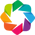

IndexError: index 1 is out of bounds for axis 0 with size 1

In [4]:
from minION import *
vc = VariantCaller(Path('/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/EVSeqL_Output/YL-EvSeqL1/300-1/'),
                           Path('/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/EVSeqL_Output/YL-EvSeqL1/300-1/temp_300-1.fasta'),
                           demultiplex_folder_name='',
                           padding_start=0,
                           padding_end=0)
variant_df = vc.get_variant_df(threshold=0.5,
                               min_depth=5,
                               output_dir='/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/EVSeqL_Output/YL-EvSeqL1/300-1/msa_v2/',
                               num_threads=20)
variant_df.to_csv('/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/EVSeqL_Output/YL-EvSeqL1/variant_new_0.5_v6_VERSION2.csv')


In [29]:
os.system(f'cutadapt -e 0.3 -O 8 -g X{forward} --discard-untrimmed -o {folder}for.fastq.gz {folder}rev.fastq.gz')

This is cutadapt 4.8 with Python 3.9.18
Command line parameters: -e 0.3 -O 8 -g XCACAAAGACACCGACAACTTTCTT --discard-untrimmed -o /Users/ariane/Documents/code/tmp/for.fastq.gz /Users/ariane/Documents/code/tmp/rev.fastq.gz
Processing single-end reads on 1 core ...
Finished in 0.041 s (10.888 µs/read; 5.51 M reads/minute).

=== Summary ===

Total reads processed:                   3,730
Reads with adapters:                        43 (1.2%)
Reads written (passing filters):            43 (1.2%)

Total basepairs processed:     3,313,964 bp
Total written (filtered):         38,762 bp (1.2%)

=== Adapter 1 ===

Sequence: CACAAAGACACCGACAACTTTCTT; Type: non-internal 5'; Length: 24; Trimmed: 43 times

Minimum overlap: 8
No. of allowed errors:
1-2 bp: 0; 3-5 bp: 1; 6-9 bp: 2; 10-12 bp: 3; 13-15 bp: 4; 16-19 bp: 5; 20-22 bp: 6; 23-24 bp: 7

Overview of removed sequences
length	count	expect	max.err	error counts
7	1	0.2	2	0 1
8	32	0.1	2	0 1 31
9	4	0.0	2	0 0 4
10	2	0.0	3	0 0 0 2
11	2	0.0	3	0 0 0 2
12

0